In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import re
import string
from collections import Counter
from typing import List
import multiprocessing as mp
from functools import partial
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import ast
def read_data_literals(ipath):
  outlist = []
  file = open(ipath, "r")
  for line in file:
    dictionary = ast.literal_eval(line)
    outlist.append(dictionary)
  file.close()
  return outlist

def read_data(ipath):
  outlist = []
  file = open(ipath, "r")
  for line in file:
    outlist.append(line.replace("\n", ""))
  file.close()
  return outlist

In [0]:
qasar_t_dir = "/content/drive/My Drive/quasar/quasar-t/"

In [0]:
#read the questions ans datasets
trainQ = read_data_literals(qasar_t_dir+ "questions/train_questions.json")
testQ = read_data_literals(qasar_t_dir+ "questions/test_questions.json")
devQ = read_data_literals(qasar_t_dir+ "questions/dev_questions.json")

In [6]:
np.shape(trainQ), np.shape(testQ), np.shape(devQ)

((37012,), (3000,), (3000,))

In [0]:
#read the context related dataset
trainSC = read_data_literals(qasar_t_dir+ "contexts/long/train_contexts.json")
testSC = read_data_literals(qasar_t_dir+ "contexts/long/test_contexts.json")
devSC = read_data_literals(qasar_t_dir+ "contexts/long/dev_contexts.json")

In [8]:
np.shape(trainSC), np.shape(testSC), np.shape(devSC)

((37012,), (3000,), (3000,))

In [9]:
testQ[0:2] 

[{'answer': 'queen',
  'question': 'Which is considered the most powerful piece on the chess board',
  'tags': ['1tok', 'yes-answer-long', 'yes-answer-short'],
  'uid': 's3q17641'},
 {'answer': '4',
  'question': 'If its 4:00 pm in Seattle Washington , what time is it in Portland Oregon',
  'tags': ['1tok', 'yes-answer-long', 'yes-answer-short'],
  'uid': 's3q1671'}]

In [10]:
devQ[0:3] 

[{'answer': 'tetanus',
  'question': 'Lockjaw is another name for which disease',
  'tags': ['1tok', 'yes-answer-long', 'yes-answer-short'],
  'uid': 's3q1674'},
 {'answer': 'leek',
  'question': 'Which vegetable is a Welsh emblem ?',
  'tags': ['1tok'],
  'uid': 's3q18157'},
 {'answer': 'the guns of naverone',
  'question': 'Which film won the best special effects Oscar in 1961',
  'tags': [],
  'uid': 's3q6589'}]

In [11]:
devSC[2:3]

[{'contexts': [[7.236628,
    'IMDb : Academy Awards , USA : 1962 Now Playing Movie/TV News My Movies DVD/Video IMDbTV Message Boards Showtimes & Tickets IMDbPro IMDb Resume Login | Register Home | Top Movies | Photos | Independent Film | GameBase | Browse | Help All Titles - TV Episodes My Movies Names Companies Keywords Characters Quotes Bios Plots more | tips Oscar ... Best Picture ... Actor in a Leading ... ... Actress in a Leading ... ... Actor in a Supporting ... ... Actress in a. . . ... Best Director ... Writing , Story and ... ... Writing , Screenplay ... ... Cinematography , ... ... Cinematography , Color ... Art Direction-Set ... ... Art Direction-Set ... ... Costume Design , Color ... Costume Design , ... ... Best Sound ... Best Film Editing ... Effects , Special ... ... Music , Original Song ... Music , Scoring of a. . . ... Music , Scoring of a. . . ... Short Subject , ... ... Short Subject , Live ... ... Documentary , Short ... ... Documentary , Features ... Foreign Lang

## Lets look at the tokens (BERT like) and the length of the question and answers

In [12]:
!pip install transformers

     |████████████████████████████████| 573kB 3.5MB/s 
     |████████████████████████████████| 3.7MB 60.6MB/s 
     |████████████████████████████████| 890kB 57.5MB/s 
     |████████████████████████████████| 1.0MB 53.4MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=7e9595087cf3557a05b496e63220811fdbe2b049820a0e0dadd0114cde59dce3
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [50]:
from transformers import pipeline
# Using custom model/tokenizer as str
#pipeline('<task-name>', model='<model name>', tokenizer='<tokenizer_name>')
nlp = pipeline("question-answering", model = 'bert-large-uncased-whole-word-masking-finetuned-squad',
               tokenizer = 'bert-large-uncased')
#xlm-mlm-en-2048 albert-base-v2 distilbert-base-cased
#nlp = pipeline("question-answering", model = 'distilbert-base-cased',
#               tokenizer = 'distilbert-base-cased')
context = r"""
Extractive Question Answering is the task of extracting an answer from a text given a question. An example of a
question answering dataset is the SQuAD dataset, which is entirely based on that task. If you would like to fine-tune
a model on a SQuAD task, you may leverage the `run_squad.py`.
"""

print(nlp(question="What is extractive question answering?", context=context))
print(nlp(question="What is a good example of a question answering dataset?", context=context))

add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5065.58it/s]


{'score': 0.5460348885990669, 'start': 34, 'end': 96, 'answer': 'the task of extracting an answer from a text given a question.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4108.04it/s]


{'score': 0.515911760341563, 'start': 147, 'end': 161, 'answer': 'SQuAD dataset,'}


In [52]:
ques = 'Lockjaw is another name for which disease'
para = 'The first sign of tetanus is a tightening of the jaw muscles that gives the disease its common name , lockjaw .'
print(nlp(question = ques, context=para))

add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4064.25it/s]


{'score': 0.9981500693468632, 'start': 18, 'end': 25, 'answer': 'tetanus'}


In [53]:
question = 'Which film won the best special effects Oscar in 1961'
passage = 'IMDb : Academy Awards , USA : 1962 Now Playing Movie/TV News My Movies DVD/Video IMDbTV Message Boards Showtimes & Tickets IMDbPro IMDb Resume Login | Register Home | Top Movies | Photos | Independent Film | GameBase | Browse | Help All Titles - TV Episodes My Movies Names Companies Keywords Characters Quotes Bios Plots more | tips Oscar ... Best Picture ... Actor in a Leading ... ... Actress in a Leading ... ... Actor in a Supporting ... ... Actress in a. . . ... Best Director ... Writing , Story and ... ... Writing , Screenplay ... ... Cinematography , ... ... Cinematography , Color ... Art Direction-Set ... ... Art Direction-Set ... ... Costume Design , Color ... Costume Design , ... ... Best Sound ... Best Film Editing ... Effects , Special ... ... Music , Original Song ... Music , Scoring of a. . . ... Music , Scoring of a. . . ... Short Subject , ... ... Short Subject , Live ... ... Documentary , Short ... ... Documentary , Features ... Foreign Language Film Honorary Award Irving G. Thalberg ... Jean Hersholt ... Academy Award of Merit Scientific and ... Technical Achievement ... event overview prev ceremony : 1961 next ceremony : 1963 in this year : 1962 all events awards browser Academy Awards , USA : 1962 Oscar Date : 9 April Host : Bob Hope -LRB- I -RRB- Location : Santa Monica Civic Auditorium , Santa Monica , California , USA Notes : An habitual gate-crasher managed to get past the 125 security guards and went on stage to present host Hope , Bob with a home-made Oscar . Maximilian Schell became the first performer to win an Oscar for a role he had originated on television . Best Picture Winner : West Side Story -LRB- 1961 -RRB- - Robert Wise -LRB- I -RRB- Other Nominees : Fanny -LRB- 1961 -RRB- - Joshua Logan Guns of Navarone , The -LRB- 1961 -RRB- - Carl Foreman -LRB- I -RRB-'
print(nlp(question=question, context=passage))

add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2611.65it/s]


{'score': 0.9576793966794241, 'start': 1635, 'end': 1650, 'answer': 'West Side Story'}


In [54]:
import torch
from transformers import *
pretrained_weights = 'bert-base-uncased'
berttokenizer= BertTokenizer.from_pretrained(pretrained_weights)
def tokenizebertstyle(text):
  return berttokenizer.tokenize(text, add_special_tokens=False)

Text(0.5, 1.0, 'Dev dataset')

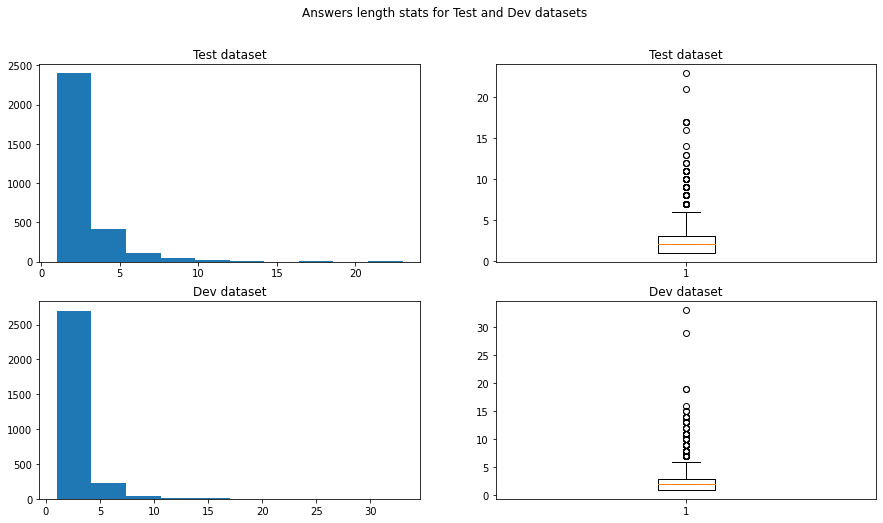

In [55]:
#lets look at length of some Answers in test and dev datasets
anslisttest = []
anslenlistdev = []
for testQdict, devQdict in zip(testQ, devQ):
  anslisttest.append(len(tokenizebertstyle(testQdict['answer'])))
  anslenlistdev.append(len(tokenizebertstyle(devQdict['answer'])))

fig, axs = plt.subplots(2, 2, figsize=(15,8))
fig.suptitle('Answers length stats for Test and Dev datasets')
axs[0, 0].hist(anslisttest)
axs[0, 0].set_title('Test dataset')
axs[0, 1].boxplot(anslisttest)
axs[0, 1].set_title('Test dataset')

axs[1, 0].hist(anslenlistdev)
axs[1, 0].set_title('Dev dataset')
axs[1, 1].boxplot(anslenlistdev)
axs[1, 1].set_title('Dev dataset')

In [56]:
pd.DataFrame(list(zip(anslisttest, anslenlistdev)), columns = ["Answer Tokens Len Test", "Answer Tokens Len Dev"]).describe()

,Answer Tokens Len Test,Answer Tokens Len Dev
count,3000.000000,3000.000000
mean,2.551333,2.557000
std,1.906981,1.987142
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,23.000000,33.000000


### Max Answer len is around 23 or33 and generally the ans are between 1-3 words

In [57]:
#it would be intresting to see the answers that have higher length
index_list_long_ans_test = [k for k, value in enumerate(anslisttest) if value > 8]
print(len(index_list_long_ans_test))
print('\n'.join([(testQ[i]["answer"]) for i in index_list_long_ans_test[:8]] )) #ony 8
print('\n')
print('\n'.join(([(testQ[i]["question"]) for i in index_list_long_ans_test[:8]]))) #ony 5

48
on a horse it\u2019s a horses leg
6 (vault, rings, floor, high bar, para bars, horse)
sighting unexplained craft sighting ufo's
it had a short head with a parrot like beak
turtle soup. calipee is found beneath the lower shell of the green turtle.
the democratic republic of congo , formally zaire
on the edge of a \u00a32 coin
a footman \u2013 walk behind master


Where would you find a gambrel
How Many Diciplines Are There In Mens Gymnastics
Close encounters of the first kind
Why Was The Psittacosaurus So Called
A green gelatinous substance known as calipee is used to make which favorite amongst gastronomes ?
In Which African Country Is The Seaport Of Banana
Where Exactly -LRB- And You Must Be Specific -RRB- Will You Find The Words `` Standing On The Shoulders Of Giants ''
In the 18th century what job did a fart-catcher do


In [58]:
#it would be intresting to see the answers that have higher length
index_list_long_ans_dev = [k for k, value in enumerate(anslenlistdev) if value > 8]
print(len(index_list_long_ans_dev))
print('\n'.join(([(devQ[i]["answer"]) for i in index_list_long_ans_dev[:8]]))) 
print('\n')
print('\n'.join(([(devQ[i]["question"]) for i in index_list_long_ans_dev[:8]]))) 

46
a giant sequoia giant sequoia
popeye - they are spinach growers
king pygmalion aphrodite life
audi \u2013 vorsprung durch technik
booze \u2013 honeymoon 30 day booze up
1 meat - 2 fresh veg \u2013 3 pet food
he tried to flee to spain instead, and was swallowed by the "whale"nineveh
hinge - it\u2019s the pin holding it


What living organism can be 30 times the size of a blue whale
Crystal City in Texas put up a statue to what cartoon character
In mythology who married the beautiful maid Galatea
What car manufacturers slogan is forward through technology
How did Attila the Hun die on honeymoon
What is the most profitable section in supermarkets
To which city did the Lord tell Jonah to go and denounce its citizens ' wickedness
Where would you find a pintle


Text(0.5, 1.0, 'Dev dataset')

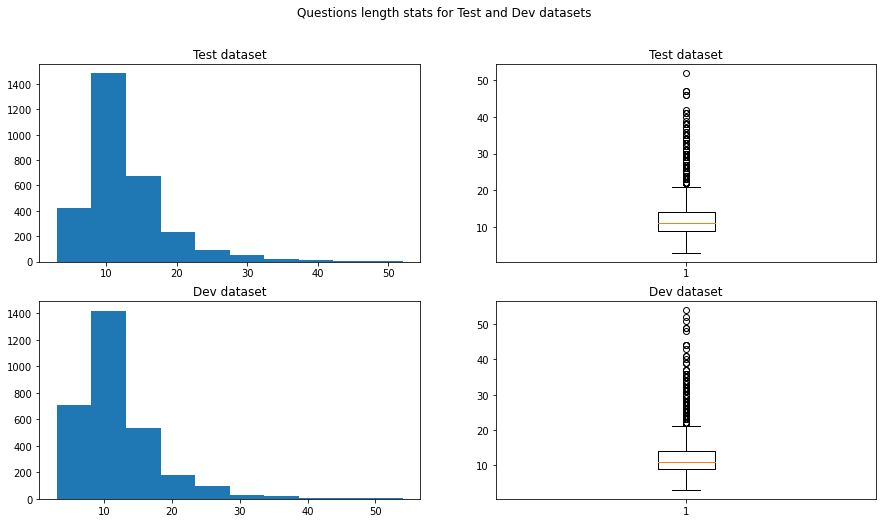

In [59]:
#lets look at length of some questions in test and dev datasets
queslenlisttest = []
queslenlistdev = []
for testQdict, devQdict in zip(testQ, devQ):
  queslenlisttest.append(len(tokenizebertstyle(testQdict['question'])))
  queslenlistdev.append(len(tokenizebertstyle(devQdict['question'])))

fig, axs = plt.subplots(2, 2, figsize=(15,8))
fig.suptitle('Questions length stats for Test and Dev datasets')
axs[0, 0].hist(queslenlisttest)
axs[0, 0].set_title('Test dataset')
axs[0, 1].boxplot(queslenlisttest)
axs[0, 1].set_title('Test dataset')

axs[1, 0].hist(queslenlistdev)
axs[1, 0].set_title('Dev dataset')
axs[1, 1].boxplot(queslenlistdev)
axs[1, 1].set_title('Dev dataset')


The distribution looks right skewed. There are questions what have as small length as 3 and as big as 41 words

In [60]:
pd.DataFrame(list(zip(queslenlisttest, queslenlistdev)), columns = ["Question Tokens Len Test", "Question Tokens Len Dev"]).describe()

,Question Tokens Len Test,Question Tokens Len Dev
count,3000.000000,3000.000000
mean,12.318000,12.312667
std,5.703951,5.784813
min,3.000000,3.000000
25%,9.000000,9.000000
50%,11.000000,11.000000
75%,14.000000,14.000000
max,52.000000,54.000000


The max length of question is 52-54 tokens and most of the questions have length between 9-14 tokens

In [61]:
index_list_long_ques_test = [k for k, value in enumerate(queslenlisttest) if value > 25]
print(len(index_list_long_ques_test))
print('\n'.join([(testQ[i]["question"]) for i in index_list_long_ques_test[:8]] )) #ony 8
print('\n')
print('\n'.join(([(testQ[i]["answer"]) for i in index_list_long_ques_test[:8]]))) #ony 8

106
A marine catfish can taste with any part of its body .The female marine catfish hatches her eggs in her __________
Where was the painting by Michaelangelo , valued at # 8 million pounds recently found , after remaining unrecognised for more than 250 years
Cocktails : Rum , lime , and cola drink make a -LRB- n -RRB- ____________ .
From the 1980 's which artists and song `` So strike a pose on a Cadillac , If you want to find all the cops , They 're hanging out in the donut shop , They sing and dance '' ?
The city of Los Angeles is more than one_third the size of the entire state of ______________
What type of food is associated with 4th July celebrations , is it a curry , a Roast Turkey , a picnic , or a BBQ ?
The four stages in the life_cycle of an insect are : egg , adult , pupa , and ________ .
On March 27 , 1964 , North America 's strongest recorded earthquake , with a moment magnitude of 9.2 , rocked central ______________


mouth
castle howard
cuba libre
the bangles / walk lik

In [62]:
index_list_long_ques_dev = [k for k, value in enumerate(queslenlistdev) if value > 25]
print(len(index_list_long_ques_dev))
print('\n'.join([(devQ[i]["question"]) for i in index_list_long_ques_dev[:8]] )) #ony 8
print('\n')
print('\n'.join(([(devQ[i]["answer"]) for i in index_list_long_ques_dev[:8]]))) #ony 8

111
______________ is the largest French_speaking city in the Western Hemisphere .
In a standard game of cricket , what is the maximum number of people that can be on the field of play at any one time during play
On the Single `` Do They Know It 's Christmas '' Only One Person Performed On Both The Original And The 20 Year Remake Band Aid 20 , Who Was It ?
In 1953 Science fiction author L.Ron Hubbard founded which cult religion , one of who 's prominent modern day followers is John Travolta
Who Had A Surprise UK Hit In The 90 's With A Cover Of The Classic Led Zeppelin Song `` Stairway To Heaven ''
In 2010 , for the first time in 27 years , the House of Reps censured one of its members , Charlie Rangel of what state ?
Most varieties of __________ can go an entire year without eating a single morsel of food .
What is the answer to a groan-inducing math riddle that asks , '' Where can you buy a ruler that is three feet long '' ?


montreal
seventeen
bono / u2
scientology
rolf harris
new 

Text(0.5, 1.0, 'Dev dataset')

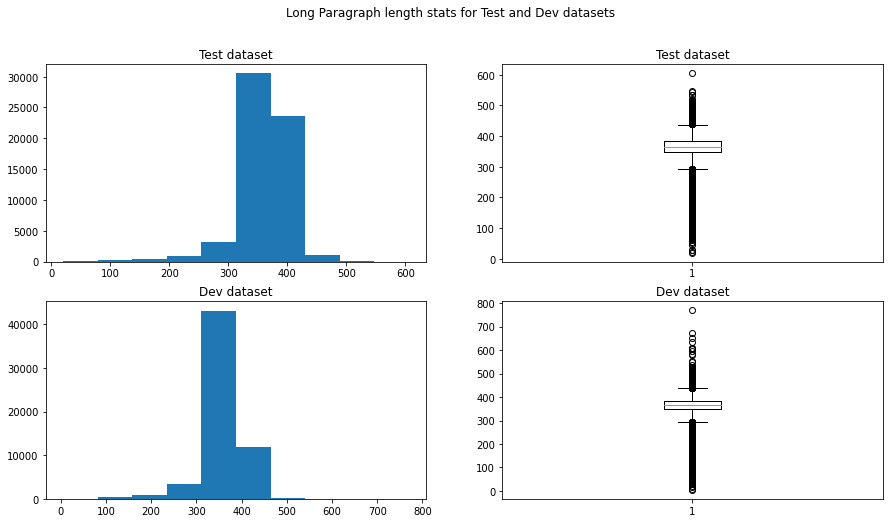

In [63]:
#lets look at length of some contexts in test and dev datasets
#since paragraphs are long and tokenization is taking longer time in evaluation hence
#using the sentence word split method to get ball park figure
Ctxlisttest = []
Ctxlistdev = []
for testSCdict, devSCdict in zip(testSC, devSC):
  sublisttestSC = testSCdict["contexts"]
  sublistdevSC = devSCdict["contexts"]
  for itemtest, itemdev in zip(sublisttestSC, sublistdevSC):
    Ctxlisttest.append(len((itemtest[1].split())))
    Ctxlistdev.append(len((itemdev[1].split())))

fig, axs = plt.subplots(2, 2, figsize=(15,8))
fig.suptitle('Long Paragraph length stats for Test and Dev datasets')
axs[0, 0].hist(Ctxlisttest)
axs[0, 0].set_title('Test dataset')
axs[0, 1].boxplot(Ctxlisttest)
axs[0, 1].set_title('Test dataset')

axs[1, 0].hist(Ctxlistdev)
axs[1, 0].set_title('Dev dataset')
axs[1, 1].boxplot(Ctxlistdev)
axs[1, 1].set_title('Dev dataset')

In [64]:
df_cxt_long = pd.DataFrame(list(zip(Ctxlisttest, Ctxlistdev)), columns = ["Paragraph Len Test", "Paragraph Len Dev"])
df_cxt_long.describe()

,Paragraph Len Test,Paragraph Len Dev
count,59890.000000,59890.000000
mean,360.480347,360.780013
std,42.183443,42.851853
min,20.000000,5.000000
25%,347.000000,347.000000
50%,366.000000,366.000000
75%,383.000000,383.000000
max,606.000000,770.000000


The word length of short paragraph vary from 350-400. Max length is 600-770. 

In [65]:
print((df_cxt_long['Paragraph Len Test'] > 480).sum(), (df_cxt_long['Paragraph Len Dev'] > 480).sum()) #how many records have length gt than 480

61 84


## Text prerocessing Utility methods

In [0]:
def remove_articles(text):
    return re.sub(r'\b(a|an|the)\b', ' ', text)

def white_space_fix(text):
    return ' '.join(text.split())

def remove_punc(text):
    exclude = set(string.punctuation)
    return ''.join(ch for ch in text if ch not in exclude)

def lower(text):
    return text.lower()

def normalize_answer(s: str) -> str:
    return white_space_fix(remove_articles(remove_punc(lower(s))))

## F1 and Exact Match (EM) calculation methods

In [0]:
def exact_match_metric(iy_predicted_list: List[str], iground_truth: str):
  y_predicted = [normalize_answer(y_pred) for y_pred in iy_predicted_list]
  ground_truth =  normalize_answer( iground_truth )
  res = [ele for ele in y_predicted if(ele == ground_truth)]
  res = [i for i in res if i] 
  return (sum([(bool(res))]))

In [0]:
def f1_score_metric(iy_predicted_list: List[str], iground_truth: str):
  f1_total = 0.0
  precisions = []
  recalls = []
  f1s = []
  y_predicted = [normalize_answer(y_pred) for y_pred in iy_predicted_list]
  ground_truth =  normalize_answer( iground_truth )
  
  for prediction in y_predicted:
      prediction_tokens = prediction.split()
      gt_tokens = ground_truth.split()
      #print(prediction_tokens)
      #print(gt_tokens)
      if len(gt_tokens) == 0 or len(prediction_tokens) == 0:
          precisions.append(float(gt_tokens == prediction_tokens))
          recalls.append(float(gt_tokens == prediction_tokens))
          f1s.append(float(gt_tokens == prediction_tokens))
          continue
      common = Counter(prediction_tokens) & Counter(gt_tokens)
      num_same = sum(common.values())
      #print(common, num_same)
      if num_same == 0:
          precisions.append(0.0)
          recalls.append(0.0)
          f1s.append(0.0)
          continue
      precision = 1.0 * num_same / len(prediction_tokens)
      recall = 1.0 * num_same / len(gt_tokens)
      f1 = (2 * precision * recall) / (precision + recall)
      f1s.append(f1)
      precisions.append(precision)
      recalls.append(recall)

  f1_total = max(f1s)    
  return (max(precisions), max(recalls), max(f1s))

## Key function to get the predicted Answer from the Model

In [0]:
def get_predicted_answer(iQues, iContext, 
                         itopN_pred_ans, iRemove_word_list, id):
  
  """
  Tokenize the context containing multiple paragraphs
  Each para  - broken to sentence
  """
  paras = []
  words = []
  predicted_ans = ""
  y_predicted_lst = []
  
  count_sent= 0
  for ConextDict in iContext[id:id+1]:
    sublist = ConextDict["contexts"]
    for i, item in enumerate(sublist):
      sent = (item[1]) #TreebankWordDetokenizer().detokenize(item[1])
      if((len(sent.split()) < 500) & (count_sent <= itopN_pred_ans) ):
        #print(id, sent)
        paras.append(sent)
        count_sent = count_sent + 1
      
      
  ##lets do the same for the question
  ques_dict = iQues[id:id+1][0]
  ques = (ques_dict['question'])

  #get model prediction
  predicted_ans_list = []
  for para in paras:
    predicted_ans = nlp(question=ques, context=para)
    predicted_ans_list.append([predicted_ans['answer'], predicted_ans['score']])
    print(predicted_ans)  
  
  predicted_ans_list = sorted(predicted_ans_list, key = lambda x: x[1], 
                                reverse=True)
  for i in range(count_sent-1):
    word_list = lower(predicted_ans_list[i][0]).split()
    predicted_ans_list[i][0] = (' '.join(
        [i for i in word_list if i not in iRemove_word_list]))
    y_predicted_lst.append(predicted_ans_list[i][0])
  
  
  actual_ans = ques_dict['answer']
  print (id, len(y_predicted_lst), y_predicted_lst, ',' ,normalize_answer( actual_ans ))

  EM = exact_match_metric(y_predicted_lst, actual_ans)
  precision, recall, f1 = f1_score_metric(y_predicted_lst, actual_ans)

  return  y_predicted_lst, [normalize_answer(actual_ans), normalize_answer(ques), EM, precision, recall, f1]


# Run the model on Dev Data - only first 200 records due to RAM size and time limitation

In [70]:
deemed_outlier_index_dev = index_list_long_ques_dev +  index_list_long_ans_dev
deemed_outlier_index_dev = list(set(deemed_outlier_index_dev)) #remove duplicates
print(len(deemed_outlier_index_dev))
print((deemed_outlier_index_dev))

157
[1540, 2053, 519, 2569, 1548, 1549, 16, 528, 22, 2070, 1055, 2080, 33, 543, 556, 47, 2608, 563, 2611, 2101, 1589, 2618, 2107, 2619, 2113, 1090, 1091, 73, 2638, 80, 1622, 2139, 2146, 614, 1639, 618, 619, 1137, 1650, 1140, 1652, 2164, 1655, 120, 1662, 639, 643, 135, 652, 1677, 1678, 655, 1680, 1681, 663, 1687, 1690, 155, 1179, 1182, 1697, 2721, 2729, 1199, 1201, 2227, 2231, 1210, 1731, 1222, 198, 724, 725, 1237, 2264, 2776, 219, 220, 1755, 234, 2287, 2299, 1788, 1279, 1792, 257, 1798, 2311, 2825, 1294, 784, 2322, 2838, 1816, 2842, 797, 798, 1310, 1823, 2848, 800, 2342, 2344, 299, 1839, 1840, 2352, 821, 1341, 1343, 2375, 2887, 845, 343, 1368, 2903, 347, 1886, 1893, 2920, 360, 1390, 1904, 374, 1912, 1402, 890, 381, 897, 1936, 913, 1426, 2967, 2971, 1950, 930, 2988, 2477, 2989, 945, 1460, 2485, 2491, 967, 1484, 1485, 2001, 2523, 478, 2014, 2527, 995, 486, 1517, 1532, 1021, 1022]


In [71]:
# ignore outliers
devQtmp = [i for j, i in enumerate(devQ) if j not in deemed_outlier_index_dev]
devSCtmp = [i for j, i in enumerate(devSC) if j not in deemed_outlier_index_dev]
print (len(devQtmp), len (devSCtmp))

2843 2843


In [72]:
devQtmp[:2]

[{'answer': 'tetanus',
  'question': 'Lockjaw is another name for which disease',
  'tags': ['1tok', 'yes-answer-long', 'yes-answer-short'],
  'uid': 's3q1674'},
 {'answer': 'leek',
  'question': 'Which vegetable is a Welsh emblem ?',
  'tags': ['1tok'],
  'uid': 's3q18157'}]

In [73]:
import time

#using top 5 scored passages as per QUASAR dataset  
itopN_pred_ans = 10
#using only first 200 records due to RAM and runtime limitation
n_records = 200

#some special chars related to brackets are removed
Remove_word_list = ['lrb-' , '-rrb', '-lrb-', '-lsb-', '-rrb-', '-rsb-']

pred_ans_list_col_names = {}

"""
  build the dataframe to store the results
  df_pred - storing predicted ans based on the itopN_pred_ans passages count
  df_metrics - storing prediction metrics
"""
#initializing the dataframes
for i in range(itopN_pred_ans):
  pred_ans_list_col_names[('pred_ans_' + str(i))] = []

df_pred= pd.DataFrame(pred_ans_list_col_names)
df_metrics = pd.DataFrame({'actual_ans': [], 'actual_ques': [], 'EM': [], 'precision': [], 'recall': [], 'f1': []})

"""
 Running prediction loop
"""
t1 = time.time() #time it

count = 0
for id in range(len(devQtmp)):
  pred, metrics = get_predicted_answer(devQtmp, devSCtmp, itopN_pred_ans, Remove_word_list, id)
  count = count + 1
  if (count > n_records):
    break
  
  for i in  range(len(pred)):
    pred_ans_list_col_names[('pred_ans_' + str(i))] = pred[i]

  df_pred = df_pred.append(pred_ans_list_col_names, ignore_index=True)

  df_metrics = df_metrics.append({'actual_ans': metrics[0], 'actual_ques': metrics[1], 'EM': metrics[2], 
                              'precision': metrics[3], 'recall': metrics[4], 'f1': metrics[5]}, ignore_index=True)

t2 = time.time()
print('Time for whole code to run: ', (t2-t1))

add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2529.74it/s]


{'score': 0.9669516125250546, 'start': 717, 'end': 724, 'answer': 'Tetanus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4084.04it/s]


{'score': 0.9882490204827654, 'start': 719, 'end': 726, 'answer': 'Tetanus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4165.15it/s]


{'score': 0.3142856303775261, 'start': 691, 'end': 698, 'answer': 'tetanus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4500.33it/s]


{'score': 0.3112051200224286, 'start': 689, 'end': 696, 'answer': 'tetanus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5698.78it/s]


{'score': 0.8349002025989378, 'start': 75, 'end': 90, 'answer': 'Tetanus Tetanus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4476.31it/s]


{'score': 0.9660027390718362, 'start': 540, 'end': 547, 'answer': 'Tetanus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1512.55it/s]


{'score': 0.5456996911035326, 'start': 134, 'end': 141, 'answer': 'Tetanus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3679.21it/s]


{'score': 0.7654447055111113, 'start': 535, 'end': 542, 'answer': 'Tetanus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4378.19it/s]


{'score': 0.8962748382926975, 'start': 1269, 'end': 1276, 'answer': 'Tetanus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2966.27it/s]


{'score': 0.42785146568363075, 'start': 108, 'end': 115, 'answer': 'Tetanus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2668.13it/s]


{'score': 0.6037557464668204, 'start': 1637, 'end': 1644, 'answer': 'tetanus'}
0 10 ['tetanus', 'tetanus', 'tetanus', 'tetanus', 'tetanus tetanus', 'tetanus', 'tetanus', 'tetanus', 'tetanus', 'tetanus'] , tetanus


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4604.07it/s]


{'score': 0.31943559142688116, 'start': 791, 'end': 803, 'answer': 'welsh dragon'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4297.44it/s]


{'score': 0.41033825173380833, 'start': 532, 'end': 540, 'answer': 'The leek'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3751.61it/s]


{'score': 0.9101521541444768, 'start': 1305, 'end': 1312, 'answer': 'ostrich'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2169.84it/s]


{'score': 0.9257677973272536, 'start': 1359, 'end': 1366, 'answer': 'ostrich'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1703.62it/s]


{'score': 0.9039049358934363, 'start': 1342, 'end': 1349, 'answer': 'ostrich'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5343.06it/s]


{'score': 0.9191898972931511, 'start': 1359, 'end': 1366, 'answer': 'ostrich'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5363.56it/s]


{'score': 0.9029337531921051, 'start': 1343, 'end': 1350, 'answer': 'ostrich'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5065.58it/s]


{'score': 0.389778062687931, 'start': 515, 'end': 523, 'answer': 'The leek'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1973.79it/s]


{'score': 0.24725145846058894, 'start': 477, 'end': 485, 'answer': 'The leek'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5504.34it/s]


{'score': 0.4438345797404608, 'start': 518, 'end': 526, 'answer': 'The leek'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4854.52it/s]


{'score': 0.44305762668579973, 'start': 511, 'end': 519, 'answer': 'The leek'}
1 10 ['ostrich', 'ostrich', 'ostrich', 'ostrich', 'ostrich', 'the leek', 'the leek', 'the leek', 'the leek', 'welsh dragon'] , leek


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2565.32it/s]


{'score': 0.9479969134317585, 'start': 1635, 'end': 1650, 'answer': 'West Side Story'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5683.34it/s]


{'score': 0.000993448061113622, 'start': 433, 'end': 437, 'answer': '1939'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4755.45it/s]


{'score': 0.0020709762434946988, 'start': 415, 'end': 419, 'answer': '1939'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5210.32it/s]


{'score': 0.001741987178254939, 'start': 425, 'end': 429, 'answer': '1939'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1624.44it/s]


{'score': 0.0002453822647994208, 'start': 367, 'end': 371, 'answer': '1939'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 904.92it/s]


{'score': 0.377572125018915, 'start': 1694, 'end': 1711, 'answer': "It 's a Mad , Mad"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2774.01it/s]


{'score': 0.0017180059620462707, 'start': 1683, 'end': 1704, 'answer': 'A Gathering of Eagles'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3802.63it/s]


{'score': 0.08081585250627743, 'start': 464, 'end': 474, 'answer': 'James Bond'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1738.93it/s]


{'score': 0.004564042587959671, 'start': 2013, 'end': 2035, 'answer': '2001 : A Space Odyssey'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2937.19it/s]


{'score': 0.43200317226400387, 'start': 1287, 'end': 1300, 'answer': '-LSB- 2 -RSB-'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3123.09it/s]


{'score': 0.0937024093515113, 'start': 467, 'end': 477, 'answer': 'James Bond'}
2 10 ['west side story', '2', "it 's a mad , mad", 'james bond', 'james bond', '2001 : a space odyssey', '1939', '1939', 'a gathering of eagles', '1939'] , guns of naverone


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3379.78it/s]


{'score': 0.3171081062186154, 'start': 370, 'end': 389, 'answer': 'The Dock of the Bay'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3469.23it/s]


{'score': 0.8621580190114955, 'start': 716, 'end': 735, 'answer': 'the dock of the bay'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2755.78it/s]


{'score': 0.12599119957470428, 'start': 1219, 'end': 1273, 'answer': "Released posthumously , it was Otis ' biggest hit ever"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4128.25it/s]


{'score': 0.12599119957470428, 'start': 1219, 'end': 1273, 'answer': "Released posthumously , it was Otis ' biggest hit ever"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2606.78it/s]


{'score': 0.02039035560349234, 'start': 894, 'end': 925, 'answer': '`` Ive Been Loving You Too Long'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3887.21it/s]


{'score': 0.1469095875924431, 'start': 980, 'end': 1034, 'answer': "Released posthumously , it was Otis ' biggest hit ever"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6069.90it/s]


{'score': 0.7334372254303148, 'start': 925, 'end': 940, 'answer': 'Dock of the Bay'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5391.14it/s]


{'score': 0.001496328473192754, 'start': 1132, 'end': 1163, 'answer': 'Loving You Too Long to Stop Now'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3799.19it/s]


{'score': 0.04996882059199237, 'start': 1458, 'end': 1484, 'answer': "`` These Arms of Mine , ''"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4064.25it/s]


{'score': 0.2636701756314608, 'start': 388, 'end': 419, 'answer': "Sittin ' on the Dock of the Bay"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4116.10it/s]


{'score': 0.015982429083354788, 'start': 726, 'end': 738, 'answer': 'Pop Festival'}
3 10 ['the dock of the bay', 'dock of the bay', 'the dock of the bay', "sittin ' on the dock of the bay", "released posthumously , it was otis ' biggest hit ever", "released posthumously , it was otis ' biggest hit ever", "released posthumously , it was otis ' biggest hit ever", "`` these arms of mine , ''", '`` ive been loving you too long', 'pop festival'] , sitting on dock of bay


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2316.02it/s]


{'score': 0.07421490004556786, 'start': 657, 'end': 677, 'answer': 'King Herod the Great'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5108.77it/s]


{'score': 0.3061989933443172, 'start': 415, 'end': 428, 'answer': 'Herod Antipas'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5203.85it/s]


{'score': 0.007220188846303599, 'start': 1341, 'end': 1346, 'answer': 'Herod'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4951.95it/s]


{'score': 0.3377310872891499, 'start': 966, 'end': 976, 'answer': 'King Herod'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5309.25it/s]


{'score': 0.034271941658733374, 'start': 1961, 'end': 1967, 'answer': 'Pilate'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6017.65it/s]


{'score': 0.9822705166214085, 'start': 711, 'end': 724, 'answer': 'Herod Antipas'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2629.66it/s]


{'score': 0.5545114076991169, 'start': 247, 'end': 257, 'answer': 'King Herod'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5216.80it/s]


{'score': 0.6996958231995407, 'start': 561, 'end': 574, 'answer': 'Herod Antipas'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4223.87it/s]


{'score': 0.1385050792616509, 'start': 1044, 'end': 1050, 'answer': 'Salome'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6710.89it/s]


{'score': 0.02818411965480383, 'start': 912, 'end': 928, 'answer': 'Emperor Tiberius'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4865.78it/s]


{'score': 0.04313446051150294, 'start': 1090, 'end': 1096, 'answer': 'Salome'}
4 10 ['herod antipas', 'herod antipas', 'king herod', 'king herod', 'herod antipas', 'salome', 'king herod the great', 'salome', 'pilate', 'emperor tiberius'] , king herod


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4514.86it/s]


{'score': 0.6943135887257341, 'start': 1753, 'end': 1768, 'answer': 'Keith Partridge'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5540.69it/s]


{'score': 0.6713353964941362, 'start': 1705, 'end': 1720, 'answer': 'Keith Partridge'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4072.14it/s]


{'score': 0.005746578035049299, 'start': 346, 'end': 359, 'answer': 'DAVID CASSIDY'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6241.52it/s]


{'score': 5.3458103661791325e-06, 'start': 1423, 'end': 1444, 'answer': 'Teen Idol , Bubblegum'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5041.23it/s]


{'score': 0.00022686205781803984, 'start': 875, 'end': 884, 'answer': 'Partridge'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5197.40it/s]


{'score': 9.260747247986933e-07, 'start': 445, 'end': 474, 'answer': 'There my Walk Me Wet Me Susan'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5275.85it/s]


{'score': 0.1361495253962799, 'start': 313, 'end': 336, 'answer': 'Cassidy/Keith Partridge'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5343.06it/s]


{'score': 0.7924683175275504, 'start': 1280, 'end': 1297, 'answer': 'Shirley Partridge'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3912.60it/s]


{'score': 0.7986334686407588, 'start': 829, 'end': 844, 'answer': 'Keith Partridge'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2163.13it/s]


{'score': 0.7301748783330808, 'start': 569, 'end': 584, 'answer': 'Keith Partridge'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2480.37it/s]


{'score': 0.7351845557145857, 'start': 1327, 'end': 1342, 'answer': 'Keith Partridge'}
5 10 ['keith partridge', 'shirley partridge', 'keith partridge', 'keith partridge', 'keith partridge', 'keith partridge', 'cassidy/keith partridge', 'david cassidy', 'partridge', 'teen idol , bubblegum'] , keith partridge


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4826.59it/s]


{'score': 1.570926820502192e-05, 'start': 1424, 'end': 1441, 'answer': 'Nian still exists'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4957.81it/s]


{'score': 2.6664013270863413e-06, 'start': 1034, 'end': 1042, 'answer': 'children'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4476.31it/s]


{'score': 0.0469212684990401, 'start': 240, 'end': 282, 'answer': 'to celebrate festivals and happy occasions'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4681.14it/s]


{'score': 0.001003768205440729, 'start': 1068, 'end': 1131, 'answer': 'different time zones might have different Chinese New Year Days'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5343.06it/s]


{'score': 0.40977046092109504, 'start': 1475, 'end': 1478, 'answer': 'RED'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5683.34it/s]


{'score': 0.008048728825477136, 'start': 230, 'end': 248, 'answer': 'Culture Background'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5071.71it/s]


{'score': 1.2640517971390132e-05, 'start': 1939, 'end': 1965, 'answer': 'carrying the Real Invaders'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2084.64it/s]


{'score': 2.7277888810045775e-06, 'start': 1824, 'end': 1831, 'answer': 'Holiday'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4999.17it/s]


{'score': 0.0010695454844104613, 'start': 1914, 'end': 1990, 'answer': 'share an unshakable bond with the deep rooted Chinese traditions and culture'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5497.12it/s]


{'score': 1.3501086943098586e-06, 'start': 1864, 'end': 1938, 'answer': 'very similar to the Western concept of getting together during Christmas .'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2545.09it/s]


{'score': 0.0010899178089304254, 'start': 1922, 'end': 2004, 'answer': 'Fresh air , romantic lanterns , poetic stream , yummy food and cozy accommodations'}
6 10 ['red', 'to celebrate festivals and happy occasions', 'culture background', 'fresh air , romantic lanterns , poetic stream , yummy food and cozy accommodations', 'share an unshakable bond with the deep rooted chinese traditions and culture', 'different time zones might have different chinese new year days', 'nian still exists', 'carrying the real invaders', 'holiday', 'children'] , fire alarms


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4793.49it/s]


{'score': 0.26323555352421835, 'start': 1676, 'end': 1688, 'answer': 'Grand Rapids'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2837.82it/s]


{'score': 0.092489473038043, 'start': 644, 'end': 668, 'answer': 'Grand Rapids , Minnesota'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3548.48it/s]


{'score': 0.038182057254120494, 'start': 1188, 'end': 1196, 'answer': 'Broadway'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5384.22it/s]


{'score': 0.15316251594646246, 'start': 322, 'end': 334, 'answer': 'Grand Rapids'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4136.39it/s]


{'score': 9.715834998443094e-06, 'start': 951, 'end': 961, 'answer': 'New York .'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2162.01it/s]


{'score': 0.3616988721266168, 'start': 1427, 'end': 1441, 'answer': 'Palace Theatre'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2576.35it/s]


{'score': 0.09758189569071618, 'start': 1617, 'end': 1641, 'answer': 'Grand Rapids , Minnesota'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4301.85it/s]


{'score': 0.17923450143611852, 'start': 1474, 'end': 1487, 'answer': 'Carnegie Hall'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3806.08it/s]


{'score': 0.18191737770598682, 'start': 1604, 'end': 1614, 'answer': 'vaudeville'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5899.16it/s]


{'score': 0.3299899965887221, 'start': 839, 'end': 863, 'answer': 'Grand Rapids , Minnesota'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2668.13it/s]


{'score': 0.12220561882760173, 'start': 1169, 'end': 1193, 'answer': 'Grand Rapids , Minnesota'}
7 10 ['palace theatre', 'grand rapids , minnesota', 'grand rapids', 'vaudeville', 'carnegie hall', 'grand rapids', 'grand rapids , minnesota', 'grand rapids , minnesota', 'grand rapids , minnesota', 'broadway'] , new grand theater


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4429.04it/s]


{'score': 1.343947274473926e-06, 'start': 10, 'end': 20, 'answer': 'Basketball'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3758.34it/s]


{'score': 0.008762936134385724, 'start': 1841, 'end': 1850, 'answer': 'Blackjack'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7738.57it/s]


{'score': 0.3004367476524976, 'start': 1137, 'end': 1152, 'answer': 'Tasmanian devil'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5652.70it/s]


{'score': 9.71871590611914e-06, 'start': 1823, 'end': 1833, 'answer': 'basketball'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5152.71it/s]


{'score': 0.2432262323243215, 'start': 1213, 'end': 1240, 'answer': 'Aztec Bowl football stadium'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4987.28it/s]


{'score': 0.3291830054543521, 'start': 1161, 'end': 1188, 'answer': 'Aztec Bowl football stadium'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4228.13it/s]


{'score': 3.290512712774297e-05, 'start': 778, 'end': 790, 'answer': 'pick up game'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4815.50it/s]


{'score': 0.04156645933688563, 'start': 608, 'end': 642, 'answer': 'online basketball roleplaying game'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2444.23it/s]


{'score': 0.000664857335018719, 'start': 279, 'end': 284, 'answer': 'TABLA'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2172.09it/s]


{'score': 6.152304118099401e-06, 'start': 273, 'end': 281, 'answer': 'Football'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4877.10it/s]


{'score': 0.0927460488030718, 'start': 1841, 'end': 1894, 'answer': 'what was played in the large Prehispanic stone courts'}
8 10 ['aztec bowl football stadium', 'tasmanian devil', 'aztec bowl football stadium', 'what was played in the large prehispanic stone courts', 'online basketball roleplaying game', 'blackjack', 'tabla', 'pick up game', 'basketball', 'football'] , basketball


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4060.31it/s]


{'score': 8.793431099429934e-05, 'start': 1615, 'end': 1620, 'answer': 'Paris'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2699.04it/s]


{'score': 0.18485520476332695, 'start': 1497, 'end': 1511, 'answer': 'la Ville Basse'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2651.27it/s]


{'score': 0.057686114796374977, 'start': 870, 'end': 946, 'answer': 'CARE is ideally located on the river system which links the port of Le Havre'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4452.55it/s]


{'score': 0.19560350900943302, 'start': 735, 'end': 749, 'answer': 'Franciscopolis'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2523.65it/s]


{'score': 0.25382144214329827, 'start': 980, 'end': 997, 'answer': 'The Port of Rouen'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2460.00it/s]


{'score': 0.3986849128403165, 'start': 1578, 'end': 1586, 'answer': 'Le Havre'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5071.71it/s]


{'score': 0.31544490418069415, 'start': 1457, 'end': 1465, 'answer': 'Le Havre'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4604.07it/s]


{'score': 0.27519422096669466, 'start': 1588, 'end': 1596, 'answer': 'Le Havre'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4987.28it/s]


{'score': 0.6656950255209892, 'start': 1542, 'end': 1550, 'answer': 'Le Havre'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4554.08it/s]


{'score': 0.3305108210360572, 'start': 1588, 'end': 1596, 'answer': 'Le Havre'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5412.01it/s]


{'score': 0.0018311471227796805, 'start': 1788, 'end': 1793, 'answer': 'Paris'}
9 10 ['le havre', 'le havre', 'le havre', 'le havre', 'le havre', 'the port of rouen', 'franciscopolis', 'la ville basse', 'care is ideally located on the river system which links the port of le havre', 'paris'] , le havre


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5777.28it/s]


{'score': 0.002572154531698234, 'start': 0, 'end': 15, 'answer': 'Welcome to MAMA'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5053.38it/s]


{'score': 0.057301797655730624, 'start': 1986, 'end': 1988, 'answer': '45'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5966.29it/s]


{'score': 0.22929102428864923, 'start': 1253, 'end': 1258, 'answer': '3,000'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2395.38it/s]


{'score': 0.008110278148564298, 'start': 671, 'end': 689, 'answer': '23,000 square feet'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5526.09it/s]


{'score': 0.5262044267004029, 'start': 1018, 'end': 1023, 'answer': 'fifty'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4777.11it/s]


{'score': 0.002832593872216127, 'start': 710, 'end': 720, 'answer': '12 million'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4328.49it/s]


{'score': 0.2851779593147903, 'start': 1303, 'end': 1310, 'answer': 'over 40'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5210.32it/s]


{'score': 0.0029362665915603214, 'start': 1288, 'end': 1308, 'answer': 'Museum of Modern Art'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6853.44it/s]


{'score': 0.026623979222625493, 'start': 1882, 'end': 1962, 'answer': 'large and important collection of contemporary and modern art by leading artists'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4593.98it/s]


{'score': 0.40174747843626335, 'start': 366, 'end': 369, 'answer': '300'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3688.92it/s]


{'score': 6.801604944663771e-06, 'start': 1733, 'end': 1769, 'answer': 'New York Art Museums - United States'}
10 10 ['fifty', '300', 'over 40', '3,000', '45', 'large and important collection of contemporary and modern art by leading artists', '23,000 square feet', 'museum of modern art', '12 million', 'welcome to mama'] , 100000


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4599.02it/s]


{'score': 0.9508274629881974, 'start': 705, 'end': 722, 'answer': 'Oxford Dictionary'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3744.91it/s]


{'score': 0.11496507994558725, 'start': 508, 'end': 525, 'answer': 'The Solar Society'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4905.62it/s]


{'score': 7.510920207404268e-05, 'start': 1844, 'end': 1851, 'answer': 'ethanol'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4837.72it/s]


{'score': 0.002236174876233954, 'start': 1402, 'end': 1409, 'answer': 'ethanol'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4524.60it/s]


{'score': 0.0003149310489313356, 'start': 32, 'end': 45, 'answer': 'Green Lantern'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2605.16it/s]


{'score': 0.10174531537111875, 'start': 1868, 'end': 1878, 'answer': 'wind mills'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3795.75it/s]


{'score': 0.015321873838813893, 'start': 872, 'end': 890, 'answer': 'Alternative Energy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4821.04it/s]


{'score': 2.803885142518004e-06, 'start': 949, 'end': 959, 'answer': 'technology'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4415.06it/s]


{'score': 3.028588041707422e-05, 'start': 1611, 'end': 1639, 'answer': 'Irish Energy Management Ltd.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4271.19it/s]


{'score': 0.0010905349954076216, 'start': 197, 'end': 205, 'answer': 'Peak Oil'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5315.97it/s]


{'score': 0.00012539797424496353, 'start': 0, 'end': 17, 'answer': 'Alternative Fuels'}
11 10 ['oxford dictionary', 'the solar society', 'wind mills', 'alternative energy', 'ethanol', 'peak oil', 'green lantern', 'alternative fuels', 'ethanol', 'irish energy management ltd.'] , alternative


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6017.65it/s]


{'score': 0.016910273654403563, 'start': 1150, 'end': 1170, 'answer': 'Falcataria moluccana'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5652.70it/s]


{'score': 0.016446780595025023, 'start': 1191, 'end': 1198, 'answer': 'Species'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2933.08it/s]


{'score': 0.8936647920580398, 'start': 1053, 'end': 1071, 'answer': 'monkey puzzle tree'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4619.28it/s]


{'score': 0.09889069461102906, 'start': 1082, 'end': 1128, 'answer': '-LRB- Monkey Puzzle Tree or Chilean Pine -RRB-'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5482.75it/s]


{'score': 0.018622184246334883, 'start': 87, 'end': 100, 'answer': 'MONKEY PUZZLE'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5178.15it/s]


{'score': 0.024142950550958275, 'start': 406, 'end': 438, 'answer': 'Binomial name Araucaria muelleri'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6384.02it/s]


{'score': 0.011695115161993008, 'start': 1318, 'end': 1387, 'answer': 'Common species are the monkey puzzle tree and the Norfolk Island pine'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4877.10it/s]


{'score': 0.7246360064795176, 'start': 551, 'end': 576, 'answer': 'Aralia Araujia Sericofera'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5349.88it/s]


{'score': 0.0870270724918436, 'start': 823, 'end': 841, 'answer': 'araucaria araucana'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4068.19it/s]


{'score': 0.9130493367114383, 'start': 687, 'end': 705, 'answer': 'monkey puzzle tree'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3672.77it/s]


{'score': 0.636904502783807, 'start': 1513, 'end': 1531, 'answer': 'monkey-puzzle tree'}
12 10 ['monkey puzzle tree', 'monkey puzzle tree', 'aralia araujia sericofera', 'monkey-puzzle tree', 'monkey puzzle tree or chilean pine', 'araucaria araucana', 'binomial name araucaria muelleri', 'monkey puzzle', 'falcataria moluccana', 'species'] , monkey puzzle tree


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4905.62it/s]


{'score': 0.02298055133354615, 'start': 180, 'end': 181, 'answer': '.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3761.71it/s]


{'score': 2.6920746808267726e-05, 'start': 354, 'end': 366, 'answer': 'cute cat dog'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3949.44it/s]


{'score': 0.108239852194572, 'start': 772, 'end': 803, 'answer': 'bones to overpopulated humanity'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2316.02it/s]


{'score': 0.17027138861080715, 'start': 1615, 'end': 1677, 'answer': 'most handsomely marked , and least known of our desert animals'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2585.88it/s]


{'score': 0.07429816098365194, 'start': 570, 'end': 597, 'answer': '3 Baby Racoons In A Hammock'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2223.92it/s]


{'score': 0.3001069910961398, 'start': 490, 'end': 514, 'answer': 'an attic full of racoons'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2137.77it/s]


{'score': 0.06827702187069917, 'start': 829, 'end': 867, 'answer': 'a very few men have very small penises'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2487.72it/s]


{'score': 0.016017649805417644, 'start': 1444, 'end': 1496, 'answer': 'The tissue around this erectile body is much thinner'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2423.05it/s]


{'score': 0.027732401890274927, 'start': 868, 'end': 899, 'answer': 'hairier and has larger genitals'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5084.00it/s]


{'score': 0.030275141595941246, 'start': 1045, 'end': 1067, 'answer': 'a slang term for penis'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4017.53it/s]


{'score': 0.11814811591839636, 'start': 804, 'end': 814, 'answer': 'it is rare'}
13 10 ['an attic full of racoons', 'most handsomely marked , and least known of our desert animals', 'it is rare', 'bones to overpopulated humanity', '3 baby racoons in a hammock', 'a very few men have very small penises', 'a slang term for penis', 'hairier and has larger genitals', '.', 'the tissue around this erectile body is much thinner'] , contains bone


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5322.72it/s]


{'score': 0.6295187675797003, 'start': 531, 'end': 543, 'answer': 'Wilfred Owen'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2307.10it/s]


{'score': 0.6660583939422047, 'start': 159, 'end': 171, 'answer': 'Wilfred Owen'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5833.52it/s]


{'score': 0.579635999013675, 'start': 687, 'end': 699, 'answer': 'Wilfred Owen'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2531.26it/s]


{'score': 0.6379061286421539, 'start': 834, 'end': 852, 'answer': 'Christina Rossetti'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5289.16it/s]


{'score': 0.7657384860245742, 'start': 1270, 'end': 1282, 'answer': 'Wilfred Owen'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5315.97it/s]


{'score': 0.13335665178435718, 'start': 1806, 'end': 1823, 'answer': 'Siegfried Sassoon'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4733.98it/s]


{'score': 0.4511319844695123, 'start': 577, 'end': 589, 'answer': 'wilfred owen'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6797.90it/s]


{'score': 0.8116244703288018, 'start': 55, 'end': 67, 'answer': 'Wilfred Owen'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2423.05it/s]


{'score': 0.9980609166177601, 'start': 88, 'end': 100, 'answer': 'Wilfred Owen'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4832.15it/s]


{'score': 0.9100925437241472, 'start': 1282, 'end': 1294, 'answer': 'Wilfred Owen'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7025.63it/s]


{'score': 0.8577271955854258, 'start': 0, 'end': 12, 'answer': 'Wilfred Owen'}
14 10 ['wilfred owen', 'wilfred owen', 'wilfred owen', 'wilfred owen', 'wilfred owen', 'wilfred owen', 'christina rossetti', 'wilfred owen', 'wilfred owen', 'wilfred owen'] , wilfred owen


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1956.30it/s]


{'score': 0.04921263757740313, 'start': 176, 'end': 184, 'answer': 'Amethyst'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4266.84it/s]


{'score': 0.0013422768667683757, 'start': 1323, 'end': 1353, 'answer': 'amethyst White-tipped amethyst'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4681.14it/s]


{'score': 0.5657702226940486, 'start': 729, 'end': 746, 'answer': 'Amethyst amethyst'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3901.68it/s]


{'score': 0.032365096948150374, 'start': 1300, 'end': 1317, 'answer': 'Amethyst Amethyst'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4804.47it/s]


{'score': 8.191749851746075e-06, 'start': 1073, 'end': 1083, 'answer': 'praseolite'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4809.98it/s]


{'score': 7.894526386467227e-06, 'start': 422, 'end': 433, 'answer': 'Rose Quartz'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5849.80it/s]


{'score': 3.4572017697173663e-06, 'start': 0, 'end': 31, 'answer': 'MILKY QUARTZ : the cloudy white'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2641.25it/s]


{'score': 0.1599743069279711, 'start': 671, 'end': 681, 'answer': 'amethystos'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4675.92it/s]


{'score': 0.12041340917465249, 'start': 1165, 'end': 1173, 'answer': 'Amethyst'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4048.56it/s]


{'score': 0.09845294072703936, 'start': 1091, 'end': 1120, 'answer': 'Amethyst and Citrine Amethyst'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2513.06it/s]


{'score': 0.7728449709599587, 'start': 994, 'end': 1002, 'answer': 'Amethyst'}
15 10 ['amethyst', 'amethyst amethyst', 'amethystos', 'amethyst', 'amethyst and citrine amethyst', 'amethyst', 'amethyst amethyst', 'amethyst white-tipped amethyst', 'praseolite', 'rose quartz'] , amethyst


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6345.39it/s]


{'score': 0.20925375989099848, 'start': 2022, 'end': 2037, 'answer': 'Rimsky-Korsakov'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4848.91it/s]


{'score': 2.1834211294775928e-06, 'start': 0, 'end': 21, 'answer': 'Nicolai Benjamin Aall'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5262.61it/s]


{'score': 0.003452818801711388, 'start': 0, 'end': 13, 'answer': 'Marge Wheeler'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5548.02it/s]


{'score': 0.26493951270055405, 'start': 1148, 'end': 1163, 'answer': 'Rimsky-Korsakov'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4922.89it/s]


{'score': 0.9715857870266404, 'start': 436, 'end': 459, 'answer': 'Nikolai Rimsky-Korsakov'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5454.23it/s]


{'score': 0.8169432986036114, 'start': 1303, 'end': 1318, 'answer': 'Rimsky-Korsakov'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5229.81it/s]


{'score': 0.202684243149875, 'start': 567, 'end': 582, 'answer': 'Rimsky-Korsakov'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5096.36it/s]


{'score': 0.00025625560337348696, 'start': 1119, 'end': 1134, 'answer': 'Rimsky-Korsakov'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5777.28it/s]


{'score': 0.858483430225661, 'start': 356, 'end': 379, 'answer': 'Nikolai Rimsky-Korsakov'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5737.76it/s]


{'score': 0.8941322570462837, 'start': 353, 'end': 376, 'answer': 'Nikolai Rimsky-Korsakov'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4524.60it/s]


{'score': 0.8889514922769841, 'start': 353, 'end': 376, 'answer': 'Nikolai Rimsky-Korsakov'}
16 10 ['nikolai rimsky-korsakov', 'nikolai rimsky-korsakov', 'nikolai rimsky-korsakov', 'nikolai rimsky-korsakov', 'rimsky-korsakov', 'rimsky-korsakov', 'rimsky-korsakov', 'rimsky-korsakov', 'marge wheeler', 'rimsky-korsakov'] , nicolai rimsky korsakov


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5249.44it/s]


{'score': 0.520362273522597, 'start': 1781, 'end': 1786, 'answer': 'Idaho'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5974.79it/s]


{'score': 0.4360822434655205, 'start': 1352, 'end': 1358, 'answer': 'Malawi'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5489.93it/s]


{'score': 0.2843099920504244, 'start': 718, 'end': 723, 'answer': 'Idaho'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2467.24it/s]


{'score': 0.3277304690114313, 'start': 684, 'end': 689, 'answer': 'Idaho'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4387.35it/s]


{'score': 0.2967286153459554, 'start': 671, 'end': 676, 'answer': 'Idaho'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5714.31it/s]


{'score': 0.008416624771473535, 'start': 724, 'end': 731, 'answer': 'Romania'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5178.15it/s]


{'score': 0.03653269967547068, 'start': 768, 'end': 769, 'answer': '.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5489.93it/s]


{'score': 0.9063551282321072, 'start': 257, 'end': 262, 'answer': 'Idaho'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5468.45it/s]


{'score': 0.4071986048450782, 'start': 367, 'end': 381, 'answer': 'Alberta Canada'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3231.36it/s]


{'score': 0.8990863468115009, 'start': 284, 'end': 287, 'answer': 'USA'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5223.29it/s]


{'score': 0.9031998850573153, 'start': 336, 'end': 339, 'answer': 'USA'}
17 10 ['idaho', 'usa', 'usa', 'idaho', 'malawi', 'alberta canada', 'idaho', 'idaho', 'idaho', '.'] , usa


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4583.94it/s]


{'score': 0.8640741644473664, 'start': 601, 'end': 606, 'answer': 'Amman'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5607.36it/s]


{'score': 0.26678829629910084, 'start': 695, 'end': 700, 'answer': 'Amman'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5384.22it/s]


{'score': 0.13826683500399284, 'start': 586, 'end': 591, 'answer': 'Amman'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3986.98it/s]


{'score': 0.754892475625148, 'start': 605, 'end': 610, 'answer': 'Amman'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5171.77it/s]


{'score': 0.8900989607179071, 'start': 1745, 'end': 1750, 'answer': 'Amman'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6393.76it/s]


{'score': 0.8115280382233436, 'start': 2006, 'end': 2011, 'answer': 'Amman'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4696.87it/s]


{'score': 0.07501571544890506, 'start': 366, 'end': 371, 'answer': 'Amman'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2305.83it/s]


{'score': 0.0034546841962712627, 'start': 1297, 'end': 1302, 'answer': 'Amman'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7319.90it/s]


{'score': 4.779380440572006e-07, 'start': 0, 'end': 12, 'answer': 'jordan - qkw'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5077.85it/s]


{'score': 0.0003533072966417604, 'start': 809, 'end': 814, 'answer': 'Petra'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4554.08it/s]


{'score': 0.00042790608604456257, 'start': 0, 'end': 39, 'answer': 'Amman hotels Amman International Jordan'}
18 10 ['amman', 'amman', 'amman', 'amman', 'amman', 'amman', 'amman', 'amman', 'amman hotels amman international jordan', 'petra'] , amman


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4905.62it/s]


{'score': 0.00021167613199134586, 'start': 1579, 'end': 1590, 'answer': 'Blues music'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4554.08it/s]


{'score': 0.20917570590732737, 'start': 740, 'end': 773, 'answer': 'innovation in musical instruments'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3637.73it/s]


{'score': 0.35866410572117857, 'start': 599, 'end': 614, 'answer': 'Gibson Les Paul'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4665.52it/s]


{'score': 0.4287003858124194, 'start': 642, 'end': 657, 'answer': 'Gibson Les Paul'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2348.43it/s]


{'score': 0.47554839249046665, 'start': 654, 'end': 669, 'answer': 'Gibson Les Paul'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4324.02it/s]


{'score': 0.05748879738647128, 'start': 999, 'end': 1057, 'answer': 'Epiphone Les Paul Standard Flame Top is an Electric guitar'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4975.45it/s]


{'score': 4.082160946542249e-05, 'start': 1908, 'end': 1934, 'answer': 'solid body electric guitar'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4793.49it/s]


{'score': 0.021306831331375786, 'start': 1323, 'end': 1358, 'answer': 'JIMMY PAGE LES PAUL CUSTOM W/BIGSBY'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5178.15it/s]


{'score': 0.18115133273777229, 'start': 1169, 'end': 1197, 'answer': 'IBANEZ JEM with JACKSON neck'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4854.52it/s]


{'score': 2.293236953122054e-06, 'start': 1000, 'end': 1004, 'answer': 'bass'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6932.73it/s]


{'score': 0.13007874438245892, 'start': 1201, 'end': 1221, 'answer': 'flag Les Paul guitar'}
19 10 ['gibson les paul', 'gibson les paul', 'gibson les paul', 'innovation in musical instruments', 'ibanez jem with jackson neck', 'flag les paul guitar', 'epiphone les paul standard flame top is an electric guitar', 'jimmy page les paul custom w/bigsby', 'blues music', 'solid body electric guitar'] , guitar


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5548.02it/s]


{'score': 0.027282574824618377, 'start': 622, 'end': 648, 'answer': 'whatever their nationality'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2122.62it/s]


{'score': 0.16952567987845502, 'start': 460, 'end': 466, 'answer': '!?!?!?'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3226.39it/s]


{'score': 0.19282131358289334, 'start': 617, 'end': 622, 'answer': 'Amish'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4424.37it/s]


{'score': 0.18800509618861483, 'start': 322, 'end': 325, 'answer': 'USA'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4319.57it/s]


{'score': 0.010833616329742002, 'start': 298, 'end': 312, 'answer': 'City/Amsterdam'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4021.38it/s]


{'score': 0.9150615609735837, 'start': 988, 'end': 994, 'answer': 'Korean'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2732.45it/s]


{'score': 0.0003568759438228944, 'start': 0, 'end': 32, 'answer': 'The Deadly ODDJOB Derby Incident'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5433.04it/s]


{'score': 0.0510118711004921, 'start': 447, 'end': 453, 'answer': 'Korean'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2513.06it/s]


{'score': 0.006555097442724533, 'start': 353, 'end': 381, 'answer': 'Carpentry Electrical Gutters'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5029.14it/s]


{'score': 0.00024493988765800223, 'start': 615, 'end': 621, 'answer': 'ALUGAR'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4524.60it/s]


{'score': 0.04650433053753478, 'start': 1014, 'end': 1019, 'answer': 'China'}
20 10 ['korean', 'amish', 'usa', '!?!?!?', 'korean', 'china', 'whatever their nationality', 'city/amsterdam', 'carpentry electrical gutters', 'the deadly oddjob derby incident'] , korean


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5336.26it/s]


{'score': 0.4976638680395382, 'start': 0, 'end': 26, 'answer': 'Socrates socrates Socrates'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3404.47it/s]


{'score': 0.3678188175425632, 'start': 904, 'end': 912, 'answer': 'Socrates'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5140.08it/s]


{'score': 0.7195224704050993, 'start': 1617, 'end': 1625, 'answer': 'Socrates'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6105.25it/s]


{'score': 0.8571469174398061, 'start': 585, 'end': 593, 'answer': 'Socrates'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5053.38it/s]


{'score': 0.7971124516068961, 'start': 1154, 'end': 1162, 'answer': 'Socrates'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4809.98it/s]


{'score': 0.0629499723874698, 'start': 1175, 'end': 1180, 'answer': 'Plato'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3960.63it/s]


{'score': 0.027556479558342506, 'start': 992, 'end': 1008, 'answer': "Socrates ' ideas"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5011.12it/s]


{'score': 0.24405202921905023, 'start': 335, 'end': 343, 'answer': 'Socrates'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4917.12it/s]


{'score': 0.872644489869856, 'start': 536, 'end': 544, 'answer': 'Socrates'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4328.49it/s]


{'score': 0.6892516710166419, 'start': 864, 'end': 872, 'answer': 'Socrates'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5229.81it/s]


{'score': 0.15709611738084384, 'start': 895, 'end': 903, 'answer': 'Socrates'}
21 10 ['socrates', 'socrates', 'socrates', 'socrates', 'socrates', 'socrates socrates socrates', 'socrates', 'socrates', 'socrates', 'plato'] , socrates


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2759.41it/s]


{'score': 0.18164102906427004, 'start': 1134, 'end': 1141, 'answer': 'Tylenol'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3865.72it/s]


{'score': 0.004014957208556547, 'start': 1094, 'end': 1099, 'answer': 'detox'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6009.03it/s]


{'score': 0.23334980361438085, 'start': 668, 'end': 693, 'answer': 'Sombra Pain Relieving Gel'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6978.88it/s]


{'score': 0.37573956713730183, 'start': 240, 'end': 247, 'answer': 'Tylenol'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4644.85it/s]


{'score': 0.2469615511861587, 'start': 669, 'end': 682, 'answer': 'acetaminophen'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3754.97it/s]


{'score': 0.014108281722929217, 'start': 0, 'end': 22, 'answer': 'Topical Pain Relievers'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1722.51it/s]


{'score': 0.6412050228459236, 'start': 1589, 'end': 1605, 'answer': 'Biofreeze \\u00ae'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4922.89it/s]


{'score': 0.3490758821327695, 'start': 0, 'end': 25, 'answer': 'Sombra Pain Relieving Gel'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4644.85it/s]


{'score': 0.7048202778763937, 'start': 1717, 'end': 1755, 'answer': 'Fast Acting Topical Pain Relieving Gel'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5849.80it/s]


{'score': 0.13024367827570593, 'start': 0, 'end': 17, 'answer': "Kool 'N Fit Sport"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7269.16it/s]


{'score': 0.0007007755998104034, 'start': 1975, 'end': 1982, 'answer': 'Spinach'}
22 10 ['fast acting topical pain relieving gel', 'biofreeze \\u00ae', 'tylenol', 'sombra pain relieving gel', 'acetaminophen', 'sombra pain relieving gel', 'tylenol', "kool 'n fit sport", 'topical pain relievers', 'detox'] , tylenol


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4021.38it/s]


{'score': 0.3944966960699876, 'start': 632, 'end': 650, 'answer': 'Gone with the Wind'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4549.14it/s]


{'score': 0.8896705303457964, 'start': 841, 'end': 859, 'answer': 'Gone With the Wind'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4288.65it/s]


{'score': 0.6166319219053378, 'start': 665, 'end': 683, 'answer': 'Gone With the Wind'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2327.58it/s]


{'score': 0.0008355057901914403, 'start': 1493, 'end': 1513, 'answer': "Mary 's travel diary"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3938.31it/s]


{'score': 0.8239650674104979, 'start': 694, 'end': 712, 'answer': 'Gone with the Wind'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5035.18it/s]


{'score': 0.24938947780009002, 'start': 325, 'end': 333, 'answer': 'Uprising'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5533.38it/s]


{'score': 0.5530432213681635, 'start': 21, 'end': 39, 'answer': 'Gone With The Wind'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5915.80it/s]


{'score': 0.008432026700863404, 'start': 18, 'end': 36, 'answer': 'That Only a Mother'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5229.81it/s]


{'score': 0.355907354971599, 'start': 1621, 'end': 1630, 'answer': 'the Bible'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5256.02it/s]


{'score': 0.01859740157467704, 'start': 404, 'end': 410, 'answer': 'Snap !'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4940.29it/s]


{'score': 0.14791724317373856, 'start': 1391, 'end': 1409, 'answer': 'Gone With the Wind'}
23 10 ['gone with the wind', 'gone with the wind', 'gone with the wind', 'gone with the wind', 'gone with the wind', 'the bible', 'uprising', 'gone with the wind', 'snap !', 'that only a mother'] , gone with wind


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7516.67it/s]


{'score': 0.3404689460795467, 'start': 1146, 'end': 1151, 'answer': 'pinto'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5108.77it/s]


{'score': 5.2996167568356576e-06, 'start': 872, 'end': 877, 'answer': 'Ammiu'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5363.56it/s]


{'score': 0.20591262895495088, 'start': 851, 'end': 869, 'answer': 'The Black Stallion'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2606.78it/s]


{'score': 0.11646271129495744, 'start': 1577, 'end': 1604, 'answer': 'Lucky Four Spotz Tuff Stuff'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5322.72it/s]


{'score': 0.6422071042022104, 'start': 631, 'end': 639, 'answer': 'geldings'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3894.43it/s]


{'score': 0.9731983751777307, 'start': 614, 'end': 622, 'answer': 'geldings'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4534.38it/s]


{'score': 0.03919616463783182, 'start': 209, 'end': 259, 'answer': 'male horse that has not been castrated , or gelded'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5256.02it/s]


{'score': 0.38647065078778553, 'start': 510, 'end': 517, 'answer': 'Galypso'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2636.27it/s]


{'score': 4.0970725426866183e-07, 'start': 352, 'end': 365, 'answer': 'jetlag Horace'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5108.77it/s]


{'score': 0.0036853784289053726, 'start': 1398, 'end': 1411, 'answer': 'Lester Patron'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4639.72it/s]


{'score': 0.004526144569485524, 'start': 1270, 'end': 1280, 'answer': 'ESP Rambla'}
24 10 ['geldings', 'geldings', 'galypso', 'pinto', 'the black stallion', 'lucky four spotz tuff stuff', 'male horse that has not been castrated , or gelded', 'esp rambla', 'lester patron', 'ammiu'] , gelding


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3310.42it/s]


{'score': 0.0986625642670309, 'start': 601, 'end': 627, 'answer': 'the same high quality leaf'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4297.44it/s]


{'score': 0.4958422816399981, 'start': 1914, 'end': 1924, 'answer': 'N. tabacum'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4040.76it/s]


{'score': 0.4670694530694348, 'start': 1853, 'end': 1860, 'answer': 'Tobacco'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5518.82it/s]


{'score': 0.23642125709810102, 'start': 620, 'end': 627, 'answer': 'tobacco'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5570.12it/s]


{'score': 0.12233445442703328, 'start': 521, 'end': 525, 'answer': 'mint'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4563.99it/s]


{'score': 0.15147871602610685, 'start': 980, 'end': 984, 'answer': 'Mint'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2317.30it/s]


{'score': 0.03762176886574764, 'start': 759, 'end': 779, 'answer': 'Tobacco Pipe Tobacco'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2669.83it/s]


{'score': 0.6092499767107107, 'start': 1159, 'end': 1177, 'answer': 'pulverized tobacco'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4500.33it/s]


{'score': 0.16278921064305152, 'start': 1022, 'end': 1029, 'answer': 'tobacco'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4686.37it/s]


{'score': 0.0015643608129126269, 'start': 36, 'end': 40, 'answer': 'Mint'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6017.65it/s]


{'score': 0.7513769897828482, 'start': 1935, 'end': 1951, 'answer': 'Virginia tobacco'}
25 10 ['virginia tobacco', 'pulverized tobacco', 'n. tabacum', 'tobacco', 'tobacco', 'tobacco', 'mint', 'mint', 'the same high quality leaf', 'tobacco pipe tobacco'] , tobacco


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4771.68it/s]


{'score': 0.4491255708704216, 'start': 1351, 'end': 1360, 'answer': 'Paleozoic'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4809.98it/s]


{'score': 0.31630153975606845, 'start': 732, 'end': 745, 'answer': 'Carboniferous'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2335.36it/s]


{'score': 0.26591278643689265, 'start': 377, 'end': 390, 'answer': 'Carboniferous'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5533.38it/s]


{'score': 0.5735803553273868, 'start': 769, 'end': 777, 'answer': 'Jurassic'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5236.33it/s]


{'score': 0.19785833725318724, 'start': 535, 'end': 548, 'answer': 'Carboniferous'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7049.25it/s]


{'score': 0.17012609813402513, 'start': 999, 'end': 1012, 'answer': 'Carboniferous'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4744.69it/s]


{'score': 0.12406566816048503, 'start': 794, 'end': 807, 'answer': 'Pennsylvanian'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4563.99it/s]


{'score': 0.27770428809731484, 'start': 823, 'end': 831, 'answer': 'DEVONIAN'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5433.04it/s]


{'score': 0.32592057247094885, 'start': 639, 'end': 647, 'answer': 'Jurassic'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4755.45it/s]


{'score': 0.6579792478457591, 'start': 719, 'end': 732, 'answer': 'Carboniferous'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5447.15it/s]


{'score': 0.011781165023372786, 'start': 1870, 'end': 1878, 'answer': 'Jurassic'}
26 10 ['carboniferous', 'jurassic', 'paleozoic', 'jurassic', 'carboniferous', 'devonian', 'carboniferous', 'carboniferous', 'carboniferous', 'pennsylvanian'] , carboniferous


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2409.13it/s]


{'score': 0.03067450050245113, 'start': 396, 'end': 406, 'answer': 'Diphtheria'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1891.03it/s]


{'score': 0.011601725855744371, 'start': 423, 'end': 443, 'answer': 'Pneumococcal Disease'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4619.28it/s]


{'score': 0.05214483364269462, 'start': 497, 'end': 518, 'answer': 'bronchiolitis cholera'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3469.23it/s]


{'score': 0.1317790781796706, 'start': 683, 'end': 715, 'answer': 'bronchiolitis cholera diphtheria'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4987.28it/s]


{'score': 0.058944111992971226, 'start': 1065, 'end': 1075, 'answer': 'infections'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2552.83it/s]


{'score': 0.030390534308426975, 'start': 385, 'end': 411, 'answer': 'Diseases protected against'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5133.79it/s]


{'score': 0.03278884165540674, 'start': 384, 'end': 410, 'answer': 'Diseases protected against'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4140.48it/s]


{'score': 0.05836647459452582, 'start': 477, 'end': 509, 'answer': 'bronchiolitis cholera diphtheria'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4639.72it/s]


{'score': 0.02751497623349186, 'start': 404, 'end': 417, 'answer': 'Polio Tetanus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2365.65it/s]


{'score': 0.009293406974216323, 'start': 438, 'end': 458, 'answer': 'Pneumococcal Disease'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3788.89it/s]


{'score': 0.007349291008422909, 'start': 165, 'end': 186, 'answer': 'group B meningococcus'}
27 10 ['bronchiolitis cholera diphtheria', 'infections', 'bronchiolitis cholera diphtheria', 'bronchiolitis cholera', 'diseases protected against', 'diphtheria', 'diseases protected against', 'polio tetanus', 'pneumococcal disease', 'pneumococcal disease'] , tuberculosis


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4894.17it/s]


{'score': 6.406444322539992e-05, 'start': 1378, 'end': 1389, 'answer': 'Bloody Mary'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2198.27it/s]


{'score': 0.00080636379925908, 'start': 1005, 'end': 1021, 'answer': 'Kill Devil Hills'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3640.89it/s]


{'score': 0.014366890503684449, 'start': 168, 'end': 184, 'answer': "Devil 's Torment"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1820.44it/s]


{'score': 0.4139977322723425, 'start': 1144, 'end': 1205, 'answer': 'a brand of rum found washed ashore during the colonial period'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4777.11it/s]


{'score': 0.08121372448867126, 'start': 1420, 'end': 1430, 'answer': 'Kill Devil'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4279.90it/s]


{'score': 0.0007939426372431668, 'start': 1299, 'end': 1315, 'answer': 'Kill Devil Hills'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5210.32it/s]


{'score': 0.6478558360196871, 'start': 1280, 'end': 1292, 'answer': 'Jamaican Rum'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5468.45it/s]


{'score': 0.9366475572977606, 'start': 1224, 'end': 1230, 'answer': 'bannik'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5216.80it/s]


{'score': 0.0006368934341239134, 'start': 1010, 'end': 1026, 'answer': 'Kill Devil Hills'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 8035.07it/s]


{'score': 0.10424642252694216, 'start': 1354, 'end': 1379, 'answer': 'Kill Devil by the English'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5675.65it/s]


{'score': 0.0006234187614581055, 'start': 1013, 'end': 1029, 'answer': 'Kill Devil Hills'}
28 10 ['bannik', 'jamaican rum', 'a brand of rum found washed ashore during the colonial period', 'kill devil by the english', 'kill devil', "devil 's torment", 'kill devil hills', 'kill devil hills', 'kill devil hills', 'kill devil hills'] , rum


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6492.73it/s]


{'score': 0.23389143947691338, 'start': 338, 'end': 351, 'answer': 'Arnold Palmer'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5555.37it/s]


{'score': 0.00032958252407100375, 'start': 775, 'end': 788, 'answer': 'ARNOLD PALMER'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4826.59it/s]


{'score': 0.003332686910293009, 'start': 857, 'end': 868, 'answer': 'Bobby Jones'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5592.41it/s]


{'score': 0.0015557228507887544, 'start': 1550, 'end': 1561, 'answer': 'Tiger Woods'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4712.70it/s]


{'score': 0.03657003071392495, 'start': 1212, 'end': 1217, 'answer': 'Arnie'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4691.62it/s]


{'score': 2.2390874629204735e-05, 'start': 921, 'end': 933, 'answer': 'Frank Jensen'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5785.25it/s]


{'score': 1.5449069208518535e-05, 'start': 19, 'end': 32, 'answer': 'Arnold Palmer'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4128.25it/s]


{'score': 1.5424178755559176e-05, 'start': 197, 'end': 222, 'answer': 'Kate Hudson just a friend'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5023.12it/s]


{'score': 0.001283783035914296, 'start': 1099, 'end': 1104, 'answer': 'Obama'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4766.25it/s]


{'score': 4.428115949513256e-05, 'start': 515, 'end': 544, 'answer': '$ 1.5 million - $ 2.0 million'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2416.07it/s]


{'score': 4.701626061948648e-05, 'start': 1578, 'end': 1589, 'answer': 'Tim Finchem'}
29 10 ['arnold palmer', 'arnie', 'bobby jones', 'tiger woods', 'obama', 'arnold palmer', 'tim finchem', '$ 1.5 million - $ 2.0 million', 'frank jensen', 'arnold palmer'] , arnold palmer


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5489.93it/s]


{'score': 1.7041605645370445e-06, 'start': 47, 'end': 86, 'answer': 'culture - adverse affect discrimination'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5461.33it/s]


{'score': 0.034648227355129624, 'start': 914, 'end': 947, 'answer': 'can dictate your choice of a mate'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4132.32it/s]


{'score': 0.08880529957660777, 'start': 623, 'end': 648, 'answer': 'Love affects most species'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7269.16it/s]


{'score': 0.050753154671628664, 'start': 1676, 'end': 1720, 'answer': 'what he feels , who he is , and what he does'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6177.18it/s]


{'score': 0.26361601424084746, 'start': 1736, 'end': 1785, 'answer': 'conscious subjective aspect of feeling or emotion'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2753.98it/s]


{'score': 0.07691947678494682, 'start': 1840, 'end': 1877, 'answer': 'lose their appetites and their desire'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4396.55it/s]


{'score': 0.157307987663593, 'start': 1766, 'end': 1825, 'answer': 'neurons that use the chemical serotonin to communicate with'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3971.88it/s]


{'score': 0.20817384095299474, 'start': 1767, 'end': 1796, 'answer': 'wish for happiness for others'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4419.71it/s]


{'score': 0.504612114065317, 'start': 1389, 'end': 1418, 'answer': 'hopelessness , and depression'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4301.85it/s]


{'score': 0.011168838069237186, 'start': 539, 'end': 573, 'answer': 'maternal behavior and pair bonding'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4821.04it/s]


{'score': 0.0918630064714705, 'start': 1327, 'end': 1351, 'answer': 'homoeopathic vaccination'}
30 10 ['hopelessness , and depression', 'conscious subjective aspect of feeling or emotion', 'wish for happiness for others', 'neurons that use the chemical serotonin to communicate with', 'homoeopathic vaccination', 'love affects most species', 'lose their appetites and their desire', 'what he feels , who he is , and what he does', 'can dictate your choice of a mate', 'maternal behavior and pair bonding'] , brain


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5924.16it/s]


{'score': 0.7682607370161563, 'start': 894, 'end': 904, 'answer': 'Passengers'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4438.42it/s]


{'score': 0.5548798495559311, 'start': 1103, 'end': 1112, 'answer': 'Your Song'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4258.18it/s]


{'score': 0.23980784464481264, 'start': 1100, 'end': 1103, 'answer': '# 4'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5322.72it/s]


{'score': 0.15254867985775178, 'start': 1074, 'end': 1083, 'answer': 'Sacrifice'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4624.37it/s]


{'score': 0.12028688760808315, 'start': 1004, 'end': 1016, 'answer': "Sacrifice ''"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4588.95it/s]


{'score': 0.05775156934375758, 'start': 1299, 'end': 1311, 'answer': 'Song for Guy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4447.83it/s]


{'score': 0.49130895818999676, 'start': 1393, 'end': 1412, 'answer': 'Bennie and the Jets'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3192.01it/s]


{'score': 0.24008137357516102, 'start': 1461, 'end': 1480, 'answer': 'Bennie and the Jets'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5737.76it/s]


{'score': 0.29197612270763784, 'start': 1474, 'end': 1493, 'answer': 'Bennie and the Jets'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6260.16it/s]


{'score': 0.28696638761871895, 'start': 1475, 'end': 1494, 'answer': 'Bennie and the Jets'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4975.45it/s]


{'score': 0.2788151580124776, 'start': 1475, 'end': 1494, 'answer': 'Bennie and the Jets'}
31 10 ['passengers', 'your song', 'bennie and the jets', 'bennie and the jets', 'bennie and the jets', 'bennie and the jets', 'bennie and the jets', '# 4', 'sacrifice', "sacrifice ''"] , your song


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4644.85it/s]


{'score': 0.07402385185129257, 'start': 1191, 'end': 1196, 'answer': 'Think'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3043.76it/s]


{'score': 0.0011603447098471054, 'start': 20, 'end': 45, 'answer': 'LYCOS RETRIEVER Retriever'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5866.16it/s]


{'score': 7.258095286064931e-07, 'start': 325, 'end': 329, 'answer': '1968'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4928.68it/s]


{'score': 0.0018822429860827355, 'start': 1681, 'end': 1735, 'answer': "chain of fools '' by Aretha Franklin from Michael Well"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5165.40it/s]


{'score': 0.0021720197755095705, 'start': 811, 'end': 815, 'answer': '1980'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4865.78it/s]


{'score': 0.006617074530488598, 'start': 889, 'end': 896, 'answer': 'Respect'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5614.86it/s]


{'score': 2.4047330473339607e-07, 'start': 1404, 'end': 1415, 'answer': 'The X-Files'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5391.14it/s]


{'score': 5.9656101777912e-05, 'start': 1864, 'end': 1906, 'answer': 'Rock-a-bye Your Baby with a Dixie Melody .'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5584.96it/s]


{'score': 3.6992129551014476e-09, 'start': 556, 'end': 581, 'answer': '48 hours movie theme song'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6678.83it/s]


{'score': 1.948882010131719e-08, 'start': 0, 'end': 29, 'answer': 'Aretha Franklin NEWS MOVIE TV'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5841.65it/s]


{'score': 6.4059385810973e-06, 'start': 1355, 'end': 1372, 'answer': 'Sweet Bitter Love'}
32 10 ['think', 'respect', '1980', "chain of fools '' by aretha franklin from michael well", 'lycos retriever retriever', 'rock-a-bye your baby with a dixie melody .', 'sweet bitter love', '1968', 'the x-files', 'aretha franklin news movie tv'] , think


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4410.41it/s]


{'score': 0.5211502917746387, 'start': 426, 'end': 446, 'answer': 'The Duke of Normandy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2218.03it/s]


{'score': 0.48410857362424053, 'start': 1618, 'end': 1633, 'answer': "Halley 's Comet"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5737.76it/s]


{'score': 0.3592002354108459, 'start': 818, 'end': 842, 'answer': 'magnificent wooden ships'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5315.97it/s]


{'score': 0.01009790665246324, 'start': 1726, 'end': 1752, 'answer': 'flight of the English army'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5127.51it/s]


{'score': 0.004405701837250753, 'start': 1208, 'end': 1228, 'answer': 'the ong-hair starand'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5159.05it/s]


{'score': 0.017675376981843627, 'start': 715, 'end': 721, 'answer': 'relics'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5282.50it/s]


{'score': 0.9682647066363153, 'start': 875, 'end': 890, 'answer': "Halley 's comet"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4744.69it/s]


{'score': 0.2398379616373525, 'start': 1112, 'end': 1145, 'answer': 'King Harold gives oath to William'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6355.01it/s]


{'score': 0.74451185270172, 'start': 434, 'end': 449, 'answer': 'Death of Harold'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3130.08it/s]


{'score': 0.7212121337381241, 'start': 729, 'end': 744, 'answer': 'Death of Harold'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4534.38it/s]


{'score': 0.7989005013060506, 'start': 680, 'end': 695, 'answer': 'Death of Harold'}
33 10 ["halley 's comet", 'death of harold', 'death of harold', 'death of harold', 'the duke of normandy', "halley 's comet", 'magnificent wooden ships', 'king harold gives oath to william', 'relics', 'flight of the english army'] , halleys comet


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5866.16it/s]


{'score': 0.48167519209258813, 'start': 820, 'end': 827, 'answer': 'Bromine'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2830.16it/s]


{'score': 0.6721678922422925, 'start': 825, 'end': 832, 'answer': 'Bromine'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6543.38it/s]


{'score': 0.7867085026407494, 'start': 489, 'end': 496, 'answer': 'bromine'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4951.95it/s]


{'score': 0.7923749862687224, 'start': 489, 'end': 496, 'answer': 'bromine'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2912.71it/s]


{'score': 0.9233383874827474, 'start': 516, 'end': 523, 'answer': 'bromine'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6269.51it/s]


{'score': 0.9372298165462034, 'start': 1749, 'end': 1771, 'answer': 'bromineBromine Bromine'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4382.76it/s]


{'score': 0.19589229586334245, 'start': 867, 'end': 878, 'answer': 'neon nickel'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4415.06it/s]


{'score': 0.08356020940906017, 'start': 167, 'end': 175, 'answer': 'thallium'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3795.75it/s]


{'score': 0.6009922625070381, 'start': 1911, 'end': 1924, 'answer': 'oil and water'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4211.15it/s]


{'score': 0.7607638044642755, 'start': 1657, 'end': 1664, 'answer': 'bromine'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6000.43it/s]


{'score': 0.43632148794294423, 'start': 1780, 'end': 1798, 'answer': 'cesium and gallium'}
34 10 ['brominebromine bromine', 'bromine', 'bromine', 'bromine', 'bromine', 'bromine', 'oil and water', 'bromine', 'cesium and gallium', 'neon nickel'] , bromine


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4124.19it/s]


{'score': 0.0001647355195791766, 'start': 1545, 'end': 1552, 'answer': 'calcium'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2720.04it/s]


{'score': 0.0842546187958173, 'start': 1713, 'end': 1728, 'answer': "Sell By '' date"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4681.14it/s]


{'score': 0.0014287869730553182, 'start': 1501, 'end': 1531, 'answer': 'Dairy Farmers Sundae Mix -LRB-'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5216.80it/s]


{'score': 0.03396529767944001, 'start': 278, 'end': 318, 'answer': 'UHT milk drink with pieces of real fruit'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5282.50it/s]


{'score': 0.0005345518762890009, 'start': 1167, 'end': 1182, 'answer': 'culturing foods'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4202.71it/s]


{'score': 0.019764554282796443, 'start': 684, 'end': 721, 'answer': 'Ultra High Temperature Pasteurization'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6316.72it/s]


{'score': 0.08440164038479736, 'start': 1631, 'end': 1642, 'answer': 'milk carton'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5152.71it/s]


{'score': 0.00024176721143995966, 'start': 1917, 'end': 1923, 'answer': 'animal'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5216.80it/s]


{'score': 0.1534623423142989, 'start': 868, 'end': 896, 'answer': 'Ultra High Temperature -RRB-'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5059.47it/s]


{'score': 0.00041917205438404825, 'start': 1649, 'end': 1663, 'answer': 'Long Life Milk'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4266.84it/s]


{'score': 2.7885079231278068e-05, 'start': 1194, 'end': 1234, 'answer': 'granulated sugar and share its long life'}
35 10 ['ultra high temperature', 'milk carton', "sell by '' date", 'uht milk drink with pieces of real fruit', 'ultra high temperature pasteurization', 'dairy farmers sundae mix', 'culturing foods', 'long life milk', 'animal', 'calcium'] , ultra heat treatment


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2704.26it/s]


{'score': 0.7072948944899267, 'start': 737, 'end': 743, 'answer': 'Gander'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4534.38it/s]


{'score': 0.9844180103730231, 'start': 602, 'end': 608, 'answer': 'gander'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4723.32it/s]


{'score': 2.0524699420851106e-06, 'start': 641, 'end': 656, 'answer': 'Males , Females'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4619.28it/s]


{'score': 0.7641738834438527, 'start': 400, 'end': 406, 'answer': 'gander'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2078.45it/s]


{'score': 0.9968598141323426, 'start': 1247, 'end': 1253, 'answer': 'gander'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4712.70it/s]


{'score': 0.6492546340519567, 'start': 684, 'end': 690, 'answer': 'Gander'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1959.96it/s]


{'score': 0.9949072088303978, 'start': 1918, 'end': 1924, 'answer': 'gander'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3751.61it/s]


{'score': 0.9936265186889948, 'start': 553, 'end': 559, 'answer': 'gander'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2634.61it/s]


{'score': 0.980258902397324, 'start': 862, 'end': 868, 'answer': 'gander'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2198.27it/s]


{'score': 0.9445391936337586, 'start': 1772, 'end': 1778, 'answer': 'gander'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2428.66it/s]


{'score': 0.9362347653042562, 'start': 1783, 'end': 1789, 'answer': 'gander'}
36 10 ['gander', 'gander', 'gander', 'gander', 'gander', 'gander', 'gander', 'gander', 'gander', 'gander'] , gander


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1700.16it/s]


{'score': 0.4440953712134288, 'start': 782, 'end': 789, 'answer': 'Bangkok'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2142.14it/s]


{'score': 0.14712367373743618, 'start': 364, 'end': 372, 'answer': 'Ayuthaya'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2663.05it/s]


{'score': 0.8556160476895869, 'start': 515, 'end': 522, 'answer': 'Bangkok'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5289.16it/s]


{'score': 0.23107438488531695, 'start': 117, 'end': 183, 'answer': 'Bangkok serves as major economic and financial hub for the kingdom'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4882.78it/s]


{'score': 0.3000548069254094, 'start': 987, 'end': 994, 'answer': 'Bangkok'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4660.34it/s]


{'score': 0.8679814415513363, 'start': 1576, 'end': 1584, 'answer': 'Thonburi'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3504.01it/s]


{'score': 0.4765454538505338, 'start': 601, 'end': 608, 'answer': 'Bangkok'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4505.16it/s]


{'score': 4.516396427628875e-08, 'start': 361, 'end': 368, 'answer': 'bangkok'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5777.28it/s]


{'score': 0.5395300454430867, 'start': 1484, 'end': 1491, 'answer': 'Bangkok'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4466.78it/s]


{'score': 0.7790904453184453, 'start': 841, 'end': 848, 'answer': 'Bangkok'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5377.31it/s]


{'score': 0.582836471008541, 'start': 567, 'end': 574, 'answer': 'Bangkok'}
37 10 ['thonburi', 'bangkok', 'bangkok', 'bangkok', 'bangkok', 'bangkok', 'bangkok', 'bangkok', 'bangkok serves as major economic and financial hub for the kingdom', 'ayuthaya'] , bangkok


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5570.12it/s]


{'score': 0.027344361277575002, 'start': 46, 'end': 51, 'answer': 'Creme'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4696.87it/s]


{'score': 0.4337328898168522, 'start': 448, 'end': 498, 'answer': 'Does hair grow back thicker and faster than before'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2232.20it/s]


{'score': 0.008814061540627527, 'start': 1040, 'end': 1044, 'answer': 'Hair'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5475.59it/s]


{'score': 0.19826533273636926, 'start': 1149, 'end': 1160, 'answer': 'facial hair'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4639.72it/s]


{'score': 0.01823780853916157, 'start': 996, 'end': 1065, 'answer': 'laser hair removal is one of the best ways to remove bikini line hair'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4723.32it/s]


{'score': 0.20807839730485966, 'start': 1557, 'end': 1603, 'answer': 'dissolve the hair at or below the skin surface'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5171.77it/s]


{'score': 0.07332188173310339, 'start': 1652, 'end': 1693, 'answer': 'within the time recommended on the packet'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5482.75it/s]


{'score': 0.5287490116753659, 'start': 1343, 'end': 1395, 'answer': 'temporarily removes hair by chemically dissolving it'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5468.45it/s]


{'score': 0.001677146669403884, 'start': 390, 'end': 400, 'answer': 'pubic hair'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6114.15it/s]


{'score': 0.0006884026709330082, 'start': 1565, 'end': 1585, 'answer': 'unwanted facial hair'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2398.12it/s]


{'score': 0.44137224318039614, 'start': 1834, 'end': 1840, 'answer': 'creams'}
38 10 ['temporarily removes hair by chemically dissolving it', 'creams', 'does hair grow back thicker and faster than before', 'dissolve the hair at or below the skin surface', 'facial hair', 'within the time recommended on the packet', 'creme', 'laser hair removal is one of the best ways to remove bikini line hair', 'hair', 'pubic hair'] , hair


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4963.67it/s]


{'score': 0.003176149134229145, 'start': 903, 'end': 933, 'answer': 'hypersensitivity to a stimulus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5041.23it/s]


{'score': 0.0021456161922647765, 'start': 904, 'end': 934, 'answer': 'hypersensitivity to a stimulus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4650.00it/s]


{'score': 0.004888085308813378, 'start': 910, 'end': 940, 'answer': 'hypersensitivity to a stimulus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3960.63it/s]


{'score': 0.0028610537419105353, 'start': 904, 'end': 934, 'answer': 'hypersensitivity to a stimulus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2402.24it/s]


{'score': 0.0031511674571115533, 'start': 902, 'end': 932, 'answer': 'hypersensitivity to a stimulus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5084.00it/s]


{'score': 0.004024033881190214, 'start': 908, 'end': 938, 'answer': 'hypersensitivity to a stimulus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4604.07it/s]


{'score': 0.00286129613461443, 'start': 904, 'end': 934, 'answer': 'hypersensitivity to a stimulus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5405.03it/s]


{'score': 0.0034419536812232976, 'start': 902, 'end': 932, 'answer': 'hypersensitivity to a stimulus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2826.35it/s]


{'score': 0.002221032958509117, 'start': 903, 'end': 933, 'answer': 'hypersensitivity to a stimulus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2857.16it/s]


{'score': 0.001575076126689584, 'start': 897, 'end': 927, 'answer': 'hypersensitivity to a stimulus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5475.59it/s]


{'score': 0.001153627397216389, 'start': 903, 'end': 933, 'answer': 'hypersensitivity to a stimulus'}
39 10 ['hypersensitivity to a stimulus', 'hypersensitivity to a stimulus', 'hypersensitivity to a stimulus', 'hypersensitivity to a stimulus', 'hypersensitivity to a stimulus', 'hypersensitivity to a stimulus', 'hypersensitivity to a stimulus', 'hypersensitivity to a stimulus', 'hypersensitivity to a stimulus', 'hypersensitivity to a stimulus'] , light


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4681.14it/s]


{'score': 0.0008500800797538455, 'start': 1267, 'end': 1279, 'answer': 'French Sudan'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6278.90it/s]


{'score': 0.07011934792647168, 'start': 550, 'end': 554, 'answer': 'Mali'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4301.85it/s]


{'score': 0.0029288367576685292, 'start': 578, 'end': 582, 'answer': 'Mali'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4355.46it/s]


{'score': 0.0001973715392689923, 'start': 1499, 'end': 1504, 'answer': 'Malis'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2392.64it/s]


{'score': 0.7948355893530206, 'start': 246, 'end': 250, 'answer': 'Mali'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6594.82it/s]


{'score': 0.21556761115112266, 'start': 312, 'end': 316, 'answer': 'Mali'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2551.28it/s]


{'score': 0.7270364153522735, 'start': 318, 'end': 322, 'answer': 'Mali'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7332.70it/s]


{'score': 0.4854981281154558, 'start': 817, 'end': 821, 'answer': 'Mali'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4650.00it/s]


{'score': 0.596534062247283, 'start': 586, 'end': 590, 'answer': 'Mali'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4619.28it/s]


{'score': 0.6759290902038089, 'start': 578, 'end': 582, 'answer': 'Mali'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3775.25it/s]


{'score': 0.004249244846182165, 'start': 1423, 'end': 1427, 'answer': 'Mali'}
40 10 ['mali', 'mali', 'mali', 'mali', 'mali', 'mali', 'mali', 'mali', 'mali', 'french sudan'] , mali


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4169.29it/s]


{'score': 0.003856113059491184, 'start': 200, 'end': 201, 'answer': '0'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2549.73it/s]


{'score': 0.2719334312134265, 'start': 1864, 'end': 1886, 'answer': 'plus-or-minus infinity'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5322.72it/s]


{'score': 0.0234180377077573, 'start': 1273, 'end': 1281, 'answer': 'positive'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2250.16it/s]


{'score': 0.47474463554468826, 'start': 1351, 'end': 1352, 'answer': '1'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 815.22it/s]


{'score': 0.011508330760183205, 'start': 1859, 'end': 1872, 'answer': 'three factors'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4798.97it/s]


{'score': 0.24184310425446753, 'start': 2007, 'end': 2016, 'answer': 'frequency'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5229.81it/s]


{'score': 0.0015254659338065912, 'start': 1210, 'end': 1216, 'answer': 'factor'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5777.28it/s]


{'score': 0.02859102660824897, 'start': 660, 'end': 661, 'answer': 'Y'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3612.66it/s]


{'score': 0.05204234645465178, 'start': 667, 'end': 668, 'answer': 'Y'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4894.17it/s]


{'score': 0.052135712515646304, 'start': 664, 'end': 665, 'answer': 'Y'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3569.62it/s]


{'score': 0.007135933018725338, 'start': 1312, 'end': 1322, 'answer': 'one to two'}
41 10 ['1', 'plus-or-minus infinity', 'frequency', 'y', 'y', 'y', 'positive', 'three factors', 'one to two', '0'] , one


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4946.11it/s]


{'score': 0.2916903705768661, 'start': 276, 'end': 280, 'answer': '1982'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2649.59it/s]


{'score': 0.13538820537194418, 'start': 1556, 'end': 1560, 'answer': '1955'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5637.51it/s]


{'score': 0.40077248643783037, 'start': 217, 'end': 221, 'answer': '1956'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5533.38it/s]


{'score': 0.9622057810464035, 'start': 199, 'end': 203, 'answer': '1956'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2235.77it/s]


{'score': 0.12461410112975102, 'start': 510, 'end': 514, 'answer': '1981'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5108.77it/s]


{'score': 0.9530348862790703, 'start': 708, 'end': 712, 'answer': '1956'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4691.62it/s]


{'score': 0.6752608143449947, 'start': 1638, 'end': 1642, 'answer': '1955'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4957.81it/s]


{'score': 0.3353697557856421, 'start': 1635, 'end': 1639, 'answer': '1955'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4670.72it/s]


{'score': 0.4975057925323938, 'start': 1639, 'end': 1643, 'answer': '1955'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5269.23it/s]


{'score': 0.9661132666699537, 'start': 1580, 'end': 1584, 'answer': '1955'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5146.39it/s]


{'score': 0.99133668049015, 'start': 305, 'end': 309, 'answer': '1956'}
42 10 ['1956', '1955', '1956', '1956', '1955', '1955', '1956', '1955', '1982', '1955'] , 1956


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4718.00it/s]


{'score': 0.838650851045486, 'start': 829, 'end': 839, 'answer': 'Lysistrata'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4691.62it/s]


{'score': 0.8800386094839894, 'start': 1446, 'end': 1456, 'answer': 'Lysistrata'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4211.15it/s]


{'score': 0.044492819743164436, 'start': 1288, 'end': 1307, 'answer': 'make love , not war'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2663.05it/s]


{'score': 0.8814786405186226, 'start': 338, 'end': 348, 'answer': 'Lysistrata'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4639.72it/s]


{'score': 0.5361958747342577, 'start': 15, 'end': 25, 'answer': 'Lysistrata'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4332.96it/s]


{'score': 0.8525700896669477, 'start': 540, 'end': 550, 'answer': 'Lysistrata'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4328.49it/s]


{'score': 0.2626353317519676, 'start': 161, 'end': 189, 'answer': 'Diogenes Apollonius of Tyana'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4236.67it/s]


{'score': 0.03478149246127327, 'start': 17, 'end': 27, 'answer': 'Lysistrata'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5041.23it/s]


{'score': 0.6912946791537422, 'start': 15, 'end': 25, 'answer': 'Lysistrata'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4279.90it/s]


{'score': 9.051172422765835e-06, 'start': 438, 'end': 473, 'answer': 'refrain from sex with their partner'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4152.78it/s]


{'score': 0.8223777615872763, 'start': 1057, 'end': 1067, 'answer': 'Lysistrata'}
43 10 ['lysistrata', 'lysistrata', 'lysistrata', 'lysistrata', 'lysistrata', 'lysistrata', 'lysistrata', 'diogenes apollonius of tyana', 'make love , not war', 'lysistrata'] , lysistrata


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4777.11it/s]


{'score': 0.0001357055996224002, 'start': 1051, 'end': 1055, 'answer': 'Lima'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5454.23it/s]


{'score': 3.960164561104488e-05, 'start': 821, 'end': 828, 'answer': 'Ecuador'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5584.96it/s]


{'score': 0.0016462941599799247, 'start': 1032, 'end': 1041, 'answer': 'Galapagos'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4733.98it/s]


{'score': 2.227498362818831e-05, 'start': 327, 'end': 340, 'answer': 'Quito to Lima'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5377.31it/s]


{'score': 4.830072629949519e-05, 'start': 393, 'end': 406, 'answer': 'Quito to Lima'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5377.31it/s]


{'score': 6.94295211275224e-05, 'start': 892, 'end': 901, 'answer': 'Galapagos'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5584.96it/s]


{'score': 0.004574465407218953, 'start': 1682, 'end': 1699, 'answer': 'Galapagos Islands'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4583.94it/s]


{'score': 5.5150279859138805e-05, 'start': 1461, 'end': 1479, 'answer': 'Santa Cruz Islands'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4236.67it/s]


{'score': 3.670026825898921e-05, 'start': 1461, 'end': 1479, 'answer': 'Santa Cruz Islands'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4675.92it/s]


{'score': 9.64184409717149e-05, 'start': 868, 'end': 903, 'answer': 'Moss Landing is a small harbor town'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5729.92it/s]


{'score': 2.5091599102394953e-05, 'start': 990, 'end': 999, 'answer': 'mountains'}
44 10 ['galapagos islands', 'galapagos', 'lima', 'moss landing is a small harbor town', 'galapagos', 'santa cruz islands', 'quito to lima', 'ecuador', 'santa cruz islands', 'mountains'] , bombay


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5302.53it/s]


{'score': 0.8694400138330138, 'start': 1473, 'end': 1491, 'answer': 'Captain John Smith'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5729.92it/s]


{'score': 6.689268859598864e-05, 'start': 1674, 'end': 1686, 'answer': 'Indian women'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4619.28it/s]


{'score': 0.25450872815395087, 'start': 324, 'end': 352, 'answer': 'Because of the dark violence'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2748.56it/s]


{'score': 0.015229451011897988, 'start': 1400, 'end': 1418, 'answer': 'Captain John Smith'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5637.51it/s]


{'score': 0.010760746268917543, 'start': 631, 'end': 636, 'answer': 'Smith'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5391.14it/s]


{'score': 0.9053437678816181, 'start': 758, 'end': 768, 'answer': 'John Rolfe'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4999.17it/s]


{'score': 1.5412136081109726e-05, 'start': 1629, 'end': 1636, 'answer': 'Matoaka'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5102.56it/s]


{'score': 0.017016491395912547, 'start': 467, 'end': 517, 'answer': 'Pocahantas was found visiting the Patawomeke tribe'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4476.31it/s]


{'score': 0.9498846545251745, 'start': 1880, 'end': 1890, 'answer': 'John Rolfe'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5652.70it/s]


{'score': 0.5925856053710064, 'start': 648, 'end': 658, 'answer': 'John Rolfe'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4350.94it/s]


{'score': 0.058597113698587, 'start': 69, 'end': 82, 'answer': 'Americans.One'}
45 10 ['john rolfe', 'john rolfe', 'captain john smith', 'john rolfe', 'because of the dark violence', 'americans.one', 'pocahantas was found visiting the patawomeke tribe', 'captain john smith', 'smith', 'indian women'] , john rolfe


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4894.17it/s]


{'score': 0.013546009597886766, 'start': 106, 'end': 188, 'answer': 'Oscar Schindler continually risked his life to protect and save his Jewish workers'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3536.51it/s]


{'score': 0.35242307648422155, 'start': 1343, 'end': 1352, 'answer': 'over 1100'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3081.78it/s]


{'score': 0.3345518589545371, 'start': 825, 'end': 839, 'answer': 'more than 1100'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4088.02it/s]


{'score': 0.42779883678568353, 'start': 861, 'end': 870, 'answer': '1100 Jews'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4228.13it/s]


{'score': 0.0007817275192696649, 'start': 514, 'end': 523, 'answer': 'thousands'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3125.41it/s]


{'score': 0.23486224966485025, 'start': 564, 'end': 578, 'answer': 'more than 1200'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5504.34it/s]


{'score': 0.46151267419858044, 'start': 593, 'end': 607, 'answer': 'twelve hundred'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2872.81it/s]


{'score': 0.1074963538833007, 'start': 160, 'end': 174, 'answer': 'more than 1200'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5035.18it/s]


{'score': 0.13704636354113653, 'start': 630, 'end': 659, 'answer': 'Schindler not only saved Jews'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5745.62it/s]


{'score': 0.34366384852341625, 'start': 1112, 'end': 1127, 'answer': 'more than 1,200'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5140.08it/s]


{'score': 0.29068957750336466, 'start': 291, 'end': 305, 'answer': 'more than 1200'}
46 10 ['twelve hundred', '1100 jews', 'over 1100', 'more than 1,200', 'more than 1100', 'more than 1200', 'more than 1200', 'schindler not only saved jews', 'more than 1200', 'oscar schindler continually risked his life to protect and save his jewish workers'] , 1100


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3799.19it/s]


{'score': 0.0066620915092943656, 'start': 616, 'end': 620, 'answer': 'bile'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4040.76it/s]


{'score': 0.00591862579380148, 'start': 1524, 'end': 1539, 'answer': 'cholecystectomy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4505.16it/s]


{'score': 5.448108668151283e-08, 'start': 1180, 'end': 1215, 'answer': 'biliary octreotide -RRB- , and pain'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4510.00it/s]


{'score': 6.436599203507231e-07, 'start': 1936, 'end': 1941, 'answer': 'Acute'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2741.38it/s]


{'score': 0.0001911209011357393, 'start': 1295, 'end': 1303, 'answer': 'duodenum'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2373.69it/s]


{'score': 0.0003368787161707777, 'start': 2001, 'end': 2037, 'answer': 'rapid destruction of red blood cells'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2400.86it/s]


{'score': 3.5756979196202273e-06, 'start': 619, 'end': 629, 'answer': 'gallstones'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4266.84it/s]


{'score': 0.0016941748265409257, 'start': 1815, 'end': 1831, 'answer': 'loss of appetite'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4563.99it/s]


{'score': 5.259340824100792e-05, 'start': 1199, 'end': 1206, 'answer': 'abdomen'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3898.05it/s]


{'score': 2.130798740304727e-05, 'start': 1122, 'end': 1178, 'answer': 'Bile is a liquid that helps the body digest fats . -RRB-'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2373.69it/s]


{'score': 3.4684393479484776e-05, 'start': 1477, 'end': 1492, 'answer': 'body mass index'}
47 10 ['bile', 'cholecystectomy', 'loss of appetite', 'rapid destruction of red blood cells', 'duodenum', 'abdomen', 'body mass index', 'bile is a liquid that helps the body digest fats .', 'gallstones', 'acute'] , gallbladder


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4206.92it/s]


{'score': 0.00153130472237345, 'start': 1267, 'end': 1276, 'answer': 'Paul Muni'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3398.95it/s]


{'score': 0.001033494281547559, 'start': 1107, 'end': 1121, 'answer': 'Victor Fleming'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2882.68it/s]


{'score': 0.0006645541642289962, 'start': 1154, 'end': 1168, 'answer': 'Victor Fleming'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4728.64it/s]


{'score': 0.7949343625127696, 'start': 1926, 'end': 1941, 'answer': 'Christopher Lee'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5433.04it/s]


{'score': 0.8974464989144657, 'start': 1876, 'end': 1891, 'answer': 'Christopher Lee'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4771.68it/s]


{'score': 0.8628560246884263, 'start': 1917, 'end': 1932, 'answer': 'Christopher Lee'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4236.67it/s]


{'score': 0.014789323075528826, 'start': 1388, 'end': 1403, 'answer': 'Christopher Lee'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4510.00it/s]


{'score': 0.004469545701851707, 'start': 743, 'end': 774, 'answer': 'CHRISTOPHER FRANK CARANDINI LEE'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7182.03it/s]


{'score': 1.1702643912819296e-06, 'start': 1608, 'end': 1641, 'answer': 'Brosnan , Pierce Actor James Bond'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4963.67it/s]


{'score': 0.0002088744987401546, 'start': 955, 'end': 967, 'answer': 'Sean Connery'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3187.16it/s]


{'score': 1.2438198751547479e-05, 'start': 596, 'end': 612, 'answer': 'Sir Tom Stoppard'}
48 10 ['christopher lee', 'christopher lee', 'christopher lee', 'christopher lee', 'christopher frank carandini lee', 'paul muni', 'victor fleming', 'victor fleming', 'sean connery', 'sir tom stoppard'] , christopher lee


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4373.62it/s]


{'score': 0.34991646149999056, 'start': 487, 'end': 502, 'answer': 'active at night'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5017.11it/s]


{'score': 0.4271156603117223, 'start': 694, 'end': 728, 'answer': 'bioluminescent , nocturnal beetles'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5005.14it/s]


{'score': 0.09820905447646577, 'start': 1436, 'end': 1475, 'answer': 'Fireflies are also called ightning Bugs'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4096.00it/s]


{'score': 0.32300558139915836, 'start': 1268, 'end': 1277, 'answer': 'Fireflies'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4544.21it/s]


{'score': 0.010576274310825307, 'start': 697, 'end': 709, 'answer': 'black spider'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5745.62it/s]


{'score': 0.11470850790624354, 'start': 475, 'end': 531, 'answer': 'luminescent beetle is the most common firefly in the USA'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2302.03it/s]


{'score': 0.09643270359507738, 'start': 1904, 'end': 1913, 'answer': 'A firefly'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4702.13it/s]


{'score': 0.00036796412419328253, 'start': 1736, 'end': 1812, 'answer': 'given to certain drugs undergoing development in the pharmaceutical industry'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5282.50it/s]


{'score': 0.07214417056076705, 'start': 1343, 'end': 1356, 'answer': 'adult beetles'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5269.23it/s]


{'score': 0.686324488557247, 'start': 814, 'end': 845, 'answer': 'beetles capable of luminescence'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2892.62it/s]


{'score': 0.07704426577999968, 'start': 1849, 'end': 1861, 'answer': 'De Palma Inn'}
49 10 ['beetles capable of luminescence', 'bioluminescent , nocturnal beetles', 'active at night', 'fireflies', 'luminescent beetle is the most common firefly in the usa', 'fireflies are also called ightning bugs', 'a firefly', 'de palma inn', 'adult beetles', 'black spider'] , beetle


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2692.11it/s]


{'score': 2.9736210691060777e-05, 'start': 657, 'end': 692, 'answer': 'lost their birth or resident states'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4760.84it/s]


{'score': 3.1347117150950544e-05, 'start': 656, 'end': 691, 'answer': 'lost their birth or resident states'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5289.16it/s]


{'score': 0.00015178523046557868, 'start': 657, 'end': 692, 'answer': 'lost their birth or resident states'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4809.98it/s]


{'score': 0.001230090265502408, 'start': 1957, 'end': 2011, 'answer': 'Theodore Roosevelt No 1912 Lost New York Lost New York'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4871.43it/s]


{'score': 0.002855435427426778, 'start': 2021, 'end': 2046, 'answer': '1936 lost Kansas Governor'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3302.60it/s]


{'score': 6.1947195491391e-05, 'start': 1441, 'end': 1486, 'answer': '1900 won New York Governor Theodore Roosevelt'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4495.50it/s]


{'score': 5.3866076883343945e-05, 'start': 1445, 'end': 1481, 'answer': 'New York Governor Theodore Roosevelt'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5210.32it/s]


{'score': 0.4296612783215039, 'start': 1136, 'end': 1150, 'answer': 'Herbert Hoover'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3765.08it/s]


{'score': 0.7400904797921974, 'start': 1225, 'end': 1239, 'answer': 'Herbert Hoover'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4702.13it/s]


{'score': 0.5849731936559621, 'start': 1204, 'end': 1218, 'answer': 'Herbert Hoover'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4466.78it/s]


{'score': 0.7838301646466164, 'start': 1180, 'end': 1194, 'answer': 'Herbert Hoover'}
50 10 ['herbert hoover', 'herbert hoover', 'herbert hoover', 'herbert hoover', '1936 lost kansas governor', 'theodore roosevelt no 1912 lost new york lost new york', 'lost their birth or resident states', '1900 won new york governor theodore roosevelt', 'new york governor theodore roosevelt', 'lost their birth or resident states'] , herbert hoover


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7157.52it/s]


{'score': 0.021692360908538433, 'start': 836, 'end': 854, 'answer': 'Monaco from France'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2330.17it/s]


{'score': 0.30319481299979145, 'start': 1019, 'end': 1048, 'answer': 'Greek and Roman civilizations'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4821.04it/s]


{'score': 0.19080160397071122, 'start': 959, 'end': 965, 'answer': 'France'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4782.56it/s]


{'score': 0.0008367115698547159, 'start': 881, 'end': 886, 'answer': 'Italy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2369.66it/s]


{'score': 0.16531437605986277, 'start': 907, 'end': 940, 'answer': 'Countries Alphabetic West to East'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7639.90it/s]


{'score': 0.07546002898266124, 'start': 1628, 'end': 1699, 'answer': 'second smallest independent state in the world , after the Vatican City'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4963.67it/s]


{'score': 0.03702749048500209, 'start': 1713, 'end': 1747, 'answer': 'Monte-Carlo Philharmonic Orchestra'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5745.62it/s]


{'score': 0.005347585234761754, 'start': 1476, 'end': 1546, 'answer': 'This tiny Mediterranean gem sees more than 300 days of sunshine a year'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2381.77it/s]


{'score': 0.00016415429227223735, 'start': 788, 'end': 793, 'answer': 'Italy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5801.25it/s]


{'score': 0.014237813900394303, 'start': 473, 'end': 529, 'answer': 'It is the smallest state in the world after Vatican City'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4433.73it/s]


{'score': 0.0031436943750002833, 'start': 1670, 'end': 1682, 'answer': 'Vatican City'}
51 10 ['greek and roman civilizations', 'france', 'countries alphabetic west to east', 'second smallest independent state in the world , after the vatican city', 'monte-carlo philharmonic orchestra', 'monaco from france', 'it is the smallest state in the world after vatican city', 'this tiny mediterranean gem sees more than 300 days of sunshine a year', 'vatican city', 'italy'] , monaco


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2736.01it/s]


{'score': 0.519891776687416, 'start': 1979, 'end': 2000, 'answer': 'Golden Girdle of Ares'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2711.25it/s]


{'score': 0.3031591946083747, 'start': 1080, 'end': 1094, 'answer': 'magical powers'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2720.04it/s]


{'score': 0.3128547898089238, 'start': 828, 'end': 847, 'answer': 'Three golden apples'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4963.67it/s]


{'score': 0.6353854432950357, 'start': 784, 'end': 803, 'answer': 'Three golden apples'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3938.31it/s]


{'score': 0.2526241681757142, 'start': 652, 'end': 665, 'answer': 'Golden Fleece'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4271.19it/s]


{'score': 0.06970461375419301, 'start': 1561, 'end': 1607, 'answer': 'Gaia , as a wedding present , to Zeus and Hera'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4733.98it/s]


{'score': 0.10303246194911342, 'start': 1764, 'end': 1794, 'answer': 'supposed to impart immortality'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6553.60it/s]


{'score': 0.7396818102110494, 'start': 1151, 'end': 1158, 'answer': 'oranges'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4951.95it/s]


{'score': 4.672352102114092e-06, 'start': 1729, 'end': 1734, 'answer': 'apple'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4644.85it/s]


{'score': 0.21026882460216179, 'start': 440, 'end': 472, 'answer': 'Symbol or Attributes of Atalanta'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4670.72it/s]


{'score': 0.6818032605916429, 'start': 877, 'end': 885, 'answer': 'a quince'}
52 10 ['oranges', 'a quince', 'three golden apples', 'golden girdle of ares', 'three golden apples', 'magical powers', 'golden fleece', 'symbol or attributes of atalanta', 'supposed to impart immortality', 'gaia , as a wedding present , to zeus and hera'] , apricots


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1825.20it/s]


{'score': 3.247069201018065e-05, 'start': 1072, 'end': 1111, 'answer': 'Concise Oxford Dictionary of Quotations'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2700.78it/s]


{'score': 0.18348886274124787, 'start': 1375, 'end': 1439, 'answer': 'the Death Eaters were originally called the Knights of Walpurgis'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3718.35it/s]


{'score': 0.1525503523199383, 'start': 263, 'end': 282, 'answer': 'Harry Potter series'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3975.64it/s]


{'score': 6.689263149340199e-06, 'start': 552, 'end': 632, 'answer': 'OXFORD SCHOLARSHIP ONLINE ENCYCLOPEDIA OF POPULAR MUSIC ELECTRONIC ENLIGHTENMENT'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6374.32it/s]


{'score': 0.0016711579993814174, 'start': 1109, 'end': 1129, 'answer': 'copyright permission'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4928.68it/s]


{'score': 0.0003669652850222839, 'start': 39, 'end': 52, 'answer': 'Rebecca Blood'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2496.61it/s]


{'score': 1.537804058732487e-05, 'start': 26, 'end': 48, 'answer': 'Maliseet , n. and adj.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5426.01it/s]


{'score': 7.453062530795793e-06, 'start': 179, 'end': 188, 'answer': 'Find Word'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4029.11it/s]


{'score': 0.2636459455669353, 'start': 48, 'end': 53, 'answer': 'Leaky'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5249.44it/s]


{'score': 0.0012506691585504048, 'start': 1595, 'end': 1623, 'answer': 'Oxford Dictionary of English'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3612.66it/s]


{'score': 0.015504980714489136, 'start': 342, 'end': 352, 'answer': 'full monty'}
53 10 ['leaky', 'the death eaters were originally called the knights of walpurgis', 'harry potter series', 'full monty', 'copyright permission', 'oxford dictionary of english', 'rebecca blood', 'concise oxford dictionary of quotations', 'maliseet , n. and adj.', 'find word'] , muggle


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5377.31it/s]


{'score': 0.5826647828001796, 'start': 2014, 'end': 2025, 'answer': 'Sharon Tate'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5737.76it/s]


{'score': 0.6824859464653201, 'start': 553, 'end': 571, 'answer': 'Wojciech Frykowski'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4578.93it/s]


{'score': 0.4125638466725263, 'start': 508, 'end': 526, 'answer': 'Wojciech Frykowski'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2686.93it/s]


{'score': 0.10115302156999739, 'start': 557, 'end': 568, 'answer': 'Sharon Tate'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4319.57it/s]


{'score': 0.0484121158817965, 'start': 1242, 'end': 1270, 'answer': 'her eldest daughter , Sharon'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4766.25it/s]


{'score': 0.05547622431151211, 'start': 1291, 'end': 1319, 'answer': 'her eldest daughter , Sharon'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2201.73it/s]


{'score': 0.33198370986615977, 'start': 303, 'end': 314, 'answer': 'Sharon Tate'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4578.93it/s]


{'score': 0.04093693775108198, 'start': 996, 'end': 1037, 'answer': 'Tate was eight and a half months pregnant'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4702.13it/s]


{'score': 0.5475803639640731, 'start': 510, 'end': 527, 'answer': 'Sharon Marie Tate'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5309.25it/s]


{'score': 0.37721121878287533, 'start': 504, 'end': 515, 'answer': 'Sharon Tate'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5691.05it/s]


{'score': 0.6867999387186003, 'start': 810, 'end': 824, 'answer': 'Tate/La Bianca'}
54 10 ['tate/la bianca', 'wojciech frykowski', 'sharon tate', 'sharon marie tate', 'wojciech frykowski', 'sharon tate', 'sharon tate', 'sharon tate', 'her eldest daughter , sharon', 'her eldest daughter , sharon'] , sharon tate


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4271.19it/s]


{'score': 0.7857236273716097, 'start': 1555, 'end': 1564, 'answer': 'Jerusalem'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2462.89it/s]


{'score': 0.08378491367420704, 'start': 1787, 'end': 1796, 'answer': 'Jerusalem'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3908.95it/s]


{'score': 0.4965188955242894, 'start': 973, 'end': 980, 'answer': 'Al-Quds'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7598.38it/s]


{'score': 0.19199657505261314, 'start': 792, 'end': 801, 'answer': 'Jerusalem'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3916.25it/s]


{'score': 0.021500638216215506, 'start': 943, 'end': 994, 'answer': 'Christianity -LRB- the Church of the Holy Sepulchre'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5053.38it/s]


{'score': 0.051103340338853886, 'start': 1019, 'end': 1051, 'answer': 'the Church of the Holy Sepulchre'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6875.91it/s]


{'score': 0.16018609687162844, 'start': 1191, 'end': 1200, 'answer': 'Jerusalem'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4940.29it/s]


{'score': 0.8379463922306769, 'start': 529, 'end': 538, 'answer': 'Jerusalem'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4951.95it/s]


{'score': 0.9067371070077712, 'start': 321, 'end': 330, 'answer': 'Jerusalem'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6087.52it/s]


{'score': 0.16283334601466226, 'start': 1633, 'end': 1642, 'answer': 'Jerusalem'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4029.11it/s]


{'score': 0.41017734786420235, 'start': 1100, 'end': 1116, 'answer': 'Jerusalem Temple'}
55 10 ['jerusalem', 'jerusalem', 'jerusalem', 'al-quds', 'jerusalem temple', 'jerusalem', 'jerusalem', 'jerusalem', 'jerusalem', 'the church of the holy sepulchre'] , jerusalem


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2185.67it/s]


{'score': 0.0019447371370391875, 'start': 672, 'end': 681, 'answer': 'Loyalists'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5190.97it/s]


{'score': 0.0002909285102985753, 'start': 524, 'end': 608, 'answer': 'Loyalists were American colonists who remained loyal to the Kingdom of Great Britain'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5777.28it/s]


{'score': 5.438345150103434e-05, 'start': 1393, 'end': 1415, 'answer': '1.4 Canadian Loyalists'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4481.09it/s]


{'score': 1.5619273725269583e-05, 'start': 1353, 'end': 1375, 'answer': '1.3 Canadian Loyalists'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4072.14it/s]


{'score': 0.0004611812186143538, 'start': 1413, 'end': 1435, 'answer': '1.4 Canadian Loyalists'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3059.30it/s]


{'score': 0.00046225436757133323, 'start': 1421, 'end': 1443, 'answer': '1.4 Canadian Loyalists'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6594.82it/s]


{'score': 0.00021700602409632785, 'start': 1347, 'end': 1369, 'answer': '1.4 Canadian Loyalists'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2585.88it/s]


{'score': 6.972263721067608e-05, 'start': 1393, 'end': 1415, 'answer': '1.4 Canadian Loyalists'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2790.62it/s]


{'score': 5.003266967692956e-05, 'start': 601, 'end': 615, 'answer': 'ALBUS , George'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4056.39it/s]


{'score': 0.0002733625496677272, 'start': 680, 'end': 697, 'answer': 'Beverley Robinson'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5761.41it/s]


{'score': 4.565399570339768e-07, 'start': 359, 'end': 377, 'answer': 'pro-Crown forces .'}
56 10 ['loyalists', '1.4 canadian loyalists', '1.4 canadian loyalists', 'loyalists were american colonists who remained loyal to the kingdom of great britain', 'beverley robinson', '1.4 canadian loyalists', '1.4 canadian loyalists', '1.4 canadian loyalists', 'albus , george', '1.3 canadian loyalists'] , loyalist


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1638.40it/s]


{'score': 0.921865851856964, 'start': 1349, 'end': 1358, 'answer': 'Minnesota'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5011.12it/s]


{'score': 0.015365227284253158, 'start': 939, 'end': 948, 'answer': 'Minnesota'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4599.02it/s]


{'score': 0.1239823113586116, 'start': 1167, 'end': 1176, 'answer': 'Minnesota'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5584.96it/s]


{'score': 0.622610427958783, 'start': 1054, 'end': 1060, 'answer': 'Alaska'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2820.65it/s]


{'score': 0.019115688628700722, 'start': 595, 'end': 605, 'answer': 'New Jersey'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2511.56it/s]


{'score': 5.194844341277808e-07, 'start': 649, 'end': 656, 'answer': 'ontario'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5295.84it/s]


{'score': 6.393764857447185e-08, 'start': 102, 'end': 108, 'answer': 'greece'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4161.02it/s]


{'score': 0.015798925559646904, 'start': 595, 'end': 603, 'answer': 'ILLINOIS'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4364.52it/s]


{'score': 0.14167190033415622, 'start': 1110, 'end': 1119, 'answer': 'Minnesota'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4391.94it/s]


{'score': 0.1371625454650509, 'start': 1106, 'end': 1115, 'answer': 'Minnesota'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3919.91it/s]


{'score': 0.18701114048655754, 'start': 1116, 'end': 1125, 'answer': 'Minnesota'}
57 10 ['minnesota', 'alaska', 'minnesota', 'minnesota', 'minnesota', 'minnesota', 'new jersey', 'illinois', 'minnesota', 'ontario'] , minnesota


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4084.04it/s]


{'score': 0.10072554732732186, 'start': 1103, 'end': 1114, 'answer': 'eight years'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5295.84it/s]


{'score': 0.04146229452819661, 'start': 489, 'end': 504, 'answer': 'Alphonse Capone'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2935.13it/s]


{'score': 0.15716589060808062, 'start': 1779, 'end': 1800, 'answer': 'assassination attempt'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5874.38it/s]


{'score': 0.026115809626411135, 'start': 407, 'end': 416, 'answer': 'Babe Ruth'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3979.42it/s]


{'score': 0.23477943521780986, 'start': 1101, 'end': 1114, 'answer': "Capone 's men"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4644.85it/s]


{'score': 0.2724600974077731, 'start': 1356, 'end': 1372, 'answer': 'Bonnie and Clyde'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4568.96it/s]


{'score': 0.1862376919890334, 'start': 2002, 'end': 2019, 'answer': 'syphilis overdose'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5940.94it/s]


{'score': 0.003204770664231818, 'start': 1545, 'end': 1601, 'answer': 'people he had killed paid a heavy price for that respect'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2770.35it/s]


{'score': 0.005933354856973105, 'start': 1706, 'end': 1717, 'answer': 'rival gangs'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3647.22it/s]


{'score': 0.03287076170171277, 'start': 1116, 'end': 1155, 'answer': 'Alphonse , later known as Al , was born'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4223.87it/s]


{'score': 0.5946855566875762, 'start': 1246, 'end': 1259, 'answer': 'heart failure'}
58 10 ['heart failure', 'bonnie and clyde', "capone 's men", 'syphilis overdose', 'assassination attempt', 'eight years', 'alphonse capone', 'alphonse , later known as al , was born', 'babe ruth', 'rival gangs'] , syphilis


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5915.80it/s]


{'score': 0.24047243470862512, 'start': 1910, 'end': 1946, 'answer': '1936 , when it was destroyed by fire'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4599.02it/s]


{'score': 0.2566242004994592, 'start': 1226, 'end': 1230, 'answer': '1941'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5165.40it/s]


{'score': 0.26396062612199955, 'start': 1171, 'end': 1232, 'answer': "1941 during the demolition of the Palace 's north water tower"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1780.26it/s]


{'score': 0.4007400353296475, 'start': 1437, 'end': 1451, 'answer': '5 October 1858'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4297.44it/s]


{'score': 0.09534193835646487, 'start': 1206, 'end': 1231, 'answer': 'when it ceased to operate'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5329.48it/s]


{'score': 0.5138233330452522, 'start': 1451, 'end': 1455, 'answer': '1936'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5236.33it/s]


{'score': 0.5360033350726461, 'start': 421, 'end': 425, 'answer': '1936'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4060.31it/s]


{'score': 0.3306708065623525, 'start': 1950, 'end': 1954, 'answer': '1936'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2590.68it/s]


{'score': 0.4274539073020378, 'start': 768, 'end': 772, 'answer': '1936'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6732.43it/s]


{'score': 0.372640211255856, 'start': 1549, 'end': 1553, 'answer': '1936'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2686.93it/s]


{'score': 0.08472536869654235, 'start': 1500, 'end': 1508, 'answer': 'Montreal'}
59 10 ['1936', '1936', '1936', '5 october 1858', '1936', '1936', "1941 during the demolition of the palace 's north water tower", '1941', '1936 , when it was destroyed by fire', 'when it ceased to operate'] , 1936


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5133.79it/s]


{'score': 0.052687529319217496, 'start': 1190, 'end': 1208, 'answer': 'Suzuki V-Strom 650'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3990.77it/s]


{'score': 0.02978803425673915, 'start': 766, 'end': 767, 'answer': '.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3685.68it/s]


{'score': 0.06550879343280691, 'start': 779, 'end': 780, 'answer': '.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2581.11it/s]


{'score': 0.06754101642996124, 'start': 769, 'end': 770, 'answer': '.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5295.84it/s]


{'score': 0.0820972034173586, 'start': 749, 'end': 750, 'answer': '.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4048.56it/s]


{'score': 0.029149240684521516, 'start': 756, 'end': 757, 'answer': '.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3792.32it/s]


{'score': 0.029061948384440317, 'start': 706, 'end': 707, 'answer': '.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1808.67it/s]


{'score': 0.15324765767341209, 'start': 991, 'end': 996, 'answer': 'Honda'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1977.51it/s]


{'score': 0.11711031833749441, 'start': 1191, 'end': 1209, 'answer': 'Suzuki V-Strom 650'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1994.44it/s]


{'score': 0.024479598472425312, 'start': 648, 'end': 691, 'answer': 'BMW GS 100 Chang Jiang 1974 Chinese Sidecar'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3653.57it/s]


{'score': 5.446280482005513e-05, 'start': 1339, 'end': 1387, 'answer': 'Many motorcycles have been around for many years'}
60 10 ['honda', 'suzuki v-strom 650', '.', '.', '.', 'suzuki v-strom 650', '.', '.', '.', 'bmw gs 100 chang jiang 1974 chinese sidecar'] , kawasaki


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3816.47it/s]


{'score': 0.00016209266602840514, 'start': 1145, 'end': 1164, 'answer': 'funky nassau part 1'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4009.85it/s]


{'score': 0.006312932594312315, 'start': 430, 'end': 441, 'answer': 'hunky tonks'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3953.16it/s]


{'score': 0.03694600203515974, 'start': 822, 'end': 857, 'answer': 'BEGINNING OF THE END / FUNKY NASSAU'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4029.11it/s]


{'score': 0.001276435091323913, 'start': 1024, 'end': 1063, 'answer': 'The Beginning of the End : Funky Nassau'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1987.82it/s]


{'score': 6.147690281200352e-05, 'start': 0, 'end': 19, 'answer': 'DeaconBlues1103Soul'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5940.94it/s]


{'score': 0.5848197659735597, 'start': 383, 'end': 396, 'answer': 'Stevie Wonder'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5504.34it/s]


{'score': 0.019478947507400424, 'start': 1758, 'end': 1769, 'answer': 'James Brown'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4821.04it/s]


{'score': 0.06542372272451225, 'start': 1428, 'end': 1438, 'answer': "The End 's"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5504.34it/s]


{'score': 0.0014046614298990068, 'start': 1371, 'end': 1446, 'answer': 'MetroGuide.Network > DiningGuide > New York Restaurants > Greenwich Village'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5645.09it/s]


{'score': 0.022015506050645506, 'start': 1001, 'end': 1050, 'answer': "break of day The way I be doin ' my rap technique"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4148.67it/s]


{'score': 0.1261809629907038, 'start': 1752, 'end': 1766, 'answer': 'Los Chicolores'}
61 10 ['stevie wonder', 'los chicolores', "the end 's", 'beginning of the end / funky nassau', "break of day the way i be doin ' my rap technique", 'james brown', 'hunky tonks', 'metroguide.network > diningguide > new york restaurants > greenwich village', 'the beginning of the end : funky nassau', 'funky nassau part 1'] , beginning of end


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5497.12it/s]


{'score': 0.3786891533117611, 'start': 523, 'end': 542, 'answer': 'William the Bastard'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5562.74it/s]


{'score': 0.5203599829991816, 'start': 1299, 'end': 1322, 'answer': 'Harold , Earl of Wessex'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4865.78it/s]


{'score': 0.161003280088023, 'start': 1151, 'end': 1158, 'answer': 'William'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4315.13it/s]


{'score': 0.021946844363718965, 'start': 772, 'end': 835, 'answer': 'He was crowned on Christmas Day , 1066 , at Westminster Abbey .'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5349.88it/s]


{'score': 0.3412464036441847, 'start': 1783, 'end': 1804, 'answer': 'Earl Harold of Wessex'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5698.78it/s]


{'score': 0.4388803504459311, 'start': 1325, 'end': 1334, 'answer': 'Harold II'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4534.38it/s]


{'score': 0.12126122284183083, 'start': 1084, 'end': 1091, 'answer': 'William'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4599.02it/s]


{'score': 0.17269918818250574, 'start': 1494, 'end': 1508, 'answer': 'Dec. 25 , 1066'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2552.83it/s]


{'score': 0.48513736962680554, 'start': 772, 'end': 788, 'answer': 'Harold Godwinson'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5370.43it/s]


{'score': 0.2701335203820676, 'start': 514, 'end': 523, 'answer': 'Harold II'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5745.62it/s]


{'score': 0.10875285381687583, 'start': 299, 'end': 308, 'answer': 'Harold II'}
62 10 ['harold , earl of wessex', 'harold godwinson', 'harold ii', 'william the bastard', 'earl harold of wessex', 'harold ii', 'dec. 25 , 1066', 'william', 'william', 'harold ii'] , william conqueror


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5857.97it/s]


{'score': 0.3325806869338521, 'start': 1934, 'end': 1945, 'answer': 'Hanja -LRB-'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5745.62it/s]


{'score': 0.16563743293941258, 'start': 1904, 'end': 1915, 'answer': 'Hanja -LRB-'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2205.21it/s]


{'score': 0.04512807045996525, 'start': 1350, 'end': 1356, 'answer': 'Jeonju'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4750.06it/s]


{'score': 0.7156083419668349, 'start': 1083, 'end': 1088, 'answer': 'Daegu'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4940.29it/s]


{'score': 0.33079884036635576, 'start': 1360, 'end': 1367, 'answer': 'Gwangju'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2055.02it/s]


{'score': 0.02100226066602573, 'start': 1320, 'end': 1333, 'answer': 'dong Gwacheon'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2149.82it/s]


{'score': 0.7218761799165208, 'start': 858, 'end': 866, 'answer': 'Changwon'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3463.50it/s]


{'score': 0.4462551370531287, 'start': 1044, 'end': 1052, 'answer': 'Cheongju'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3622.02it/s]


{'score': 0.1126937552640932, 'start': 1220, 'end': 1229, 'answer': 'Jeju City'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3146.51it/s]


{'score': 0.5058256395565408, 'start': 1026, 'end': 1032, 'answer': 'Jeonju'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4471.54it/s]


{'score': 0.015040292090642726, 'start': 1121, 'end': 1136, 'answer': 'Seoul and Busan'}
63 10 ['changwon', 'daegu', 'jeonju', 'cheongju', 'hanja', 'gwangju', 'hanja', 'jeju city', 'jeonju', 'dong gwacheon'] , seoul south korea


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6186.29it/s]


{'score': 0.14703582935583714, 'start': 506, 'end': 511, 'answer': 'Texas'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5518.82it/s]


{'score': 0.7079318119158629, 'start': 670, 'end': 675, 'answer': 'Texas'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4471.54it/s]


{'score': 0.0354567674456745, 'start': 579, 'end': 584, 'answer': 'Texas'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2652.94it/s]


{'score': 0.03627410055760549, 'start': 307, 'end': 312, 'answer': 'Texas'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4072.14it/s]


{'score': 0.09899407340607347, 'start': 8, 'end': 13, 'answer': 'Texas'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4809.98it/s]


{'score': 0.021606058355501556, 'start': 952, 'end': 957, 'answer': 'Texas'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5035.18it/s]


{'score': 0.2976919730820349, 'start': 694, 'end': 699, 'answer': 'Texas'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4804.47it/s]


{'score': 0.46754945697248473, 'start': 793, 'end': 798, 'answer': 'Texas'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4346.43it/s]


{'score': 0.2872837594407329, 'start': 406, 'end': 411, 'answer': 'Texas'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4588.95it/s]


{'score': 0.22272685502162215, 'start': 0, 'end': 5, 'answer': 'Texas'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4963.67it/s]


{'score': 0.007993935359804749, 'start': 1688, 'end': 1702, 'answer': 'largest cities'}
64 10 ['texas', 'texas', 'texas', 'texas', 'texas', 'texas', 'texas', 'texas', 'texas', 'texas'] , texas


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3923.58it/s]


{'score': 0.04428685738454696, 'start': 111, 'end': 112, 'answer': '.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5275.85it/s]


{'score': 0.33472432322380286, 'start': 361, 'end': 394, 'answer': "Redmond O'Hanlon or Roaring Hanna"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5065.58it/s]


{'score': 0.02189411924023199, 'start': 1452, 'end': 1515, 'answer': 'His work is included in numerous collections around the country'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5377.31it/s]


{'score': 1.4374447625396976e-06, 'start': 0, 'end': 11, 'answer': 'Paul Belien'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5336.26it/s]


{'score': 0.0019202571334692442, 'start': 0, 'end': 13, 'answer': 'Paul Meshanko'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4258.18it/s]


{'score': 0.06068295743981178, 'start': 707, 'end': 708, 'answer': '.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4619.28it/s]


{'score': 0.00020638910086227986, 'start': 632, 'end': 644, 'answer': 'Paul Lundahl'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4266.84it/s]


{'score': 0.012135037465256238, 'start': 1144, 'end': 1160, 'answer': 'Raffaello Sanzio'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5269.23it/s]


{'score': 1.1373330019194441e-05, 'start': 2041, 'end': 2047, 'answer': 'Gibb br'}
65 8 ["redmond o'hanlon or roaring hanna", '.', '.', 'his work is included in numerous collections around the country', 'raffaello sanzio', 'paul meshanko', 'paul lundahl', 'gibb br'] , paul gascoigne


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5269.23it/s]


{'score': 0.00034306967828313245, 'start': 1926, 'end': 1938, 'answer': 'nordic tales'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3975.64it/s]


{'score': 8.586322094511966e-07, 'start': 787, 'end': 860, 'answer': 'European Chart that guarantees a better protection against discrimination'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6700.17it/s]


{'score': 0.00023759159231193094, 'start': 355, 'end': 361, 'answer': 'Europe'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5932.54it/s]


{'score': 0.035453973271903916, 'start': 1052, 'end': 1084, 'answer': 'Romany-speaking European Gypsies'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4279.90it/s]


{'score': 1.5674678307477704e-05, 'start': 954, 'end': 961, 'answer': 'nomadic'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2163.13it/s]


{'score': 2.3099248790024122e-05, 'start': 120, 'end': 125, 'answer': 'Gypsy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4006.02it/s]


{'score': 0.000937584704745531, 'start': 1806, 'end': 1815, 'answer': 'Egyptians'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2570.04it/s]


{'score': 0.0004319119142110403, 'start': 1831, 'end': 1840, 'answer': 'Egyptians'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6657.63it/s]


{'score': 0.00018530054750853613, 'start': 1832, 'end': 1841, 'answer': 'Egyptians'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2125.85it/s]


{'score': 0.0006342380119606014, 'start': 1804, 'end': 1813, 'answer': 'Egyptians'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5127.51it/s]


{'score': 0.00012992349276576103, 'start': 1770, 'end': 1779, 'answer': 'Egyptians'}
66 10 ['romany-speaking european gypsies', 'egyptians', 'egyptians', 'egyptians', 'nordic tales', 'europe', 'egyptians', 'egyptians', 'gypsy', 'nomadic'] , gypsy


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3942.02it/s]


{'score': 0.0011072820105330755, 'start': 7, 'end': 18, 'answer': 'madison.com'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3823.43it/s]


{'score': 0.0006630128307920924, 'start': 623, 'end': 646, 'answer': '1901 Fish Hatchery Road'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1913.46it/s]


{'score': 0.0005561791962904392, 'start': 0, 'end': 35, 'answer': 'WISCONSIN STATE JOURNAL madison.com'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4712.70it/s]


{'score': 3.265110934144418e-05, 'start': 403, 'end': 410, 'answer': 'Madison'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3990.77it/s]


{'score': 0.0002565635193251762, 'start': 0, 'end': 35, 'answer': 'WISCONSIN STATE JOURNAL madison.com'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5915.80it/s]


{'score': 0.006015039260991062, 'start': 720, 'end': 727, 'answer': 'Madison'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2431.48it/s]


{'score': 0.0006486657788729241, 'start': 714, 'end': 721, 'answer': 'Madison'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5262.61it/s]


{'score': 0.0002518790363846852, 'start': 7, 'end': 18, 'answer': 'madison.com'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4854.52it/s]


{'score': 0.0008256278263898964, 'start': 669, 'end': 686, 'answer': 'Wisconsin-Madison'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4702.13it/s]


{'score': 0.023892006109348607, 'start': 730, 'end': 737, 'answer': 'Madison'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4559.03it/s]


{'score': 0.050911267390738146, 'start': 1308, 'end': 1315, 'answer': 'Madison'}
67 10 ['madison', 'madison', 'madison', 'madison.com', 'wisconsin-madison', '1901 fish hatchery road', 'madison', 'wisconsin state journal madison.com', 'wisconsin state journal madison.com', 'madison.com'] , madison


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5029.14it/s]


{'score': 0.009742922571283952, 'start': 1145, 'end': 1191, 'answer': 'J.Jonah Jameson in Spider-Man animation series'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2388.56it/s]


{'score': 3.3138780075100266e-05, 'start': 1357, 'end': 1366, 'answer': 'Porky Pig'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2716.52it/s]


{'score': 0.4978746825061364, 'start': 710, 'end': 716, 'answer': 'Fozzie'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6636.56it/s]


{'score': 0.9827354837159419, 'start': 2257, 'end': 2262, 'answer': 'Miss P'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5562.74it/s]


{'score': 0.3780191863163509, 'start': 847, 'end': 856, 'answer': 'puppeteer'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5140.08it/s]


{'score': 0.5578686586200483, 'start': 851, 'end': 860, 'answer': 'puppeteer'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5637.51it/s]


{'score': 0.5453642209947134, 'start': 848, 'end': 857, 'answer': 'puppeteer'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2371.00it/s]


{'score': 0.5613901425935985, 'start': 852, 'end': 861, 'answer': 'puppeteer'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2685.21it/s]


{'score': 0.5321756935406619, 'start': 847, 'end': 856, 'answer': 'puppeteer'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4665.52it/s]


{'score': 0.49277881402714385, 'start': 808, 'end': 817, 'answer': 'puppeteer'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7724.32it/s]


{'score': 0.5578686586200483, 'start': 851, 'end': 860, 'answer': 'puppeteer'}
68 10 ['miss p', 'puppeteer', 'puppeteer', 'puppeteer', 'puppeteer', 'puppeteer', 'fozzie', 'puppeteer', 'puppeteer', 'j.jonah jameson in spider-man animation series'] , miss piggy in muppets


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4681.14it/s]


{'score': 0.38369596089702895, 'start': 59, 'end': 63, 'answer': 'Kyiv'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5096.36it/s]


{'score': 0.705657151685692, 'start': 22, 'end': 26, 'answer': 'Kyiv'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4609.13it/s]


{'score': 0.3290277533645636, 'start': 1966, 'end': 1970, 'answer': 'Kiev'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5127.51it/s]


{'score': 0.5132691237464826, 'start': 1085, 'end': 1089, 'answer': 'Kiev'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5622.39it/s]


{'score': 0.10327887833250093, 'start': 707, 'end': 733, 'answer': 'Kiev -LRB- Kyiv -RRB- city'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2777.68it/s]


{'score': 0.2641361407168308, 'start': 152, 'end': 156, 'answer': 'Kiev'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2551.28it/s]


{'score': 0.11352726151278691, 'start': 196, 'end': 200, 'answer': 'Kiev'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3137.10it/s]


{'score': 0.7197618785125748, 'start': 913, 'end': 917, 'answer': 'Kiev'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4275.54it/s]


{'score': 0.01777611456427053, 'start': 0, 'end': 12, 'answer': 'Kiev or Kyiv'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5121.25it/s]


{'score': 0.5970927819491365, 'start': 936, 'end': 940, 'answer': 'Kiev'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5454.23it/s]


{'score': 0.2581141093730288, 'start': 563, 'end': 584, 'answer': 'Kiev -LRB- Kyiv -RRB-'}
69 10 ['kiev', 'kyiv', 'kiev', 'kiev', 'kyiv', 'kiev', 'kiev', 'kiev kyiv', 'kiev', 'kiev kyiv city'] , kiev


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6017.65it/s]


{'score': 0.23203569797626145, 'start': 1977, 'end': 1981, 'answer': 'goat'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6026.30it/s]


{'score': 0.16561625363792842, 'start': 160, 'end': 169, 'answer': 'Goat Milk'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5229.81it/s]


{'score': 0.036274184135224985, 'start': 29, 'end': 34, 'answer': 'goats'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2310.91it/s]


{'score': 0.18700730235729424, 'start': 1139, 'end': 1142, 'answer': 'doe'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3887.21it/s]


{'score': 0.07544952054319332, 'start': 540, 'end': 545, 'answer': 'goats'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3061.54it/s]


{'score': 0.49769652421918664, 'start': 1346, 'end': 1350, 'answer': 'kids'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2478.90it/s]


{'score': 0.12385086058713579, 'start': 32, 'end': 36, 'answer': 'Goat'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4359.98it/s]


{'score': 0.9277970952478576, 'start': 816, 'end': 820, 'answer': 'kids'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5398.07it/s]


{'score': 0.8259565040067081, 'start': 1523, 'end': 1527, 'answer': 'kids'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4104.02it/s]


{'score': 0.0397459113529024, 'start': 1424, 'end': 1428, 'answer': 'kids'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3872.86it/s]


{'score': 0.10596980176703408, 'start': 1719, 'end': 1724, 'answer': 'goats'}
70 10 ['kids', 'kids', 'kids', 'goat', 'doe', 'goat milk', 'goat', 'goats', 'goats', 'kids'] , kid


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3631.43it/s]


{'score': 0.439171554356486, 'start': 1746, 'end': 1756, 'answer': 'anti-robot'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5454.23it/s]


{'score': 5.590881642750581e-05, 'start': 1633, 'end': 1694, 'answer': 'Petit Mal At a Grand OccasionMP3 Petit Mal At a Grand Occasion'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5809.29it/s]


{'score': 0.13116238180418183, 'start': 126, 'end': 130, 'answer': 'adhd'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4060.31it/s]


{'score': 0.37010364431360543, 'start': 501, 'end': 518, 'answer': 'brain dysfunction'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5041.23it/s]


{'score': 0.00012852224606794797, 'start': 1362, 'end': 1368, 'answer': 'Spleen'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2077.42it/s]


{'score': 1.2724839361841698e-07, 'start': 362, 'end': 373, 'answer': 'crystal mal'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5059.47it/s]


{'score': 0.0033547478127049224, 'start': 963, 'end': 975, 'answer': 'fever throat'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4782.56it/s]


{'score': 0.07231054838892392, 'start': 776, 'end': 783, 'answer': 'Seizure'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5629.94it/s]


{'score': 0.2570680133950738, 'start': 182, 'end': 195, 'answer': 'Liver disease'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4382.76it/s]


{'score': 0.00021263124061656619, 'start': 854, 'end': 860, 'answer': 'Spirou'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4232.40it/s]


{'score': 5.180379684501489e-05, 'start': 855, 'end': 865, 'answer': 'Kid Paddle'}
71 10 ['anti-robot', 'brain dysfunction', 'liver disease', 'adhd', 'seizure', 'fever throat', 'spirou', 'spleen', 'petit mal at a grand occasionmp3 petit mal at a grand occasion', 'kid paddle'] , epilepsy


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5236.33it/s]


{'score': 0.3756612755210398, 'start': 1736, 'end': 1749, 'answer': 'Elvis Presley'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6159.04it/s]


{'score': 0.9588098466083395, 'start': 493, 'end': 511, 'answer': 'Thunderclap Newman'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4002.20it/s]


{'score': 0.05903706445069279, 'start': 686, 'end': 687, 'answer': '.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5096.36it/s]


{'score': 8.649200210749134e-05, 'start': 810, 'end': 819, 'answer': '1.10 1969'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5309.25it/s]


{'score': 1.5990050560481597e-05, 'start': 722, 'end': 726, 'answer': '1969'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5809.29it/s]


{'score': 0.12206946844538002, 'start': 622, 'end': 653, 'answer': 'Something In The Air/Wilhelmina'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4262.50it/s]


{'score': 4.397571800885292e-06, 'start': 4, 'end': 62, 'answer': 'UK Number Ones : 1965-1969 Number Ones The 1960s 1965-1969'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5336.26it/s]


{'score': 0.008349118071645067, 'start': 896, 'end': 908, 'answer': 'Mike Meyrick'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4609.13it/s]


{'score': 0.5670253846754179, 'start': 1245, 'end': 1263, 'answer': 'Thunderclap Newman'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6584.46it/s]


{'score': 0.002740183132767665, 'start': 1614, 'end': 1621, 'answer': 'Beatles'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5454.23it/s]


{'score': 0.0016487316717448408, 'start': 1666, 'end': 1673, 'answer': 'Beatles'}
72 10 ['thunderclap newman', 'thunderclap newman', 'elvis presley', 'something in the air/wilhelmina', '.', 'mike meyrick', 'beatles', 'beatles', '1.10 1969', '1969'] , thunderclap newman


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2043.01it/s]


{'score': 0.6110895700041397, 'start': 291, 'end': 307, 'answer': 'Andorra la Vella'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5249.44it/s]


{'score': 0.5504929900916196, 'start': 1153, 'end': 1175, 'answer': 'Andorra La Vella -LRB-'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2156.45it/s]


{'score': 0.328766140933169, 'start': 39, 'end': 55, 'answer': 'Andorra la Vella'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6326.25it/s]


{'score': 8.953311016516273e-05, 'start': 0, 'end': 7, 'answer': 'Andorra'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4476.31it/s]


{'score': 1.7771875164871104e-05, 'start': 0, 'end': 7, 'answer': 'ANDORRA'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5817.34it/s]


{'score': 4.489789810200196e-06, 'start': 319, 'end': 323, 'answer': 'Hide'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4424.37it/s]


{'score': 0.000736940734294006, 'start': 137, 'end': 145, 'answer': 'Coventry'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3095.43it/s]


{'score': 0.0033632470154264515, 'start': 76, 'end': 83, 'answer': 'Cardiff'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4848.91it/s]


{'score': 0.0021375605358082556, 'start': 0, 'end': 57, 'answer': 'Andorra loses its innocence ; popping out of the Pyrenees'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3396.20it/s]


{'score': 0.0016499131470815442, 'start': 50, 'end': 66, 'answer': 'Andorra la Vella'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5229.81it/s]


{'score': 0.6414585356320401, 'start': 598, 'end': 614, 'answer': 'Andorra la Vella'}
73 10 ['andorra la vella', 'andorra la vella', 'andorra la vella', 'andorra la vella', 'cardiff', 'andorra loses its innocence ; popping out of the pyrenees', 'andorra la vella', 'coventry', 'andorra', 'andorra'] , andorra la vella


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2945.44it/s]


{'score': 0.0002498335762663312, 'start': 1057, 'end': 1076, 'answer': '20,000 Baht / month'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5729.92it/s]


{'score': 0.056628221092937636, 'start': 295, 'end': 303, 'answer': 'portable'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4826.59it/s]


{'score': 1.227716681241717e-06, 'start': 912, 'end': 928, 'answer': '4 Doors with Air'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6932.73it/s]


{'score': 0.054840874387018346, 'start': 550, 'end': 574, 'answer': 'a miniature radio studio'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2150.93it/s]


{'score': 1.8125567406666425e-07, 'start': 0, 'end': 55, 'answer': 'Irrigation System Characteristics and Costs-EBAE-178-93'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5769.33it/s]


{'score': 0.00033323990449068974, 'start': 1704, 'end': 1725, 'answer': 'Trifold Suitcase Ramp'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4707.41it/s]


{'score': 2.921936404504631e-06, 'start': 1691, 'end': 1723, 'answer': 'small driveaway and man-portable'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2699.04it/s]


{'score': 0.007699582872111588, 'start': 876, 'end': 898, 'answer': 'portable suitcase ramp'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5384.22it/s]


{'score': 0.0009909228573147244, 'start': 544, 'end': 554, 'answer': 'a shoe box'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5592.41it/s]


{'score': 0.017628217511033717, 'start': 924, 'end': 960, 'answer': 'all of the capabilities of a desktop'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5065.58it/s]


{'score': 9.274466364917475e-06, 'start': 2063, 'end': 2071, 'answer': 'Wardrobe'}
74 10 ['portable', 'a miniature radio studio', 'all of the capabilities of a desktop', 'portable suitcase ramp', 'a shoe box', 'trifold suitcase ramp', '20,000 baht / month', 'wardrobe', 'small driveaway and man-portable', '4 doors with air'] , portable computer


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5133.79it/s]


{'score': 0.793232094707168, 'start': 1732, 'end': 1738, 'answer': 'sunset'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6288.31it/s]


{'score': 0.7948094217812027, 'start': 1734, 'end': 1740, 'answer': 'sunset'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2290.72it/s]


{'score': 0.791471457451081, 'start': 1733, 'end': 1739, 'answer': 'sunset'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2304.56it/s]


{'score': 0.8283300129678857, 'start': 1733, 'end': 1739, 'answer': 'sunset'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4755.45it/s]


{'score': 0.7927779285660748, 'start': 1734, 'end': 1740, 'answer': 'sunset'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5184.55it/s]


{'score': 0.7893969470272211, 'start': 1745, 'end': 1751, 'answer': 'sunset'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5825.42it/s]


{'score': 0.7885826018635669, 'start': 1753, 'end': 1759, 'answer': 'sunset'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3949.44it/s]


{'score': 0.7800978505458218, 'start': 1746, 'end': 1752, 'answer': 'sunset'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4202.71it/s]


{'score': 0.8324293069065725, 'start': 1742, 'end': 1748, 'answer': 'sunset'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5223.29it/s]


{'score': 0.7871527459360976, 'start': 1748, 'end': 1754, 'answer': 'sunset'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7084.97it/s]


{'score': 0.7887176615663094, 'start': 1742, 'end': 1748, 'answer': 'sunset'}
75 10 ['sunset', 'sunset', 'sunset', 'sunset', 'sunset', 'sunset', 'sunset', 'sunset', 'sunset', 'sunset'] , sunset


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1955.39it/s]


{'score': 3.8300003274214026e-05, 'start': 699, 'end': 757, 'answer': 'females give live birth in the late summer or early fall .'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5041.23it/s]


{'score': 4.5823424716699037e-07, 'start': 1374, 'end': 1399, 'answer': 'reptiles and amphibians .'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4739.33it/s]


{'score': 8.863554671458516e-06, 'start': 584, 'end': 609, 'answer': "inside the mother 's body"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5555.37it/s]


{'score': 0.0058482092254494855, 'start': 1516, 'end': 1566, 'answer': 'females give birth to a litter of 12-40 live young'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5691.05it/s]


{'score': 0.009400363280882063, 'start': 1520, 'end': 1570, 'answer': 'females give birth to a litter of 12-40 live young'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5133.79it/s]


{'score': 0.0043681517862856345, 'start': 1519, 'end': 1569, 'answer': 'females give birth to a litter of 12-40 live young'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5329.48it/s]


{'score': 0.006854635496298889, 'start': 1528, 'end': 1578, 'answer': 'females give birth to a litter of 12-40 live young'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4609.13it/s]


{'score': 0.0005544983683639093, 'start': 1471, 'end': 1521, 'answer': 'females give birth to a litter of 12-40 live young'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5817.34it/s]


{'score': 2.8487443913182472e-05, 'start': 926, 'end': 933, 'answer': 'pumping'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4760.84it/s]


{'score': 7.801087885032964e-05, 'start': 775, 'end': 785, 'answer': 'egg-laying'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4798.97it/s]


{'score': 0.00015625909593816947, 'start': 952, 'end': 997, 'answer': 'Litter Size : 10-40 young snakes ; 20 average'}
76 10 ['females give birth to a litter of 12-40 live young', 'females give birth to a litter of 12-40 live young', 'females give birth to a litter of 12-40 live young', 'females give birth to a litter of 12-40 live young', 'females give birth to a litter of 12-40 live young', 'litter size : 10-40 young snakes ; 20 average', 'egg-laying', 'females give live birth in the late summer or early fall .', 'pumping', "inside the mother 's body"] , 85 babies


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4341.93it/s]


{'score': 0.1503795753965207, 'start': 305, 'end': 309, 'answer': '1876'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4173.44it/s]


{'score': 0.447714300639916, 'start': 261, 'end': 265, 'answer': '1876'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6594.82it/s]


{'score': 0.29252358562240666, 'start': 325, 'end': 329, 'answer': '1876'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4219.62it/s]


{'score': 0.1874327518967771, 'start': 306, 'end': 310, 'answer': '1876'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4524.60it/s]


{'score': 0.17092988595665304, 'start': 304, 'end': 308, 'answer': '1876'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5223.29it/s]


{'score': 0.20432717187788896, 'start': 328, 'end': 332, 'answer': '1876'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4686.37it/s]


{'score': 0.3638596353756878, 'start': 329, 'end': 333, 'answer': '1876'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6009.03it/s]


{'score': 0.23646279276143467, 'start': 297, 'end': 301, 'answer': '1876'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5329.48it/s]


{'score': 0.19729157944166786, 'start': 304, 'end': 308, 'answer': '1876'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4359.98it/s]


{'score': 0.4131211595639428, 'start': 261, 'end': 265, 'answer': '1876'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1821.23it/s]


{'score': 0.2438013219170898, 'start': 300, 'end': 304, 'answer': '1876'}
77 10 ['1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876'] , st louis


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2103.46it/s]


{'score': 0.09491468357418409, 'start': 782, 'end': 800, 'answer': 'Models of the Atom'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4793.49it/s]


{'score': 0.44288772869319004, 'start': 801, 'end': 840, 'answer': 'Models of the Atom Atomic Mass Isotopes'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3366.22it/s]


{'score': 0.2686389775624587, 'start': 778, 'end': 817, 'answer': 'Models of the Atom Atomic Mass Isotopes'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6842.26it/s]


{'score': 0.0028990247890864906, 'start': 1466, 'end': 1472, 'answer': 'carbon'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5077.85it/s]


{'score': 0.21220456979530944, 'start': 786, 'end': 825, 'answer': 'Models of the Atom Atomic Mass Isotopes'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3840.94it/s]


{'score': 0.010086463095194953, 'start': 1757, 'end': 1822, 'answer': 'atomic number ; that is , by the number of protons in its nucleus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5053.38it/s]


{'score': 0.8618836914175816, 'start': 987, 'end': 993, 'answer': 'sodium'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5454.23it/s]


{'score': 0.9440209741628358, 'start': 1064, 'end': 1070, 'answer': 'sodium'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6043.67it/s]


{'score': 0.8808013134463266, 'start': 1046, 'end': 1052, 'answer': 'sodium'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4899.89it/s]


{'score': 0.9782042309780579, 'start': 1004, 'end': 1010, 'answer': 'sodium'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4144.57it/s]


{'score': 0.8976402983449816, 'start': 1047, 'end': 1053, 'answer': 'sodium'}
78 10 ['sodium', 'sodium', 'sodium', 'sodium', 'sodium', 'models of the atom atomic mass isotopes', 'models of the atom atomic mass isotopes', 'models of the atom atomic mass isotopes', 'models of the atom', 'atomic number ; that is , by the number of protons in its nucleus'] , sodium


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4401.16it/s]


{'score': 0.34896609487956276, 'start': 957, 'end': 979, 'answer': 'Middle Eastern nations'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4599.02it/s]


{'score': 0.27416546040873513, 'start': 1546, 'end': 1582, 'answer': 'Sem or Shem , the eldest son of Noah'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5540.69it/s]


{'score': 0.9007725716353825, 'start': 2054, 'end': 2057, 'answer': 'Shem'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6052.39it/s]


{'score': 0.26479568224301175, 'start': 680, 'end': 689, 'answer': 'Sm , Shem'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5053.38it/s]


{'score': 0.0003417281752830445, 'start': 1957, 'end': 1961, 'answer': 'Shem'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4534.38it/s]


{'score': 0.544493626415349, 'start': 266, 'end': 291, 'answer': "Shem , Noah 's eldest son"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6269.51it/s]


{'score': 0.43739023666573473, 'start': 259, 'end': 284, 'answer': "Shem , Noah 's eldest son"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5178.15it/s]


{'score': 0.005761233015433326, 'start': 1598, 'end': 1637, 'answer': 'the Hebrews and Arabs -RRB- , and Lydia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4854.52it/s]


{'score': 0.00012607680929435303, 'start': 1524, 'end': 1545, 'answer': 'the Hebrews and Arabs'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2964.17it/s]


{'score': 0.001173026365316375, 'start': 1939, 'end': 1946, 'answer': 'Chaldea'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5526.09it/s]


{'score': 0.007272966182458873, 'start': 1173, 'end': 1176, 'answer': 'Ham'}
79 10 ['shem', "shem , noah 's eldest son", "shem , noah 's eldest son", 'middle eastern nations', 'sem or shem , the eldest son of noah', 'sm , shem', 'ham', 'the hebrews and arabs , and lydia', 'chaldea', 'shem'] , shem noahs son


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5706.54it/s]


{'score': 5.471948184709516e-05, 'start': 719, 'end': 743, 'answer': 'comp.sys.ibm.pc.hardware'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5165.40it/s]


{'score': 4.989820490970687e-06, 'start': 1897, 'end': 1902, 'answer': 'BASIC'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6553.60it/s]


{'score': 0.06312579428232201, 'start': 1193, 'end': 1222, 'answer': 'LUT -LRB- Look-Up Table -RRB-'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4387.35it/s]


{'score': 0.00743701473980557, 'start': 572, 'end': 590, 'answer': '-LRB- RAMDAC -RRB-'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2610.02it/s]


{'score': 0.5041882874629309, 'start': 465, 'end': 519, 'answer': 'random access memory digital-to-analog converter -RRB-'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5171.77it/s]


{'score': 0.0009567073306909132, 'start': 136, 'end': 186, 'answer': '3-D RAM Video RAM designed to improve 3-D graphics'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2646.25it/s]


{'score': 1.740462830818098e-06, 'start': 1002, 'end': 1043, 'answer': 'Peripheral Component Interconnect Express'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5377.31it/s]


{'score': 0.9173734725614651, 'start': 1444, 'end': 1492, 'answer': 'Random Access Memory Digital-to-Analog Converter'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5729.92it/s]


{'score': 0.9078380196556992, 'start': 1532, 'end': 1546, 'answer': 'display output'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4578.93it/s]


{'score': 0.9087858207883315, 'start': 1970, 'end': 1988, 'answer': 'RAM disk RAM drive'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2847.46it/s]


{'score': 2.7829699893730585e-06, 'start': 1294, 'end': 1341, 'answer': 'Open Database Application Programming Interface'}
80 10 ['random access memory digital-to-analog converter', 'ram disk ram drive', 'display output', 'random access memory digital-to-analog converter', 'lut look-up table', 'ramdac', '3-d ram video ram designed to improve 3-d graphics', 'comp.sys.ibm.pc.hardware', 'basic', 'open database application programming interface'] , random access memory digital to analogue


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4987.28it/s]


{'score': 0.025205296912818254, 'start': 53, 'end': 60, 'answer': 'capital'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2362.99it/s]


{'score': 0.15041345787435212, 'start': 61, 'end': 78, 'answer': 'Fascinating facts'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2372.34it/s]


{'score': 0.4929725850454574, 'start': 148, 'end': 163, 'answer': 'a special class'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3908.95it/s]


{'score': 0.9525537051657373, 'start': 1487, 'end': 1492, 'answer': 'mules'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5540.69it/s]


{'score': 0.02298430585025102, 'start': 341, 'end': 384, 'answer': 'Collective Nouns -LRB- Siobhan Arnold -RRB-'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5504.34it/s]


{'score': 0.013103581662060382, 'start': 747, 'end': 758, 'answer': 'Conjunction'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2822.55it/s]


{'score': 0.13862893218766814, 'start': 1502, 'end': 1507, 'answer': 'birds'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4279.90it/s]


{'score': 0.46171984988772863, 'start': 28, 'end': 61, 'answer': 'Wikipedia , the free encyclopedia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4702.13it/s]


{'score': 0.5079584316190306, 'start': 28, 'end': 61, 'answer': 'Wikipedia , the free encyclopedia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2267.19it/s]


{'score': 0.5644799330987098, 'start': 28, 'end': 61, 'answer': 'Wikipedia , the free encyclopedia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5825.42it/s]


{'score': 0.03258783330919246, 'start': 318, 'end': 338, 'answer': 'slightly out of date'}
81 10 ['mules', 'wikipedia , the free encyclopedia', 'wikipedia , the free encyclopedia', 'a special class', 'wikipedia , the free encyclopedia', 'fascinating facts', 'birds', 'slightly out of date', 'capital', 'collective nouns siobhan arnold'] , mules


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5622.39it/s]


{'score': 0.03985495990119414, 'start': 805, 'end': 810, 'answer': 'Spain'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2291.97it/s]


{'score': 0.3362153295007744, 'start': 761, 'end': 766, 'answer': 'Spain'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4788.02it/s]


{'score': 0.6728380956968039, 'start': 1006, 'end': 1016, 'answer': 'St. Thomas'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4934.48it/s]


{'score': 0.3638966173592877, 'start': 1232, 'end': 1239, 'answer': 'Spanish'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5329.48it/s]


{'score': 0.3832570100634598, 'start': 723, 'end': 731, 'answer': 'Portugal'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4156.89it/s]


{'score': 0.9781031777056519, 'start': 1065, 'end': 1070, 'answer': 'Spain'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4495.50it/s]


{'score': 0.2656284023845217, 'start': 741, 'end': 747, 'answer': 'French'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4275.54it/s]


{'score': 0.16596120268881265, 'start': 590, 'end': 605, 'answer': 'the West Indies'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4198.50it/s]


{'score': 0.5127484715468711, 'start': 932, 'end': 938, 'answer': 'French'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2334.06it/s]


{'score': 0.4750495227189049, 'start': 157, 'end': 186, 'answer': 'St. Thomas in the West Indies'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4750.06it/s]


{'score': 0.8447154762558746, 'start': 225, 'end': 231, 'answer': 'France'}
82 10 ['spain', 'france', 'st. thomas', 'french', 'st. thomas in the west indies', 'portugal', 'spanish', 'spain', 'french', 'the west indies'] , west indies


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2019.40it/s]


{'score': 0.0016386028753732074, 'start': 800, 'end': 813, 'answer': 'Roberta Flack'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4405.78it/s]


{'score': 0.39262875819314047, 'start': 1635, 'end': 1645, 'answer': 'Elton John'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2177.73it/s]


{'score': 0.5584708149015682, 'start': 668, 'end': 678, 'answer': 'Elton John'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4665.52it/s]


{'score': 0.007659313211765273, 'start': 887, 'end': 931, 'answer': 'I Never Loved A Man -LSB- the way I love you'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6061.13it/s]


{'score': 0.9129369135922616, 'start': 726, 'end': 740, 'answer': 'Princess Diana'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4877.10it/s]


{'score': 0.2586694360667252, 'start': 607, 'end': 665, 'answer': 'Elton John , Bernie Taupin Producer Gus Dudgeon Elton John'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2293.22it/s]


{'score': 0.25414679897237136, 'start': 620, 'end': 678, 'answer': 'Elton John , Bernie Taupin Producer Gus Dudgeon Elton John'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4821.04it/s]


{'score': 0.24893305262366994, 'start': 311, 'end': 321, 'answer': 'Elton John'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4539.29it/s]


{'score': 0.2749050140653857, 'start': 232, 'end': 242, 'answer': 'Elton John'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5737.76it/s]


{'score': 0.24893305262366994, 'start': 311, 'end': 321, 'answer': 'Elton John'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4629.47it/s]


{'score': 0.2676553279671374, 'start': 1942, 'end': 1952, 'answer': 'Elton John'}
83 10 ['princess diana', 'elton john', 'elton john', 'elton john', 'elton john', 'elton john , bernie taupin producer gus dudgeon elton john', 'elton john , bernie taupin producer gus dudgeon elton john', 'elton john', 'elton john', 'i never loved a man the way i love you'] , elton john


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4424.37it/s]


{'score': 0.0009652795488217722, 'start': 199, 'end': 234, 'answer': 'Nederlands Competitive Intelligence'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5159.05it/s]


{'score': 0.01271176538786467, 'start': 2026, 'end': 2047, 'answer': 'Laserage Technology Co'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4120.14it/s]


{'score': 0.0013835854762883348, 'start': 1350, 'end': 1361, 'answer': 'Joey Mellen'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2697.30it/s]


{'score': 0.04116831928348441, 'start': 1459, 'end': 1476, 'answer': 'one French writer'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3734.91it/s]


{'score': 0.35747424219927026, 'start': 1322, 'end': 1338, 'answer': 'Native Americans'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2700.78it/s]


{'score': 0.2405393917488432, 'start': 1989, 'end': 2014, 'answer': 'Pigeon Cove Massachusetts'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2732.45it/s]


{'score': 0.6023527651910214, 'start': 508, 'end': 522, 'answer': 'Philip Pullman'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4072.14it/s]


{'score': 0.9480421128666734, 'start': 1033, 'end': 1047, 'answer': 'Dr. Bart Huges'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2193.67it/s]


{'score': 0.013471406485967674, 'start': 473, 'end': 488, 'answer': 'Peter Halvorson'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2966.27it/s]


{'score': 6.535252766030723e-05, 'start': 157, 'end': 171, 'answer': 'Peter Morrison'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2148.72it/s]


{'score': 0.014441476216486282, 'start': 1197, 'end': 1224, 'answer': "Union ` contract ' surgeons"}
84 10 ['dr. bart huges', 'philip pullman', 'native americans', 'pigeon cove massachusetts', 'one french writer', "union ` contract ' surgeons", 'peter halvorson', 'laserage technology co', 'joey mellen', 'nederlands competitive intelligence'] , dr bart hughes


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2540.46it/s]


{'score': 0.9271228251450125, 'start': 977, 'end': 985, 'answer': 'Ashgabat'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6204.59it/s]


{'score': 1.886141503151673e-06, 'start': 15, 'end': 22, 'answer': 'ECONOMY'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2796.20it/s]


{'score': 0.005691795720853321, 'start': 317, 'end': 329, 'answer': 'Turkmenistan'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4490.69it/s]


{'score': 0.9361509473184491, 'start': 1230, 'end': 1238, 'answer': 'Ashgabat'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2430.07it/s]


{'score': 0.9408881452988567, 'start': 1345, 'end': 1353, 'answer': 'Ashgabat'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5084.00it/s]


{'score': 0.049596836776235165, 'start': 989, 'end': 1021, 'answer': 'Ashgabat A_gabat A_gabat A_gabat'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4854.52it/s]


{'score': 0.01853146367861691, 'start': 0, 'end': 8, 'answer': 'Ashgabat'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7073.03it/s]


{'score': 0.6855218215004264, 'start': 1900, 'end': 1908, 'answer': 'Ashgabat'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5302.53it/s]


{'score': 0.6618648832041671, 'start': 1553, 'end': 1561, 'answer': 'Ashgabat'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4332.96it/s]


{'score': 0.8446346957732942, 'start': 1466, 'end': 1474, 'answer': 'Ashgabat'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4415.06it/s]


{'score': 0.9472794016939972, 'start': 337, 'end': 345, 'answer': 'Ashgabat'}
85 10 ['ashgabat', 'ashgabat', 'ashgabat', 'ashgabat', 'ashgabat', 'ashgabat', 'ashgabat', 'ashgabat a_gabat a_gabat a_gabat', 'ashgabat', 'turkmenistan'] , ashgabat


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4750.06it/s]


{'score': 0.395341534391644, 'start': 1053, 'end': 1058, 'answer': '-RRB-'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1864.96it/s]


{'score': 0.24536797722080195, 'start': 1101, 'end': 1112, 'answer': 'depressions'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2699.04it/s]


{'score': 0.48657807190757296, 'start': 305, 'end': 315, 'answer': 'phrenology'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5949.37it/s]


{'score': 0.08981313426791004, 'start': 8, 'end': 18, 'answer': 'Phrenology'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4346.43it/s]


{'score': 0.13070253444549795, 'start': 198, 'end': 208, 'answer': 'Phrenology'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3761.71it/s]


{'score': 0.8175753372144605, 'start': 1336, 'end': 1347, 'answer': 'cranioscopy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4341.93it/s]


{'score': 0.850934324545257, 'start': 331, 'end': 341, 'answer': 'Phrenology'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2395.38it/s]


{'score': 0.5958085436594409, 'start': 193, 'end': 203, 'answer': 'phrenology'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5714.31it/s]


{'score': 0.7677860301799093, 'start': 1266, 'end': 1276, 'answer': 'phrenology'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2298.25it/s]


{'score': 0.8395327075619896, 'start': 1262, 'end': 1272, 'answer': 'phrenology'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5005.14it/s]


{'score': 0.7510730979595053, 'start': 187, 'end': 197, 'answer': 'Phrenology'}
86 10 ['phrenology', 'phrenology', 'cranioscopy', 'phrenology', 'phrenology', 'phrenology', 'phrenology', '', 'depressions', 'phrenology'] , phrenology


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2608.40it/s]


{'score': 0.2743657595317117, 'start': 579, 'end': 594, 'answer': 'Agatha Christie'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4946.11it/s]


{'score': 0.34387405904065815, 'start': 673, 'end': 688, 'answer': 'Agatha Christie'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4429.04it/s]


{'score': 0.11052954234345602, 'start': 1028, 'end': 1043, 'answer': 'Mathew Prichard'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2912.71it/s]


{'score': 0.13964884873361338, 'start': 1923, 'end': 1926, 'answer': 'BBC'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3934.62it/s]


{'score': 0.3496933583364381, 'start': 659, 'end': 674, 'answer': 'Agatha Christie'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4554.08it/s]


{'score': 0.010767045339222792, 'start': 305, 'end': 316, 'answer': 'Eric Butler'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2300.77it/s]


{'score': 0.017581076670046603, 'start': 1213, 'end': 1251, 'answer': 'Agatha Mary Clarissa Miller . Christie'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2388.56it/s]


{'score': 0.9107720858415007, 'start': 553, 'end': 568, 'answer': 'Agatha Christie'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5384.22it/s]


{'score': 0.3306326905625525, 'start': 229, 'end': 244, 'answer': 'Agatha Christie'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2884.67it/s]


{'score': 0.4124050946491131, 'start': 709, 'end': 726, 'answer': 'Christie Christie'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4429.04it/s]


{'score': 0.24714252689015126, 'start': 579, 'end': 587, 'answer': 'Christie'}
87 10 ['agatha christie', 'christie christie', 'agatha christie', 'agatha christie', 'agatha christie', 'agatha christie', 'christie', 'bbc', 'mathew prichard', 'agatha mary clarissa miller . christie'] , agatha christie


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2464.34it/s]


{'score': 0.8335062947897356, 'start': 718, 'end': 737, 'answer': 'eighteen-ninety-six'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3949.44it/s]


{'score': 0.023860244549456233, 'start': 863, 'end': 883, 'answer': 'moving assembly line'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6069.90it/s]


{'score': 0.09329071630983066, 'start': 610, 'end': 627, 'answer': 'nineteen-oh-three'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2299.51it/s]


{'score': 0.008421362285449319, 'start': 1525, 'end': 1529, 'answer': '1890'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4297.44it/s]


{'score': 0.7113019021195974, 'start': 893, 'end': 906, 'answer': 'June 4 , 1896'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4712.70it/s]


{'score': 0.2364697203919235, 'start': 608, 'end': 617, 'answer': '1:18 1902'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5077.85it/s]


{'score': 0.6134375873886668, 'start': 112, 'end': 116, 'answer': '1921'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4112.06it/s]


{'score': 0.0006579169881447272, 'start': 1084, 'end': 1088, 'answer': '1956'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2676.65it/s]


{'score': 0.436085843733764, 'start': 1454, 'end': 1458, 'answer': '1896'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5809.29it/s]


{'score': 5.001428171673764e-06, 'start': 690, 'end': 700, 'answer': 'automobile'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6574.14it/s]


{'score': 0.04357954076047932, 'start': 1499, 'end': 1583, 'answer': 'he produced an automobile that was within the economic reach of the average American'}
88 10 ['eighteen-ninety-six', 'june 4 , 1896', '1921', '1896', '1:18 1902', 'nineteen-oh-three', 'he produced an automobile that was within the economic reach of the average american', 'moving assembly line', '1890', '1956'] , 1896


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4821.04it/s]


{'score': 0.00042603495966811455, 'start': 561, 'end': 569, 'answer': 'Fugitive'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2610.02it/s]


{'score': 0.005906861972907074, 'start': 913, 'end': 923, 'answer': 'EASY RIDER'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3738.24it/s]


{'score': 0.31312503981954265, 'start': 0, 'end': 9, 'answer': 'Chinatown'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5029.14it/s]


{'score': 0.027720196243074202, 'start': 1112, 'end': 1148, 'answer': "Roman Polanski 's brooding film noir"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5262.61it/s]


{'score': 0.6195978868614702, 'start': 561, 'end': 570, 'answer': 'Chinatown'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2737.80it/s]


{'score': 4.2335868995793625e-07, 'start': 369, 'end': 383, 'answer': 'Year of the Ox'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5262.61it/s]


{'score': 0.7904450996085188, 'start': 679, 'end': 688, 'answer': 'Chinatown'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2355.03it/s]


{'score': 0.7942894962143185, 'start': 680, 'end': 689, 'answer': 'Chinatown'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4490.69it/s]


{'score': 0.8107417626596032, 'start': 667, 'end': 676, 'answer': 'Chinatown'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4156.89it/s]


{'score': 0.8956169481351637, 'start': 619, 'end': 628, 'answer': 'Chinatown'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5023.12it/s]


{'score': 0.8191645451952638, 'start': 675, 'end': 684, 'answer': 'Chinatown'}
89 10 ['chinatown', 'chinatown', 'chinatown', 'chinatown', 'chinatown', 'chinatown', 'chinatown', "roman polanski 's brooding film noir", 'easy rider', 'fugitive'] , chinatown


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2501.08it/s]


{'score': 0.5595505076072271, 'start': 1086, 'end': 1107, 'answer': 'register for 10 years'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5249.44it/s]


{'score': 0.42179918635174474, 'start': 667, 'end': 699, 'answer': 'take a bath at least once a year'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5825.42it/s]


{'score': 4.164197322004376e-08, 'start': 870, 'end': 873, 'answer': '...'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4723.32it/s]


{'score': 0.009573826988126033, 'start': 1898, 'end': 1975, 'answer': 'an assisted living community provides each client with a separate living unit'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2584.29it/s]


{'score': 0.003802676190810622, 'start': 1883, 'end': 1960, 'answer': 'an assisted living community provides each client with a separate living unit'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4999.17it/s]


{'score': 3.2676595264974828e-06, 'start': 566, 'end': 598, 'answer': 'inspect each female on horseback'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4951.95it/s]


{'score': 1.0671061694052732e-07, 'start': 779, 'end': 819, 'answer': 'A newer Kentucky is a blue-er Kentucky .'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3751.61it/s]


{'score': 2.7392932360929996e-05, 'start': 409, 'end': 419, 'answer': 'go to jail'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2779.53it/s]


{'score': 3.8758450014641176e-07, 'start': 1804, 'end': 1883, 'answer': '... Statewide , more than 1 million cubic feet of documents are stored annually'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2508.56it/s]


{'score': 7.400018603477418e-07, 'start': 1530, 'end': 1594, 'answer': 'when elected , an inhabitant of the State for which he is chosen'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2242.94it/s]


{'score': 0.0001062808040703904, 'start': 864, 'end': 933, 'answer': 'go to your previously designated outside meeting place and stay there'}
90 10 ['register for 10 years', 'take a bath at least once a year', 'an assisted living community provides each client with a separate living unit', 'an assisted living community provides each client with a separate living unit', 'go to your previously designated outside meeting place and stay there', 'go to jail', 'inspect each female on horseback', 'when elected , an inhabitant of the state for which he is chosen', '... statewide , more than 1 million cubic feet of documents are stored annually', 'a newer kentucky is a blue-er kentucky .'] , take bath


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4373.62it/s]


{'score': 0.033586208377166304, 'start': 1625, 'end': 1640, 'answer': 'for his company'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5737.76it/s]


{'score': 0.4411253164351585, 'start': 1360, 'end': 1377, 'answer': 'Comedy television'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5817.34it/s]


{'score': 0.00016152433039238155, 'start': 1469, 'end': 1481, 'answer': 'model family'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2983.15it/s]


{'score': 0.009304876066904555, 'start': 276, 'end': 307, 'answer': 'Film , television , voice actor'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4670.72it/s]


{'score': 9.82431212538941e-06, 'start': 1489, 'end': 1544, 'answer': 'Search results for Brady Bunch The Brady Bunch - TV.com'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5398.07it/s]


{'score': 0.1793056551725769, 'start': 1740, 'end': 1761, 'answer': 'real estate developer'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3795.75it/s]


{'score': 0.4807598709350813, 'start': 1732, 'end': 1744, 'answer': 'unscrupulous'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5405.03it/s]


{'score': 0.6083299057682048, 'start': 1694, 'end': 1715, 'answer': 'real estate developer'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5377.31it/s]


{'score': 0.0017761272587543953, 'start': 888, 'end': 896, 'answer': 'attorney'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4882.78it/s]


{'score': 0.11722367397520861, 'start': 534, 'end': 553, 'answer': 'television producer'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2111.94it/s]


{'score': 0.456254902456692, 'start': 276, 'end': 313, 'answer': 'Voice Actor/Television Actor/Musician'}
91 10 ['real estate developer', 'unscrupulous', 'voice actor/television actor/musician', 'comedy television', 'real estate developer', 'television producer', 'for his company', 'film , television , voice actor', 'attorney', 'model family'] , architect


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5309.25it/s]


{'score': 3.2736924506843916e-05, 'start': 1248, 'end': 1263, 'answer': 'turf labyrinths'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5282.50it/s]


{'score': 0.33729737075766764, 'start': 471, 'end': 482, 'answer': 'Hedge mazes'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4410.41it/s]


{'score': 0.006852803544170338, 'start': 11, 'end': 16, 'answer': 'Mazes'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4718.00it/s]


{'score': 0.011503069946575684, 'start': 1621, 'end': 1632, 'answer': 'Hedge mazes'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2098.20it/s]


{'score': 0.10238676647151479, 'start': 1318, 'end': 1330, 'answer': 'puzzle mazes'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4040.76it/s]


{'score': 0.04738983588360668, 'start': 1547, 'end': 1593, 'answer': 'Pavement labyrinth with surrounding hedge maze'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4843.31it/s]


{'score': 0.3097962680893662, 'start': 1365, 'end': 1374, 'answer': 'Turf path'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4544.21it/s]


{'score': 0.0021032431008241592, 'start': 0, 'end': 18, 'answer': 'English turf mazes'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6000.43it/s]


{'score': 0.0003466761868500118, 'start': 1033, 'end': 1047, 'answer': 'unicursal maze'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4755.45it/s]


{'score': 0.004178839096999065, 'start': 1727, 'end': 1747, 'answer': 'Historic Hedge Mazes'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2566.89it/s]


{'score': 0.000750274235391625, 'start': 84, 'end': 90, 'answer': 'Garden'}
92 10 ['hedge mazes', 'turf path', 'puzzle mazes', 'pavement labyrinth with surrounding hedge maze', 'hedge mazes', 'mazes', 'historic hedge mazes', 'english turf mazes', 'garden', 'unicursal maze'] , mazes


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4815.50it/s]


{'score': 0.4940060056023583, 'start': 1392, 'end': 1406, 'answer': 'Aspen Mountain'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3734.91it/s]


{'score': 0.02005729208339524, 'start': 562, 'end': 591, 'answer': 'Canadian Rocky Mountain range'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3916.25it/s]


{'score': 0.039571681087474664, 'start': 704, 'end': 712, 'answer': 'Colorado'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4429.04it/s]


{'score': 0.19593635487527195, 'start': 124, 'end': 152, 'answer': 'Rocky Mountain National Park'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2483.31it/s]


{'score': 0.7221526888911285, 'start': 1651, 'end': 1671, 'answer': 'Rocky Mountain range'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4951.95it/s]


{'score': 0.02773887634330019, 'start': 1087, 'end': 1109, 'answer': 'Wasatch Mountain range'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2026.23it/s]


{'score': 0.21175143012773923, 'start': 1109, 'end': 1123, 'answer': 'Rocky Mountain'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2646.25it/s]


{'score': 0.8434383612186025, 'start': 394, 'end': 409, 'answer': 'CENTRAL ROCKIES'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2454.24it/s]


{'score': 0.00025114044339663404, 'start': 1708, 'end': 1726, 'answer': 'Columbia Mountains'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2508.56it/s]


{'score': 0.49688381448378394, 'start': 860, 'end': 875, 'answer': 'Rocky Mountains'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2611.65it/s]


{'score': 0.5531484207289168, 'start': 189, 'end': 213, 'answer': 'Colorado Rocky Mountains'}
93 10 ['central rockies', 'rocky mountain range', 'colorado rocky mountains', 'rocky mountains', 'aspen mountain', 'rocky mountain', 'rocky mountain national park', 'colorado', 'wasatch mountain range', 'canadian rocky mountain range'] , rocky mountains


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3775.25it/s]


{'score': 0.9194834042284157, 'start': 705, 'end': 717, 'answer': 'Humphry Davy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4963.67it/s]


{'score': 0.6869587707179718, 'start': 1054, 'end': 1066, 'answer': 'Humphry Davy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5714.31it/s]


{'score': 0.6222143461851388, 'start': 1024, 'end': 1036, 'answer': 'Humphry Davy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4882.78it/s]


{'score': 0.4241219729032295, 'start': 1473, 'end': 1495, 'answer': 'Sir Joseph Wilson Swan'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6335.81it/s]


{'score': 0.5054421866231351, 'start': 816, 'end': 832, 'answer': 'Sir Humphry Davy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4293.04it/s]


{'score': 0.5599655972641493, 'start': 1258, 'end': 1274, 'answer': 'Sir Humphry Davy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3088.59it/s]


{'score': 0.8505908112514362, 'start': 1069, 'end': 1087, 'answer': 'Thomas Alva Edison'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5102.56it/s]


{'score': 0.0004063384671949659, 'start': 1450, 'end': 1465, 'answer': 'Robert Bakewell'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4419.71it/s]


{'score': 0.00011550661481121108, 'start': 1683, 'end': 1703, 'answer': 'Sir William Herschel'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4854.52it/s]


{'score': 0.6597822779552942, 'start': 439, 'end': 461, 'answer': 'Sir Joseph Wilson Swan'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5540.69it/s]


{'score': 0.0001867410539597835, 'start': 1069, 'end': 1078, 'answer': 'arc lamps'}
94 10 ['humphry davy', 'thomas alva edison', 'humphry davy', 'sir joseph wilson swan', 'humphry davy', 'sir humphry davy', 'sir humphry davy', 'sir joseph wilson swan', 'robert bakewell', 'arc lamps'] , joseph swan


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2820.65it/s]


{'score': 0.3933422989532005, 'start': 2042, 'end': 2047, 'answer': 'Goats'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2085.68it/s]


{'score': 0.5492510808702384, 'start': 1165, 'end': 1169, 'answer': 'Deer'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4782.56it/s]


{'score': 0.12464051878099802, 'start': 309, 'end': 317, 'answer': 'hedgehog'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4262.50it/s]


{'score': 0.6261605726873753, 'start': 1193, 'end': 1196, 'answer': 'dog'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3366.22it/s]


{'score': 0.8479381220408015, 'start': 1325, 'end': 1328, 'answer': 'dog'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3916.25it/s]


{'score': 0.8223879152188651, 'start': 1258, 'end': 1261, 'answer': 'dog'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5023.12it/s]


{'score': 0.9954608045848694, 'start': 1560, 'end': 1564, 'answer': 'Dogs'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5548.02it/s]


{'score': 0.0004901249065678848, 'start': 1071, 'end': 1093, 'answer': 'animalium domesticorum'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5289.16it/s]


{'score': 0.6486404997043564, 'start': 1976, 'end': 1985, 'answer': 'Kangaroos'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4519.72it/s]


{'score': 0.27401491011818635, 'start': 1362, 'end': 1382, 'answer': 'Cats and Dogs Horses'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4190.11it/s]


{'score': 0.26213185719310417, 'start': 1107, 'end': 1110, 'answer': 'Cat'}
95 10 ['dogs', 'dog', 'dog', 'kangaroos', 'dog', 'deer', 'goats', 'cats and dogs horses', 'cat', 'hedgehog'] , dog


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6177.18it/s]


{'score': 6.408827562245846e-06, 'start': 1828, 'end': 1836, 'answer': 'elephant'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3905.31it/s]


{'score': 0.0164857463036876, 'start': 386, 'end': 410, 'answer': 'skull , gills , and fins'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2783.21it/s]


{'score': 0.00019493331673803294, 'start': 1446, 'end': 1450, 'answer': 'fish'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4076.10it/s]


{'score': 0.13575283089619372, 'start': 1458, 'end': 1506, 'answer': 'an animal with a backbone but lacking four limbs'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5489.93it/s]


{'score': 0.005741127215147801, 'start': 2009, 'end': 2044, 'answer': 'Fish Fish , a water-dwelling animal'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3457.79it/s]


{'score': 9.558743684932001e-06, 'start': 720, 'end': 726, 'answer': 'fishes'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7013.89it/s]


{'score': 0.1669097683715357, 'start': 1897, 'end': 1934, 'answer': 'gills , scales and fins on their body'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6260.16it/s]


{'score': 1.278576469910934e-05, 'start': 1154, 'end': 1237, 'answer': 'Fish constitute the greatest source of confused thinking and inconsistency on earth'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3837.42it/s]


{'score': 0.052492998606215924, 'start': 71, 'end': 72, 'answer': '.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1726.76it/s]


{'score': 0.005233569668120053, 'start': 1257, 'end': 1303, 'answer': 'Fish are vertebrate animals that live in water'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6636.56it/s]


{'score': 1.543502211289805e-05, 'start': 2017, 'end': 2041, 'answer': 'Each form of marine life'}
96 10 ['gills , scales and fins on their body', 'an animal with a backbone but lacking four limbs', '.', 'skull , gills , and fins', 'fish fish , a water-dwelling animal', 'fish are vertebrate animals that live in water', 'fish', 'each form of marine life', 'fish constitute the greatest source of confused thinking and inconsistency on earth', 'fishes'] , gills


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2336.66it/s]


{'score': 0.19664124796829086, 'start': 353, 'end': 377, 'answer': 'a rectangle and a square'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4917.12it/s]


{'score': 0.09775059992693613, 'start': 939, 'end': 947, 'answer': 'A square'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2265.97it/s]


{'score': 0.30150121139570274, 'start': 237, 'end': 245, 'answer': 'A square'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3930.93it/s]


{'score': 0.06549774818883636, 'start': 1061, 'end': 1070, 'answer': 'Rectangle'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7639.90it/s]


{'score': 0.08335840194204458, 'start': 1336, 'end': 1346, 'answer': 'A pentagon'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2376.38it/s]


{'score': 0.0007099204712543994, 'start': 1482, 'end': 1495, 'answer': 'parallelogram'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5497.12it/s]


{'score': 0.47347661143790276, 'start': 1225, 'end': 1233, 'answer': 'a square'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4084.04it/s]


{'score': 0.19194450033255528, 'start': 1398, 'end': 1411, 'answer': 'Parallelogram'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5489.93it/s]


{'score': 0.22529436156901284, 'start': 487, 'end': 493, 'answer': 'square'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2681.78it/s]


{'score': 0.5111526665227757, 'start': 1399, 'end': 1405, 'answer': 'square'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5229.81it/s]


{'score': 0.9377698898672691, 'start': 848, 'end': 857, 'answer': 'rectangle'}
97 10 ['rectangle', 'square', 'a square', 'a square', 'square', 'a rectangle and a square', 'parallelogram', 'a square', 'a pentagon', 'rectangle'] , rhombus


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5882.61it/s]


{'score': 0.01183356014717929, 'start': 16, 'end': 25, 'answer': 'Singapore'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2570.04it/s]


{'score': 0.05691302426116929, 'start': 537, 'end': 569, 'answer': 'Antares-Polaris-Rebellion-Mizart'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2142.14it/s]


{'score': 0.024868757569059596, 'start': 1446, 'end': 1460, 'answer': 'Brown Pelicans'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2855.21it/s]


{'score': 3.3440234412712364e-06, 'start': 221, 'end': 232, 'answer': 'nanoHUB.org'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4723.32it/s]


{'score': 0.0025030802411511177, 'start': 793, 'end': 814, 'answer': 'alienworx Lifestreams'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4946.11it/s]


{'score': 0.006201302579524309, 'start': 1022, 'end': 1029, 'answer': 'Seabird'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4750.06it/s]


{'score': 0.03707692093917547, 'start': 791, 'end': 820, 'answer': 'builds camaraderie and morale'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2359.00it/s]


{'score': 0.06978324282378656, 'start': 0, 'end': 13, 'answer': 'Yahoo! Groups'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7489.83it/s]


{'score': 0.00102692952834723, 'start': 646, 'end': 670, 'answer': 'www.rockpapershotgun.com'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5454.23it/s]


{'score': 0.05360427503664411, 'start': 1130, 'end': 1150, 'answer': 'Arcanum of the Stars'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4629.47it/s]


{'score': 6.48605314982828e-05, 'start': 0, 'end': 14, 'answer': 'EIOBA - Groups'}
98 10 ['yahoo! groups', 'antares-polaris-rebellion-mizart', 'arcanum of the stars', 'builds camaraderie and morale', 'brown pelicans', 'singapore', 'seabird', 'alienworx lifestreams', 'www.rockpapershotgun.com', 'eioba - groups'] , group of islands


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2777.68it/s]


{'score': 0.8229628214823776, 'start': 1640, 'end': 1653, 'answer': 'Ralph Edwards'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5482.75it/s]


{'score': 0.974427273243478, 'start': 273, 'end': 286, 'answer': 'Ralph Edwards'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4156.89it/s]


{'score': 0.08157840274597827, 'start': 1156, 'end': 1186, 'answer': 'Hay-Yo-Kay Hot Springs and Spa'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4733.98it/s]


{'score': 0.5626380055800517, 'start': 1862, 'end': 1875, 'answer': 'Ralph Edwards'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5667.98it/s]


{'score': 0.0018475806500679454, 'start': 1309, 'end': 1322, 'answer': 'Mark Richards'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6260.16it/s]


{'score': 0.9153950748062627, 'start': 1353, 'end': 1366, 'answer': 'Ralph Edwards'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4036.87it/s]


{'score': 0.9106453556148608, 'start': 1351, 'end': 1364, 'answer': 'Ralph Edwards'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4922.89it/s]


{'score': 0.9101073917440985, 'start': 1351, 'end': 1364, 'answer': 'Ralph Edwards'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4766.25it/s]


{'score': 0.9434680385000433, 'start': 1358, 'end': 1371, 'answer': 'Ralph Edwards'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5974.79it/s]


{'score': 0.9106453556148608, 'start': 1350, 'end': 1363, 'answer': 'Ralph Edwards'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2906.66it/s]


{'score': 0.9122109609498565, 'start': 1331, 'end': 1344, 'answer': 'Ralph Edwards'}
99 10 ['ralph edwards', 'ralph edwards', 'ralph edwards', 'ralph edwards', 'ralph edwards', 'ralph edwards', 'ralph edwards', 'ralph edwards', 'ralph edwards', 'hay-yo-kay hot springs and spa'] , ralph edwards


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5454.23it/s]


{'score': 0.729880030022727, 'start': 782, 'end': 793, 'answer': 'before 1960'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4604.07it/s]


{'score': 0.8104396843659991, 'start': 1116, 'end': 1120, 'answer': '1956'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6967.28it/s]


{'score': 0.0016650376468406725, 'start': 843, 'end': 855, 'answer': '17th century'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4240.95it/s]


{'score': 0.0021058467191544805, 'start': 1579, 'end': 1603, 'answer': 'if their home was heated'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5433.04it/s]


{'score': 0.32529069975271163, 'start': 1850, 'end': 1854, 'answer': '1881'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2406.37it/s]


{'score': 0.002190338231454869, 'start': 1961, 'end': 2001, 'answer': 'flavored fountain home maker pop seltzer'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5071.71it/s]


{'score': 0.0020173173728501165, 'start': 1434, 'end': 1450, 'answer': 'When I was a kid'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4922.89it/s]


{'score': 0.1319282114496838, 'start': 486, 'end': 501, 'answer': '1970s and 1980s'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2173.21it/s]


{'score': 0.37650650151342546, 'start': 1799, 'end': 1820, 'answer': '190510 Dictionary.com'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2878.73it/s]


{'score': 0.1557143536685377, 'start': 1619, 'end': 1629, 'answer': 'Dr. Eggman'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5667.98it/s]


{'score': 0.2524862767216227, 'start': 724, 'end': 788, 'answer': 'When bottled or supplied for final consumption without flavoring'}
100 10 ['1956', 'before 1960', '190510 dictionary.com', '1881', 'when bottled or supplied for final consumption without flavoring', 'dr. eggman', '1970s and 1980s', 'flavored fountain home maker pop seltzer', 'if their home was heated', 'when i was a kid'] , 1807


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5412.01it/s]


{'score': 0.7446961153274998, 'start': 1077, 'end': 1080, 'answer': 'Set'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5398.07it/s]


{'score': 0.7075599384583029, 'start': 1030, 'end': 1033, 'answer': 'Set'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4928.68it/s]


{'score': 0.0007944362528473081, 'start': 297, 'end': 308, 'answer': 'Horus Horus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5269.23it/s]


{'score': 0.000815455678445931, 'start': 292, 'end': 303, 'answer': 'Horus Horus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4021.38it/s]


{'score': 0.0014859457094929807, 'start': 293, 'end': 304, 'answer': 'Horus Horus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2532.79it/s]


{'score': 0.0006882906505837304, 'start': 292, 'end': 303, 'answer': 'Horus Horus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 8665.92it/s]


{'score': 0.0020806740065907603, 'start': 290, 'end': 301, 'answer': 'Horus Horus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4495.50it/s]


{'score': 0.0008761620713980955, 'start': 296, 'end': 307, 'answer': 'Horus Horus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4843.31it/s]


{'score': 0.0011049126486984417, 'start': 293, 'end': 304, 'answer': 'Horus Horus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5108.77it/s]


{'score': 0.00046668462018574497, 'start': 296, 'end': 307, 'answer': 'Horus Horus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5849.80it/s]


{'score': 0.0008763205524590194, 'start': 295, 'end': 306, 'answer': 'Horus Horus'}
101 10 ['set', 'set', 'horus horus', 'horus horus', 'horus horus', 'horus horus', 'horus horus', 'horus horus', 'horus horus', 'horus horus'] , ash


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5256.02it/s]


{'score': 0.990094307009258, 'start': 1898, 'end': 1914, 'answer': "Ryan 's Daughter"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4788.02it/s]


{'score': 0.3431532266809256, 'start': 578, 'end': 594, 'answer': "Ryan 's Daughter"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4253.86it/s]


{'score': 0.34903955488027805, 'start': 573, 'end': 589, 'answer': "Ryan 's Daughter"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4056.39it/s]


{'score': 0.0001858212644030039, 'start': 617, 'end': 635, 'answer': 'Gone With The Wind'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4519.72it/s]


{'score': 0.01873002169324478, 'start': 34, 'end': 67, 'answer': "Ryan 's Daughter Ryan 's Daughter"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6232.25it/s]


{'score': 0.38546707428225346, 'start': 0, 'end': 17, 'answer': 'In Which We Serve'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2343.19it/s]


{'score': 0.9067414205842219, 'start': 1044, 'end': 1061, 'answer': 'In Which We Serve'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4084.04it/s]


{'score': 0.07649331858062514, 'start': 0, 'end': 18, 'answer': 'Lawrence Of Arabia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4728.64it/s]


{'score': 0.9884355103489497, 'start': 1664, 'end': 1680, 'answer': "Ryan 's Daughter"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2461.45it/s]


{'score': 2.465733484630168e-06, 'start': 986, 'end': 996, 'answer': 'Quatermass'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2884.67it/s]


{'score': 0.0025907513330134524, 'start': 679, 'end': 688, 'answer': 'The Oscar'}
102 10 ["ryan 's daughter", "ryan 's daughter", 'in which we serve', 'in which we serve', "ryan 's daughter", "ryan 's daughter", 'lawrence of arabia', "ryan 's daughter ryan 's daughter", 'the oscar', 'gone with the wind'] , ryans daughter


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5210.32it/s]


{'score': 0.001082902143396125, 'start': 308, 'end': 333, 'answer': 'telecommunications system'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2837.82it/s]


{'score': 0.013724085916051676, 'start': 836, 'end': 864, 'answer': 'semaphore or moving-arm type'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2855.21it/s]


{'score': 1.215127830370556e-05, 'start': 1188, 'end': 1207, 'answer': 'visual transmission'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3682.44it/s]


{'score': 0.004084230240355979, 'start': 1515, 'end': 1578, 'answer': 'to use a group of trained , dedicated men to pass the signals .'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2336.66it/s]


{'score': 0.004078554395945455, 'start': 1374, 'end': 1424, 'answer': 'revolutionized European army and artillery systems'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4415.06it/s]


{'score': 0.2918715555269209, 'start': 1939, 'end': 2010, 'answer': "telegraphic liaison , using Claude Chappe 's optical telegraphic system"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2626.36it/s]


{'score': 6.589474089991807e-06, 'start': 1285, 'end': 1320, 'answer': 'first entered the annals of history'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5599.87it/s]


{'score': 7.201850392703994e-05, 'start': 863, 'end': 881, 'answer': 'telecommunications'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4554.08it/s]


{'score': 0.000158619908067658, 'start': 631, 'end': 666, 'answer': 'instantaneous optical communication'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5614.86it/s]


{'score': 0.0008539897472238378, 'start': 640, 'end': 675, 'answer': 'instantaneous optical communication'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4056.39it/s]


{'score': 0.0013923979089614236, 'start': 1340, 'end': 1375, 'answer': 'first entered the annals of history'}
103 10 ["telegraphic liaison , using claude chappe 's optical telegraphic system", 'semaphore or moving-arm type', 'to use a group of trained , dedicated men to pass the signals .', 'revolutionized european army and artillery systems', 'first entered the annals of history', 'telecommunications system', 'instantaneous optical communication', 'instantaneous optical communication', 'telecommunications', 'visual transmission'] , semaphore


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7084.97it/s]


{'score': 0.013940396033732982, 'start': 1485, 'end': 1492, 'answer': 'berries'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4712.70it/s]


{'score': 0.054427216104100395, 'start': 688, 'end': 727, 'answer': 'sweet edible tubers of the pignut plant'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4665.52it/s]


{'score': 9.482601854301966e-05, 'start': 1353, 'end': 1359, 'answer': 'Hedges'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5096.36it/s]


{'score': 0.0036269924584058644, 'start': 1570, 'end': 1578, 'answer': 'macaroon'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6423.13it/s]


{'score': 0.05239973606770487, 'start': 772, 'end': 777, 'answer': 'seeds'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4578.93it/s]


{'score': 0.018624709451460886, 'start': 1353, 'end': 1359, 'answer': 'spumes'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5249.44it/s]


{'score': 0.0023624059201329817, 'start': 1219, 'end': 1234, 'answer': 'Plashoot Plashy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5152.71it/s]


{'score': 0.00019054169008536626, 'start': 1567, 'end': 1572, 'answer': 'laser'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3927.25it/s]


{'score': 0.004342016588466002, 'start': 376, 'end': 385, 'answer': 'Plum Tree'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5289.16it/s]


{'score': 0.011036527185768641, 'start': 190, 'end': 193, 'answer': 'nut'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4438.42it/s]


{'score': 3.496715481822823e-05, 'start': 888, 'end': 897, 'answer': 'artifacts'}
104 10 ['sweet edible tubers of the pignut plant', 'seeds', 'spumes', 'berries', 'nut', 'plum tree', 'macaroon', 'plashoot plashy', 'laser', 'hedges'] , walnuts


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4999.17it/s]


{'score': 0.0004468283216802066, 'start': 1230, 'end': 1264, 'answer': 'Prodigy Overture Cello is handmade'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5607.36it/s]


{'score': 0.00666999574655075, 'start': 198, 'end': 217, 'answer': 'Airwolf/Knightrider'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5065.58it/s]


{'score': 0.5282227076423283, 'start': 1164, 'end': 1169, 'answer': '-LRB-'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5017.11it/s]


{'score': 0.6376282162519971, 'start': 1399, 'end': 1409, 'answer': 'helicopter'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5592.41it/s]


{'score': 6.0833318581672916e-06, 'start': 1365, 'end': 1373, 'answer': 'Red Star'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5159.05it/s]


{'score': 8.197438120591087e-05, 'start': 548, 'end': 554, 'answer': 'violin'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4293.04it/s]


{'score': 0.0001082393878344013, 'start': 1359, 'end': 1368, 'answer': 'mandolin1'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5384.22it/s]


{'score': 2.700492674669871e-06, 'start': 821, 'end': 828, 'answer': 'airwolf'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4911.36it/s]


{'score': 0.026329280021569423, 'start': 1060, 'end': 1065, 'answer': 'cello'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5133.79it/s]


{'score': 5.02013999497421e-08, 'start': 1068, 'end': 1074, 'answer': 'Singer'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4364.52it/s]


{'score': 0.6026746477226403, 'start': 1020, 'end': 1025, 'answer': 'cello'}
105 10 ['helicopter', 'cello', '', 'cello', 'airwolf/knightrider', 'prodigy overture cello is handmade', 'mandolin1', 'violin', 'red star', 'airwolf'] , cello


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4922.89it/s]


{'score': 0.4030841714150597, 'start': 912, 'end': 929, 'answer': 'La Chaux-de-Fonds'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5966.29it/s]


{'score': 0.27692153594899516, 'start': 692, 'end': 698, 'answer': 'Geneva'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2454.24it/s]


{'score': 0.015859782456733917, 'start': 745, 'end': 751, 'answer': 'Geneva'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5433.04it/s]


{'score': 2.9066619781783088e-05, 'start': 800, 'end': 834, 'answer': 'capital city and political capital'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4466.78it/s]


{'score': 0.018566661134859386, 'start': 955, 'end': 961, 'answer': 'Prague'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4485.89it/s]


{'score': 0.018152904822488658, 'start': 425, 'end': 431, 'answer': 'Zurich'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6482.70it/s]


{'score': 0.006312110160908713, 'start': 1487, 'end': 1493, 'answer': 'Geneva'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4324.02it/s]


{'score': 0.057743345102301724, 'start': 1193, 'end': 1202, 'answer': 'Edinburgh'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2132.34it/s]


{'score': 0.0967233418970892, 'start': 1026, 'end': 1032, 'answer': 'Geneva'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5295.84it/s]


{'score': 0.6954226389438816, 'start': 1022, 'end': 1026, 'answer': 'Bern'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5363.56it/s]


{'score': 5.291105657829879e-05, 'start': 668, 'end': 675, 'answer': 'Capital'}
106 10 ['bern', 'la chaux-de-fonds', 'geneva', 'geneva', 'edinburgh', 'prague', 'zurich', 'geneva', 'geneva', 'capital'] , geneva


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4563.99it/s]


{'score': 0.929579864217267, 'start': 31, 'end': 50, 'answer': 'Ruggero Leoncavallo'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4534.38it/s]


{'score': 0.28836142193962644, 'start': 1866, 'end': 1877, 'answer': 'Leoncavallo'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3938.31it/s]


{'score': 0.20837351977643692, 'start': 212, 'end': 232, 'answer': 'Ruggiero Leoncavallo'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4578.93it/s]


{'score': 0.833196407095862, 'start': 1379, 'end': 1398, 'answer': 'Ruggero Leoncavallo'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4917.12it/s]


{'score': 0.8146326437076539, 'start': 1416, 'end': 1435, 'answer': 'Ruggero Leoncavallo'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3600.26it/s]


{'score': 0.863870418870107, 'start': 528, 'end': 547, 'answer': 'Ruggero Leoncavallo'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5127.51it/s]


{'score': 0.5264134463711727, 'start': 1714, 'end': 1726, 'answer': 'Daniel Auber'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4969.55it/s]


{'score': 0.5817857616308686, 'start': 1668, 'end': 1680, 'answer': 'Daniel Auber'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4871.43it/s]


{'score': 0.5264134463711727, 'start': 1715, 'end': 1727, 'answer': 'Daniel Auber'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5753.50it/s]


{'score': 0.7559962171867483, 'start': 1723, 'end': 1735, 'answer': 'Daniel Auber'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2147.62it/s]


{'score': 0.778783366280976, 'start': 1727, 'end': 1739, 'answer': 'Daniel Auber'}
107 10 ['ruggero leoncavallo', 'ruggero leoncavallo', 'ruggero leoncavallo', 'ruggero leoncavallo', 'daniel auber', 'daniel auber', 'daniel auber', 'daniel auber', 'daniel auber', 'leoncavallo'] , leoncavallo


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4219.62it/s]


{'score': 0.012120004867439249, 'start': 756, 'end': 774, 'answer': 'merlin the prophet'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4634.59it/s]


{'score': 0.005164630059251829, 'start': 1233, 'end': 1241, 'answer': 'Kimberly'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3059.30it/s]


{'score': 5.653630580625146e-06, 'start': 360, 'end': 366, 'answer': 'chaios'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1864.14it/s]


{'score': 0.9374484210964482, 'start': 782, 'end': 792, 'answer': 'Phil Davis'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4173.44it/s]


{'score': 0.8220273737357431, 'start': 720, 'end': 730, 'answer': 'Phil Davis'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3492.34it/s]


{'score': 0.9023446530099903, 'start': 1143, 'end': 1149, 'answer': 'Lothar'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1997.29it/s]


{'score': 0.006488079208289588, 'start': 663, 'end': 672, 'answer': 'Simon Iff'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4563.99it/s]


{'score': 0.0018743864748391736, 'start': 900, 'end': 916, 'answer': 'Jessica Whitwell'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3231.36it/s]


{'score': 0.009726196879849991, 'start': 1205, 'end': 1217, 'answer': 'Man of Steel'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2510.06it/s]


{'score': 6.52885425751873e-06, 'start': 1216, 'end': 1222, 'answer': 'Tarzan'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4029.11it/s]


{'score': 0.0013221116562470159, 'start': 195, 'end': 206, 'answer': 'marvel jade'}
108 10 ['phil davis', 'lothar', 'phil davis', 'merlin the prophet', 'man of steel', 'simon iff', 'kimberly', 'jessica whitwell', 'marvel jade', 'tarzan'] , lothar


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4185.93it/s]


{'score': 0.08353427276206116, 'start': 1893, 'end': 1912, 'answer': 'beautiful intessant'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5691.05it/s]


{'score': 0.0033991600492547375, 'start': 1381, 'end': 1424, 'answer': 'Lovely , good , wise , gentle and noble one'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5729.92it/s]


{'score': 0.001081549691204671, 'start': 1562, 'end': 1580, 'answer': 'musical instrument'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5309.25it/s]


{'score': 0.00017102295065742068, 'start': 519, 'end': 530, 'answer': 'Pledge Gale'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4670.72it/s]


{'score': 0.0007708952045391015, 'start': 1921, 'end': 1927, 'answer': 'Badger'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4877.10it/s]


{'score': 0.011799595969158083, 'start': 1020, 'end': 1074, 'answer': 'BEAUTIFUL belle , beau BIG grand BIGGEST le plus grand'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5391.14it/s]


{'score': 1.5108912266807457e-05, 'start': 691, 'end': 698, 'answer': 'Proverb'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4136.39it/s]


{'score': 0.0029680828091125933, 'start': 1133, 'end': 1140, 'answer': 'Bonasse'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4194.30it/s]


{'score': 0.41591650819658454, 'start': 461, 'end': 476, 'answer': 'A handsome girl'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4934.48it/s]


{'score': 0.0004256058551215802, 'start': 1972, 'end': 2012, 'answer': 'food-and-drink-related article is a stub'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2125.85it/s]


{'score': 6.967240230207989e-06, 'start': 1375, 'end': 1378, 'answer': 'Amy'}
109 10 ['a handsome girl', 'beautiful intessant', 'beautiful belle , beau big grand biggest le plus grand', 'lovely , good , wise , gentle and noble one', 'bonasse', 'musical instrument', 'badger', 'food-and-drink-related article is a stub', 'pledge gale', 'proverb'] , fair maiden


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4670.72it/s]


{'score': 6.090457224339869e-06, 'start': 690, 'end': 708, 'answer': 'Genghis Khan Vodka'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4728.64it/s]


{'score': 0.1412695895260132, 'start': 786, 'end': 841, 'answer': 'Today , modern drinkers prefer lighter-tasting whiskeys'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2716.52it/s]


{'score': 0.1584674322002808, 'start': 800, 'end': 855, 'answer': 'Today , modern drinkers prefer lighter-tasting whiskeys'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5974.79it/s]


{'score': 0.013331940255000507, 'start': 1154, 'end': 1177, 'answer': 'ancient Greece and Rome'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4447.83it/s]


{'score': 0.31058146863279035, 'start': 540, 'end': 567, 'answer': 'usually bottled at 80 proof'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6150.01it/s]


{'score': 0.0029288895338520082, 'start': 16, 'end': 62, 'answer': 'Search streaming video Brandy cocktail recipes'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4554.08it/s]


{'score': 0.15815359897355918, 'start': 813, 'end': 829, 'answer': 'martini absinthe'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4670.72it/s]


{'score': 0.07659250245976157, 'start': 1584, 'end': 1592, 'answer': 'Jim Beam'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3778.65it/s]


{'score': 0.043562584373643354, 'start': 747, 'end': 768, 'answer': 'Italy and Switzerland'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4665.52it/s]


{'score': 0.05693970338305654, 'start': 1093, 'end': 1115, 'answer': 'martini absinthe anise'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5440.08it/s]


{'score': 0.6490421905287604, 'start': 769, 'end': 775, 'answer': 'Cognac'}
110 10 ['cognac', 'usually bottled at 80 proof', 'today , modern drinkers prefer lighter-tasting whiskeys', 'martini absinthe', 'today , modern drinkers prefer lighter-tasting whiskeys', 'jim beam', 'martini absinthe anise', 'italy and switzerland', 'ancient greece and rome', 'search streaming video brandy cocktail recipes'] , cognac


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4723.32it/s]


{'score': 0.6772362315423379, 'start': 1119, 'end': 1143, 'answer': 'Hero of the Soviet Union'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4364.52it/s]


{'score': 0.6959931911450781, 'start': 1174, 'end': 1198, 'answer': 'Hero of the Soviet Union'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5793.24it/s]


{'score': 0.6927323577992084, 'start': 1162, 'end': 1186, 'answer': 'Hero of the Soviet Union'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3644.05it/s]


{'score': 0.0749734402044493, 'start': 576, 'end': 616, 'answer': 'Order of Lenin Heroes of Socialist Labor'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2868.88it/s]


{'score': 0.09907941336527415, 'start': 600, 'end': 640, 'answer': 'Order of Lenin Heroes of Socialist Labor'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2686.93it/s]


{'score': 0.6470394829986077, 'start': 748, 'end': 762, 'answer': 'Order of Lenin'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5289.16it/s]


{'score': 0.6975815750405729, 'start': 731, 'end': 745, 'answer': 'Order of Lenin'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5309.25it/s]


{'score': 0.697313294675098, 'start': 727, 'end': 741, 'answer': 'Order of Lenin'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5262.61it/s]


{'score': 0.6953265035498575, 'start': 723, 'end': 737, 'answer': 'Order of Lenin'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4788.02it/s]


{'score': 0.07000767784391293, 'start': 1989, 'end': 2013, 'answer': 'Hero Of The Soviet Union'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4514.86it/s]


{'score': 0.14873400870426767, 'start': 1993, 'end': 2017, 'answer': 'Hero Of The Soviet Union'}
111 10 ['order of lenin', 'order of lenin', 'hero of the soviet union', 'order of lenin', 'hero of the soviet union', 'hero of the soviet union', 'order of lenin', 'hero of the soviet union', 'order of lenin heroes of socialist labor', 'order of lenin heroes of socialist labor'] , order of lenin


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5504.34it/s]


{'score': 0.9820556089377419, 'start': 1019, 'end': 1035, 'answer': 'Montgomery Clift'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2400.86it/s]


{'score': 0.9815011826243314, 'start': 1020, 'end': 1036, 'answer': 'Montgomery Clift'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6393.76it/s]


{'score': 0.8385531674566096, 'start': 903, 'end': 919, 'answer': 'Montgomery Clift'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7061.12it/s]


{'score': 0.574149039472438, 'start': 271, 'end': 287, 'answer': 'Montgomery Clift'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3872.86it/s]


{'score': 0.2870201487580637, 'start': 528, 'end': 542, 'answer': 'Walter Brennan'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4609.13it/s]


{'score': 0.47841148629473196, 'start': 1296, 'end': 1312, 'answer': 'Montgomery Clift'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2205.21it/s]


{'score': 0.9825768394161827, 'start': 1023, 'end': 1035, 'answer': 'Howard Hawks'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5011.12it/s]


{'score': 0.5183756633983165, 'start': 594, 'end': 610, 'answer': 'Montgomery Clift'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4871.43it/s]


{'score': 0.0010454284471722794, 'start': 1709, 'end': 1718, 'answer': 'Ringo Kid'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6967.28it/s]


{'score': 0.8484285978172821, 'start': 344, 'end': 356, 'answer': 'Howard Hawks'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4476.31it/s]


{'score': 0.2085621851152588, 'start': 464, 'end': 480, 'answer': 'Montgomery Clift'}
112 10 ['howard hawks', 'montgomery clift', 'montgomery clift', 'howard hawks', 'montgomery clift', 'montgomery clift', 'montgomery clift', 'montgomery clift', 'walter brennan', 'montgomery clift'] , montgomery clift


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3782.06it/s]


{'score': 0.001188155121847563, 'start': 0, 'end': 8, 'answer': 'The Cult'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5761.41it/s]


{'score': 0.23227414418335002, 'start': 649, 'end': 664, 'answer': 'Bug of our Lady'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4755.45it/s]


{'score': 0.32290447912666664, 'start': 691, 'end': 706, 'answer': 'Bug of our Lady'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5555.37it/s]


{'score': 0.21866292442354052, 'start': 1511, 'end': 1519, 'answer': 'Ladybugs'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2510.06it/s]


{'score': 0.20183189162938042, 'start': 994, 'end': 1002, 'answer': 'Ladybird'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2201.73it/s]


{'score': 0.013844130416106881, 'start': 260, 'end': 275, 'answer': 'Ladybird Beetle'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5041.23it/s]


{'score': 0.0005296920850245829, 'start': 0, 'end': 41, 'answer': 'Ladybirds Ladybirds Ladybirds are beetles'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5121.25it/s]


{'score': 8.707789823005768e-07, 'start': 1268, 'end': 1276, 'answer': 'Advocate'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4152.78it/s]


{'score': 3.857919714971079e-05, 'start': 1533, 'end': 1550, 'answer': 'rhinoceros beetle'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6204.59it/s]


{'score': 0.00021219631588008554, 'start': 0, 'end': 15, 'answer': 'Insects Insects'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4650.00it/s]


{'score': 3.415053081976525e-05, 'start': 878, 'end': 887, 'answer': 'Cockroach'}
113 10 ['bug of our lady', 'bug of our lady', 'ladybugs', 'ladybird', 'ladybird beetle', 'the cult', 'ladybirds ladybirds ladybirds are beetles', 'insects insects', 'rhinoceros beetle', 'cockroach'] , ladybird


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4837.72it/s]


{'score': 0.37467603731162313, 'start': 216, 'end': 269, 'answer': 'Humphrey Bogart , Crime / Noir / Thriller , trackback'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2786.91it/s]


{'score': 0.3351729957270919, 'start': 198, 'end': 213, 'answer': 'Humphrey Bogart'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4860.14it/s]


{'score': 0.7062208117908142, 'start': 204, 'end': 219, 'answer': 'Humphrey Bogart'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2537.39it/s]


{'score': 0.1234753035898093, 'start': 2025, 'end': 2032, 'answer': 'The End'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5133.79it/s]


{'score': 0.13926116714401893, 'start': 39, 'end': 53, 'answer': 'Films & Movies'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4396.55it/s]


{'score': 0.36077758978910524, 'start': 638, 'end': 647, 'answer': 'Film-Noir'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2239.35it/s]


{'score': 0.4400088470423462, 'start': 33, 'end': 61, 'answer': 'The Maltese Falcon/Body Heat'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6034.97it/s]


{'score': 0.011089790182212178, 'start': 1101, 'end': 1128, 'answer': 'The Cabinet of Dr. Caligari'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4691.62it/s]


{'score': 0.23170310296804786, 'start': 1791, 'end': 1803, 'answer': 'The Thin Man'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2136.68it/s]


{'score': 0.23170310296804786, 'start': 1791, 'end': 1803, 'answer': 'The Thin Man'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4702.13it/s]


{'score': 0.0017957249361328503, 'start': 1716, 'end': 1729, 'answer': 'Maltese Stuff'}
114 10 ['humphrey bogart', 'the maltese falcon/body heat', 'humphrey bogart , crime / noir / thriller , trackback', 'film-noir', 'humphrey bogart', 'the thin man', 'the thin man', 'films & movies', 'the end', 'the cabinet of dr. caligari'] , maltese falcon


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4691.62it/s]


{'score': 0.10424666219834045, 'start': 686, 'end': 730, 'answer': 'What Part of the Plant are You Really Eating'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4505.16it/s]


{'score': 0.10681639915572916, 'start': 818, 'end': 839, 'answer': 'nothing happens to it'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3039.35it/s]


{'score': 0.4583926478868392, 'start': 1468, 'end': 1526, 'answer': 'They are trying to establish territories and attract mates'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2435.72it/s]


{'score': 0.0019284560224966385, 'start': 1145, 'end': 1165, 'answer': 'to raise their young'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4072.14it/s]


{'score': 0.06243712987651895, 'start': 1295, 'end': 1312, 'answer': 'in search of food'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6710.89it/s]


{'score': 0.00015212496412165405, 'start': 391, 'end': 398, 'answer': 'Windows'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6523.02it/s]


{'score': 0.0036349596367242776, 'start': 285, 'end': 291, 'answer': 'snakes'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3612.66it/s]


{'score': 0.08709033308074865, 'start': 1166, 'end': 1257, 'answer': 'farming practices of the European settlers and the progressive changes in timber management'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3688.92it/s]


{'score': 0.09536496678075324, 'start': 1806, 'end': 1822, 'answer': 'to drive it away'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4681.14it/s]


{'score': 0.0024591867191438993, 'start': 540, 'end': 583, 'answer': 'Taiwanese common names drop the ni o ` bird'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2796.20it/s]


{'score': 0.1964039419371204, 'start': 1607, 'end': 1624, 'answer': 'in search of food'}
115 10 ['they are trying to establish territories and attract mates', 'in search of food', 'nothing happens to it', 'what part of the plant are you really eating', 'to drive it away', 'farming practices of the european settlers and the progressive changes in timber management', 'in search of food', 'snakes', 'taiwanese common names drop the ni o ` bird', 'to raise their young'] , to get insects below bark


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5511.57it/s]


{'score': 0.2135462271926869, 'start': 1342, 'end': 1366, 'answer': 'You Never Know Your Luck'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5991.86it/s]


{'score': 0.5468806609506025, 'start': 1476, 'end': 1489, 'answer': 'no day at all'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2709.50it/s]


{'score': 0.7616175718107243, 'start': 1583, 'end': 1597, 'answer': 'no luck at all'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6026.30it/s]


{'score': 0.030211653580308973, 'start': 1417, 'end': 1448, 'answer': 'your children will be beautiful'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2246.55it/s]


{'score': 0.008188793792358096, 'start': 1104, 'end': 1131, 'answer': 'photos of Saturday The 14th'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5115.00it/s]


{'score': 0.010067060017039609, 'start': 349, 'end': 392, 'answer': 'Pregnancy , Childbirth , and Postnatal Care'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5223.29it/s]


{'score': 0.16243395483464873, 'start': 751, 'end': 770, 'answer': 'fantasy-based ideal'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2360.33it/s]


{'score': 0.08310357723794182, 'start': 968, 'end': 995, 'answer': 'a totally Irish celebration'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2639.59it/s]


{'score': 0.05080839466991005, 'start': 793, 'end': 820, 'answer': 'a totally Irish celebration'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2191.38it/s]


{'score': 0.1170264156391898, 'start': 1107, 'end': 1148, 'answer': 'they can have a totally Irish celebration'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2716.52it/s]


{'score': 0.11822234880531113, 'start': 907, 'end': 920, 'answer': 'lucky numbers'}
116 10 ['no luck at all', 'no day at all', 'you never know your luck', 'fantasy-based ideal', 'lucky numbers', 'they can have a totally irish celebration', 'a totally irish celebration', 'a totally irish celebration', 'your children will be beautiful', 'pregnancy , childbirth , and postnatal care'] , no luck at all


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4096.00it/s]


{'score': 0.0012676407617897428, 'start': 136, 'end': 142, 'answer': 'Nepals'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2128.01it/s]


{'score': 0.6191556121669457, 'start': 1379, 'end': 1384, 'answer': 'Egypt'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2104.52it/s]


{'score': 7.342251809814833e-07, 'start': 81, 'end': 115, 'answer': 'Nauru , Tokelau and Western Sahara'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4332.96it/s]


{'score': 0.2108320857713153, 'start': 1881, 'end': 1895, 'answer': 'Czech Republic'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4793.49it/s]


{'score': 0.8715636304609262, 'start': 752, 'end': 772, 'answer': 'Indonesia and Monaco'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5329.48it/s]


{'score': 0.2622002333546707, 'start': 1576, 'end': 1609, 'answer': 'European Coal and Steel Community'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4108.04it/s]


{'score': 0.0972082286592979, 'start': 1739, 'end': 1774, 'answer': 'Turkish Republic of Northern Cyprus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5489.93it/s]


{'score': 0.001452679502247256, 'start': 981, 'end': 1017, 'answer': 'flag of Poland and flag of Singapore'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5454.23it/s]


{'score': 0.009111385295796304, 'start': 1033, 'end': 1061, 'answer': 'Poland and flag of Singapore'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4691.62it/s]


{'score': 0.4414053760685821, 'start': 1624, 'end': 1657, 'answer': 'European Coal and Steel Community'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5184.55it/s]


{'score': 0.44720412408250354, 'start': 1626, 'end': 1659, 'answer': 'European Coal and Steel Community'}
117 10 ['indonesia and monaco', 'egypt', 'european coal and steel community', 'european coal and steel community', 'european coal and steel community', 'czech republic', 'turkish republic of northern cyprus', 'poland and flag of singapore', 'flag of poland and flag of singapore', 'nepals'] , poland


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4760.84it/s]


{'score': 0.25895849078619904, 'start': 308, 'end': 312, 'answer': 'Bach'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4275.54it/s]


{'score': 0.004470147317873208, 'start': 298, 'end': 328, 'answer': 'Franz Liszt and Alan Hovhaness'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2576.35it/s]


{'score': 0.2796253854295756, 'start': 86, 'end': 107, 'answer': 'Johann Sebastian Bach'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3077.26it/s]


{'score': 0.0013873361346952093, 'start': 1136, 'end': 1157, 'answer': 'Johann Sebastian Bach'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5011.12it/s]


{'score': 0.18155407784351318, 'start': 977, 'end': 998, 'answer': 'Johann Sebastian Bach'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3336.76it/s]


{'score': 0.008716864598780516, 'start': 594, 'end': 609, 'answer': 'ANTONIO VIVALDI'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4169.29it/s]


{'score': 0.13910449991252882, 'start': 529, 'end': 551, 'answer': 'Georg Philipp Telemann'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2528.21it/s]


{'score': 0.000249562753574864, 'start': 488, 'end': 497, 'answer': 'composers'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5289.16it/s]


{'score': 0.00044777651172857313, 'start': 643, 'end': 653, 'answer': 'Publishers'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6278.90it/s]


{'score': 0.00048609937275297804, 'start': 482, 'end': 491, 'answer': 'composers'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2438.55it/s]


{'score': 0.00042927706129615266, 'start': 482, 'end': 491, 'answer': 'composers'}
118 10 ['johann sebastian bach', 'bach', 'johann sebastian bach', 'georg philipp telemann', 'antonio vivaldi', 'franz liszt and alan hovhaness', 'johann sebastian bach', 'composers', 'publishers', 'composers'] , johan sebastian bach


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4771.68it/s]


{'score': 0.9445603728058245, 'start': 1181, 'end': 1185, 'answer': 'tail'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4877.10it/s]


{'score': 0.2015946820307608, 'start': 1610, 'end': 1625, 'answer': 'end -RSB- final'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4544.21it/s]


{'score': 0.47404867169642273, 'start': 1848, 'end': 1862, 'answer': 'genius paratus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 8208.03it/s]


{'score': 0.7468749298742807, 'start': 1158, 'end': 1171, 'answer': 'love of words'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2119.41it/s]


{'score': 0.0008453452033832798, 'start': 1199, 'end': 1203, 'answer': 'feet'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4583.94it/s]


{'score': 0.001045959403502647, 'start': 704, 'end': 724, 'answer': 'Ancient Greek origin'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4624.37it/s]


{'score': 3.7096952153518273e-07, 'start': 944, 'end': 950, 'answer': 'nicole'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2861.05it/s]


{'score': 1.9270081954285857e-05, 'start': 342, 'end': 371, 'answer': 'sexual and scatological words'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6743.25it/s]


{'score': 2.1686803171756894e-05, 'start': 331, 'end': 360, 'answer': 'sexual and scatological words'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5302.53it/s]


{'score': 3.6053410321045237e-05, 'start': 296, 'end': 325, 'answer': 'sexual and scatological words'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5614.86it/s]


{'score': 1.6307786683399973e-05, 'start': 334, 'end': 363, 'answer': 'sexual and scatological words'}
119 10 ['tail', 'love of words', 'genius paratus', 'end final', 'ancient greek origin', 'feet', 'sexual and scatological words', 'sexual and scatological words', 'sexual and scatological words', 'sexual and scatological words'] , tail


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2066.16it/s]


{'score': 6.836158035168997e-07, 'start': 40, 'end': 68, 'answer': 'Speakers List of particpants'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4228.13it/s]


{'score': 0.0014861600956475804, 'start': 1561, 'end': 1568, 'answer': 'Picasso'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5849.80it/s]


{'score': 4.728617904474833e-06, 'start': 1470, 'end': 1477, 'answer': 'Picasso'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4539.29it/s]


{'score': 1.3143069618724596e-06, 'start': 114, 'end': 121, 'answer': 'Picasso'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3927.25it/s]


{'score': 0.00032607077672892545, 'start': 1254, 'end': 1270, 'answer': 'Modernist period'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4573.94it/s]


{'score': 8.286250394264278e-06, 'start': 1436, 'end': 1443, 'answer': 'Picasso'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2332.76it/s]


{'score': 0.03656253228725315, 'start': 528, 'end': 541, 'answer': 'Pablo Picasso'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2603.54it/s]


{'score': 0.020120086941865623, 'start': 529, 'end': 542, 'answer': 'Pablo Picasso'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4723.32it/s]


{'score': 0.01957580016407201, 'start': 486, 'end': 499, 'answer': 'Pablo Picasso'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4946.11it/s]


{'score': 0.0006127877047940045, 'start': 948, 'end': 955, 'answer': 'Picasso'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5096.36it/s]


{'score': 0.0004287165341295418, 'start': 949, 'end': 956, 'answer': 'Picasso'}
120 10 ['pablo picasso', 'pablo picasso', 'pablo picasso', 'picasso', 'picasso', 'picasso', 'modernist period', 'picasso', 'picasso', 'picasso'] , picasso


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2688.66it/s]


{'score': 0.9984850049471206, 'start': 1011, 'end': 1020, 'answer': 'Mistletoe'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4549.14it/s]


{'score': 0.9985129665847126, 'start': 1728, 'end': 1737, 'answer': 'Mistletoe'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4466.78it/s]


{'score': 0.001523273877140019, 'start': 1754, 'end': 1758, 'answer': 'Iris'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4116.10it/s]


{'score': 0.006588819857476835, 'start': 1072, 'end': 1076, 'answer': 'rose'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5577.53it/s]


{'score': 0.0023219937655288847, 'start': 1243, 'end': 1247, 'answer': 'rose'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5957.82it/s]


{'score': 2.5538641037453668e-05, 'start': 1936, 'end': 1942, 'answer': 'ACACIA'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5924.16it/s]


{'score': 0.043899876772888646, 'start': 822, 'end': 866, 'answer': 'very difficult to undo them once it is inked'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2108.75it/s]


{'score': 0.7183454470362065, 'start': 1726, 'end': 1732, 'answer': 'CACTUS'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5309.25it/s]


{'score': 0.30272683346134954, 'start': 1363, 'end': 1369, 'answer': 'AZALEA'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2796.20it/s]


{'score': 0.45874394238906646, 'start': 1036, 'end': 1042, 'answer': 'Azalea'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4969.55it/s]


{'score': 0.6616464116945373, 'start': 1941, 'end': 1947, 'answer': 'AZALEA'}
121 10 ['mistletoe', 'mistletoe', 'cactus', 'azalea', 'azalea', 'azalea', 'very difficult to undo them once it is inked', 'rose', 'rose', 'iris'] , mistletoe


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3137.10it/s]


{'score': 0.03780214989812336, 'start': 1254, 'end': 1285, 'answer': 'See the rest of the discography'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3594.09it/s]


{'score': 0.05932974514799305, 'start': 475, 'end': 476, 'answer': '.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6797.90it/s]


{'score': 0.026593105340408485, 'start': 1785, 'end': 1800, 'answer': 'Morning Glory ?'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2481.84it/s]


{'score': 0.00018308062056862293, 'start': 806, 'end': 818, 'answer': 'Oasis + City'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5801.25it/s]


{'score': 0.0002534205077073942, 'start': 1869, 'end': 1874, 'answer': 'Italy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5698.78it/s]


{'score': 0.00014047808308584753, 'start': 632, 'end': 637, 'answer': 'oasis'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5497.12it/s]


{'score': 2.6339502227217828e-06, 'start': 886, 'end': 957, 'answer': '10cc were one of the most popular and well known bands of the seventies'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6288.31it/s]


{'score': 0.0006147897316795964, 'start': 271, 'end': 293, 'answer': 'Membres connect\\u00e9s'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6472.69it/s]


{'score': 0.0006378851430900445, 'start': 805, 'end': 850, 'answer': '10cc in 1973 as an auxiliary touring member .'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5017.11it/s]


{'score': 8.781910961079488e-06, 'start': 774, 'end': 784, 'answer': 'Simply Red'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2768.52it/s]


{'score': 3.90215801809278e-05, 'start': 1243, 'end': 1291, 'answer': 'Mick Hucknall Echo Arena , Liverpool - July 2008'}
122 10 ['.', 'see the rest of the discography', 'morning glory ?', '10cc in 1973 as an auxiliary touring member .', 'membres connect\\u00e9s', 'italy', 'oasis + city', 'oasis', 'mick hucknall echo arena , liverpool - july 2008', 'simply red'] , manchester


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5433.04it/s]


{'score': 0.00024415007706085623, 'start': 441, 'end': 471, 'answer': 'The Fall of the House of Usher'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2666.44it/s]


{'score': 0.1181786438134651, 'start': 0, 'end': 30, 'answer': 'The Fall of the House of Usher'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5932.54it/s]


{'score': 0.21659695924667233, 'start': 1031, 'end': 1092, 'answer': "A Gothic horror story , Poe 's The Fall of the House of Usher"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4013.69it/s]


{'score': 0.0077013744488781954, 'start': 1360, 'end': 1379, 'answer': 'The Fall of the ...'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4112.06it/s]


{'score': 0.07199963129974574, 'start': 688, 'end': 718, 'answer': 'The Fall of the House of Usher'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5769.33it/s]


{'score': 0.32313998515550857, 'start': 609, 'end': 623, 'answer': 'House of Usher'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6345.39it/s]


{'score': 0.08546788354002377, 'start': 538, 'end': 568, 'answer': 'The Fall of the House of Usher'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6150.01it/s]


{'score': 0.3848282671077321, 'start': 596, 'end': 610, 'answer': 'House of Usher'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4771.68it/s]


{'score': 0.0918841656772642, 'start': 538, 'end': 568, 'answer': 'The Fall of the House of Usher'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5017.11it/s]


{'score': 0.40824618954140135, 'start': 597, 'end': 611, 'answer': 'House of Usher'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4619.28it/s]


{'score': 0.40892611501274523, 'start': 592, 'end': 606, 'answer': 'House of Usher'}
123 10 ['house of usher', 'house of usher', 'house of usher', 'house of usher', "a gothic horror story , poe 's the fall of the house of usher", 'the fall of the house of usher', 'the fall of the house of usher', 'the fall of the house of usher', 'the fall of the house of usher', 'the fall of the ...'] , house of usher


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4396.55it/s]


{'score': 0.3076713432083835, 'start': 455, 'end': 466, 'answer': 'New Zealand'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4826.59it/s]


{'score': 0.344047116281871, 'start': 448, 'end': 459, 'answer': 'New Zealand'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4471.54it/s]


{'score': 0.3943401263269095, 'start': 758, 'end': 769, 'answer': 'New Zealand'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2727.12it/s]


{'score': 0.2933923205965705, 'start': 475, 'end': 486, 'answer': 'New Zealand'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5184.55it/s]


{'score': 0.3962512763028414, 'start': 761, 'end': 772, 'answer': 'New Zealand'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2347.12it/s]


{'score': 0.3437078686105721, 'start': 452, 'end': 463, 'answer': 'New Zealand'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3165.51it/s]


{'score': 0.3693372471983736, 'start': 448, 'end': 459, 'answer': 'New Zealand'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3326.17it/s]


{'score': 0.3925099266996597, 'start': 760, 'end': 771, 'answer': 'New Zealand'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5454.23it/s]


{'score': 0.34665435945340306, 'start': 449, 'end': 460, 'answer': 'New Zealand'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6150.01it/s]


{'score': 0.27589911707976, 'start': 474, 'end': 485, 'answer': 'New Zealand'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4609.13it/s]


{'score': 0.3444977213843998, 'start': 449, 'end': 460, 'answer': 'New Zealand'}
124 10 ['new zealand', 'new zealand', 'new zealand', 'new zealand', 'new zealand', 'new zealand', 'new zealand', 'new zealand', 'new zealand', 'new zealand'] , new zealand


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5159.05it/s]


{'score': 0.5180340024565453, 'start': 1397, 'end': 1404, 'answer': 'Jupiter'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5349.88it/s]


{'score': 0.04043721704303227, 'start': 1320, 'end': 1326, 'answer': 'Uranus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4999.17it/s]


{'score': 0.04149821384189778, 'start': 945, 'end': 952, 'answer': 'Mercury'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6123.07it/s]


{'score': 0.1119860571566722, 'start': 429, 'end': 435, 'answer': 'Uranus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5841.65it/s]


{'score': 7.049578725944194e-05, 'start': 879, 'end': 886, 'answer': 'Mercury'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4894.17it/s]


{'score': 0.038346664434047995, 'start': 1973, 'end': 1980, 'answer': 'Mercury'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2277.04it/s]


{'score': 0.060526494529724584, 'start': 1270, 'end': 1277, 'answer': 'Mercury'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5489.93it/s]


{'score': 0.059318925236318876, 'start': 1245, 'end': 1291, 'answer': "Mercury basically does n't have any atmosphere"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4144.57it/s]


{'score': 0.0005074708740478023, 'start': 812, 'end': 817, 'answer': 'Earth'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2818.75it/s]


{'score': 0.001412838051094878, 'start': 655, 'end': 662, 'answer': 'Mercury'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4266.84it/s]


{'score': 0.00047572834663569055, 'start': 33, 'end': 40, 'answer': 'Mercury'}
125 10 ['jupiter', 'uranus', 'mercury', "mercury basically does n't have any atmosphere", 'mercury', 'uranus', 'mercury', 'mercury', 'earth', 'mercury'] , mercury


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4013.69it/s]


{'score': 2.10910013321257e-05, 'start': 0, 'end': 19, 'answer': 'Caprino - Wikipedia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2428.66it/s]


{'score': 0.0003460239549088612, 'start': 801, 'end': 827, 'answer': "Caprino Casciotta d'Urbino"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5874.38it/s]


{'score': 0.0003154820317785162, 'start': 699, 'end': 720, 'answer': 'Castelo Branco cheese'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4755.45it/s]


{'score': 0.0004771210199213116, 'start': 1876, 'end': 1968, 'answer': 'Wikipedia Community portal Recent changes Contact Wikipedia Donate to Wikipedia Help Toolbox'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5440.08it/s]


{'score': 3.3421805790457854e-05, 'start': 0, 'end': 32, 'answer': 'ALTENBURGER ZIEGENKASE-FORMAGGIO'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7767.23it/s]


{'score': 0.006038748520556886, 'start': 1217, 'end': 1246, 'answer': "PEA , GOAT 'S CHEESE AND HERB"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4681.14it/s]


{'score': 0.00010325555192504908, 'start': 1540, 'end': 1552, 'answer': 'Paolo Nobile'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4401.16it/s]


{'score': 3.134515312054869e-06, 'start': 1018, 'end': 1024, 'answer': 'cheese'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2247.75it/s]


{'score': 3.3117856652776915e-07, 'start': 348, 'end': 389, 'answer': 'Schnittkase Sonstige Sortimente Weichkase'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4549.14it/s]


{'score': 0.05793980740065763, 'start': 304, 'end': 343, 'answer': 'FARM NEWS LINKS CONTACT US Meat & Dairy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5133.79it/s]


{'score': 0.06178412346381279, 'start': 1028, 'end': 1029, 'answer': '.'}
126 10 ['.', 'farm news links contact us meat & dairy', "pea , goat 's cheese and herb", 'wikipedia community portal recent changes contact wikipedia donate to wikipedia help toolbox', "caprino casciotta d'urbino", 'castelo branco cheese', 'paolo nobile', 'altenburger ziegenkase-formaggio', 'caprino - wikipedia', 'cheese'] , goats cheese


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5065.58it/s]


{'score': 2.154645863034353e-06, 'start': 1178, 'end': 1199, 'answer': 'states/captials 50 10'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1721.80it/s]


{'score': 0.04453555972065182, 'start': 0, 'end': 6, 'answer': 'Kansas'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3554.49it/s]


{'score': 8.907696545311394e-06, 'start': 909, 'end': 914, 'answer': '50 10'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4744.69it/s]


{'score': 8.785070638302748e-06, 'start': 266, 'end': 313, 'answer': 'Kansas City Olathe Overland Park Topeka Wichita'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5309.25it/s]


{'score': 0.0005051183203689906, 'start': 1368, 'end': 1387, 'answer': 'States and Capitals'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4481.09it/s]


{'score': 7.035624057981685e-06, 'start': 275, 'end': 285, 'answer': 'PowerPoint'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4096.00it/s]


{'score': 0.0001981092218697883, 'start': 558, 'end': 587, 'answer': 'Website : www.news-spider.com'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2872.81it/s]


{'score': 0.00019422877964037077, 'start': 558, 'end': 587, 'answer': 'Website : www.news-spider.com'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4604.07it/s]


{'score': 0.0007631099289717204, 'start': 56, 'end': 66, 'answer': 'Newspapers'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4382.76it/s]


{'score': 0.0003925226946241041, 'start': 71, 'end': 87, 'answer': 'Canada Worldwide'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4424.37it/s]


{'score': 0.053360309103403836, 'start': 1166, 'end': 1189, 'answer': 'Flag -RSB- -LSB- Kansas'}
127 10 ['flag kansas', 'kansas', 'newspapers', 'states and capitals', 'canada worldwide', 'website : www.news-spider.com', 'website : www.news-spider.com', '50 10', 'kansas city olathe overland park topeka wichita', 'powerpoint'] , topeka


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4718.00it/s]


{'score': 0.943370089345521, 'start': 1591, 'end': 1596, 'answer': 'hares'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6000.43it/s]


{'score': 0.8964504405749807, 'start': 1544, 'end': 1548, 'answer': 'Hawk'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6574.14it/s]


{'score': 0.3070563568499516, 'start': 724, 'end': 745, 'answer': 'bugs or small animals'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4940.29it/s]


{'score': 0.5493218747948916, 'start': 686, 'end': 707, 'answer': 'bugs or small animals'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4433.73it/s]


{'score': 0.3573890568236937, 'start': 725, 'end': 746, 'answer': 'bugs or small animals'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5637.51it/s]


{'score': 0.0004862480487456966, 'start': 393, 'end': 426, 'answer': 'Adjective Animal Adjective Animal'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5090.17it/s]


{'score': 0.43653963769453696, 'start': 756, 'end': 768, 'answer': 'herd animals'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4744.69it/s]


{'score': 0.6575274198613741, 'start': 650, 'end': 655, 'answer': 'hares'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4405.78it/s]


{'score': 0.3785906023900303, 'start': 278, 'end': 285, 'answer': 'Hutting'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2601.93it/s]


{'score': 0.750612387599574, 'start': 999, 'end': 1004, 'answer': 'hares'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2498.10it/s]


{'score': 0.3824070928287142, 'start': 597, 'end': 602, 'answer': 'birds'}
128 10 ['hares', 'hawk', 'hares', 'hares', 'bugs or small animals', 'herd animals', 'birds', 'hutting', 'bugs or small animals', 'bugs or small animals'] , hares


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4104.02it/s]


{'score': 0.0035485929606357547, 'start': 1291, 'end': 1300, 'answer': 'Putrajaya'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4293.04it/s]


{'score': 0.6038341244719021, 'start': 905, 'end': 917, 'answer': 'Kuala Lumpur'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3830.41it/s]


{'score': 3.297992873658052e-05, 'start': 1842, 'end': 1854, 'answer': 'Kuala Lumpur'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2683.50it/s]


{'score': 0.9762116769566376, 'start': 1855, 'end': 1867, 'answer': 'Kuala Lumpur'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2178.86it/s]


{'score': 0.8885361909595026, 'start': 663, 'end': 675, 'answer': 'Kuala Lumpur'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3930.93it/s]


{'score': 0.7246241229484696, 'start': 663, 'end': 675, 'answer': 'Kuala Lumpur'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4495.50it/s]


{'score': 0.9506924124074203, 'start': 606, 'end': 618, 'answer': 'Kuala Lumpur'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4297.44it/s]


{'score': 0.6791812300621309, 'start': 674, 'end': 686, 'answer': 'Kuala Lumpur'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4319.57it/s]


{'score': 0.8327108215415038, 'start': 654, 'end': 666, 'answer': 'Kuala Lumpur'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1931.97it/s]


{'score': 0.8885361909595026, 'start': 663, 'end': 675, 'answer': 'Kuala Lumpur'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7037.42it/s]


{'score': 0.2431923221126837, 'start': 932, 'end': 940, 'answer': 'Hamilton'}
129 10 ['kuala lumpur', 'kuala lumpur', 'kuala lumpur', 'kuala lumpur', 'kuala lumpur', 'kuala lumpur', 'kuala lumpur', 'kuala lumpur', 'hamilton', 'putrajaya'] , kula lumpur


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5165.40it/s]


{'score': 0.3078236235214593, 'start': 1650, 'end': 1661, 'answer': 'dog biscuit'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3165.51it/s]


{'score': 0.23202449739073217, 'start': 1450, 'end': 1472, 'answer': "Santa 's Little Helper"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2198.27it/s]


{'score': 0.17263207155543636, 'start': 1526, 'end': 1548, 'answer': "Santa 's Little Helper"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1774.24it/s]


{'score': 0.1545231023236191, 'start': 1495, 'end': 1517, 'answer': "Santa 's Little Helper"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5282.50it/s]


{'score': 0.1753368508835873, 'start': 1499, 'end': 1521, 'answer': "Santa 's Little Helper"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3927.25it/s]


{'score': 0.1432251557564035, 'start': 1490, 'end': 1512, 'answer': "Santa 's Little Helper"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2190.24it/s]


{'score': 0.0003215744105159943, 'start': 1386, 'end': 1395, 'answer': 'Homerazzi'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6442.86it/s]


{'score': 0.00019324559570431908, 'start': 1388, 'end': 1397, 'answer': 'Homerazzi'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4052.47it/s]


{'score': 0.0011432149358452035, 'start': 1384, 'end': 1393, 'answer': 'Homerazzi'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3890.82it/s]


{'score': 0.3042896987792254, 'start': 625, 'end': 654, 'answer': 'Christmas New Years Valentine'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5577.53it/s]


{'score': 0.08546957542247657, 'start': 525, 'end': 554, 'answer': 'Christmas New Years Valentine'}
130 10 ['dog biscuit', 'christmas new years valentine', "santa 's little helper", "santa 's little helper", "santa 's little helper", "santa 's little helper", "santa 's little helper", 'christmas new years valentine', 'homerazzi', 'homerazzi'] , santas little helper


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5146.39it/s]


{'score': 0.019428466717638315, 'start': 890, 'end': 941, 'answer': 'British in 1956 on charges of encouraging terrorism'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4934.48it/s]


{'score': 0.0022813786552045023, 'start': 428, 'end': 438, 'answer': 'holy synod'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4266.84it/s]


{'score': 0.7170603888859262, 'start': 777, 'end': 787, 'answer': 'Seychelles'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2130.17it/s]


{'score': 2.3399111729311035e-05, 'start': 185, 'end': 215, 'answer': 'Field Marshal Sir John Harding'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2508.56it/s]


{'score': 0.0013426989681097484, 'start': 955, 'end': 977, 'answer': 'British administration'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3724.96it/s]


{'score': 0.004852018696821947, 'start': 904, 'end': 926, 'answer': 'British administration'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5336.26it/s]


{'score': 9.181649532025941e-05, 'start': 1180, 'end': 1186, 'answer': 'Cyprus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5426.01it/s]


{'score': 0.9823158662602438, 'start': 1149, 'end': 1159, 'answer': 'Seychelles'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4297.44it/s]


{'score': 0.8343741461303509, 'start': 1075, 'end': 1081, 'answer': 'Greece'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4619.28it/s]


{'score': 0.31482377521793836, 'start': 1535, 'end': 1541, 'answer': 'Greece'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2606.78it/s]


{'score': 3.444912511262402e-05, 'start': 221, 'end': 229, 'answer': 'Arts Gov'}
131 10 ['seychelles', 'greece', 'seychelles', 'greece', 'british in 1956 on charges of encouraging terrorism', 'british administration', 'holy synod', 'british administration', 'cyprus', 'arts gov'] , seychelles


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5629.94it/s]


{'score': 0.8608112330805717, 'start': 431, 'end': 444, 'answer': 'pay attention'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5497.12it/s]


{'score': 0.8689374370375376, 'start': 434, 'end': 447, 'answer': 'pay attention'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3287.07it/s]


{'score': 0.8700427640239248, 'start': 393, 'end': 406, 'answer': 'pay attention'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2411.91it/s]


{'score': 0.0296554252059138, 'start': 854, 'end': 889, 'answer': 'resist specific actions or thoughts'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4424.37it/s]


{'score': 7.5508361401799284e-06, 'start': 1449, 'end': 1454, 'answer': 'sleep'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1926.64it/s]


{'score': 0.00040277643078315273, 'start': 33, 'end': 46, 'answer': 'Smell An Odor'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2519.10it/s]


{'score': 0.00019408031356402122, 'start': 999, 'end': 1015, 'answer': 'Abnormal Results'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2709.50it/s]


{'score': 1.1351392603667614e-05, 'start': 729, 'end': 744, 'answer': 'make surfactant'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2699.04it/s]


{'score': 0.0611699416744127, 'start': 869, 'end': 901, 'answer': 'Assisted Reproductive Technology'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2417.47it/s]


{'score': 0.0009098042951760366, 'start': 1179, 'end': 1186, 'answer': 'apraxia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1675.71it/s]


{'score': 0.0004811968595482413, 'start': 1715, 'end': 1722, 'answer': 'walking'}
132 10 ['pay attention', 'pay attention', 'pay attention', 'assisted reproductive technology', 'resist specific actions or thoughts', 'apraxia', 'walking', 'smell an odor', 'abnormal results', 'make surfactant'] , concentrate


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4686.37it/s]


{'score': 0.010808254678694729, 'start': 1039, 'end': 1133, 'answer': 'experiences , priorities , and modes of learning skills available only in preceding situations'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4899.89it/s]


{'score': 0.6090146833570564, 'start': 465, 'end': 482, 'answer': 'natural selection'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2439.97it/s]


{'score': 0.5930043658149948, 'start': 759, 'end': 776, 'answer': 'natural selection'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2455.68it/s]


{'score': 0.8200458634760892, 'start': 892, 'end': 909, 'answer': 'natural selection'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4429.04it/s]


{'score': 0.062340759888572794, 'start': 191, 'end': 254, 'answer': 'a measurement of the effects of a substance on living organisms'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2746.76it/s]


{'score': 2.83321592796453e-05, 'start': 315, 'end': 348, 'answer': 'Ecological Control and Regualtion'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4782.56it/s]


{'score': 0.26217460852855723, 'start': 283, 'end': 293, 'answer': 'adaptation'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4410.41it/s]


{'score': 4.770575580348598e-06, 'start': 1275, 'end': 1285, 'answer': 'ecological'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5841.65it/s]


{'score': 0.0005285292072039205, 'start': 1232, 'end': 1240, 'answer': 'Genetics'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2007.80it/s]


{'score': 0.01694317653930799, 'start': 919, 'end': 942, 'answer': 'EVOLUTIONARY Adjustment'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2639.59it/s]


{'score': 0.002931390291574576, 'start': 583, 'end': 676, 'answer': 'microbes transforming and breaking down or destroying environmental pollution or contaminates'}
133 10 ['natural selection', 'natural selection', 'natural selection', 'adaptation', 'a measurement of the effects of a substance on living organisms', 'evolutionary adjustment', 'experiences , priorities , and modes of learning skills available only in preceding situations', 'microbes transforming and breaking down or destroying environmental pollution or contaminates', 'genetics', 'ecological control and regualtion'] , acclimatization


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4275.54it/s]


{'score': 0.2414117023907032, 'start': 11, 'end': 23, 'answer': 'Claude Monet'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5197.40it/s]


{'score': 0.3343075083905518, 'start': 1846, 'end': 1858, 'answer': 'Claude Monet'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5108.77it/s]


{'score': 0.0003490149879110567, 'start': 1426, 'end': 1438, 'answer': 'Claude Monet'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5652.70it/s]


{'score': 0.00047049918690926507, 'start': 753, 'end': 765, 'answer': 'Claude Monet'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5391.14it/s]


{'score': 0.022382050450603375, 'start': 207, 'end': 219, 'answer': 'Claude Monet'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6921.29it/s]


{'score': 0.002783568406399539, 'start': 602, 'end': 607, 'answer': 'Monet'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2398.12it/s]


{'score': 0.9363542086184182, 'start': 1782, 'end': 1796, 'answer': 'Monet , Claude'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2190.24it/s]


{'score': 0.3187848812077618, 'start': 26, 'end': 38, 'answer': 'Claude monet'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2489.20it/s]


{'score': 0.011505456097914202, 'start': 1055, 'end': 1060, 'answer': 'Monet'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2487.72it/s]


{'score': 0.01589450429874084, 'start': 921, 'end': 939, 'answer': 'Oscar-Claude Monet'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2614.90it/s]


{'score': 0.07333392782775405, 'start': 878, 'end': 883, 'answer': 'Monet'}
134 10 ['monet , claude', 'claude monet', 'claude monet', 'claude monet', 'monet', 'claude monet', 'oscar-claude monet', 'monet', 'monet', 'claude monet'] , claude monet


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5127.51it/s]


{'score': 0.21913888772649237, 'start': 427, 'end': 441, 'answer': '-RRB- 0.01 sec'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4750.06it/s]


{'score': 0.6648804321822297, 'start': 421, 'end': 426, 'answer': '-RRB-'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5262.61it/s]


{'score': 0.11631316192097074, 'start': 515, 'end': 520, 'answer': '-RRB-'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5533.38it/s]


{'score': 0.005399589121460713, 'start': 809, 'end': 862, 'answer': 'community police officer for Granville Downtown South'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5065.58it/s]


{'score': 4.985476404095434e-07, 'start': 949, 'end': 966, 'answer': 'STREET COP ETHICS'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2906.66it/s]


{'score': 0.15634425880815073, 'start': 303, 'end': 309, 'answer': 'copper'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4355.46it/s]


{'score': 0.0007194101146758766, 'start': 815, 'end': 829, 'answer': 'Highway Patrol'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4405.78it/s]


{'score': 0.8661624240889765, 'start': 948, 'end': 967, 'answer': 'Constable on Patrol'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4181.76it/s]


{'score': 0.4053088203732891, 'start': 1037, 'end': 1051, 'answer': 'peace officers'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5146.39it/s]


{'score': 0.29048305085275317, 'start': 774, 'end': 799, 'answer': 'Ontario Provincial Police'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3971.88it/s]


{'score': 0.035944303331107985, 'start': 1499, 'end': 1502, 'answer': 'law'}
135 10 ['constable on patrol', '', 'peace officers', 'ontario provincial police', '0.01 sec', 'copper', '', 'law', 'community police officer for granville downtown south', 'highway patrol'] , constable on patrol


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2690.38it/s]


{'score': 0.24043516379239804, 'start': 1624, 'end': 1630, 'answer': 'turbot'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5526.09it/s]


{'score': 0.7907069166695493, 'start': 1283, 'end': 1289, 'answer': 'turbot'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1794.74it/s]


{'score': 0.018799614740783177, 'start': 686, 'end': 693, 'answer': 'Sardine'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5121.25it/s]


{'score': 0.023610748162194994, 'start': 1144, 'end': 1199, 'answer': 'fishing in the territorial waters of the United Kingdom'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3628.29it/s]


{'score': 0.7604838327005723, 'start': 1132, 'end': 1138, 'answer': 'turbot'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4424.37it/s]


{'score': 0.8069180394127784, 'start': 331, 'end': 337, 'answer': 'Turbot'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4865.78it/s]


{'score': 0.07640181207771235, 'start': 897, 'end': 903, 'answer': 'turbot'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6384.02it/s]


{'score': 0.06122654339867495, 'start': 426, 'end': 462, 'answer': 'the nose and tail of the Grand Banks'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4495.50it/s]


{'score': 0.15008012020157935, 'start': 51, 'end': 54, 'answer': 'Cod'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4219.62it/s]


{'score': 0.06879775001116784, 'start': 268, 'end': 278, 'answer': 'Turbot War'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5660.33it/s]


{'score': 0.5728923877246217, 'start': 981, 'end': 985, 'answer': 'rape'}
136 10 ['turbot', 'turbot', 'turbot', 'rape', 'turbot', 'cod', 'turbot', 'turbot war', 'the nose and tail of the grand banks', 'fishing in the territorial waters of the united kingdom'] , turbot


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5809.29it/s]


{'score': 0.01829300929991895, 'start': 146, 'end': 158, 'answer': 'Carmen BIZET'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5197.40it/s]


{'score': 0.024649801154770667, 'start': 0, 'end': 11, 'answer': 'Smallscores'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2183.40it/s]


{'score': 0.011932596264477624, 'start': 1340, 'end': 1382, 'answer': 'Carmen Pictures 19th Century Russian Opera'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5262.61it/s]


{'score': 0.16224093549256846, 'start': 0, 'end': 17, 'answer': 'New Orleans Opera'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4443.12it/s]


{'score': 0.0334673088082984, 'start': 1354, 'end': 1382, 'answer': 'Carmen -LRB- Bizet -RRB- 250'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5384.22it/s]


{'score': 0.0004203876599053989, 'start': 0, 'end': 45, 'answer': 'The History of Carmen - Bizet Music with Ease'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5269.23it/s]


{'score': 0.007472831839387684, 'start': 1499, 'end': 1523, 'answer': 'Flying Dutchman Pictures'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1830.77it/s]


{'score': 0.19981129733392855, 'start': 1467, 'end': 1474, 'answer': 'Seville'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4928.68it/s]


{'score': 1.7376181274697446e-05, 'start': 595, 'end': 606, 'answer': 'online shop'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5329.48it/s]


{'score': 3.8653071622243764e-05, 'start': 862, 'end': 868, 'answer': 'Carmen'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3701.95it/s]


{'score': 0.003141956938944479, 'start': 1607, 'end': 1657, 'answer': 'Barber of Seville Pictures La Boh\\u00e8me Pictures'}
137 10 ['seville', 'new orleans opera', 'carmen bizet 250', 'smallscores', 'carmen bizet', 'carmen pictures 19th century russian opera', 'flying dutchman pictures', 'barber of seville pictures la boh\\u00e8me pictures', 'the history of carmen - bizet music with ease', 'carmen'] , set in seville in spain


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5570.12it/s]


{'score': 0.7202554917047621, 'start': 1151, 'end': 1158, 'answer': '853,700'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3956.89it/s]


{'score': 0.035459548101492544, 'start': 979, 'end': 987, 'answer': 'RICHMOND'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2028.19it/s]


{'score': 0.6177823975933876, 'start': 1453, 'end': 1461, 'answer': 'Richmond'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4665.52it/s]


{'score': 0.2932878483716195, 'start': 1594, 'end': 1602, 'answer': 'Richmond'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5667.98it/s]


{'score': 0.32670112712643196, 'start': 1405, 'end': 1413, 'answer': 'Richmond'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2920.82it/s]


{'score': 0.026494798295819244, 'start': 1884, 'end': 1919, 'answer': 'State capitals in the United States'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7557.30it/s]


{'score': 9.699625174226139e-06, 'start': 24, 'end': 32, 'answer': 'Richmond'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2651.27it/s]


{'score': 2.1516018662020783e-05, 'start': 1411, 'end': 1419, 'answer': 'Virginia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4981.36it/s]


{'score': 8.079005886198328e-05, 'start': 1148, 'end': 1156, 'answer': 'Richmond'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2914.74it/s]


{'score': 0.3268001273376093, 'start': 1316, 'end': 1327, 'answer': 'Reston , VA'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4691.62it/s]


{'score': 0.4600303887313899, 'start': 910, 'end': 918, 'answer': 'Richmond'}
138 10 ['853,700', 'richmond', 'richmond', 'reston , va', 'richmond', 'richmond', 'richmond', 'state capitals in the united states', 'richmond', 'virginia'] , richmond


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4609.13it/s]


{'score': 0.0036520490975505693, 'start': 809, 'end': 899, 'answer': 'New South Wales , Queensland , Victoria , Western Australia , South Australia and Tasmania'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4917.12it/s]


{'score': 0.43700417458745733, 'start': 951, 'end': 968, 'answer': 'Western Australia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4999.17it/s]


{'score': 0.00632113841319637, 'start': 7, 'end': 16, 'answer': 'Australia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5133.79it/s]


{'score': 0.12000092692756237, 'start': 208, 'end': 223, 'answer': 'New South Wales'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1911.72it/s]


{'score': 0.25590498923946825, 'start': 1380, 'end': 1387, 'answer': 'Western'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4324.02it/s]


{'score': 0.07801047808806061, 'start': 1043, 'end': 1060, 'answer': 'Western Australia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4723.32it/s]


{'score': 0.004041730318472159, 'start': 966, 'end': 968, 'answer': 'WA'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5667.98it/s]


{'score': 0.017004415783405946, 'start': 408, 'end': 418, 'answer': 'Queensland'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5562.74it/s]


{'score': 0.013085041723737367, 'start': 38, 'end': 55, 'answer': 'Western Australia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5769.33it/s]


{'score': 0.9657035125994469, 'start': 1514, 'end': 1523, 'answer': 'Gippsland'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5363.56it/s]


{'score': 0.005676826830840892, 'start': 157, 'end': 226, 'answer': 'New South Wales Queensland Riverina South Australia Tasmania Victoria'}
139 10 ['gippsland', 'western australia', 'western', 'new south wales', 'western australia', 'queensland', 'western australia', 'australia', 'new south wales queensland riverina south australia tasmania victoria', 'wa'] , western australia


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4032.98it/s]


{'score': 0.16820998337384374, 'start': 1208, 'end': 1227, 'answer': 'Flower Stand Tycoon'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4100.00it/s]


{'score': 0.007991094450883529, 'start': 97, 'end': 109, 'answer': 'Silk Flowers'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2176.60it/s]


{'score': 0.09638619259179393, 'start': 732, 'end': 778, 'answer': 'Really Simple Syndication or Rich Site Summary'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4378.19it/s]


{'score': 0.9273110717388882, 'start': 436, 'end': 446, 'answer': 'sunflowers'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3715.06it/s]


{'score': 0.00014209040958164214, 'start': 1658, 'end': 1671, 'answer': 'Blooming time'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2805.55it/s]


{'score': 0.04467777272203666, 'start': 1358, 'end': 1367, 'answer': 'raspberry'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2847.46it/s]


{'score': 0.005605497383110114, 'start': 1241, 'end': 1250, 'answer': 'buckwheat'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2353.71it/s]


{'score': 0.040924591807105504, 'start': 704, 'end': 738, 'answer': 'Acanthus mollis ` New Zealand Gold'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4401.16it/s]


{'score': 0.17273139039225516, 'start': 1762, 'end': 1773, 'answer': 'Blueberries'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4821.04it/s]


{'score': 0.05516066182718271, 'start': 650, 'end': 666, 'answer': 'flowering plants'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4650.00it/s]


{'score': 0.0013305394784922236, 'start': 193, 'end': 203, 'answer': 'Winter rye'}
140 10 ['sunflowers', 'blueberries', 'flower stand tycoon', 'really simple syndication or rich site summary', 'flowering plants', 'raspberry', 'acanthus mollis ` new zealand gold', 'silk flowers', 'buckwheat', 'winter rye'] , corn


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5047.30it/s]


{'score': 0.8566294619297778, 'start': 1448, 'end': 1457, 'answer': 'chocolate'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3631.43it/s]


{'score': 0.0003451844994418092, 'start': 1252, 'end': 1265, 'answer': 'GBE in 1973 .'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6605.20it/s]


{'score': 1.6448004758998794e-06, 'start': 704, 'end': 706, 'answer': '23'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3949.44it/s]


{'score': 0.10818038583468415, 'start': 1314, 'end': 1323, 'answer': 'Grave wax'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4940.29it/s]


{'score': 1.7544976028976587e-06, 'start': 1005, 'end': 1039, 'answer': 'Kirk was born Ronald Theodore Kirk'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4554.08it/s]


{'score': 0.0009272567653750841, 'start': 1854, 'end': 1865, 'answer': 'custom-made'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2264.74it/s]


{'score': 0.042927480370124727, 'start': 1917, 'end': 1928, 'answer': 'custom-made'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4848.91it/s]


{'score': 0.010222881946036821, 'start': 722, 'end': 728, 'answer': 'wicker'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5691.05it/s]


{'score': 1.9690296237311052e-07, 'start': 2043, 'end': 2047, 'answer': '1974'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5108.77it/s]


{'score': 8.620128094727949e-07, 'start': 1074, 'end': 1080, 'answer': 'author'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4882.78it/s]


{'score': 6.116033983174585e-05, 'start': 1135, 'end': 1200, 'answer': 'copper lined casket also provided a two by 4-inch stainless steel'}
141 10 ['chocolate', 'grave wax', 'custom-made', 'wicker', 'custom-made', 'gbe in 1973 .', 'copper lined casket also provided a two by 4-inch stainless steel', 'kirk was born ronald theodore kirk', '23', 'author'] , chocolate


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2692.11it/s]


{'score': 0.37451624355963276, 'start': 643, 'end': 694, 'answer': 'primarily during twilight , i.e. , at dusk and dawn'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4104.02it/s]


{'score': 0.29778796282732856, 'start': 674, 'end': 725, 'answer': 'primarily during twilight , i.e. , at dusk and dawn'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4629.47it/s]


{'score': 0.31928024982553893, 'start': 600, 'end': 651, 'answer': 'primarily during twilight , i.e. , at dusk and dawn'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5363.56it/s]


{'score': 0.6430141077773115, 'start': 1478, 'end': 1498, 'answer': 'When are they active'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6563.86it/s]


{'score': 0.15453512202303443, 'start': 973, 'end': 1016, 'answer': 'at dawn and dusk , the coolest times of day'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2214.52it/s]


{'score': 0.4784538658491613, 'start': 684, 'end': 723, 'answer': 'at twilight , either morning or evening'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4871.43it/s]


{'score': 0.2818446064921982, 'start': 1815, 'end': 1826, 'answer': 'in twilight'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4882.78it/s]


{'score': 0.2627078291768825, 'start': 1756, 'end': 1781, 'answer': 'mostly active in twilight'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2513.06it/s]


{'score': 0.2829113651455639, 'start': 1816, 'end': 1827, 'answer': 'in twilight'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5753.50it/s]


{'score': 0.33237977360249715, 'start': 1270, 'end': 1281, 'answer': 'at twilight'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5391.14it/s]


{'score': 0.3780863191203707, 'start': 886, 'end': 907, 'answer': 'during twilight hours'}
142 10 ['when are they active', 'at twilight , either morning or evening', 'during twilight hours', 'primarily during twilight , i.e. , at dusk and dawn', 'at twilight', 'primarily during twilight , i.e. , at dusk and dawn', 'primarily during twilight , i.e. , at dusk and dawn', 'in twilight', 'in twilight', 'mostly active in twilight'] , twilight


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5223.29it/s]


{'score': 0.008370081036993549, 'start': 1155, 'end': 1182, 'answer': 'BETA-HEMOLYTIC STREPTOCOCCI'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3618.90it/s]


{'score': 0.399657957087733, 'start': 1484, 'end': 1491, 'answer': 'bacilli'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3536.51it/s]


{'score': 0.36158792914077864, 'start': 696, 'end': 725, 'answer': 'five types of bacterial cells'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3167.90it/s]


{'score': 0.2243702728327932, 'start': 322, 'end': 339, 'answer': 'three types of ba'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3788.89it/s]


{'score': 0.08585037594704037, 'start': 922, 'end': 960, 'answer': 'Gram-Negative Rods Gram-Negative Cocci'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4583.94it/s]


{'score': 0.06382627519755601, 'start': 1354, 'end': 1375, 'answer': 'form bead-like chains'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2351.07it/s]


{'score': 1.201426728215844e-07, 'start': 620, 'end': 648, 'answer': 'cholera the looks of cholera'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3731.59it/s]


{'score': 0.23162137678500727, 'start': 995, 'end': 1054, 'answer': 'GBS are gram-positive cocci in chains and catalase negative'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4219.62it/s]


{'score': 0.01590642375083884, 'start': 731, 'end': 743, 'answer': 'Streptococci'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3934.62it/s]


{'score': 0.030840462037374783, 'start': 765, 'end': 810, 'answer': 'bacteria of this type are called streptococci'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2704.26it/s]


{'score': 0.3086831818249358, 'start': 1051, 'end': 1069, 'answer': 'spirochetes-spiral'}
143 10 ['bacilli', 'five types of bacterial cells', 'spirochetes-spiral', 'gbs are gram-positive cocci in chains and catalase negative', 'three types of ba', 'gram-negative rods gram-negative cocci', 'form bead-like chains', 'bacteria of this type are called streptococci', 'streptococci', 'beta-hemolytic streptococci'] , bacteria


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4609.13it/s]


{'score': 0.0031896244303000476, 'start': 1014, 'end': 1031, 'answer': 'Massachusetts Bay'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6213.78it/s]


{'score': 0.07133537578829863, 'start': 836, 'end': 857, 'answer': 'Kent County , England'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4559.03it/s]


{'score': 0.003413766801490692, 'start': 830, 'end': 841, 'answer': 'New England'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2734.23it/s]


{'score': 0.02412365596711874, 'start': 409, 'end': 463, 'answer': 'England , from where it expanded to the United Kingdom'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4728.64it/s]


{'score': 0.04739313322580019, 'start': 329, 'end': 373, 'answer': 'Common law was originally based on Roman law'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5029.14it/s]


{'score': 0.06260382164600209, 'start': 606, 'end': 650, 'answer': 'Common law was originally based on Roman law'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2108.75it/s]


{'score': 0.010758166937307911, 'start': 876, 'end': 887, 'answer': 'New England'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5983.32it/s]


{'score': 0.7963158569085635, 'start': 1151, 'end': 1158, 'answer': 'Britain'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4728.64it/s]


{'score': 0.4480455221191946, 'start': 167, 'end': 187, 'answer': 'Jamestown , Virginia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4072.14it/s]


{'score': 0.006853185801205253, 'start': 1080, 'end': 1087, 'answer': 'Georgia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5053.38it/s]


{'score': 0.10669052136973356, 'start': 836, 'end': 849, 'answer': 'Massachusetts'}
144 10 ['britain', 'jamestown , virginia', 'massachusetts', 'kent county , england', 'common law was originally based on roman law', 'common law was originally based on roman law', 'england , from where it expanded to the united kingdom', 'new england', 'georgia', 'new england'] , colchester


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2537.39it/s]


{'score': 0.01655524223561411, 'start': 1601, 'end': 1606, 'answer': 'Tokyo'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4718.00it/s]


{'score': 0.03354498287458019, 'start': 63, 'end': 71, 'answer': 'EDO CITY'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4301.85it/s]


{'score': 0.3022711777359177, 'start': 257, 'end': 262, 'answer': 'Tokyo'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4438.42it/s]


{'score': 0.38429992858501905, 'start': 1028, 'end': 1033, 'answer': 'Tokyo'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2020.38it/s]


{'score': 0.19570751033107037, 'start': 979, 'end': 982, 'answer': 'Edo'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6061.13it/s]


{'score': 0.2644385841322361, 'start': 678, 'end': 681, 'answer': 'Edo'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4832.15it/s]


{'score': 0.11494168009950911, 'start': 1049, 'end': 1080, 'answer': 'Edo capital was reborn as Tokyo'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6000.43it/s]


{'score': 0.03133836440199622, 'start': 839, 'end': 844, 'answer': 'Tokyo'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3876.44it/s]


{'score': 0.2016137392100461, 'start': 757, 'end': 767, 'answer': 'Tokyo City'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3498.17it/s]


{'score': 0.0014929758994312176, 'start': 930, 'end': 940, 'answer': 'Shitamachi'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2478.90it/s]


{'score': 0.07493497579448238, 'start': 1620, 'end': 1654, 'answer': 'the village of Edo was established'}
145 10 ['tokyo', 'tokyo', 'edo', 'tokyo city', 'edo', 'edo capital was reborn as tokyo', 'the village of edo was established', 'edo city', 'tokyo', 'tokyo'] , tokyo


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4777.11it/s]


{'score': 0.912956394623162, 'start': 713, 'end': 719, 'answer': 'Nevada'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4593.98it/s]


{'score': 0.12343568886611145, 'start': 1165, 'end': 1174, 'answer': 'Las Vegas'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3983.19it/s]


{'score': 0.013451668679601014, 'start': 637, 'end': 645, 'answer': 'COLORADO'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4593.98it/s]


{'score': 0.0003171869483903373, 'start': 891, 'end': 898, 'answer': 'Roswell'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4815.50it/s]


{'score': 0.003757318919065389, 'start': 1120, 'end': 1126, 'answer': 'Europe'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3387.97it/s]


{'score': 1.2989681223744224e-05, 'start': 0, 'end': 27, 'answer': 'Area 51 PC Review - Area 51'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4809.98it/s]


{'score': 0.056593095852815356, 'start': 675, 'end': 676, 'answer': '.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2250.16it/s]


{'score': 0.0026731330637476958, 'start': 779, 'end': 787, 'answer': 'Colorado'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2716.52it/s]


{'score': 0.005293164420487939, 'start': 790, 'end': 798, 'answer': 'Colorado'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2201.73it/s]


{'score': 0.006651795168846064, 'start': 787, 'end': 795, 'answer': 'Colorado'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5023.12it/s]


{'score': 0.0022117903115510817, 'start': 782, 'end': 790, 'answer': 'Colorado'}
146 10 ['nevada', 'las vegas', '.', 'colorado', 'colorado', 'colorado', 'europe', 'colorado', 'colorado', 'roswell'] , colorado


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5356.71it/s]


{'score': 0.10896164452439905, 'start': 666, 'end': 680, 'answer': 'Roche Schulfer'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5518.82it/s]


{'score': 0.7626009233028981, 'start': 1383, 'end': 1399, 'answer': 'Ebenezer Scrooge'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4534.38it/s]


{'score': 0.1826312443269078, 'start': 672, 'end': 679, 'answer': 'Scrooge'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4505.16it/s]


{'score': 0.5430484439351879, 'start': 1980, 'end': 1991, 'answer': 'Hyde Flippo'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5866.16it/s]


{'score': 0.28324313563015124, 'start': 1657, 'end': 1673, 'answer': 'Ebenezer Scrooge'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2449.94it/s]


{'score': 0.0372164673824924, 'start': 376, 'end': 383, 'answer': 'Scrooge'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3823.43it/s]


{'score': 0.5076017882559754, 'start': 1108, 'end': 1115, 'answer': 'Scrooge'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4999.17it/s]


{'score': 0.7356958366181487, 'start': 1206, 'end': 1213, 'answer': 'Scrooge'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6269.51it/s]


{'score': 0.8574436490946198, 'start': 1185, 'end': 1192, 'answer': 'Scrooge'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5023.12it/s]


{'score': 0.7174862267451303, 'start': 163, 'end': 179, 'answer': 'Ebenezer Scrooge'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4599.02it/s]


{'score': 0.0037021684903145446, 'start': 969, 'end': 979, 'answer': 'Tom Lehrer'}
147 10 ['scrooge', 'ebenezer scrooge', 'scrooge', 'ebenezer scrooge', 'hyde flippo', 'scrooge', 'ebenezer scrooge', 'scrooge', 'roche schulfer', 'scrooge'] , scrooge


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4288.65it/s]


{'score': 0.1999006761043276, 'start': 39, 'end': 49, 'answer': 'Ted Hughes'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4987.28it/s]


{'score': 0.19214063446630902, 'start': 1626, 'end': 1639, 'answer': 'Hawk Roosting'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2663.05it/s]


{'score': 0.012406040882639857, 'start': 1453, 'end': 1483, 'answer': 'anacoluthon `` my each feather'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4993.22it/s]


{'score': 5.1358443129354e-05, 'start': 25, 'end': 35, 'answer': 'Ted Hughes'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5426.01it/s]


{'score': 2.462594192177378e-08, 'start': 0, 'end': 19, 'answer': 'Bird Taxidermy Home'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4245.25it/s]


{'score': 9.054646627676465e-08, 'start': 1552, 'end': 1556, 'answer': 'hawk'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4843.31it/s]


{'score': 4.119422097032064e-05, 'start': 4, 'end': 9, 'answer': 'EAGLE'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2478.90it/s]


{'score': 2.1596020592404654e-06, 'start': 123, 'end': 128, 'answer': 'eagle'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4951.95it/s]


{'score': 5.110127750699786e-05, 'start': 280, 'end': 341, 'answer': 'Each feather is made up of thousands of tiny , hooked strands'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2892.62it/s]


{'score': 1.1883000505347142e-07, 'start': 678, 'end': 679, 'answer': '.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4391.94it/s]


{'score': 1.624335446392955e-05, 'start': 94, 'end': 145, 'answer': 'Emma Lynn Kona Sylvain Forestine Ajax Ulrich Gemini'}
148 10 ['ted hughes', 'hawk roosting', 'anacoluthon `` my each feather', 'ted hughes', 'each feather is made up of thousands of tiny , hooked strands', 'eagle', 'emma lynn kona sylvain forestine ajax ulrich gemini', 'eagle', '.', 'hawk'] , hawk roosting ted hughes


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2657.99it/s]


{'score': 0.02820680714300572, 'start': 739, 'end': 752, 'answer': 'Hawaii Island'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4136.39it/s]


{'score': 0.12292952027789994, 'start': 694, 'end': 707, 'answer': 'Hawaii Island'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1845.27it/s]


{'score': 0.015625965833848676, 'start': 1741, 'end': 1770, 'answer': 'tallest mountain in the world'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4670.72it/s]


{'score': 0.0029173140379437495, 'start': 722, 'end': 728, 'answer': 'Hawaii'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4092.00it/s]


{'score': 7.071558204817209e-06, 'start': 1089, 'end': 1128, 'answer': 'Iturup and Kunashir vocano risk islands'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4364.52it/s]


{'score': 0.07185275781365252, 'start': 1124, 'end': 1128, 'answer': 'Maui'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6553.60it/s]


{'score': 0.8821370168601916, 'start': 245, 'end': 251, 'answer': 'Hawaii'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2103.46it/s]


{'score': 0.1248355317106693, 'start': 1626, 'end': 1639, 'answer': 'world tallest'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4946.11it/s]


{'score': 0.1531757121610724, 'start': 1410, 'end': 1425, 'answer': 'Mt. Kilimanjaro'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4279.90it/s]


{'score': 0.0014411415768968289, 'start': 653, 'end': 675, 'answer': 'Pacific tectonic plate'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4809.98it/s]


{'score': 0.4853226635869561, 'start': 1342, 'end': 1348, 'answer': 'Hawaii'}
149 10 ['hawaii', 'hawaii', 'mt. kilimanjaro', 'world tallest', 'hawaii island', 'maui', 'hawaii island', 'tallest mountain in the world', 'hawaii', 'pacific tectonic plate'] , hawaii


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1976.58it/s]


{'score': 2.335665327555101e-07, 'start': 498, 'end': 512, 'answer': 'French -RRB- .'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2445.66it/s]


{'score': 0.3390207881595444, 'start': 1280, 'end': 1286, 'answer': 'Pascal'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5391.14it/s]


{'score': 0.29572741693899474, 'start': 1367, 'end': 1373, 'answer': 'Pascal'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4301.85it/s]


{'score': 0.03505419499993945, 'start': 758, 'end': 771, 'answer': 'Blaise Pascal'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4332.96it/s]


{'score': 0.03562624820099192, 'start': 759, 'end': 772, 'answer': 'Blaise Pascal'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2441.39it/s]


{'score': 0.18798863217303285, 'start': 714, 'end': 727, 'answer': 'Blaise Pascal'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4766.25it/s]


{'score': 0.10479660000510371, 'start': 1868, 'end': 1874, 'answer': 'Pascal'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4871.43it/s]


{'score': 1.2987976397857185e-07, 'start': 1353, 'end': 1364, 'answer': '12th cent .'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4006.02it/s]


{'score': 0.11589198168384574, 'start': 751, 'end': 764, 'answer': 'Blaise Pascal'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4999.17it/s]


{'score': 0.08065659429478167, 'start': 752, 'end': 765, 'answer': 'Blaise Pascal'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6482.70it/s]


{'score': 0.1734866779798807, 'start': 384, 'end': 397, 'answer': 'Blaise Pascal'}
150 10 ['pascal', 'pascal', 'blaise pascal', 'blaise pascal', 'blaise pascal', 'pascal', 'blaise pascal', 'blaise pascal', 'blaise pascal', 'french .'] , pascal blaise pascal


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6335.81it/s]


{'score': 0.3030375002358454, 'start': 58, 'end': 83, 'answer': 'HouseandGardenAccents.com'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4410.41it/s]


{'score': 0.4882550022883869, 'start': 2008, 'end': 2027, 'answer': 'Admiralty buildings'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3622.02it/s]


{'score': 0.16315704155329946, 'start': 1386, 'end': 1404, 'answer': 'Mayfair Marylebone'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3934.62it/s]


{'score': 0.026641050325153515, 'start': 742, 'end': 758, 'answer': 'Trafalgar Square'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4419.71it/s]


{'score': 0.5120174384572209, 'start': 1477, 'end': 1494, 'answer': 'Parliament Square'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4337.44it/s]


{'score': 0.6499365827755099, 'start': 690, 'end': 707, 'answer': 'Westminster Abbey'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5363.56it/s]


{'score': 0.1582994969490592, 'start': 1132, 'end': 1152, 'answer': 'Estate Size $ 142.95'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5825.42it/s]


{'score': 0.10203678563895835, 'start': 191, 'end': 249, 'answer': 'Bryanston Street Marble Arch W1H 7EH London United Kingdom'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5675.65it/s]


{'score': 0.5897086232343298, 'start': 674, 'end': 708, 'answer': 'adjoins the Old Admiralty Building'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2626.36it/s]


{'score': 0.04429336184539889, 'start': 1300, 'end': 1311, 'answer': 'Estate Size'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4957.81it/s]


{'score': 0.03552929230210333, 'start': 1711, 'end': 1728, 'answer': 'Buckingham Palace'}
151 10 ['westminster abbey', 'adjoins the old admiralty building', 'parliament square', 'admiralty buildings', 'houseandgardenaccents.com', 'mayfair marylebone', 'estate size $ 142.95', 'bryanston street marble arch w1h 7eh london united kingdom', 'estate size', 'buckingham palace'] , london


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2357.68it/s]


{'score': 0.659570357792294, 'start': 807, 'end': 825, 'answer': "a man 's testicles"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4544.21it/s]


{'score': 0.8664709661195857, 'start': 1620, 'end': 1628, 'answer': "a man 's"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2595.49it/s]


{'score': 0.20567667599976858, 'start': 1106, 'end': 1172, 'answer': 'Animals + Behaviour + Events + Objects + People + Phrases + Places'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4332.96it/s]


{'score': 0.6116286529175099, 'start': 1406, 'end': 1421, 'answer': 'Avos : avocados'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7084.97it/s]


{'score': 0.057611270504430045, 'start': 1606, 'end': 1639, 'answer': 'Aussie Words and Colorful Phrases'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4691.62it/s]


{'score': 0.5067852016953935, 'start': 914, 'end': 931, 'answer': 'a man s testicles'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2807.43it/s]


{'score': 3.584734114210717e-06, 'start': 271, 'end': 287, 'answer': 'Rocks & Minerals'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2369.66it/s]


{'score': 9.852762635684936e-05, 'start': 1669, 'end': 1681, 'answer': '`` testicles'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4969.55it/s]


{'score': 0.06402910671352302, 'start': 769, 'end': 778, 'answer': 'relatives'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5793.24it/s]


{'score': 0.3444267758781514, 'start': 844, 'end': 857, 'answer': 'Rhyming slang'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3724.96it/s]


{'score': 0.0522212503988837, 'start': 607, 'end': 678, 'answer': 'Some words and expressions are quite naturally taken from British slang'}
152 10 ["a man 's", "a man 's testicles", 'avos : avocados', 'a man s testicles', 'rhyming slang', 'animals + behaviour + events + objects + people + phrases + places', 'relatives', 'aussie words and colorful phrases', 'some words and expressions are quite naturally taken from british slang', '`` testicles'] , testicles


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2597.09it/s]


{'score': 0.7174717303053448, 'start': 926, 'end': 930, 'answer': 'bats'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2702.52it/s]


{'score': 0.9259609217419325, 'start': 465, 'end': 469, 'answer': 'bats'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4963.67it/s]


{'score': 0.9024234813982162, 'start': 1439, 'end': 1448, 'answer': 'tiny bats'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4760.84it/s]


{'score': 0.5019846516352935, 'start': 249, 'end': 272, 'answer': 'bats and marine mammals'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5322.72it/s]


{'score': 0.009675317531158467, 'start': 1067, 'end': 1074, 'answer': 'dolphin'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5833.52it/s]


{'score': 0.7008421553459314, 'start': 485, 'end': 489, 'answer': 'bats'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3731.59it/s]


{'score': 0.8512578247178908, 'start': 224, 'end': 238, 'answer': 'bats and seals'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4194.30it/s]


{'score': 0.35482874094681094, 'start': 364, 'end': 368, 'answer': 'bats'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2972.58it/s]


{'score': 0.0002694847951016828, 'start': 812, 'end': 824, 'answer': 'Middle-earth'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5489.93it/s]


{'score': 0.0019703600748839367, 'start': 144, 'end': 159, 'answer': 'Tuatara Mammals'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4854.52it/s]


{'score': 0.6809060857771314, 'start': 410, 'end': 414, 'answer': 'bats'}
153 10 ['bats', 'tiny bats', 'bats and seals', 'bats', 'bats', 'bats', 'bats and marine mammals', 'bats', 'dolphin', 'tuatara mammals'] , bats


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6355.01it/s]


{'score': 0.05574357981546729, 'start': 1614, 'end': 1635, 'answer': 'Father Francis Browne'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3778.65it/s]


{'score': 0.08747009150472529, 'start': 1556, 'end': 1577, 'answer': 'Father Francis Browne'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4500.33it/s]


{'score': 2.926799236597496e-07, 'start': 1338, 'end': 1344, 'answer': 'Gerald'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4650.00it/s]


{'score': 0.9172420993926238, 'start': 1677, 'end': 1698, 'answer': 'Gerard Manley Hopkins'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2600.31it/s]


{'score': 0.1739530663090072, 'start': 138, 'end': 159, 'answer': 'Gerard Manley Hopkins'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6269.51it/s]


{'score': 0.19821689967658962, 'start': 265, 'end': 295, 'answer': 'G. K. Chesterton , C. S. Lewis'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5370.43it/s]


{'score': 0.521544929609604, 'start': 314, 'end': 335, 'answer': 'Gerard Manley Hopkins'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5652.70it/s]


{'score': 0.4845342731954787, 'start': 359, 'end': 380, 'answer': 'Gerard Manley Hopkins'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4655.17it/s]


{'score': 0.5137660982749992, 'start': 304, 'end': 325, 'answer': 'Gerard Manley Hopkins'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2452.81it/s]


{'score': 0.46753324362899207, 'start': 303, 'end': 324, 'answer': 'Gerard Manley Hopkins'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2853.27it/s]


{'score': 0.46753324362899207, 'start': 302, 'end': 323, 'answer': 'Gerard Manley Hopkins'}
154 10 ['gerard manley hopkins', 'gerard manley hopkins', 'gerard manley hopkins', 'gerard manley hopkins', 'gerard manley hopkins', 'gerard manley hopkins', 'g. k. chesterton , c. s. lewis', 'gerard manley hopkins', 'father francis browne', 'father francis browne'] , gerald manley hopkins


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6141.00it/s]


{'score': 0.8295182720340364, 'start': 1250, 'end': 1271, 'answer': 'Chairmen of the Board'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2652.94it/s]


{'score': 0.7300345932649464, 'start': 1381, 'end': 1397, 'answer': 'Pay To The Piper'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3830.41it/s]


{'score': 0.3018596745621487, 'start': 1267, 'end': 1288, 'answer': 'Chairmen of the Board'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2143.23it/s]


{'score': 0.28478504754732015, 'start': 1267, 'end': 1288, 'answer': 'Chairmen of the Board'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4181.76it/s]


{'score': 0.30656090479739717, 'start': 1266, 'end': 1287, 'answer': 'Chairmen of the Board'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1833.17it/s]


{'score': 0.8434391564810397, 'start': 1199, 'end': 1220, 'answer': 'Chairmen of the Board'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4826.59it/s]


{'score': 0.3553077878995268, 'start': 1805, 'end': 1826, 'answer': 'Chairmen of the Board'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5275.85it/s]


{'score': 0.3537268332166832, 'start': 1249, 'end': 1270, 'answer': 'Chairmen of the Board'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2957.90it/s]


{'score': 0.021624909269613246, 'start': 1700, 'end': 1711, 'answer': 'Time Warner'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2608.40it/s]


{'score': 0.2595880826924333, 'start': 1623, 'end': 1627, 'answer': 'SCCA'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4096.00it/s]


{'score': 0.6288918088675857, 'start': 1496, 'end': 1504, 'answer': 'Thorsons'}
155 10 ['chairmen of the board', 'chairmen of the board', 'pay to the piper', 'thorsons', 'chairmen of the board', 'chairmen of the board', 'chairmen of the board', 'chairmen of the board', 'chairmen of the board', 'scca'] , chairman of board


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4524.60it/s]


{'score': 0.01130392146393877, 'start': 0, 'end': 46, 'answer': 'Spermology - Wikipedia , the free encyclopedia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2721.81it/s]


{'score': 0.00039767255732116313, 'start': 21, 'end': 27, 'answer': 'Trivia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4056.39it/s]


{'score': 1.587628390090583e-06, 'start': 116, 'end': 141, 'answer': 'Directory of Dictionaries'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1897.88it/s]


{'score': 2.8893837775099615e-05, 'start': 1002, 'end': 1006, 'answer': 'milk'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3971.88it/s]


{'score': 0.001400367067062376, 'start': 1359, 'end': 1365, 'answer': 'points'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2365.65it/s]


{'score': 0.2788192009898758, 'start': 287, 'end': 296, 'answer': 'Pregnancy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2631.31it/s]


{'score': 0.00024877777968062946, 'start': 653, 'end': 663, 'answer': 'dictionary'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3979.42it/s]


{'score': 7.322624344081614e-05, 'start': 471, 'end': 482, 'answer': 'manuscripts'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2718.28it/s]


{'score': 0.00019531459490672656, 'start': 42, 'end': 76, 'answer': 'Word Oddities and Trivia , Page 12'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2296.99it/s]


{'score': 0.00023481763563735353, 'start': 348, 'end': 392, 'answer': 'some of the most weird , unusual information'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4750.06it/s]


{'score': 0.14159701365064503, 'start': 0, 'end': 15, 'answer': 'Coin Collecting'}
156 10 ['pregnancy', 'coin collecting', 'spermology - wikipedia , the free encyclopedia', 'points', 'trivia', 'dictionary', 'some of the most weird , unusual information', 'word oddities and trivia , page 12', 'manuscripts', 'milk'] , trivia


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7503.23it/s]


{'score': 4.057847767214087e-05, 'start': 1910, 'end': 1963, 'answer': 'your power and effectiveness can be severely hampered'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4826.59it/s]


{'score': 1.7596461756805033e-05, 'start': 1257, 'end': 1287, 'answer': 'prevent runs from being scored'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2813.08it/s]


{'score': 2.7907018910522327e-07, 'start': 1584, 'end': 1619, 'answer': 'prevents dropping the back shoulder'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3612.66it/s]


{'score': 8.666118613816714e-07, 'start': 615, 'end': 628, 'answer': 'bull-pen work'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2685.21it/s]


{'score': 8.74243303224114e-08, 'start': 589, 'end': 603, 'answer': 'HITTING DRILLS'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4181.76it/s]


{'score': 9.03226262050031e-05, 'start': 1008, 'end': 1044, 'answer': 'avoid hitting the bottom of the ball'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4306.27it/s]


{'score': 0.000778620706341826, 'start': 293, 'end': 299, 'answer': 'hit it'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4297.44it/s]


{'score': 0.0068067411006465794, 'start': 1652, 'end': 1672, 'answer': 'denying a team a run'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4301.85it/s]


{'score': 0.0005332821630438869, 'start': 1605, 'end': 1625, 'answer': 'denying a team a run'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4865.78it/s]


{'score': 2.7188709667372323e-06, 'start': 1706, 'end': 1748, 'answer': 'Strong catching skills do not come natural'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4744.69it/s]


{'score': 0.0034932105335616637, 'start': 351, 'end': 373, 'answer': 'Americas and East Asia'}
157 10 ['denying a team a run', 'americas and east asia', 'hit it', 'denying a team a run', 'avoid hitting the bottom of the ball', 'your power and effectiveness can be severely hampered', 'prevent runs from being scored', 'strong catching skills do not come natural', 'bull-pen work', 'prevents dropping the back shoulder'] , hit ball over fence out of ground


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1940.01it/s]


{'score': 0.0834068672334407, 'start': 318, 'end': 340, 'answer': 'Horatio Horseblanket 1'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5577.53it/s]


{'score': 0.8958992536120576, 'start': 190, 'end': 204, 'answer': 'C. S. Forester'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5210.32it/s]


{'score': 4.8880279484500045e-09, 'start': 124, 'end': 131, 'answer': 'Cardiff'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5614.86it/s]


{'score': 0.0007179379863233443, 'start': 680, 'end': 695, 'answer': 'D Horatio Smith'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4048.56it/s]


{'score': 0.0022320297546483125, 'start': 689, 'end': 707, 'answer': 'Horatio Hornblower'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5629.94it/s]


{'score': 0.5368093730030168, 'start': 361, 'end': 372, 'answer': 'Cecil Smith'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6626.07it/s]


{'score': 0.6051045103574744, 'start': 564, 'end': 577, 'answer': 'C.S.Forrester'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5629.94it/s]


{'score': 0.8214303148528543, 'start': 614, 'end': 628, 'answer': 'C. S. Forester'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6403.52it/s]


{'score': 0.10206980173551816, 'start': 10, 'end': 23, 'answer': 'C.S. Forester'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2244.14it/s]


{'score': 0.5285605705277163, 'start': 434, 'end': 447, 'answer': 'C.S. Forester'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5825.42it/s]


{'score': 5.4867202666411975e-05, 'start': 729, 'end': 738, 'answer': 'Rex Stout'}
158 10 ['c. s. forester', 'c. s. forester', 'c.s.forrester', 'cecil smith', 'c.s. forester', 'c.s. forester', 'horatio horseblanket 1', 'horatio hornblower', 'd horatio smith', 'rex stout'] , cs forester


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4826.59it/s]


{'score': 0.12709693742861283, 'start': 1966, 'end': 1971, 'answer': 'roofs'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5974.79it/s]


{'score': 0.9654081107930779, 'start': 638, 'end': 651, 'answer': 'pitched roofs'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5504.34it/s]


{'score': 0.3416496573480572, 'start': 914, 'end': 924, 'answer': 'flat roofs'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2668.13it/s]


{'score': 0.030532626406662988, 'start': 683, 'end': 688, 'answer': 'roofs'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5698.78it/s]


{'score': 0.00038038907166510275, 'start': 966, 'end': 974, 'answer': 'hip roof'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4236.67it/s]


{'score': 0.11971140717381523, 'start': 1968, 'end': 1977, 'answer': 'Flat Roof'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3872.86it/s]


{'score': 0.10351794382140334, 'start': 834, 'end': 849, 'answer': 'Hammerbeam roof'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2427.26it/s]


{'score': 0.006893881233325405, 'start': 1659, 'end': 1668, 'answer': 'gable end'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4447.83it/s]


{'score': 0.00939645592465399, 'start': 1618, 'end': 1640, 'answer': 'gable end at the ridge'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5035.18it/s]


{'score': 0.08716710138622119, 'start': 685, 'end': 690, 'answer': 'roofs'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4951.95it/s]


{'score': 0.23290545923186023, 'start': 287, 'end': 292, 'answer': 'roofs'}
159 10 ['pitched roofs', 'flat roofs', 'roofs', 'roofs', 'flat roof', 'hammerbeam roof', 'roofs', 'roofs', 'gable end at the ridge', 'gable end'] , building roof


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5349.88it/s]


{'score': 0.6056831961045361, 'start': 1541, 'end': 1545, 'answer': '18th'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5133.79it/s]


{'score': 0.007061701875692994, 'start': 155, 'end': 167, 'answer': '18th Century'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3844.46it/s]


{'score': 0.036879371825186524, 'start': 205, 'end': 217, 'answer': '18th Century'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3734.91it/s]


{'score': 0.04643131020334179, 'start': 611, 'end': 615, 'answer': '18th'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1865.79it/s]


{'score': 0.000513718159572036, 'start': 1872, 'end': 1905, 'answer': 'ancient Greece and , later , Rome'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2912.71it/s]


{'score': 0.13663740846012828, 'start': 126, 'end': 164, 'answer': '18th Century 19th Century 20th Century'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4391.94it/s]


{'score': 0.00010919391623339172, 'start': 889, 'end': 901, 'answer': '19th Century'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1620.05it/s]


{'score': 0.685280790126015, 'start': 1816, 'end': 1820, 'answer': '16th'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6605.20it/s]


{'score': 0.5009645118339634, 'start': 703, 'end': 707, 'answer': '18th'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6168.09it/s]


{'score': 0.502356845652411, 'start': 756, 'end': 760, 'answer': '18th'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6232.25it/s]


{'score': 0.048289379515447095, 'start': 173, 'end': 215, 'answer': '17th century - 18th century - 19th century'}
160 10 ['16th', '18th', '18th', '18th', '18th century 19th century 20th century', '17th century - 18th century - 19th century', '18th', '18th century', '18th century', 'ancient greece and , later , rome'] , 18th 1717


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2263.52it/s]


{'score': 0.233164841471579, 'start': 366, 'end': 383, 'answer': 'Bruce Springsteen'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5675.65it/s]


{'score': 0.9458457238815754, 'start': 658, 'end': 675, 'answer': 'Bruce Springsteen'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4888.47it/s]


{'score': 0.3717858212510521, 'start': 177, 'end': 194, 'answer': 'Bruce Springsteen'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3744.91it/s]


{'score': 0.24400532533134367, 'start': 358, 'end': 375, 'answer': 'Bruce Springsteen'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3086.32it/s]


{'score': 0.2284093040379762, 'start': 358, 'end': 375, 'answer': 'Bruce Springsteen'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4152.78it/s]


{'score': 0.7891818658310079, 'start': 647, 'end': 664, 'answer': 'Bruce Springsteen'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5562.74it/s]


{'score': 0.7114674324742829, 'start': 677, 'end': 694, 'answer': 'Bruce Springsteen'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3990.77it/s]


{'score': 0.919494555317435, 'start': 631, 'end': 648, 'answer': 'Bruce Springsteen'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5957.82it/s]


{'score': 0.11750477284853478, 'start': 370, 'end': 387, 'answer': 'Bruce Springsteen'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2918.79it/s]


{'score': 0.3403487377475365, 'start': 1324, 'end': 1335, 'answer': 'Springsteen'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4424.37it/s]


{'score': 0.5557499001836277, 'start': 1403, 'end': 1420, 'answer': 'Bruce Springsteen'}
161 10 ['bruce springsteen', 'bruce springsteen', 'bruce springsteen', 'bruce springsteen', 'bruce springsteen', 'bruce springsteen', 'springsteen', 'bruce springsteen', 'bruce springsteen', 'bruce springsteen'] , bruce springsteen


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4755.45it/s]


{'score': 0.057007254324288326, 'start': 400, 'end': 408, 'answer': 'Huntress'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2991.66it/s]


{'score': 0.043870337753673994, 'start': 70, 'end': 71, 'answer': '.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2388.56it/s]


{'score': 0.0013273784968401703, 'start': 0, 'end': 30, 'answer': 'Neither Doormat Nor Prostitute'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4505.16it/s]


{'score': 0.003483339047927886, 'start': 765, 'end': 777, 'answer': 'Wonder Woman'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2310.91it/s]


{'score': 6.199932937004217e-05, 'start': 866, 'end': 873, 'answer': 'Batgirl'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2631.31it/s]


{'score': 0.10133336260530168, 'start': 1476, 'end': 1511, 'answer': 'Ultimate Spiderman : Learning Curve'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2417.47it/s]


{'score': 0.00012144331706012007, 'start': 1304, 'end': 1337, 'answer': 'Mutant Mayhem Heroclix boosters .'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2336.66it/s]


{'score': 0.10950876387748565, 'start': 1239, 'end': 1246, 'answer': 'Batgirl'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5178.15it/s]


{'score': 0.0010685985175546142, 'start': 1173, 'end': 1185, 'answer': 'Wonder Woman'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4120.14it/s]


{'score': 0.0033557524560556273, 'start': 1138, 'end': 1144, 'answer': 'Oracle'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4665.52it/s]


{'score': 0.0024565532809444623, 'start': 1629, 'end': 1650, 'answer': 'too young to run away'}
162 10 ['batgirl', 'ultimate spiderman : learning curve', 'huntress', '.', 'wonder woman', 'oracle', 'too young to run away', 'neither doormat nor prostitute', 'wonder woman', 'mutant mayhem heroclix boosters .'] , batgirl


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4519.72it/s]


{'score': 2.425995050718388e-07, 'start': 1954, 'end': 1964, 'answer': 'vegetables'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5242.88it/s]


{'score': 0.0001689672551559978, 'start': 109, 'end': 125, 'answer': 'Braised Broccoli'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4614.20it/s]


{'score': 1.2241840853402172e-05, 'start': 0, 'end': 21, 'answer': 'COOKING TERM GLOSSARY'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4821.04it/s]


{'score': 0.05171108941744329, 'start': 0, 'end': 17, 'answer': 'Candy Rolling Pin'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3429.52it/s]


{'score': 0.41344681728689636, 'start': 1102, 'end': 1107, 'answer': 'Curry'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5468.45it/s]


{'score': 0.0004904610589956393, 'start': 776, 'end': 807, 'answer': 'dill leaves and heads of shrimp'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4614.20it/s]


{'score': 0.007694109732149096, 'start': 1705, 'end': 1724, 'answer': 'Asian Spinach Salad'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2198.27it/s]


{'score': 0.06711228246605883, 'start': 1112, 'end': 1127, 'answer': 'Garrotxa Cheese'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4096.00it/s]


{'score': 0.02237632953472901, 'start': 682, 'end': 694, 'answer': 'mis en place'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2581.11it/s]


{'score': 0.663915953194806, 'start': 1710, 'end': 1718, 'answer': 'cilantro'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2305.83it/s]


{'score': 0.011111478588745394, 'start': 1730, 'end': 1743, 'answer': 'Lime Scallops'}
163 10 ['cilantro', 'curry', 'garrotxa cheese', 'candy rolling pin', 'mis en place', 'lime scallops', 'asian spinach salad', 'dill leaves and heads of shrimp', 'braised broccoli', 'cooking term glossary'] , florentine


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4665.52it/s]


{'score': 1.644499983575429e-06, 'start': 69, 'end': 101, 'answer': 'musicOMH music classical theatre'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7476.48it/s]


{'score': 0.005937250453391663, 'start': 555, 'end': 573, 'answer': 'Beethoven On Speed'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5178.15it/s]


{'score': 0.0029983172232407596, 'start': 922, 'end': 935, 'answer': 'harp concerto'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5236.33it/s]


{'score': 0.0034173816607419583, 'start': 678, 'end': 692, 'answer': 'String Quartet'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4173.44it/s]


{'score': 0.213539704321434, 'start': 1394, 'end': 1400, 'answer': 'Bolero'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2357.68it/s]


{'score': 4.4900078180761405e-05, 'start': 501, 'end': 508, 'answer': 'Ghazals'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2768.52it/s]


{'score': 0.6011086000141219, 'start': 775, 'end': 779, 'answer': 'Bach'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5777.28it/s]


{'score': 0.6822173175601165, 'start': 1181, 'end': 1189, 'answer': 'Paganini'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4391.94it/s]


{'score': 0.6475745635875683, 'start': 1260, 'end': 1290, 'answer': 'When The Saints Go Marching In'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3355.44it/s]


{'score': 3.1732631641010336e-07, 'start': 1846, 'end': 1859, 'answer': 'Trout Stanley'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4728.64it/s]


{'score': 3.5883016616220127e-06, 'start': 622, 'end': 640, 'answer': 'Geir Inge Lotsberg'}
164 10 ['paganini', 'when the saints go marching in', 'bach', 'bolero', 'beethoven on speed', 'string quartet', 'harp concerto', 'ghazals', 'geir inge lotsberg', 'musicomh music classical theatre'] , flight of bumblebee


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3466.37it/s]


{'score': 0.3898418166429174, 'start': 991, 'end': 1004, 'answer': 'The Nietzsche'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4940.29it/s]


{'score': 0.047137525659697976, 'start': 1618, 'end': 1628, 'answer': 'Schankbier'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5363.56it/s]


{'score': 0.02031836057764913, 'start': 243, 'end': 256, 'answer': 'Ethyl alcohol'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4940.29it/s]


{'score': 0.0004557138188865384, 'start': 611, 'end': 636, 'answer': 'jigger 115 Scotch Whiskey'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6615.62it/s]


{'score': 0.0008402903034074316, 'start': 915, 'end': 928, 'answer': 'Dekagram Dram'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5190.97it/s]


{'score': 0.542917524927045, 'start': 1709, 'end': 1728, 'answer': 'Fermented beverages'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6026.30it/s]


{'score': 0.12602692369256818, 'start': 687, 'end': 706, 'answer': '3 cups orange juice'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4702.13it/s]


{'score': 0.017364059916938013, 'start': 1136, 'end': 1140, 'answer': 'Beer'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4815.50it/s]


{'score': 0.0002582509054091728, 'start': 660, 'end': 678, 'answer': 'jigger 115 Campari'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6887.20it/s]


{'score': 2.9136714416252854e-05, 'start': 341, 'end': 355, 'answer': 'Liquid Courage'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4975.45it/s]


{'score': 0.015662087524164203, 'start': 663, 'end': 667, 'answer': 'shot'}
165 10 ['fermented beverages', 'the nietzsche', '3 cups orange juice', 'schankbier', 'ethyl alcohol', 'beer', 'shot', 'dekagram dram', 'jigger 115 scotch whiskey', 'jigger 115 campari'] , pony


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4798.97it/s]


{'score': 0.9652260401975425, 'start': 1417, 'end': 1451, 'answer': 'Butch Cassidy and the Sundance Kid'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2720.04it/s]


{'score': 0.02258046443226469, 'start': 1581, 'end': 1604, 'answer': 'A River Runs Through It'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4452.55it/s]


{'score': 0.9112404820960407, 'start': 1696, 'end': 1730, 'answer': 'Butch Cassidy and the Sundance Kid'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7839.82it/s]


{'score': 0.9517921615948595, 'start': 539, 'end': 573, 'answer': 'Butch Cassidy and the Sundance Kid'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5607.36it/s]


{'score': 0.3894219896275253, 'start': 0, 'end': 34, 'answer': 'Butch Cassidy and the Sundance Kid'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4373.62it/s]


{'score': 0.9746034822824114, 'start': 869, 'end': 903, 'answer': 'Butch Cassidy and the Sundance Kid'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2083.61it/s]


{'score': 0.6941216203049123, 'start': 351, 'end': 385, 'answer': 'Butch Cassidy and the Sundance Kid'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5675.65it/s]


{'score': 0.0006452877950492535, 'start': 1244, 'end': 1260, 'answer': 'Double Indemnity'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4025.24it/s]


{'score': 0.0024710457475344977, 'start': 830, 'end': 845, 'answer': 'Ordinary People'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2676.65it/s]


{'score': 0.008412881228693436, 'start': 922, 'end': 973, 'answer': 'Butch Cassidy and the Sundance Kid ; Downhill Racer'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4624.37it/s]


{'score': 0.006938425107587187, 'start': 926, 'end': 977, 'answer': 'Butch Cassidy and the Sundance Kid ; Downhill Racer'}
166 10 ['butch cassidy and the sundance kid', 'butch cassidy and the sundance kid', 'butch cassidy and the sundance kid', 'butch cassidy and the sundance kid', 'butch cassidy and the sundance kid', 'butch cassidy and the sundance kid', 'a river runs through it', 'butch cassidy and the sundance kid ; downhill racer', 'butch cassidy and the sundance kid ; downhill racer', 'ordinary people'] , butch cassidy and sundance kid


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4288.65it/s]


{'score': 0.1333392454001121, 'start': 1105, 'end': 1124, 'answer': 'an uncertain future'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5882.61it/s]


{'score': 0.5097515423098358, 'start': 337, 'end': 344, 'answer': 'Vietnam'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4750.06it/s]


{'score': 0.049179449831984634, 'start': 1467, 'end': 1513, 'answer': 'Eighty percent of them live in the countryside'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2598.70it/s]


{'score': 0.0032398855900200862, 'start': 1009, 'end': 1017, 'answer': 'Cambodia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5121.25it/s]


{'score': 0.14298234148452593, 'start': 1004, 'end': 1012, 'answer': 'Thailand'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6316.72it/s]


{'score': 0.00016320725432875105, 'start': 1482, 'end': 1489, 'answer': 'Vietnam'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7049.25it/s]


{'score': 0.010406198975598357, 'start': 1982, 'end': 1989, 'answer': 'temples'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4634.59it/s]


{'score': 0.12576258238693683, 'start': 51, 'end': 74, 'answer': 'The Kingdom of Cambodia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6213.78it/s]


{'score': 0.10902109464924337, 'start': 677, 'end': 702, 'answer': 'The capital is Phnom Penh'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2126.93it/s]


{'score': 0.1262332769910195, 'start': 1814, 'end': 1867, 'answer': 'Most of the country is low-lying and heavily forested'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5526.09it/s]


{'score': 0.1720618828759939, 'start': 1716, 'end': 1731, 'answer': 'South East Asia'}
167 10 ['vietnam', 'south east asia', 'thailand', 'an uncertain future', 'most of the country is low-lying and heavily forested', 'the kingdom of cambodia', 'the capital is phnom penh', 'eighty percent of them live in the countryside', 'temples', 'cambodia'] , cambodia kampuchea


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2757.60it/s]


{'score': 0.09426547659112217, 'start': 1070, 'end': 1075, 'answer': 'Sport'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5242.88it/s]


{'score': 0.0005109874402006373, 'start': 502, 'end': 508, 'answer': 'Tennis'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5753.50it/s]


{'score': 0.04867053910052466, 'start': 681, 'end': 688, 'answer': 'Fencing'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4809.98it/s]


{'score': 3.0536172644565616e-06, 'start': 1004, 'end': 1016, 'answer': 'Cars Flights'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4821.04it/s]


{'score': 0.026444335790210105, 'start': 1967, 'end': 2020, 'answer': 'Sports , Fitness , Recreation , and Leisure magazines'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4809.98it/s]


{'score': 0.19960435341602434, 'start': 191, 'end': 198, 'answer': 'Fencing'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4410.41it/s]


{'score': 3.175338848355677e-05, 'start': 402, 'end': 411, 'answer': 'Espionage'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5184.55it/s]


{'score': 0.00046518505221700493, 'start': 1497, 'end': 1502, 'answer': 'music'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5084.00it/s]


{'score': 0.00012288143432293008, 'start': 1209, 'end': 1215, 'answer': 'cancer'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2597.09it/s]


{'score': 0.0014496638348534818, 'start': 704, 'end': 721, 'answer': 'ADRENALINE SPORTS'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4940.29it/s]


{'score': 0.0009663538159611629, 'start': 491, 'end': 503, 'answer': 'Snowboarding'}
168 10 ['fencing', 'sport', 'fencing', 'sports , fitness , recreation , and leisure magazines', 'adrenaline sports', 'snowboarding', 'tennis', 'music', 'cancer', 'espionage'] , fencing


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5706.54it/s]


{'score': 1.169826424285913e-06, 'start': 552, 'end': 605, 'answer': 'three easy steps to securing an IdaMortgage home loan'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4346.43it/s]


{'score': 0.00013405735308353803, 'start': 1235, 'end': 1278, 'answer': 'Cessna Citation Bravo 7 1,850 miles 463 mph'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5133.79it/s]


{'score': 3.1507991062992478e-06, 'start': 219, 'end': 244, 'answer': '299,792,458 meters/second'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5269.23it/s]


{'score': 6.398959802102097e-07, 'start': 1137, 'end': 1223, 'answer': 'convenience that make us the premier Las Vegas real estate destination on the internet'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2274.57it/s]


{'score': 0.0025503451876504324, 'start': 326, 'end': 361, 'answer': 'astron , a star , and nomos , a law'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5622.39it/s]


{'score': 2.0116254898021237e-05, 'start': 424, 'end': 474, 'answer': 'No interest accrues on your credit card balances ,'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5511.57it/s]


{'score': 2.3121235995859706e-06, 'start': 654, 'end': 674, 'answer': 'Debt to Income ratio'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4310.69it/s]


{'score': 2.310220825421823e-05, 'start': 435, 'end': 472, 'answer': 'Time-Cycle Numbers Expressed in Miles'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4559.03it/s]


{'score': 0.00030871950639038, 'start': 1382, 'end': 1406, 'answer': '4 + 5 + 6 + 7 + 8 + Bath'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7781.64it/s]


{'score': 7.100938116704663e-07, 'start': 21, 'end': 32, 'answer': 'Three Lakes'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4108.04it/s]


{'score': 4.5090062693441005e-07, 'start': 825, 'end': 845, 'answer': '80-10-10 or an 80-20'}
169 10 ['astron , a star , and nomos , a law', '4 + 5 + 6 + 7 + 8 + bath', 'cessna citation bravo 7 1,850 miles 463 mph', 'time-cycle numbers expressed in miles', 'no interest accrues on your credit card balances ,', '299,792,458 meters/second', 'debt to income ratio', 'three easy steps to securing an idamortgage home loan', 'three lakes', 'convenience that make us the premier las vegas real estate destination on the internet'] , one light year


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3998.38it/s]


{'score': 0.41894019881021904, 'start': 922, 'end': 927, 'answer': 'Pluto'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2545.09it/s]


{'score': 0.26820968027406167, 'start': 631, 'end': 636, 'answer': 'Pluto'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4660.34it/s]


{'score': 0.9105255644791725, 'start': 972, 'end': 977, 'answer': 'Pluto'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5761.41it/s]


{'score': 0.8988858695705737, 'start': 1044, 'end': 1049, 'answer': 'Pluto'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2495.12it/s]


{'score': 0.006366084841607944, 'start': 1336, 'end': 1343, 'answer': 'Neptune'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4253.86it/s]


{'score': 0.3583083247621808, 'start': 1587, 'end': 1592, 'answer': 'Pluto'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2483.31it/s]


{'score': 0.04333613444086093, 'start': 743, 'end': 744, 'answer': '.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4198.50it/s]


{'score': 0.23746298128825316, 'start': 523, 'end': 528, 'answer': 'Pluto'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4739.33it/s]


{'score': 0.7254335196737927, 'start': 740, 'end': 745, 'answer': 'Pluto'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4500.33it/s]


{'score': 0.6231042415832846, 'start': 409, 'end': 414, 'answer': 'Pluto'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5584.96it/s]


{'score': 0.312465682154766, 'start': 1627, 'end': 1632, 'answer': 'Pluto'}
170 10 ['pluto', 'pluto', 'pluto', 'pluto', 'pluto', 'pluto', 'pluto', 'pluto', 'pluto', '.'] , pluto


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2034.10it/s]


{'score': 0.9666907613448572, 'start': 698, 'end': 703, 'answer': 'lions'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5412.01it/s]


{'score': 0.7627395544051332, 'start': 917, 'end': 921, 'answer': 'lion'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3498.17it/s]


{'score': 0.9959280228327607, 'start': 1770, 'end': 1775, 'answer': 'lions'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4723.32it/s]


{'score': 0.8561600855989084, 'start': 500, 'end': 505, 'answer': 'lions'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2330.17it/s]


{'score': 2.820561698640804e-05, 'start': 20, 'end': 35, 'answer': 'HYBRID BIG CATS'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1984.06it/s]


{'score': 0.00470934022081726, 'start': 1163, 'end': 1167, 'answer': 'oryx'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3971.88it/s]


{'score': 0.9946286189641782, 'start': 255, 'end': 259, 'answer': 'lion'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4771.68it/s]


{'score': 0.0009161353671517103, 'start': 310, 'end': 315, 'answer': 'lions'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4665.52it/s]


{'score': 0.14343669673705328, 'start': 1485, 'end': 1491, 'answer': 'Llamas'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4293.04it/s]


{'score': 0.12990188102175004, 'start': 1482, 'end': 1488, 'answer': 'Llamas'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4355.46it/s]


{'score': 0.15457509361546418, 'start': 1483, 'end': 1489, 'answer': 'Llamas'}
171 10 ['lions', 'lion', 'lions', 'lions', 'lion', 'llamas', 'llamas', 'llamas', 'oryx', 'lions'] , lion


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5011.12it/s]


{'score': 3.515274841429505e-05, 'start': 463, 'end': 471, 'answer': 'RAINBOWS'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2818.75it/s]


{'score': 0.22037095414981422, 'start': 431, 'end': 448, 'answer': 'Rainbow of Colors'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4865.78it/s]


{'score': 0.005771069263269313, 'start': 2038, 'end': 2040, 'answer': '14'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3975.64it/s]


{'score': 0.17061893114057902, 'start': 1374, 'end': 1389, 'answer': '36 `` x1000 Ft.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4215.38it/s]


{'score': 2.567079684919488e-07, 'start': 498, 'end': 499, 'answer': '.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5269.23it/s]


{'score': 0.1023281659899542, 'start': 663, 'end': 665, 'answer': '10'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4080.06it/s]


{'score': 9.577858624107666e-06, 'start': 1394, 'end': 1397, 'answer': '100'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2413.29it/s]


{'score': 0.030296350222041468, 'start': 292, 'end': 297, 'answer': 'three'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4848.91it/s]


{'score': 0.00018403374698744424, 'start': 985, 'end': 996, 'answer': '\\u00a9 2004'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5584.96it/s]


{'score': 0.0007418571787848605, 'start': 1518, 'end': 1520, 'answer': '12'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3876.44it/s]


{'score': 4.957740462606039e-05, 'start': 333, 'end': 336, 'answer': '250'}
172 10 ['rainbow of colors', '36 `` x1000 ft.', '10', 'three', '14', '12', '\\u00a9 2004', '250', 'rainbows', '100'] , seven


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4319.57it/s]


{'score': 0.1615853008951902, 'start': 361, 'end': 372, 'answer': 'Anthony Cox'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4177.59it/s]


{'score': 0.026477366515841982, 'start': 1875, 'end': 1901, 'answer': 'Priscilla Beaulieu Presley'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6114.15it/s]


{'score': 0.9144627606266198, 'start': 460, 'end': 468, 'answer': 'Yoko Ono'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5882.61it/s]


{'score': 0.35183585352137214, 'start': 602, 'end': 616, 'answer': 'Cynthia Lennon'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4882.78it/s]


{'score': 0.412940559534718, 'start': 645, 'end': 659, 'answer': 'Cynthia Lennon'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4888.47it/s]


{'score': 0.062326965412484725, 'start': 735, 'end': 762, 'answer': 'They divorced their spouses'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4490.69it/s]


{'score': 0.909438948184345, 'start': 433, 'end': 441, 'answer': 'Yoko Ono'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3823.43it/s]


{'score': 0.47397453462473393, 'start': 398, 'end': 412, 'answer': 'Cynthia Lennon'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2231.01it/s]


{'score': 0.610272665178222, 'start': 533, 'end': 547, 'answer': 'Cynthia Lennon'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4882.78it/s]


{'score': 0.9068343556401999, 'start': 1867, 'end': 1875, 'answer': 'Yoko Ono'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3718.35it/s]


{'score': 0.9740470254954836, 'start': 1167, 'end': 1175, 'answer': 'Yoko Ono'}
173 10 ['yoko ono', 'yoko ono', 'yoko ono', 'yoko ono', 'cynthia lennon', 'cynthia lennon', 'cynthia lennon', 'cynthia lennon', 'anthony cox', 'they divorced their spouses'] , yoko ono


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4144.57it/s]


{'score': 0.010209047381115333, 'start': 1114, 'end': 1118, 'answer': 'Five'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5932.54it/s]


{'score': 0.24211480990801526, 'start': 519, 'end': 533, 'answer': 'No Matter What'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3718.35it/s]


{'score': 0.6532445066322765, 'start': 1209, 'end': 1222, 'answer': 'You Needed Me'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6364.65it/s]


{'score': 0.049413462734400504, 'start': 490, 'end': 495, 'answer': 'Words'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4539.29it/s]


{'score': 0.034709003209393074, 'start': 552, 'end': 557, 'answer': 'Words'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2610.02it/s]


{'score': 0.6320068757801209, 'start': 1467, 'end': 1481, 'answer': 'No Matter What'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5017.11it/s]


{'score': 0.00029315476353384065, 'start': 912, 'end': 916, 'answer': 'four'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4837.72it/s]


{'score': 4.1838314689630896e-05, 'start': 1856, 'end': 1885, 'answer': 'Jesus Christ Superstar , Cats'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4364.52it/s]


{'score': 1.3207561740799707e-05, 'start': 894, 'end': 903, 'answer': '`` Memory'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4871.43it/s]


{'score': 0.007467774403139005, 'start': 532, 'end': 547, 'answer': 'Where We Belong'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2233.39it/s]


{'score': 0.16441096291249124, 'start': 685, 'end': 692, 'answer': 'Boyzone'}
174 10 ['you needed me', 'no matter what', 'no matter what', 'boyzone', 'words', 'words', 'five', 'where we belong', 'four', 'jesus christ superstar , cats'] , no matter what


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2814.97it/s]


{'score': 0.9105888755305642, 'start': 1262, 'end': 1269, 'answer': 'Sailing'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3695.42it/s]


{'score': 4.4840559954614344e-07, 'start': 1261, 'end': 1266, 'answer': 'masts'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2799.94it/s]


{'score': 0.16730549597880184, 'start': 1992, 'end': 2034, 'answer': 'Tonights The Night -LRB- Gon na Be Alright'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6159.04it/s]


{'score': 1.3054211749530512e-08, 'start': 971, 'end': 1004, 'answer': 'Nautical Brass SPYGLASS TELESCOPE'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7231.56it/s]


{'score': 0.4449733763853203, 'start': 839, 'end': 856, 'answer': 'Atlantic Crossing'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5159.05it/s]


{'score': 0.004745745656190126, 'start': 385, 'end': 399, 'answer': 'The Stylistics'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5722.11it/s]


{'score': 0.8982119710944048, 'start': 2028, 'end': 2035, 'answer': 'Sailing'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3566.59it/s]


{'score': 2.1447367317608147e-06, 'start': 1942, 'end': 1961, 'answer': 'Rod Stewart Concert'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1842.84it/s]


{'score': 0.045913434856298396, 'start': 539, 'end': 540, 'answer': '.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2688.66it/s]


{'score': 7.530024906503466e-08, 'start': 1311, 'end': 1324, 'answer': 'Grateful Dead'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2104.52it/s]


{'score': 0.15597655930311038, 'start': 497, 'end': 505, 'answer': 'Farewell'}
175 10 ['sailing', 'sailing', 'atlantic crossing', 'tonights the night gon na be alright', 'farewell', '.', 'the stylistics', 'rod stewart concert', 'masts', 'grateful dead'] , sailing


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2532.79it/s]


{'score': 0.000981175622429581, 'start': 1737, 'end': 1739, 'answer': 'K2'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5548.02it/s]


{'score': 0.0185283594102974, 'start': 255, 'end': 263, 'answer': 'Pakistan'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6492.73it/s]


{'score': 3.875050095751087e-05, 'start': 1975, 'end': 1989, 'answer': 'Mount Townsend'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5197.40it/s]


{'score': 0.05645335842873411, 'start': 646, 'end': 647, 'answer': '.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5084.00it/s]


{'score': 0.03384912256398587, 'start': 1118, 'end': 1120, 'answer': 'K2'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4429.04it/s]


{'score': 0.1171746149160704, 'start': 1392, 'end': 1411, 'answer': 'K2 -LRB- 28,250 ft.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4755.45it/s]


{'score': 0.04263627443324247, 'start': 1683, 'end': 1685, 'answer': 'K2'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2277.04it/s]


{'score': 0.06401329356508612, 'start': 190, 'end': 240, 'answer': 'The K2 is the second tallest mountain in the world'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2597.09it/s]


{'score': 0.10257423669792054, 'start': 198, 'end': 248, 'answer': 'The K2 is the second tallest mountain in the world'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4675.92it/s]


{'score': 2.4949712532558713e-07, 'start': 1047, 'end': 1059, 'answer': 'Tugela Falls'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2598.70it/s]


{'score': 0.017494463073400857, 'start': 1547, 'end': 1595, 'answer': 'K2 in the Himalayas is Earth second-highest peak'}
176 10 ['k2 28,250 ft.', 'the k2 is the second tallest mountain in the world', 'the k2 is the second tallest mountain in the world', '.', 'k2', 'k2', 'pakistan', 'k2 in the himalayas is earth second-highest peak', 'k2', 'mount townsend'] , k2


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2551.28it/s]


{'score': 0.00029320821078801, 'start': 1154, 'end': 1169, 'answer': 'DinosaurDon.com'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4593.98it/s]


{'score': 0.07294794923257442, 'start': 766, 'end': 772, 'answer': 'disney'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2387.20it/s]


{'score': 0.7516973762025998, 'start': 396, 'end': 410, 'answer': 'Sunday funnies'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5282.50it/s]


{'score': 0.00036000744279435226, 'start': 1334, 'end': 1347, 'answer': 'Butler family'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2022.33it/s]


{'score': 0.574482448243927, 'start': 1689, 'end': 1700, 'answer': 'Flintstones'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4364.52it/s]


{'score': 0.05383225019801685, 'start': 535, 'end': 548, 'answer': 'the Sinclairs'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5440.08it/s]


{'score': 6.364541718186519e-08, 'start': 300, 'end': 315, 'answer': 'Cartoons FAMILY'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4405.78it/s]


{'score': 4.5301968133576974e-05, 'start': 241, 'end': 249, 'answer': 'Jurassic'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4485.89it/s]


{'score': 2.465771762062417e-06, 'start': 917, 'end': 922, 'answer': '-LRB-'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4262.50it/s]


{'score': 0.00024366813662718423, 'start': 1579, 'end': 1593, 'answer': 'Quetzalcoatlus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4723.32it/s]


{'score': 0.11145157121764271, 'start': 1855, 'end': 1861, 'answer': 'Denver'}
177 10 ['sunday funnies', 'flintstones', 'denver', 'disney', 'the sinclairs', 'butler family', 'dinosaurdon.com', 'quetzalcoatlus', 'jurassic', ''] , flintstones


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2876.75it/s]


{'score': 0.11475010321403456, 'start': 404, 'end': 409, 'answer': 'eight'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4723.32it/s]


{'score': 0.0008127487651930082, 'start': 1180, 'end': 1204, 'answer': 'twin Aerojet M-1 engines'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5518.82it/s]


{'score': 0.003953927332140672, 'start': 1638, 'end': 1642, 'answer': 'four'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4462.03it/s]


{'score': 0.00031042842510547487, 'start': 771, 'end': 774, 'answer': '1.9'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5714.31it/s]


{'score': 0.24308767386389007, 'start': 1675, 'end': 1679, 'answer': 'five'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6384.02it/s]


{'score': 0.04243627650424853, 'start': 81, 'end': 85, 'answer': 'four'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2175.47it/s]


{'score': 0.03235347094213381, 'start': 1032, 'end': 1036, 'answer': 'five'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5159.05it/s]


{'score': 0.2346614071958264, 'start': 1185, 'end': 1189, 'answer': 'five'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5468.45it/s]


{'score': 0.5126952784374339, 'start': 376, 'end': 380, 'answer': 'Five'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4928.68it/s]


{'score': 0.5602054604093496, 'start': 330, 'end': 334, 'answer': 'Five'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4655.17it/s]


{'score': 0.0012593522154159265, 'start': 1398, 'end': 1400, 'answer': '49'}
178 10 ['five', 'five', 'five', 'five', 'eight', 'four', 'five', 'four', '49', 'twin aerojet m-1 engines'] , eight


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3698.68it/s]


{'score': 0.979104408613118, 'start': 1122, 'end': 1137, 'answer': 'Minette Walters'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2277.04it/s]


{'score': 0.9811068974204886, 'start': 1164, 'end': 1179, 'answer': 'Minette Walters'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4271.19it/s]


{'score': 0.027460467990030768, 'start': 1810, 'end': 1820, 'answer': 'Jean Marsh'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1891.03it/s]


{'score': 0.26845422883217296, 'start': 986, 'end': 1002, 'answer': 'Gillian Anderson'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3466.37it/s]


{'score': 0.5590696193871842, 'start': 1138, 'end': 1152, 'answer': 'Patricia Cutts'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2461.45it/s]


{'score': 0.04569725150551607, 'start': 721, 'end': 731, 'answer': 'Anna Scher'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1897.88it/s]


{'score': 0.9835114517284644, 'start': 882, 'end': 896, 'answer': 'Pauline Quirke'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2465.79it/s]


{'score': 0.1050575321782059, 'start': 189, 'end': 204, 'answer': 'Fenella Woolgar'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2241.74it/s]


{'score': 0.026311419244270606, 'start': 393, 'end': 441, 'answer': 'Keeley Hawes Talented young actress Keeley Hawes'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2192.53it/s]


{'score': 0.9738002063869402, 'start': 1226, 'end': 1242, 'answer': 'Kerry Washington'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2592.28it/s]


{'score': 0.0503307885094495, 'start': 247, 'end': 266, 'answer': 'Michelle A. Collins'}
179 10 ['pauline quirke', 'minette walters', 'minette walters', 'kerry washington', 'patricia cutts', 'gillian anderson', 'fenella woolgar', 'michelle a. collins', 'anna scher', 'jean marsh'] , pauline quirke


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5504.34it/s]


{'score': 0.2985018612008439, 'start': 1977, 'end': 2013, 'answer': 'Academy Award for Supporting Actress'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5433.04it/s]


{'score': 0.6216613145532932, 'start': 1263, 'end': 1267, 'answer': '1982'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6078.70it/s]


{'score': 0.08651098538689794, 'start': 462, 'end': 485, 'answer': 'Best Supporting Actress'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5761.41it/s]


{'score': 0.1739218004106604, 'start': 215, 'end': 237, 'answer': '-LRB- Drama - PG -RRB-'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4696.87it/s]


{'score': 0.019831021342954225, 'start': 1795, 'end': 1828, 'answer': '56th Annual Academy Awardsin 1984'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5133.79it/s]


{'score': 0.03628675689046457, 'start': 1655, 'end': 1678, 'answer': 'Best Supporting Actress'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4629.47it/s]


{'score': 0.10826217982821618, 'start': 1815, 'end': 1819, 'answer': '1984'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5121.25it/s]


{'score': 0.023746998446056544, 'start': 1685, 'end': 1705, 'answer': 'tragedy and survival'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2513.06it/s]


{'score': 0.013578078560424589, 'start': 1610, 'end': 1614, 'answer': '1983'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3360.82it/s]


{'score': 0.034499197677478444, 'start': 1534, 'end': 1538, 'answer': '1982'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4301.85it/s]


{'score': 0.005918494196002655, 'start': 1552, 'end': 1556, 'answer': '2003'}
180 10 ['1982', 'academy award for supporting actress', 'drama - pg', '1984', 'best supporting actress', 'best supporting actress', '1982', 'tragedy and survival', '56th annual academy awardsin 1984', '1983'] , first oscar playing opposite sex


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4993.22it/s]


{'score': 0.994672318193139, 'start': 455, 'end': 465, 'answer': 'David Lean'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2402.24it/s]


{'score': 0.99427541254461, 'start': 522, 'end': 532, 'answer': 'David Lean'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2360.33it/s]


{'score': 0.994704538821864, 'start': 514, 'end': 524, 'answer': 'David Lean'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1853.43it/s]


{'score': 0.35118388603255113, 'start': 889, 'end': 899, 'answer': 'David Lean'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4821.04it/s]


{'score': 0.9912055634104533, 'start': 1515, 'end': 1525, 'answer': 'David Lean'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3130.08it/s]


{'score': 0.9691881066738972, 'start': 1955, 'end': 1965, 'answer': 'David Lean'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5548.02it/s]


{'score': 0.9664434981875303, 'start': 503, 'end': 513, 'answer': 'David Lean'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5047.30it/s]


{'score': 0.9835796223355544, 'start': 934, 'end': 944, 'answer': 'David Lean'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6034.97it/s]


{'score': 0.983891519684569, 'start': 935, 'end': 945, 'answer': 'David Lean'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4588.95it/s]


{'score': 0.9833199808396778, 'start': 870, 'end': 880, 'answer': 'David Lean'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5454.23it/s]


{'score': 0.9573176064819009, 'start': 628, 'end': 638, 'answer': 'David Lean'}
181 10 ['david lean', 'david lean', 'david lean', 'david lean', 'david lean', 'david lean', 'david lean', 'david lean', 'david lean', 'david lean'] , david lean


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7169.75it/s]


{'score': 0.16477681212346695, 'start': 1173, 'end': 1185, 'answer': 'Rhode Island'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5447.15it/s]


{'score': 0.6865727888586335, 'start': 1762, 'end': 1774, 'answer': 'Rhode Island'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4076.10it/s]


{'score': 0.03844281329236887, 'start': 1650, 'end': 1662, 'answer': 'Rhode Island'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5454.23it/s]


{'score': 0.07916924685307691, 'start': 1681, 'end': 1720, 'answer': 'Rhode Island and Providence Plantations'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5159.05it/s]


{'score': 0.043606841090696236, 'start': 1729, 'end': 1741, 'answer': 'Rhode Island'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5356.71it/s]


{'score': 0.06180955219365902, 'start': 425, 'end': 437, 'answer': 'Little Rhody'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2083.61it/s]


{'score': 0.05238475595140457, 'start': 1677, 'end': 1689, 'answer': 'Rhode Island'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2498.10it/s]


{'score': 0.053543822461314505, 'start': 1849, 'end': 1886, 'answer': 'It is the smallest U.S. state by area'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5343.06it/s]


{'score': 0.05275302149791572, 'start': 1659, 'end': 1671, 'answer': 'Rhode Island'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5229.81it/s]


{'score': 0.04236105517094657, 'start': 1651, 'end': 1663, 'answer': 'Rhode Island'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4951.95it/s]


{'score': 0.0570214196340002, 'start': 1668, 'end': 1680, 'answer': 'Rhode Island'}
182 10 ['rhode island', 'rhode island', 'rhode island and providence plantations', 'little rhody', 'rhode island', 'it is the smallest u.s. state by area', 'rhode island', 'rhode island', 'rhode island', 'rhode island'] , rhode island


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6141.00it/s]


{'score': 0.13255696288495233, 'start': 566, 'end': 576, 'answer': 'Mr. Wizard'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5322.72it/s]


{'score': 0.08816355841143775, 'start': 592, 'end': 602, 'answer': 'Mr. Wizard'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4578.93it/s]


{'score': 0.17063693539969194, 'start': 565, 'end': 575, 'answer': 'Mr. Wizard'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5932.54it/s]


{'score': 0.1762684559762917, 'start': 569, 'end': 579, 'answer': 'Mr. Wizard'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5991.86it/s]


{'score': 0.09647787574792233, 'start': 578, 'end': 588, 'answer': 'Mr. Wizard'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5915.80it/s]


{'score': 0.13587646852082802, 'start': 527, 'end': 537, 'answer': 'Mr. Wizard'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2775.85it/s]


{'score': 0.1039012774927417, 'start': 577, 'end': 587, 'answer': 'Mr. Wizard'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5753.50it/s]


{'score': 0.09901106031257711, 'start': 577, 'end': 587, 'answer': 'Mr. Wizard'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5184.55it/s]


{'score': 0.1352442237971161, 'start': 578, 'end': 588, 'answer': 'Mr. Wizard'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2435.72it/s]


{'score': 0.13255696288495233, 'start': 566, 'end': 576, 'answer': 'Mr. Wizard'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5849.80it/s]


{'score': 0.5968498490109724, 'start': 339, 'end': 350, 'answer': 'Don Herbert'}
183 10 ['don herbert', 'mr. wizard', 'mr. wizard', 'mr. wizard', 'mr. wizard', 'mr. wizard', 'mr. wizard', 'mr. wizard', 'mr. wizard', 'mr. wizard'] , don herbert


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5035.18it/s]


{'score': 0.8688049671717835, 'start': 1787, 'end': 1813, 'answer': 'Fear of being buried alive'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4378.19it/s]


{'score': 0.9041374722558579, 'start': 2006, 'end': 2022, 'answer': 'Bound or tied up'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5849.80it/s]


{'score': 8.438489836101303e-05, 'start': 863, 'end': 872, 'answer': 'Body odor'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4232.40it/s]


{'score': 0.03460360584343958, 'start': 501, 'end': 527, 'answer': 'meriones meriones longifro'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4481.09it/s]


{'score': 0.9324471158974781, 'start': 1572, 'end': 1588, 'answer': 'Bound or tied up'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3782.06it/s]


{'score': 0.10080481728151369, 'start': 730, 'end': 756, 'answer': 'meriones meriones longifro'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4297.44it/s]


{'score': 0.1612642613628168, 'start': 1230, 'end': 1256, 'answer': 'meriones meriones longifro'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4568.96it/s]


{'score': 0.00013554564648962653, 'start': 1272, 'end': 1299, 'answer': 'Amathophobia - Fear of dust'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3501.09it/s]


{'score': 0.0004791096231657084, 'start': 1242, 'end': 1269, 'answer': 'Amathophobia - Fear of dust'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5269.23it/s]


{'score': 0.034049375793979486, 'start': 1849, 'end': 1884, 'answer': 'Amathophobia Fear of riding in cars'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2314.74it/s]


{'score': 1.8559267150994492e-05, 'start': 1468, 'end': 1495, 'answer': 'Amathophobia - Fear of dust'}
184 10 ['bound or tied up', 'bound or tied up', 'fear of being buried alive', 'meriones meriones longifro', 'meriones meriones longifro', 'meriones meriones longifro', 'amathophobia fear of riding in cars', 'amathophobia - fear of dust', 'amathophobia - fear of dust', 'body odor'] , being bound tied up


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3472.11it/s]


{'score': 8.319314442098219e-05, 'start': 1842, 'end': 1890, 'answer': 'anabolic steroids cause fundamental derangements'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2718.28it/s]


{'score': 0.38004972007696836, 'start': 1773, 'end': 1781, 'answer': 'proteins'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4190.11it/s]


{'score': 4.506273121252164e-06, 'start': 1196, 'end': 1207, 'answer': 'muscle mass'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4894.17it/s]


{'score': 0.035293278345291945, 'start': 1361, 'end': 1381, 'answer': 'high quality protein'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2551.28it/s]


{'score': 0.06511638815108967, 'start': 1363, 'end': 1383, 'answer': 'high quality protein'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2581.11it/s]


{'score': 0.028695932057889895, 'start': 1374, 'end': 1394, 'answer': 'high quality protein'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4888.47it/s]


{'score': 3.738459472091976e-05, 'start': 1609, 'end': 1657, 'answer': 'anabolic steroids cause fundamental derangements'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3358.13it/s]


{'score': 0.0012311923105292888, 'start': 1112, 'end': 1178, 'answer': 'exercise and diet , to promote the regaining of lean muscle tissue'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4401.16it/s]


{'score': 0.036262885743274076, 'start': 613, 'end': 627, 'answer': 'anabolic -LRB-'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4686.37it/s]


{'score': 0.37075205065518446, 'start': 625, 'end': 647, 'answer': 'increase muscle tissue'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5577.53it/s]


{'score': 0.0078024014778961814, 'start': 899, 'end': 921, 'answer': 'muscles losing protein'}
185 10 ['proteins', 'increase muscle tissue', 'high quality protein', 'anabolic', 'high quality protein', 'high quality protein', 'muscles losing protein', 'exercise and diet , to promote the regaining of lean muscle tissue', 'anabolic steroids cause fundamental derangements', 'anabolic steroids cause fundamental derangements'] , anabolic steroids


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4009.85it/s]


{'score': 7.467099540729688e-08, 'start': 72, 'end': 84, 'answer': 'levi relaxed'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4116.10it/s]


{'score': 0.004953408997122294, 'start': 669, 'end': 675, 'answer': 'fiddle'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3675.99it/s]


{'score': 9.088004141501876e-05, 'start': 1057, 'end': 1065, 'answer': 'suitable'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2861.05it/s]


{'score': 0.0030683873033210407, 'start': 580, 'end': 586, 'answer': 'fiddle'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4981.36it/s]


{'score': 0.0018332332611679242, 'start': 573, 'end': 579, 'answer': 'fiddle'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4723.32it/s]


{'score': 1.8014768480655963e-06, 'start': 1721, 'end': 1764, 'answer': 'Negative comments indicate that some riders'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4240.95it/s]


{'score': 0.07233992727469474, 'start': 1358, 'end': 1384, 'answer': 'indoor or outdoor exercise'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4911.36it/s]


{'score': 0.00027281588352712216, 'start': 1012, 'end': 1027, 'answer': 'Fit as a Fiddle'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5518.82it/s]


{'score': 0.00010563000171321356, 'start': 0, 'end': 15, 'answer': 'Fit as a Fiddle'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4387.35it/s]


{'score': 0.0009544600740428177, 'start': 1185, 'end': 1209, 'answer': 'If you arent very active'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5159.05it/s]


{'score': 0.011006638263834967, 'start': 708, 'end': 714, 'answer': 'fiddle'}
186 10 ['indoor or outdoor exercise', 'fiddle', 'fiddle', 'fiddle', 'fiddle', 'if you arent very active', 'fit as a fiddle', 'fit as a fiddle', 'suitable', 'negative comments indicate that some riders'] , fiddle


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5356.71it/s]


{'score': 1.2141829140809262e-07, 'start': 15, 'end': 23, 'answer': 'ASBESTOS'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4619.28it/s]


{'score': 8.704791456365144e-08, 'start': 1592, 'end': 1593, 'answer': '.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4804.47it/s]


{'score': 6.806932494672688e-07, 'start': 1690, 'end': 1714, 'answer': 'good humidity resistance'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4044.65it/s]


{'score': 2.175870820934553e-06, 'start': 1154, 'end': 1181, 'answer': 'Hughes Sales Representative'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4755.45it/s]


{'score': 3.545996927047421e-09, 'start': 77, 'end': 156, 'answer': 'Asia-Pacific Select your region Select language Chinese English Japanese Korean'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4650.00it/s]


{'score': 8.190702395640634e-07, 'start': 753, 'end': 775, 'answer': 'by government agencies'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4554.08it/s]


{'score': 1.3749937307052154e-08, 'start': 442, 'end': 448, 'answer': 'flames'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4718.00it/s]


{'score': 3.014661903171195e-05, 'start': 215, 'end': 226, 'answer': 'Bubble wrap'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3563.55it/s]


{'score': 9.572823021803886e-05, 'start': 451, 'end': 503, 'answer': 'Regularly spaced , protruding air-filled hemispheres'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5482.75it/s]


{'score': 0.0001544454458504126, 'start': 434, 'end': 486, 'answer': 'Regularly spaced , protruding air-filled hemispheres'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5236.33it/s]


{'score': 0.00014264388499652877, 'start': 429, 'end': 481, 'answer': 'Regularly spaced , protruding air-filled hemispheres'}
187 10 ['regularly spaced , protruding air-filled hemispheres', 'regularly spaced , protruding air-filled hemispheres', 'regularly spaced , protruding air-filled hemispheres', 'bubble wrap', 'hughes sales representative', 'by government agencies', 'good humidity resistance', 'asbestos', '.', 'flames'] , bubble wrap


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4544.21it/s]


{'score': 0.2175602896382305, 'start': 2030, 'end': 2043, 'answer': 'Frankie Lymon'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3738.24it/s]


{'score': 0.4089217999048387, 'start': 345, 'end': 358, 'answer': 'Frankie Lymon'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4341.93it/s]


{'score': 0.9199637300617098, 'start': 1112, 'end': 1125, 'answer': 'Frankie Lymon'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4712.70it/s]


{'score': 0.9404913658968539, 'start': 1615, 'end': 1628, 'answer': 'Frankie Lymon'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5475.59it/s]


{'score': 0.8889713752478201, 'start': 1191, 'end': 1204, 'answer': 'Frankie Lymon'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4350.94it/s]


{'score': 0.901263580938064, 'start': 1189, 'end': 1202, 'answer': 'Frankie Lymon'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5210.32it/s]


{'score': 0.8656735475748611, 'start': 1173, 'end': 1186, 'answer': 'Frankie Lymon'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4510.00it/s]


{'score': 0.850079481471905, 'start': 1165, 'end': 1178, 'answer': 'Frankie Lymon'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4568.96it/s]


{'score': 0.8596381936802402, 'start': 1131, 'end': 1144, 'answer': 'Frankie Lymon'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4219.62it/s]


{'score': 0.7087411563688306, 'start': 1047, 'end': 1060, 'answer': 'Frankie Lymon'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4888.47it/s]


{'score': 0.790368301450421, 'start': 989, 'end': 1002, 'answer': 'Frankie Lymon'}
188 10 ['frankie lymon', 'frankie lymon', 'frankie lymon', 'frankie lymon', 'frankie lymon', 'frankie lymon', 'frankie lymon', 'frankie lymon', 'frankie lymon', 'frankie lymon'] , frankie lymon


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5482.75it/s]


{'score': 0.6338684078798487, 'start': 1980, 'end': 1987, 'answer': 'Ladybug'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1856.71it/s]


{'score': 0.38176571086001587, 'start': 1814, 'end': 1829, 'answer': 'Lacewing larvae'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2636.27it/s]


{'score': 0.25711756139108033, 'start': 700, 'end': 718, 'answer': 'garden pest insect'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5096.36it/s]


{'score': 0.12659697241195644, 'start': 420, 'end': 427, 'answer': 'ladybug'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4987.28it/s]


{'score': 0.015226306162182901, 'start': 850, 'end': 880, 'answer': 'Using insects to control pests'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4266.84it/s]


{'score': 0.0005830510184672844, 'start': 546, 'end': 575, 'answer': 'Gardening Insects Greenhouses'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6123.07it/s]


{'score': 0.000384315127267415, 'start': 670, 'end': 685, 'answer': 'insects/spiders'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2551.28it/s]


{'score': 0.0008970773499661633, 'start': 706, 'end': 734, 'answer': 'Lasius neglectus , a new ant'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5047.30it/s]


{'score': 0.44914890242492334, 'start': 1064, 'end': 1072, 'answer': 'ladybugs'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6636.56it/s]


{'score': 0.878143867325484, 'start': 1141, 'end': 1158, 'answer': 'tobacco hornworms'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4021.38it/s]


{'score': 0.4039598112146692, 'start': 723, 'end': 734, 'answer': 'Leafhoppers'}
189 10 ['tobacco hornworms', 'ladybug', 'ladybugs', 'leafhoppers', 'lacewing larvae', 'garden pest insect', 'ladybug', 'using insects to control pests', 'lasius neglectus , a new ant', 'gardening insects greenhouses'] , ladybird


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3527.59it/s]


{'score': 0.6778089329168786, 'start': 1170, 'end': 1205, 'answer': 'trying out bizarre sexual positions'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3738.24it/s]


{'score': 0.0008853651876252755, 'start': 1750, 'end': 1842, 'answer': 'Badminton Horse Trials supports injured soldiers Shire horse takes part in gymnastic display'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2355.03it/s]


{'score': 0.0005157159621934498, 'start': 1233, 'end': 1253, 'answer': 'Bizarre Competitions'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4911.36it/s]


{'score': 0.29947819476252846, 'start': 2031, 'end': 2047, 'answer': 'unseat an aristoc'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4288.65it/s]


{'score': 2.674929402576257e-07, 'start': 1562, 'end': 1605, 'answer': 'College kids are notorious for being poor .'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4415.06it/s]


{'score': 6.396107124308486e-06, 'start': 1359, 'end': 1476, 'answer': '<a\\u00a0href="http://sports.aol.com/mlb/story/_a/bbdp/as-barton-injured-diving-into-pool/90310"\\u00a0target="_blank">'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3350.08it/s]


{'score': 5.09749091929134e-08, 'start': 667, 'end': 674, 'answer': 'Fisting'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2801.81it/s]


{'score': 4.1348878029414445e-06, 'start': 1822, 'end': 1835, 'answer': 'baseball bats'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2916.76it/s]


{'score': 1.694957541008616e-06, 'start': 1557, 'end': 1570, 'answer': 'baseball bats'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5133.79it/s]


{'score': 2.583844718655754e-07, 'start': 1169, 'end': 1189, 'answer': 'right wrist injury .'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3387.97it/s]


{'score': 1.275318658877124e-05, 'start': 930, 'end': 955, 'answer': 'losses suffered last week'}
190 10 ['trying out bizarre sexual positions', 'unseat an aristoc', 'badminton horse trials supports injured soldiers shire horse takes part in gymnastic display', 'bizarre competitions', 'losses suffered last week', '<a\\u00a0href="http://sports.aol.com/mlb/story/_a/bbdp/as-barton-injured-diving-into-pool/90310"\\u00a0target="_blank">', 'baseball bats', 'baseball bats', 'college kids are notorious for being poor .', 'right wrist injury .'] , trying out bizarre sex positions


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5932.54it/s]


{'score': 0.41846495088233304, 'start': 814, 'end': 829, 'answer': 'the Babylonians'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2750.36it/s]


{'score': 0.3344149567912602, 'start': 48, 'end': 76, 'answer': 'The people of the two rivers'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3823.43it/s]


{'score': 0.24064469367499441, 'start': 1364, 'end': 1390, 'answer': 'Herodotus of Halicarnassus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4177.59it/s]


{'score': 0.015424844383504777, 'start': 807, 'end': 818, 'answer': 'Babylonians'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4854.52it/s]


{'score': 0.02705404415953594, 'start': 888, 'end': 907, 'answer': 'Hipparchus of Nicea'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4815.50it/s]


{'score': 0.11263698172347603, 'start': 1066, 'end': 1110, 'answer': 'Babylonians , Egyptians , Greeks , or Romans'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5216.80it/s]


{'score': 0.0005555314946595787, 'start': 1293, 'end': 1302, 'answer': '3100 B.C.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4665.52it/s]


{'score': 0.0016019802485521262, 'start': 908, 'end': 923, 'answer': 'The Babylonians'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4843.31it/s]


{'score': 7.762964758970068e-05, 'start': 608, 'end': 625, 'answer': 'sixth century BCE'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3524.63it/s]


{'score': 0.0023757233424067103, 'start': 1644, 'end': 1701, 'answer': 'sixty minutes to each hour , sixty seconds to each minute'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2228.64it/s]


{'score': 0.20071684007245771, 'start': 1633, 'end': 1641, 'answer': '5.1 Year'}
191 10 ['the babylonians', 'the people of the two rivers', 'herodotus of halicarnassus', '5.1 year', 'babylonians , egyptians , greeks , or romans', 'hipparchus of nicea', 'babylonians', 'sixty minutes to each hour , sixty seconds to each minute', 'the babylonians', '3100 b.c.'] , babylonians


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7332.70it/s]


{'score': 0.09810908289936648, 'start': 1890, 'end': 1900, 'answer': 'His Mother'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3983.19it/s]


{'score': 0.0034348170851621895, 'start': 1364, 'end': 1375, 'answer': 'Steffi Graf'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3826.92it/s]


{'score': 0.9426563472985805, 'start': 1657, 'end': 1668, 'answer': 'Chris Evert'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4981.36it/s]


{'score': 8.49657205537176e-05, 'start': 953, 'end': 973, 'answer': 'Jimmy Connors Tennis'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4894.17it/s]


{'score': 0.0006749272520440198, 'start': 962, 'end': 995, 'answer': 'Pete Sampras , and Andre Agassi .'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5053.38it/s]


{'score': 0.4815022708733565, 'start': 638, 'end': 649, 'answer': 'Arthur Ashe'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4593.98it/s]


{'score': 0.46415155986533563, 'start': 638, 'end': 649, 'answer': 'Arthur Ashe'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3775.25it/s]


{'score': 0.040112357892224004, 'start': 1421, 'end': 1472, 'answer': 'he invented the fist-pump victory gesture in tennis'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5349.88it/s]


{'score': 0.65593044680719, 'start': 916, 'end': 928, 'answer': 'Andy Roddick'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2890.63it/s]


{'score': 0.004091049978879546, 'start': 154, 'end': 165, 'answer': 'James Scott'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4144.57it/s]


{'score': 0.97144427553377, 'start': 1860, 'end': 1871, 'answer': 'Chris Evert'}
192 10 ['chris evert', 'chris evert', 'andy roddick', 'arthur ashe', 'arthur ashe', 'his mother', 'he invented the fist-pump victory gesture in tennis', 'james scott', 'steffi graf', 'pete sampras , and andre agassi .'] , chirs evet


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2031.14it/s]


{'score': 3.1115592755872994e-05, 'start': 1071, 'end': 1084, 'answer': 'Manny Hidalgo'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5216.80it/s]


{'score': 0.767043291940837, 'start': 172, 'end': 181, 'answer': 'Tom Wolfe'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4999.17it/s]


{'score': 0.09391924249513295, 'start': 1887, 'end': 1892, 'answer': 'Slush'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4084.04it/s]


{'score': 0.021177683132068692, 'start': 1585, 'end': 1595, 'answer': 'David Mack'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4476.31it/s]


{'score': 0.0034695965732156053, 'start': 712, 'end': 730, 'answer': 'Michael-John Wolfe'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3656.76it/s]


{'score': 0.03185308488899952, 'start': 802, 'end': 811, 'answer': 'Tom Wolfe'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2597.09it/s]


{'score': 0.0057896932088974395, 'start': 106, 'end': 120, 'answer': 'thompson wolfe'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5133.79it/s]


{'score': 0.5023363341682021, 'start': 997, 'end': 1006, 'answer': 'Tom Wolfe'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5874.38it/s]


{'score': 0.005567199182706428, 'start': 0, 'end': 9, 'answer': 'Tom Wolfe'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6223.00it/s]


{'score': 6.193664239355356e-05, 'start': 999, 'end': 1015, 'answer': 'Jennifer Waddell'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4809.98it/s]


{'score': 0.7430421729144641, 'start': 876, 'end': 889, 'answer': 'Truman Capote'}
193 10 ['tom wolfe', 'truman capote', 'tom wolfe', 'slush', 'tom wolfe', 'david mack', 'thompson wolfe', 'tom wolfe', 'michael-john wolfe', 'jennifer waddell'] , tom wolfe


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3994.58it/s]


{'score': 0.9283398141532189, 'start': 1194, 'end': 1198, 'answer': '1878'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4355.46it/s]


{'score': 0.6474230293208301, 'start': 1161, 'end': 1165, 'answer': '1929'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4355.46it/s]


{'score': 0.8669603581430181, 'start': 409, 'end': 429, 'answer': 'Karl Ferdinand Braun'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4215.38it/s]


{'score': 0.15937840111113388, 'start': 1626, 'end': 1630, 'answer': '1904'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5096.36it/s]


{'score': 0.3253866122595426, 'start': 353, 'end': 385, 'answer': 'invented by Karl Ferdinand Braun'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4670.72it/s]


{'score': 0.32498500500240723, 'start': 173, 'end': 205, 'answer': 'invented by Karl Ferdinand Braun'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4798.97it/s]


{'score': 0.357655395720915, 'start': 352, 'end': 372, 'answer': 'Karl Ferdinand Braun'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2820.65it/s]


{'score': 0.4509899889925073, 'start': 528, 'end': 548, 'answer': 'Karl Ferdinand Braun'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4826.59it/s]


{'score': 0.6112742774138944, 'start': 146, 'end': 166, 'answer': 'Karl Ferdinand Braun'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5047.30it/s]


{'score': 0.729940910579046, 'start': 1590, 'end': 1601, 'answer': '1855 - 1896'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6250.83it/s]


{'score': 0.9253758793684597, 'start': 1868, 'end': 1872, 'answer': '1897'}
194 10 ['1878', '1897', 'karl ferdinand braun', '1855 - 1896', '1929', 'karl ferdinand braun', 'karl ferdinand braun', 'karl ferdinand braun', 'invented by karl ferdinand braun', 'invented by karl ferdinand braun'] , 1878


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6710.89it/s]


{'score': 0.22946925778491511, 'start': 1679, 'end': 1695, 'answer': 'August 27 , 1896'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4987.28it/s]


{'score': 0.5589611205430778, 'start': 459, 'end': 463, 'answer': '1896'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5096.36it/s]


{'score': 0.4569948037315257, 'start': 1865, 'end': 1883, 'answer': 'Anglo-Zanzibar War'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2501.08it/s]


{'score': 0.7345591399863736, 'start': 569, 'end': 573, 'answer': '1896'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4068.19it/s]


{'score': 0.12057041239630184, 'start': 1884, 'end': 1902, 'answer': 'Anglo-Zanzibar War'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5053.38it/s]


{'score': 0.3226354107729499, 'start': 1521, 'end': 1539, 'answer': 'Anglo-Zanzibar War'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2213.35it/s]


{'score': 0.00412003346205847, 'start': 470, 'end': 492, 'answer': 'Korean War Vietnam War'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2657.99it/s]


{'score': 0.03653844343254331, 'start': 1998, 'end': 2002, 'answer': '1800'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5433.04it/s]


{'score': 0.07328639852458707, 'start': 1799, 'end': 1840, 'answer': 'August 27 - The shortest war in the world'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4424.37it/s]


{'score': 0.12867409526051699, 'start': 1927, 'end': 1945, 'answer': 'Anglo-Zanzibar War'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4064.25it/s]


{'score': 0.5232889810366537, 'start': 1247, 'end': 1265, 'answer': 'Anglo-Zanzibar War'}
195 10 ['1896', '1896', 'anglo-zanzibar war', 'anglo-zanzibar war', 'anglo-zanzibar war', 'august 27 , 1896', 'anglo-zanzibar war', 'anglo-zanzibar war', 'august 27 - the shortest war in the world', '1800'] , 1896


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5461.33it/s]


{'score': 0.5922758180059553, 'start': 1903, 'end': 1913, 'answer': 'E.B. White'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5745.62it/s]


{'score': 0.6560382670465259, 'start': 16, 'end': 33, 'answer': 'Catherine Cookson'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5949.37it/s]


{'score': 0.0002626917337483336, 'start': 73, 'end': 90, 'answer': 'alt.fan.pratchett'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3876.44it/s]


{'score': 0.3013886863864421, 'start': 586, 'end': 594, 'answer': 'Faulkner'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5203.85it/s]


{'score': 0.516859225412766, 'start': 16, 'end': 33, 'answer': 'Catherine Cookson'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5377.31it/s]


{'score': 3.114321131681818e-05, 'start': 1750, 'end': 1768, 'answer': 'Carmella Cammeniti'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2005.88it/s]


{'score': 0.17950657852729535, 'start': 188, 'end': 214, 'answer': 'Dame Catherine Ann Cookson'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5468.45it/s]


{'score': 0.19978075362971204, 'start': 190, 'end': 216, 'answer': 'Dame Catherine Ann Cookson'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4378.19it/s]


{'score': 0.23697525460563362, 'start': 193, 'end': 219, 'answer': 'Dame Catherine Ann Cookson'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3698.68it/s]


{'score': 0.19828855698368208, 'start': 184, 'end': 210, 'answer': 'Dame Catherine Ann Cookson'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5047.30it/s]


{'score': 0.2377599172858602, 'start': 0, 'end': 17, 'answer': 'Catherine Cookson'}
196 10 ['catherine cookson', 'e.b. white', 'catherine cookson', 'faulkner', 'catherine cookson', 'dame catherine ann cookson', 'dame catherine ann cookson', 'dame catherine ann cookson', 'dame catherine ann cookson', 'alt.fan.pratchett'] , catherine cookson


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4733.98it/s]


{'score': 0.732158476251179, 'start': 1508, 'end': 1516, 'answer': 'pancreas'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5412.01it/s]


{'score': 0.24349811760009743, 'start': 886, 'end': 894, 'answer': 'pancreas'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4578.93it/s]


{'score': 0.6596615875635763, 'start': 992, 'end': 1000, 'answer': 'pancreas'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2461.45it/s]


{'score': 0.05617587295377158, 'start': 1076, 'end': 1084, 'answer': 'pancreas'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4510.00it/s]


{'score': 0.3771454451715428, 'start': 1150, 'end': 1158, 'answer': 'pancreas'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5370.43it/s]


{'score': 0.2049795509443184, 'start': 1786, 'end': 1798, 'answer': 'The pancreas'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3189.58it/s]


{'score': 0.018761706373076614, 'start': 1123, 'end': 1131, 'answer': 'Pancreas'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5793.24it/s]


{'score': 0.06825788544067457, 'start': 521, 'end': 529, 'answer': 'pancreas'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5504.34it/s]


{'score': 0.033399026910377216, 'start': 586, 'end': 594, 'answer': 'pancreas'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2546.63it/s]


{'score': 0.5339936529259681, 'start': 1741, 'end': 1747, 'answer': 'islets'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5236.33it/s]


{'score': 0.062113308716091886, 'start': 1731, 'end': 1739, 'answer': 'pancreas'}
197 10 ['pancreas', 'pancreas', 'islets', 'pancreas', 'pancreas', 'the pancreas', 'pancreas', 'pancreas', 'pancreas', 'pancreas'] , pancreas


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4771.68it/s]


{'score': 0.01813681262698008, 'start': 1584, 'end': 1592, 'answer': 'Virginia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5256.02it/s]


{'score': 0.0076126819615086605, 'start': 95, 'end': 107, 'answer': 'Virginia.gov'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1561.54it/s]


{'score': 0.007370972268437581, 'start': 847, 'end': 855, 'answer': 'Virginia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7423.55it/s]


{'score': 0.00031757378462862404, 'start': 538, 'end': 598, 'answer': 'Appomattax , Many miles away . Another sleeps at Chickamauga'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5548.02it/s]


{'score': 0.07427696858457011, 'start': 14, 'end': 22, 'answer': 'Virginia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4128.25it/s]


{'score': 0.08913867278393184, 'start': 14, 'end': 22, 'answer': 'Virginia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5236.33it/s]


{'score': 0.027850316410113818, 'start': 15, 'end': 23, 'answer': 'Virginia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3305.20it/s]


{'score': 0.01348733266178015, 'start': 1510, 'end': 1520, 'answer': 'APPOMATTEX'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4490.69it/s]


{'score': 0.015684233456928265, 'start': 571, 'end': 579, 'answer': 'Virginia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3905.31it/s]


{'score': 0.14445112847742791, 'start': 883, 'end': 896, 'answer': 'West Virginia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4120.14it/s]


{'score': 0.002237021379426496, 'start': 330, 'end': 338, 'answer': 'Virginia'}
198 10 ['west virginia', 'virginia', 'virginia', 'virginia', 'virginia', 'virginia', 'appomattex', 'virginia.gov', 'virginia', 'virginia'] , virginia


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4712.70it/s]


{'score': 0.18079467999612397, 'start': 767, 'end': 776, 'answer': 'film noir'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5165.40it/s]


{'score': 0.05842652607227761, 'start': 2024, 'end': 2033, 'answer': 'film noir'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2587.48it/s]


{'score': 0.9694221523143014, 'start': 2031, 'end': 2048, 'answer': 'L.A. Confidential'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5096.36it/s]


{'score': 0.9043793499630866, 'start': 1871, 'end': 1881, 'answer': 'Blind Date'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5555.37it/s]


{'score': 0.00654569789906001, 'start': 0, 'end': 13, 'answer': 'Veronica lake'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2146.52it/s]


{'score': 0.009461057121444516, 'start': 200, 'end': 211, 'answer': 'Gran Torino'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4578.93it/s]


{'score': 0.00402608035122487, 'start': 0, 'end': 27, 'answer': 'Hooker with a heart of gold'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2211.02it/s]


{'score': 0.002448110633559014, 'start': 0, 'end': 27, 'answer': 'Hooker with a heart of gold'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4415.06it/s]


{'score': 0.0030033091463744638, 'start': 0, 'end': 27, 'answer': 'Hooker with a heart of gold'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4826.59it/s]


{'score': 0.0024793209189253873, 'start': 0, 'end': 27, 'answer': 'Hooker with a heart of gold'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5102.56it/s]


{'score': 0.0008434773906529081, 'start': 0, 'end': 27, 'answer': 'Hooker with a heart of gold'}
199 10 ['l.a. confidential', 'blind date', 'film noir', 'film noir', 'gran torino', 'veronica lake', 'hooker with a heart of gold', 'hooker with a heart of gold', 'hooker with a heart of gold', 'hooker with a heart of gold'] , la confidential


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3960.63it/s]


{'score': 0.41056528909521006, 'start': 1094, 'end': 1113, 'answer': 'nocturnal emissions'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4481.09it/s]


{'score': 0.21559974751940558, 'start': 197, 'end': 217, 'answer': 'ejaculation of semen'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5090.17it/s]


{'score': 0.22042327581970866, 'start': 197, 'end': 217, 'answer': 'ejaculation of semen'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5236.33it/s]


{'score': 0.9682359177668971, 'start': 844, 'end': 852, 'answer': 'Enuresis'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5461.33it/s]


{'score': 0.039217896417369724, 'start': 595, 'end': 596, 'answer': '.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5983.32it/s]


{'score': 0.0042124909655527065, 'start': 848, 'end': 911, 'answer': 'one of the many sub conscious ways that the body handles stress'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5363.56it/s]


{'score': 0.03216503574097551, 'start': 867, 'end': 898, 'answer': 'angina than coronary the ankles'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4975.45it/s]


{'score': 0.15861620293640133, 'start': 1560, 'end': 1569, 'answer': 'self hate'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4401.16it/s]


{'score': 0.056970879712070044, 'start': 953, 'end': 976, 'answer': 'every fear hides a wish'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5412.01it/s]


{'score': 5.580669350161707e-05, 'start': 1228, 'end': 1249, 'answer': 'fear of being exposed'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5343.06it/s]


{'score': 0.017921397214415657, 'start': 104, 'end': 143, 'answer': 'social phobia , fear of public speaking'}
200 10 ['enuresis', 'nocturnal emissions', 'ejaculation of semen', 'ejaculation of semen', 'self hate', 'every fear hides a wish', '.', 'angina than coronary the ankles', 'social phobia , fear of public speaking', 'one of the many sub conscious ways that the body handles stress'] , oneirogmophobia
Time for whole code to run:  2651.500542163849


In [74]:
df_pred.head()

,pred_ans_0,pred_ans_1,pred_ans_2,pred_ans_3,pred_ans_4,pred_ans_5,pred_ans_6,pred_ans_7,pred_ans_8,pred_ans_9
0,tetanus,tetanus,tetanus,tetanus,tetanus tetanus,tetanus,tetanus,tetanus,tetanus,tetanus
1,ostrich,ostrich,ostrich,ostrich,ostrich,the leek,the leek,the leek,the leek,welsh dragon
2,west side story,2,"it 's a mad , mad",james bond,james bond,2001 : a space odyssey,1939,1939,a gathering of eagles,1939
3,the dock of the bay,dock of the bay,the dock of the bay,sittin ' on the dock of the bay,"released posthumously , it was otis ' biggest ...","released posthumously , it was otis ' biggest ...","released posthumously , it was otis ' biggest ...","`` these arms of mine , ''",`` ive been loving you too long,pop festival
4,herod antipas,herod antipas,king herod,king herod,herod antipas,salome,king herod the great,salome,pilate,emperor tiberius


In [75]:
df_metrics.head()

,actual_ans,actual_ques,EM,precision,recall,f1
0,tetanus,lockjaw is another name for which disease,1.0,1.000000,1.000000,1.000000
1,leek,which vegetable is welsh emblem,1.0,1.000000,1.000000,1.000000
2,guns of naverone,which film won best special effects oscar in 1961,0.0,0.333333,0.333333,0.333333
3,sitting on dock of bay,what was otis redding s biggest hit coming aft...,0.0,1.000000,0.800000,0.800000
4,king herod,who ordered john baptists execution,1.0,1.000000,1.000000,1.000000


In [76]:
df_metrics['f1'].mean(), df_metrics['EM'].mean(), df_metrics['precision'].mean() , df_metrics['recall'].mean() 

(0.6906399711399714, 0.56, 0.699859126984127, 0.7339285714285717)

In [77]:
df_merge = pd.concat([df_pred, df_metrics], axis=1)
df_merge['dataset'] = "quasar_t_long_largebert_dev"
df_merge.columns

Index(['pred_ans_0', 'pred_ans_1', 'pred_ans_2', 'pred_ans_3', 'pred_ans_4',
       'pred_ans_5', 'pred_ans_6', 'pred_ans_7', 'pred_ans_8', 'pred_ans_9',
       'actual_ans', 'actual_ques', 'EM', 'precision', 'recall', 'f1',
       'dataset'],
      dtype='object')

In [0]:
writePath = qasar_t_dir + "questions/long_metric_large_bert_dev.csv"
df_merge.to_csv(writePath)

In [0]:
"""
*** UNUSED
writePath = qasar_t_dir + "questions/long_metric_test.txt"
df_.to_csv(writePath)
with open(writePath, 'a') as f:
    f.write(df_metrics.to_string(header = False, index = False))
f.close()
"""

'\n*** UNUSED\nwritePath = qasar_t_dir + "questions/long_metric_test.txt"\ndf_.to_csv(writePath)\nwith open(writePath, \'a\') as f:\n    f.write(df_metrics.to_string(header = False, index = False))\nf.close()\n'

# Now Running the Test dataset
#### The code code be optimized by defining a common function - TBD

In [79]:
deemed_outlier_index_test = index_list_long_ques_test +  index_list_long_ans_test
deemed_outlier_index_test = list(set(deemed_outlier_index_test)) #remove duplicates
print(len(deemed_outlier_index_test))
print((deemed_outlier_index_test))

151
[1024, 1034, 2059, 2058, 2574, 2066, 1558, 537, 2075, 2593, 34, 1059, 45, 562, 1081, 1086, 2622, 577, 66, 580, 2630, 2636, 2637, 78, 1612, 80, 2129, 595, 2131, 1108, 2137, 1114, 603, 2650, 607, 98, 2155, 1142, 1663, 2176, 642, 1667, 644, 2181, 2694, 1162, 1165, 142, 143, 2706, 1684, 2708, 2712, 1178, 2715, 1182, 2210, 166, 1705, 1707, 1709, 2235, 701, 2241, 2753, 2244, 2758, 1742, 2255, 2768, 1233, 724, 1756, 2780, 1758, 2783, 1760, 2270, 2275, 2277, 2279, 2285, 754, 2291, 2302, 1791, 771, 267, 1291, 2319, 788, 1820, 2339, 1832, 298, 811, 1836, 303, 2353, 2871, 1339, 2877, 2884, 1867, 844, 1358, 2895, 1367, 346, 348, 2909, 353, 354, 355, 2913, 2916, 2416, 2929, 1398, 1913, 892, 895, 384, 2943, 2434, 2436, 1413, 2949, 1927, 2957, 912, 403, 925, 1953, 1450, 2991, 944, 432, 1458, 2999, 957, 452, 2509, 466, 979, 2520, 2022, 2552, 1530, 2043, 1535]


In [80]:
# ignore outliers
testQtmp = [i for j, i in enumerate(testQ) if j not in deemed_outlier_index_test]
testSCtmp = [i for j, i in enumerate(testSC) if j not in deemed_outlier_index_test]
print (len(testQtmp), len (testSCtmp))

2849 2849


In [81]:
testQtmp[:2]

[{'answer': 'queen',
  'question': 'Which is considered the most powerful piece on the chess board',
  'tags': ['1tok', 'yes-answer-long', 'yes-answer-short'],
  'uid': 's3q17641'},
 {'answer': '4',
  'question': 'If its 4:00 pm in Seattle Washington , what time is it in Portland Oregon',
  'tags': ['1tok', 'yes-answer-long', 'yes-answer-short'],
  'uid': 's3q1671'}]

In [82]:
import time

#using top scored passages as per QUASAR dataset  
itopN_pred_ans = 10
#using only first 200 records due to RAM and runtime limitation
n_records = 200

#some special chars related to brackets are removed
Remove_word_list = ['lrb-' , '-rrb', '-lrb-', '-lsb-', '-rrb-', '-rsb-']

pred_ans_list_col_names = {}

"""
  build the dataframe to store the results
  df_pred - storing predicted ans based on the itopN_pred_ans passages count
  df_metrics - storing prediction metrics
"""
#re init the dataframes
for i in range(itopN_pred_ans):
  pred_ans_list_col_names[('pred_ans_' + str(i))] = []
df_pred= pd.DataFrame(pred_ans_list_col_names)
df_metrics = pd.DataFrame({'actual_ans': [], 'actual_ques': [], 'EM': [], 'precision': [], 'recall': [], 'f1': []})

"""
 Running prediction loop
"""
t1 = time.time() #time it

count = 0
for id in range(len(testQtmp)):
  pred, metrics = get_predicted_answer(testQtmp, testSCtmp, itopN_pred_ans, Remove_word_list, id)
  count = count + 1
  if (count >= n_records):
    break
  
  for i in  range(len(pred)):
    pred_ans_list_col_names[('pred_ans_' + str(i))] = pred[i]

  df_pred = df_pred.append(pred_ans_list_col_names, ignore_index=True)

  df_metrics = df_metrics.append({'actual_ans': metrics[0], 'actual_ques': metrics[1], 'EM': metrics[2], 
                              'precision': metrics[3], 'recall': metrics[4], 'f1': metrics[5]}, ignore_index=True)

t2 = time.time()
print('Time for whole code to run: ', (t2-t1))

add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4262.50it/s]


{'score': 0.34535589316678283, 'start': 1611, 'end': 1616, 'answer': 'Queen'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5115.00it/s]


{'score': 0.2652262851311491, 'start': 567, 'end': 576, 'answer': 'The queen'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5035.18it/s]


{'score': 0.13429202333566082, 'start': 1776, 'end': 1781, 'answer': 'Queen'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5184.55it/s]


{'score': 0.17308765056205289, 'start': 328, 'end': 333, 'answer': 'queen'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4707.41it/s]


{'score': 0.20024093216914274, 'start': 288, 'end': 293, 'answer': 'queen'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4355.46it/s]


{'score': 0.2053468690799498, 'start': 288, 'end': 293, 'answer': 'queen'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2537.39it/s]


{'score': 0.0035357995108745155, 'start': 1489, 'end': 1496, 'answer': 'bishops'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5683.34it/s]


{'score': 0.006023630361434329, 'start': 1489, 'end': 1496, 'answer': 'bishops'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5540.69it/s]


{'score': 0.023115179211359305, 'start': 983, 'end': 987, 'answer': 'king'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6052.39it/s]


{'score': 0.02003939996294357, 'start': 1587, 'end': 1597, 'answer': 'The knight'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2253.79it/s]


{'score': 0.0010893436638706525, 'start': 1576, 'end': 1586, 'answer': 'The knight'}
0 10 ['queen', 'the queen', 'queen', 'queen', 'queen', 'queen', 'king', 'the knight', 'bishops', 'bishops'] , queen


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4072.14it/s]


{'score': 0.0008576998379954959, 'start': 1139, 'end': 1156, 'answer': 'Portland , Oregon'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2507.06it/s]


{'score': 0.002382799793853224, 'start': 380, 'end': 388, 'answer': 'Portland'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5349.88it/s]


{'score': 0.0011663007759896635, 'start': 434, 'end': 442, 'answer': '06:44 PM'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3366.22it/s]


{'score': 0.00015532722145079197, 'start': 674, 'end': 680, 'answer': 'Oregon'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5592.41it/s]


{'score': 0.000814901345123794, 'start': 1073, 'end': 1087, 'answer': 'Western Oregon'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4629.47it/s]


{'score': 0.0004808334832519523, 'start': 1722, 'end': 1756, 'answer': 'Western Oregon 89 at Willamette 77'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3194.44it/s]


{'score': 0.00024847732699306846, 'start': 876, 'end': 884, 'answer': 'Portland'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5023.12it/s]


{'score': 2.1659479909003857e-05, 'start': 1611, 'end': 1646, 'answer': '25 single guys meet 25 single girls'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4826.59it/s]


{'score': 2.427461714655074e-07, 'start': 0, 'end': 8, 'answer': 'Portland'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4578.93it/s]


{'score': 2.0843552876100035e-06, 'start': 460, 'end': 468, 'answer': 'November'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4975.45it/s]


{'score': 0.007459500453960155, 'start': 1448, 'end': 1456, 'answer': 'Portland'}
1 10 ['portland', 'portland', '06:44 pm', 'portland , oregon', 'western oregon', 'western oregon 89 at willamette 77', 'portland', 'oregon', '25 single guys meet 25 single girls', 'november'] , 4


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5890.88it/s]


{'score': 0.9827568594854412, 'start': 850, 'end': 864, 'answer': 'Robert Redford'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4578.93it/s]


{'score': 0.9078761124297543, 'start': 367, 'end': 381, 'answer': 'Robert Redford'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6678.83it/s]


{'score': 0.8707883858526344, 'start': 139, 'end': 153, 'answer': 'Robert Redford'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4696.87it/s]


{'score': 0.3321450557523207, 'start': 750, 'end': 764, 'answer': 'Robert Redford'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5637.51it/s]


{'score': 0.7329465366574084, 'start': 1414, 'end': 1428, 'answer': 'Robert Redford'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5833.52it/s]


{'score': 0.9937675578476046, 'start': 1960, 'end': 1974, 'answer': 'Robert Redford'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2003.01it/s]


{'score': 0.37235113690206845, 'start': 1046, 'end': 1060, 'answer': 'Robert Redford'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4156.89it/s]


{'score': 0.9514265558243906, 'start': 2040, 'end': 2047, 'answer': 'Robert R'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2587.48it/s]


{'score': 0.7880127387275593, 'start': 1324, 'end': 1331, 'answer': 'Redford'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4675.92it/s]


{'score': 0.00015436549972044217, 'start': 1283, 'end': 1297, 'answer': 'Robert Redford'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2377.72it/s]


{'score': 0.14248976250208045, 'start': 756, 'end': 763, 'answer': 'DeMille'}
2 10 ['robert redford', 'robert redford', 'robert r', 'robert redford', 'robert redford', 'redford', 'robert redford', 'robert redford', 'robert redford', 'demille'] , robert redford


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5356.71it/s]


{'score': 0.0001976702320160206, 'start': 1535, 'end': 1561, 'answer': 'B-movies Although B-movies'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4766.25it/s]


{'score': 0.609407543259401, 'start': 366, 'end': 389, 'answer': 'Plan 9 from Outer Space'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5127.51it/s]


{'score': 0.00014547783893058275, 'start': 1530, 'end': 1538, 'answer': 'B-movies'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4559.03it/s]


{'score': 8.687305063074732e-05, 'start': 1144, 'end': 1154, 'answer': 'Bad comedy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2939.25it/s]


{'score': 0.0001533760746428121, 'start': 1163, 'end': 1173, 'answer': 'Bad comedy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4837.72it/s]


{'score': 0.00021876560242756193, 'start': 1179, 'end': 1189, 'answer': 'Bad comedy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4696.87it/s]


{'score': 0.00013198748387946782, 'start': 1550, 'end': 1576, 'answer': 'B-movies Although B-movies'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4534.38it/s]


{'score': 0.00013576457464758301, 'start': 1549, 'end': 1575, 'answer': 'B-movies Although B-movies'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4573.94it/s]


{'score': 0.00013529717549015836, 'start': 1166, 'end': 1178, 'answer': 'Exploitation'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4750.06it/s]


{'score': 7.590049126661533e-05, 'start': 1546, 'end': 1554, 'answer': 'B-movies'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4832.15it/s]


{'score': 0.00013218612916196006, 'start': 1578, 'end': 1586, 'answer': 'B-movies'}
3 10 ['plan 9 from outer space', 'bad comedy', 'b-movies although b-movies', 'bad comedy', 'b-movies', 'b-movies although b-movies', 'exploitation', 'b-movies', 'b-movies although b-movies', 'bad comedy'] , attack of killer tomatoes


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4232.40it/s]


{'score': 0.2426119804363296, 'start': 452, 'end': 465, 'answer': 'parrot family'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4559.03it/s]


{'score': 0.050658518190626944, 'start': 680, 'end': 693, 'answer': 'Scarlet Macaw'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5152.71it/s]


{'score': 0.035318592897406464, 'start': 659, 'end': 660, 'answer': '.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5203.85it/s]


{'score': 0.0037942183470665025, 'start': 98, 'end': 105, 'answer': 'Parrots'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5115.00it/s]


{'score': 0.16225068853154312, 'start': 329, 'end': 346, 'answer': 'New World parrots'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5121.25it/s]


{'score': 0.15456597621230195, 'start': 444, 'end': 461, 'answer': 'New World parrots'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5356.71it/s]


{'score': 1.7104376285189196e-05, 'start': 615, 'end': 627, 'answer': 'Ara ararauna'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6523.02it/s]


{'score': 0.10607473411176027, 'start': 1607, 'end': 1626, 'answer': 'Blue and Gold Macaw'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4624.37it/s]


{'score': 0.03321778925395158, 'start': 1478, 'end': 1549, 'answer': 'Parrots are one of the most colorful members of the entire bird kingdom'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4219.62it/s]


{'score': 0.0009196241896674631, 'start': 1945, 'end': 1948, 'answer': 'Ara'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4882.78it/s]


{'score': 0.005767179128132599, 'start': 199, 'end': 206, 'answer': 'parrots'}
4 10 ['parrot family', 'new world parrots', 'new world parrots', 'blue and gold macaw', 'scarlet macaw', '.', 'parrots are one of the most colorful members of the entire bird kingdom', 'parrots', 'parrots', 'ara'] , parrot family


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7516.67it/s]


{'score': 0.806815660989443, 'start': 755, 'end': 771, 'answer': '7 September 1992'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4369.07it/s]


{'score': 0.8329187081218379, 'start': 697, 'end': 713, 'answer': '7 September 1992'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5127.51it/s]


{'score': 0.8418696359847644, 'start': 750, 'end': 766, 'answer': '7 September 1992'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4132.32it/s]


{'score': 0.38609706273236455, 'start': 1645, 'end': 1649, 'answer': '1992'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5562.74it/s]


{'score': 0.06157786113857888, 'start': 1457, 'end': 1461, 'answer': '1992'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4396.55it/s]


{'score': 0.021499241136550662, 'start': 1313, 'end': 1317, 'answer': '1992'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3521.67it/s]


{'score': 0.031653220424415096, 'start': 790, 'end': 794, 'answer': '1991'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4429.04it/s]


{'score': 0.001111719680606943, 'start': 621, 'end': 630, 'answer': 'Issue # 4'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2563.76it/s]


{'score': 0.04575879025517304, 'start': 511, 'end': 521, 'answer': '1995-02-28'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5269.23it/s]


{'score': 0.043931434752372045, 'start': 562, 'end': 563, 'answer': '.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5096.36it/s]


{'score': 0.9345687893741115, 'start': 1045, 'end': 1063, 'answer': 'September 7 , 1992'}
5 10 ['september 7 , 1992', '7 september 1992', '7 september 1992', '7 september 1992', '1992', '1992', '1995-02-28', '.', '1991', '1992'] , 1992


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2480.37it/s]


{'score': 0.05359790803127984, 'start': 774, 'end': 778, 'answer': '1979'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4718.00it/s]


{'score': 0.03759732826072115, 'start': 821, 'end': 827, 'answer': '1979 .'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5482.75it/s]


{'score': 0.0007157487271021931, 'start': 743, 'end': 790, 'answer': "horse racing 's newest star Posted by Troy Ruel"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5745.62it/s]


{'score': 0.2229755351615541, 'start': 1112, 'end': 1127, 'answer': 'Spectacular Bid'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4675.92it/s]


{'score': 0.04178510552680059, 'start': 269, 'end': 270, 'answer': '.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5652.70it/s]


{'score': 3.9141578893228963e-07, 'start': 1439, 'end': 1458, 'answer': 'kentucky derby wins'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4136.39it/s]


{'score': 0.44048606560245673, 'start': 1172, 'end': 1185, 'answer': 'Willie Carson'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2918.79it/s]


{'score': 0.5478075172436903, 'start': 1226, 'end': 1239, 'answer': 'Willie Carson'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 8305.55it/s]


{'score': 0.00010004172176372554, 'start': 1184, 'end': 1239, 'answer': 'Four-time Kentucky Derby winner who later was paralyzed'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4169.29it/s]


{'score': 0.14285717144589682, 'start': 1410, 'end': 1423, 'answer': 'Willie Carson'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4755.45it/s]


{'score': 0.06415086351396315, 'start': 1465, 'end': 1478, 'answer': 'Willie Carson'}
6 10 ['willie carson', 'willie carson', 'spectacular bid', 'willie carson', 'willie carson', '1979', '.', '1979 .', "horse racing 's newest star posted by troy ruel", 'four-time kentucky derby winner who later was paralyzed'] , willie carson


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5698.78it/s]


{'score': 0.42514998723333974, 'start': 33, 'end': 38, 'answer': 'goats'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2468.69it/s]


{'score': 0.05700274154660523, 'start': 13, 'end': 18, 'answer': 'GOATS'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5983.32it/s]


{'score': 0.21791822990097032, 'start': 22, 'end': 26, 'answer': 'Goat'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3890.82it/s]


{'score': 0.14755151197499217, 'start': 274, 'end': 279, 'answer': 'goats'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5256.02it/s]


{'score': 0.20117418416430155, 'start': 694, 'end': 699, 'answer': 'bucks'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4476.31it/s]


{'score': 0.06886305488057687, 'start': 313, 'end': 317, 'answer': 'Goat'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4644.85it/s]


{'score': 0.29166441555900136, 'start': 1629, 'end': 1641, 'answer': 'foreign goat'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4076.10it/s]


{'score': 0.39557653342164656, 'start': 10, 'end': 19, 'answer': 'Livestock'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2439.97it/s]


{'score': 0.7731528764611575, 'start': 1094, 'end': 1105, 'answer': 'dairy goats'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4728.64it/s]


{'score': 0.00012721796682890578, 'start': 6, 'end': 22, 'answer': 'Mini Dairy Goats'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2551.28it/s]


{'score': 0.14254715867337087, 'start': 582, 'end': 587, 'answer': 'goats'}
7 10 ['dairy goats', 'goats', 'livestock', 'foreign goat', 'goat', 'bucks', 'goats', 'goats', 'goat', 'goats'] , goat


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4911.36it/s]


{'score': 0.37593168502412766, 'start': 1598, 'end': 1623, 'answer': "William Chamber 's memory"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1768.26it/s]


{'score': 0.37218701634485285, 'start': 1121, 'end': 1126, 'answer': 'Bobby'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4514.86it/s]


{'score': 0.05225092489126881, 'start': 583, 'end': 590, 'answer': 'Hachiko'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6492.73it/s]


{'score': 0.02294341655980947, 'start': 1106, 'end': 1140, 'answer': 'A statue was erected in his memory'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4364.52it/s]


{'score': 0.20110420852549815, 'start': 1204, 'end': 1217, 'answer': 'brown terrier'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5419.00it/s]


{'score': 0.20310459224118915, 'start': 1203, 'end': 1216, 'answer': 'brown terrier'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6026.30it/s]


{'score': 0.061791976233651624, 'start': 230, 'end': 239, 'answer': 'Battersea'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2681.78it/s]


{'score': 0.17008471780407852, 'start': 1200, 'end': 1213, 'answer': 'brown terrier'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4650.00it/s]


{'score': 0.16955583551378695, 'start': 1199, 'end': 1212, 'answer': 'brown terrier'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5178.15it/s]


{'score': 0.13390757543412235, 'start': 1191, 'end': 1207, 'answer': 'Greyfriars Bobby'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5282.50it/s]


{'score': 0.06684925710742728, 'start': 1144, 'end': 1160, 'answer': 'Greyfriars Bobby'}
8 10 ["william chamber 's memory", 'bobby', 'brown terrier', 'brown terrier', 'brown terrier', 'brown terrier', 'greyfriars bobby', 'greyfriars bobby', 'battersea', 'hachiko'] , greyfriers bobby


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4922.89it/s]


{'score': 0.19266444760275903, 'start': 159, 'end': 168, 'answer': 'Minnesota'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1793.97it/s]


{'score': 0.6457355387505146, 'start': 731, 'end': 740, 'answer': 'Minnesota'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4804.47it/s]


{'score': 0.9649534237220507, 'start': 1008, 'end': 1017, 'answer': 'Minnesota'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4373.62it/s]


{'score': 0.9461415005099667, 'start': 1226, 'end': 1235, 'answer': 'Minnesota'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5645.09it/s]


{'score': 0.9699081098902518, 'start': 531, 'end': 540, 'answer': 'Minnesota'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5924.16it/s]


{'score': 0.9910590385756279, 'start': 1471, 'end': 1480, 'answer': 'Minnesota'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4951.95it/s]


{'score': 0.9951456192063368, 'start': 1472, 'end': 1481, 'answer': 'Minnesota'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4481.09it/s]


{'score': 0.9943401266832552, 'start': 1465, 'end': 1474, 'answer': 'Minnesota'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2892.62it/s]


{'score': 0.99395937534522, 'start': 1450, 'end': 1459, 'answer': 'Minnesota'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2377.72it/s]


{'score': 0.9940551605733781, 'start': 1446, 'end': 1455, 'answer': 'Minnesota'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5793.24it/s]


{'score': 0.9945721308461941, 'start': 1454, 'end': 1463, 'answer': 'Minnesota'}
9 10 ['minnesota', 'minnesota', 'minnesota', 'minnesota', 'minnesota', 'minnesota', 'minnesota', 'minnesota', 'minnesota', 'minnesota'] , minnesota


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3938.31it/s]


{'score': 0.0009752683117929956, 'start': 1576, 'end': 1640, 'answer': 'California Trademark Law - What Every Practitioner Needs to Know'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4899.89it/s]


{'score': 0.0019137341027745114, 'start': 799, 'end': 827, 'answer': "-LRB- Do n't take 380 to 280"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4993.22it/s]


{'score': 0.0016571348393005642, 'start': 1761, 'end': 1768, 'answer': 'Twitter'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2465.79it/s]


{'score': 3.2334689852596995e-06, 'start': 1262, 'end': 1284, 'answer': 'holiday gifts for pets'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1822.82it/s]


{'score': 0.0005808515533140199, 'start': 1240, 'end': 1278, 'answer': 'Golden Gate University School of Law .'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5817.34it/s]


{'score': 2.4534198639865508e-05, 'start': 1317, 'end': 1353, 'answer': 'Daly City Law Offices of Hanna Leung'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2302.03it/s]


{'score': 6.130373758091558e-06, 'start': 1515, 'end': 1570, 'answer': "Sometimes the averse affects do n't show up immediately"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4554.08it/s]


{'score': 0.00028240881150391403, 'start': 735, 'end': 765, 'answer': 'Montgomery Street BART Station'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2288.22it/s]


{'score': 1.736658989724693e-05, 'start': 692, 'end': 697, 'answer': 'Sasha'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4670.72it/s]


{'score': 0.001090142628462909, 'start': 1570, 'end': 1595, 'answer': '425 Market parking garage'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4068.19it/s]


{'score': 0.02939562079539826, 'start': 1052, 'end': 1118, 'answer': 'A short walk to Market Street and most downtown points of interest'}
10 10 ['a short walk to market street and most downtown points of interest', "do n't take 380 to 280", 'twitter', '425 market parking garage', 'california trademark law - what every practitioner needs to know', 'golden gate university school of law .', 'montgomery street bart station', 'daly city law offices of hanna leung', 'sasha', "sometimes the averse affects do n't show up immediately"] , elephants


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4999.17it/s]


{'score': 0.6276291103500995, 'start': 519, 'end': 532, 'answer': 'Fear of paper'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6875.91it/s]


{'score': 0.8741548969762292, 'start': 1492, 'end': 1505, 'answer': 'Fear of paper'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5363.56it/s]


{'score': 0.6271043543433166, 'start': 805, 'end': 818, 'answer': 'Fear of paper'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3998.38it/s]


{'score': 0.6864909930983316, 'start': 944, 'end': 949, 'answer': 'paper'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6403.52it/s]


{'score': 0.002512055850411865, 'start': 98, 'end': 164, 'answer': 'mikey and i realized today that his vintage journey tshirt is gone'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5706.54it/s]


{'score': 0.013119839101966901, 'start': 662, 'end': 686, 'answer': 'Pope -LRB- or the Papacy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2624.72it/s]


{'score': 0.7385750933327166, 'start': 177, 'end': 190, 'answer': 'fear of paper'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4894.17it/s]


{'score': 0.7755743537253892, 'start': 1090, 'end': 1095, 'answer': 'paper'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4837.72it/s]


{'score': 0.015068419804601774, 'start': 1534, 'end': 1540, 'answer': 'purple'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5526.09it/s]


{'score': 0.780880208868993, 'start': 1169, 'end': 1174, 'answer': 'paper'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5146.39it/s]


{'score': 0.8717578710973584, 'start': 1357, 'end': 1362, 'answer': 'paper'}
11 10 ['fear of paper', 'paper', 'paper', 'paper', 'fear of paper', 'paper', 'fear of paper', 'fear of paper', 'purple', 'pope or the papacy'] , paper


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6523.02it/s]


{'score': 0.33730905650245546, 'start': 952, 'end': 959, 'answer': '-LRB- 2'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5841.65it/s]


{'score': 0.2564303005789803, 'start': 1619, 'end': 1629, 'answer': 'two points'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2147.62it/s]


{'score': 0.00029442594127654376, 'start': 777, 'end': 806, 'answer': 'very safe one for that matter'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2211.02it/s]


{'score': 0.34975254582194637, 'start': 322, 'end': 332, 'answer': 'two points'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2335.36it/s]


{'score': 0.12704273023375734, 'start': 1579, 'end': 1589, 'answer': 'six points'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2337.96it/s]


{'score': 0.041056008291446844, 'start': 40, 'end': 51, 'answer': 'Touch Rugby'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2335.36it/s]


{'score': 0.02268334530580174, 'start': 645, 'end': 646, 'answer': '.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2396.75it/s]


{'score': 0.1735775907302397, 'start': 1599, 'end': 1609, 'answer': 'six points'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2361.66it/s]


{'score': 0.18334973846054137, 'start': 1579, 'end': 1589, 'answer': 'six points'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2639.59it/s]


{'score': 0.14918704950357764, 'start': 1540, 'end': 1550, 'answer': 'six points'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2639.59it/s]


{'score': 0.014927960589354528, 'start': 1596, 'end': 1602, 'answer': 'eleven'}
12 10 ['two points', '2', 'two points', 'six points', 'six points', 'six points', 'six points', 'touch rugby', '.', 'eleven'] , two


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3241.35it/s]


{'score': 0.16667491607608298, 'start': 985, 'end': 999, 'answer': 'Martina Hingis'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1848.53it/s]


{'score': 0.9527056203758271, 'start': 1610, 'end': 1624, 'answer': 'Martina Hingis'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4957.81it/s]


{'score': 0.3050334748153425, 'start': 1679, 'end': 1693, 'answer': 'Martina Hingis'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4471.54it/s]


{'score': 0.05102115686560893, 'start': 31, 'end': 50, 'answer': 'Martina Navratilova'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2189.09it/s]


{'score': 0.7295195632751401, 'start': 340, 'end': 354, 'answer': 'Martina Hingis'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6668.21it/s]


{'score': 5.385478293662458e-08, 'start': 1672, 'end': 1673, 'answer': '.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5555.37it/s]


{'score': 0.011796943533677218, 'start': 1571, 'end': 1581, 'answer': 'Nick Faldo'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5370.43it/s]


{'score': 0.04119695945753832, 'start': 99, 'end': 113, 'answer': 'Martina Hingis'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6898.53it/s]


{'score': 0.00022945251076559453, 'start': 159, 'end': 169, 'answer': 'Tim Glover'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2616.53it/s]


{'score': 7.816511642119359e-06, 'start': 9, 'end': 15, 'answer': 'Mahalo'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2375.03it/s]


{'score': 0.13395957678092785, 'start': 14, 'end': 28, 'answer': 'Martina Hingis'}
13 10 ['martina hingis', 'martina hingis', 'martina hingis', 'martina hingis', 'martina hingis', 'martina navratilova', 'martina hingis', 'nick faldo', 'tim glover', 'mahalo'] , martina hingis


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5242.88it/s]


{'score': 0.8234321861514218, 'start': 668, 'end': 679, 'answer': 'John Paul I'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4052.47it/s]


{'score': 0.0123794453463405, 'start': 564, 'end': 576, 'answer': 'John Paul II'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4629.47it/s]


{'score': 0.3235792895720664, 'start': 229, 'end': 243, 'answer': 'Albino Luciani'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4975.45it/s]


{'score': 0.5808688296690683, 'start': 1988, 'end': 2000, 'answer': 'Benedict XIV'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5761.41it/s]


{'score': 0.3446424838604649, 'start': 1290, 'end': 1297, 'answer': 'Paul IV'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5384.22it/s]


{'score': 0.7068006702011331, 'start': 1945, 'end': 1957, 'answer': 'Benedict XIV'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4315.13it/s]


{'score': 0.6068800066784981, 'start': 1987, 'end': 1999, 'answer': 'Benedict XIV'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5533.38it/s]


{'score': 0.5826861043425602, 'start': 1986, 'end': 1998, 'answer': 'Benedict XIV'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2890.63it/s]


{'score': 0.02741298007474935, 'start': 728, 'end': 729, 'answer': '.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2487.72it/s]


{'score': 0.004780898128117078, 'start': 0, 'end': 17, 'answer': 'Pope John Paul II'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4755.45it/s]


{'score': 0.19716761674626682, 'start': 64, 'end': 81, 'answer': 'Pope John Paul II'}
14 10 ['john paul i', 'benedict xiv', 'benedict xiv', 'benedict xiv', 'benedict xiv', 'paul iv', 'albino luciani', 'pope john paul ii', '.', 'john paul ii'] , john paul i


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2289.47it/s]


{'score': 0.21544429939422116, 'start': 212, 'end': 227, 'answer': 'Trinity / Deity'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4624.37it/s]


{'score': 0.5127778455311223, 'start': 1088, 'end': 1102, 'answer': 'God the Father'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5841.65it/s]


{'score': 0.4909826865747533, 'start': 1871, 'end': 1874, 'answer': 'Jah'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4815.50it/s]


{'score': 0.22302022814036704, 'start': 746, 'end': 771, 'answer': 'a God who is beyond death'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4198.50it/s]


{'score': 0.28515834159009223, 'start': 996, 'end': 1007, 'answer': 'messiahship'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4013.69it/s]


{'score': 0.17960657072194763, 'start': 738, 'end': 762, 'answer': 'Rastafarian God and King'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4650.00it/s]


{'score': 0.3831207807540373, 'start': 1678, 'end': 1688, 'answer': 'God & King'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1989.71it/s]


{'score': 4.53106657369562e-07, 'start': 1066, 'end': 1075, 'answer': 'Jah Torch'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5017.11it/s]


{'score': 0.04279341575919471, 'start': 473, 'end': 487, 'answer': 'God the Father'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5426.01it/s]


{'score': 0.3179370699942581, 'start': 387, 'end': 407, 'answer': 'Jah or Jah Rastafari'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1957.21it/s]


{'score': 0.004694123857976962, 'start': 1219, 'end': 1243, 'answer': "Jah 's Greatest Blessing"}
15 10 ['god the father', 'jah', 'god & king', 'jah or jah rastafari', 'messiahship', 'a god who is beyond death', 'trinity / deity', 'rastafarian god and king', 'god the father', "jah 's greatest blessing"] , jah


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4006.02it/s]


{'score': 0.05777335810605244, 'start': 75, 'end': 85, 'answer': 'Telemachus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5077.85it/s]


{'score': 0.37211128059677634, 'start': 719, 'end': 729, 'answer': 'Telemachus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2818.75it/s]


{'score': 0.11811329133802051, 'start': 700, 'end': 708, 'answer': 'Penelope'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2317.30it/s]


{'score': 0.11814042651511869, 'start': 702, 'end': 712, 'answer': 'Telemachus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6689.48it/s]


{'score': 0.17138024102749938, 'start': 624, 'end': 634, 'answer': 'Telemachus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4993.22it/s]


{'score': 0.6330749172081873, 'start': 545, 'end': 555, 'answer': 'Telemachus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2571.61it/s]


{'score': 0.11290990179378113, 'start': 1256, 'end': 1261, 'answer': 'Paris'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4854.52it/s]


{'score': 0.4334731643755063, 'start': 1141, 'end': 1149, 'answer': 'Odysseus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4728.64it/s]


{'score': 0.9830963071011816, 'start': 739, 'end': 749, 'answer': 'Telemachus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4629.47it/s]


{'score': 0.9342425359937678, 'start': 1838, 'end': 1848, 'answer': 'Telemachus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4029.11it/s]


{'score': 0.9337161137015961, 'start': 1801, 'end': 1811, 'answer': 'Telemachus'}
16 10 ['telemachus', 'telemachus', 'telemachus', 'telemachus', 'odysseus', 'telemachus', 'telemachus', 'telemachus', 'penelope', 'paris'] , telemachus


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4854.52it/s]


{'score': 0.9796505041196184, 'start': 1956, 'end': 1963, 'answer': 'Erasure'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2878.73it/s]


{'score': 0.30521970115833597, 'start': 1495, 'end': 1500, 'answer': 'Yazoo'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4707.41it/s]


{'score': 0.4349626460947462, 'start': 1461, 'end': 1466, 'answer': 'Yazoo'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4733.98it/s]


{'score': 0.34945368310346225, 'start': 591, 'end': 603, 'answer': 'Depeche Mode'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5667.98it/s]


{'score': 0.4618425846255292, 'start': 359, 'end': 366, 'answer': 'Erasure'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4462.03it/s]


{'score': 0.009991827339987491, 'start': 1528, 'end': 1540, 'answer': 'Depeche Mode'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5433.04it/s]


{'score': 0.008820386073264685, 'start': 1355, 'end': 1367, 'answer': 'Depeche Mode'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5108.77it/s]


{'score': 0.995522553620944, 'start': 1376, 'end': 1390, 'answer': 'Clarke/Erasure'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4275.54it/s]


{'score': 0.9357841244626002, 'start': 519, 'end': 524, 'answer': 'Yazoo'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5121.25it/s]


{'score': 0.0731496032491421, 'start': 1730, 'end': 1744, 'answer': 'Pete Glenister'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4766.25it/s]


{'score': 1.3550266746201168e-06, 'start': 1043, 'end': 1052, 'answer': 'Sebastian'}
17 10 ['clarke/erasure', 'erasure', 'yazoo', 'erasure', 'yazoo', 'depeche mode', 'yazoo', 'pete glenister', 'depeche mode', 'depeche mode'] , yazoo


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3919.91it/s]


{'score': 0.15603827783212054, 'start': 270, 'end': 277, 'answer': 'Ukraine'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2395.38it/s]


{'score': 0.10051822326843762, 'start': 168, 'end': 175, 'answer': 'Ukraine'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2184.53it/s]


{'score': 0.13740345293291512, 'start': 275, 'end': 298, 'answer': 'Eastern Central Ukraine'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3788.89it/s]


{'score': 0.5332812096274893, 'start': 940, 'end': 947, 'answer': 'Ukraine'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2461.45it/s]


{'score': 0.05938195857421036, 'start': 627, 'end': 645, 'answer': 'Russia to the east'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4766.25it/s]


{'score': 0.08147007920133031, 'start': 938, 'end': 941, 'answer': '1.5'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3675.99it/s]


{'score': 0.007515330519054397, 'start': 1576, 'end': 1582, 'answer': 'Russia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5940.94it/s]


{'score': 0.0006790567685339421, 'start': 997, 'end': 1004, 'answer': 'Ukraine'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2610.02it/s]


{'score': 2.4322889494810505e-05, 'start': 1424, 'end': 1441, 'answer': 'foreign investors'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2341.88it/s]


{'score': 2.1593403212676553e-05, 'start': 1330, 'end': 1347, 'answer': 'Talnoye , Ukraine'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5683.34it/s]


{'score': 0.07731032041286312, 'start': 873, 'end': 910, 'answer': 'Ukrainians from southwest breadbasket'}
18 10 ['ukraine', 'ukraine', 'eastern central ukraine', 'ukraine', '1.5', 'ukrainians from southwest breadbasket', 'russia to the east', 'russia', 'ukraine', 'foreign investors'] , ukraine


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2396.75it/s]


{'score': 0.04496818428369953, 'start': 1480, 'end': 1550, 'answer': 'In North America it was found in Alaska , Canada , and the northern US'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3724.96it/s]


{'score': 0.04463730283581269, 'start': 1478, 'end': 1548, 'answer': 'In North America it was found in Alaska , Canada , and the northern US'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3826.92it/s]


{'score': 0.04302458965641209, 'start': 1433, 'end': 1503, 'answer': 'In North America it was found in Alaska , Canada , and the northern US'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6204.59it/s]


{'score': 0.038987676182733466, 'start': 1468, 'end': 1538, 'answer': 'In North America it was found in Alaska , Canada , and the northern US'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4500.33it/s]


{'score': 0.026850923308828767, 'start': 1471, 'end': 1541, 'answer': 'In North America it was found in Alaska , Canada , and the northern US'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4401.16it/s]


{'score': 0.041154717033244026, 'start': 1469, 'end': 1539, 'answer': 'In North America it was found in Alaska , Canada , and the northern US'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1866.62it/s]


{'score': 0.026850923308828767, 'start': 1471, 'end': 1541, 'answer': 'In North America it was found in Alaska , Canada , and the northern US'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4882.78it/s]


{'score': 0.041194231380580426, 'start': 1471, 'end': 1487, 'answer': 'In North America'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2164.24it/s]


{'score': 0.041154717033244026, 'start': 1470, 'end': 1540, 'answer': 'In North America it was found in Alaska , Canada , and the northern US'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4140.48it/s]


{'score': 0.03579322299383736, 'start': 1476, 'end': 1492, 'answer': 'In North America'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3894.43it/s]


{'score': 0.0015436146901476183, 'start': 791, 'end': 798, 'answer': 'Caribou'}
19 10 ['in north america it was found in alaska , canada , and the northern us', 'in north america it was found in alaska , canada , and the northern us', 'in north america it was found in alaska , canada , and the northern us', 'in north america', 'in north america it was found in alaska , canada , and the northern us', 'in north america it was found in alaska , canada , and the northern us', 'in north america it was found in alaska , canada , and the northern us', 'in north america', 'in north america it was found in alaska , canada , and the northern us', 'in north america it was found in alaska , canada , and the northern us'] , caribou


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7319.90it/s]


{'score': 0.9098899315393538, 'start': 121, 'end': 126, 'answer': 'money'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4917.12it/s]


{'score': 7.788588943860722e-07, 'start': 1712, 'end': 1718, 'answer': 'whales'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4969.55it/s]


{'score': 8.190641098185106e-06, 'start': 1086, 'end': 1132, 'answer': 'Most or all have fourty-four low crowned teeth'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4161.02it/s]


{'score': 5.774900381020408e-07, 'start': 549, 'end': 556, 'answer': 'Habitat'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4946.11it/s]


{'score': 1.965285287549429e-06, 'start': 1208, 'end': 1226, 'answer': 'shear & shred food'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5533.38it/s]


{'score': 0.0023528183486125065, 'start': 1463, 'end': 1470, 'answer': 'mammals'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4940.29it/s]


{'score': 0.01171508371545893, 'start': 1756, 'end': 1763, 'answer': 'Genesis'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5785.25it/s]


{'score': 3.017151934133996e-05, 'start': 102, 'end': 117, 'answer': 'Search Products'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5468.45it/s]


{'score': 4.035541436047307e-06, 'start': 27, 'end': 36, 'answer': 'Wikipedia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5102.56it/s]


{'score': 9.98450805736158e-06, 'start': 794, 'end': 885, 'answer': 'Events Community Activism Wildlife Volunteer Corps Discussions Advanced Search Publications'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2437.13it/s]


{'score': 0.0001582190496611114, 'start': 911, 'end': 916, 'answer': 'gills'}
20 10 ['money', 'genesis', 'mammals', 'gills', 'search products', 'events community activism wildlife volunteer corps discussions advanced search publications', 'most or all have fourty-four low crowned teeth', 'wikipedia', 'shear & shred food', 'whales'] , money


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3751.61it/s]


{'score': 0.03402454848942971, 'start': 338, 'end': 351, 'answer': 'Zambezi river'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4284.27it/s]


{'score': 0.9378846807162944, 'start': 1693, 'end': 1700, 'answer': 'Zambezi'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4650.00it/s]


{'score': 0.08021167122711503, 'start': 1167, 'end': 1174, 'answer': 'Zambezi'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4319.57it/s]


{'score': 0.003672948572332191, 'start': 637, 'end': 644, 'answer': 'Zambezi'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4476.31it/s]


{'score': 0.5638492860401776, 'start': 1560, 'end': 1573, 'answer': 'Zambezi River'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4364.52it/s]


{'score': 2.9192357491402083e-05, 'start': 1207, 'end': 1222, 'answer': 'safari Zimbabwe'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4419.71it/s]


{'score': 0.005193829637556768, 'start': 709, 'end': 727, 'answer': 'Kiplings of Kariba'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3418.34it/s]


{'score': 0.04187594516461779, 'start': 1053, 'end': 1060, 'answer': 'Zambezi'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5275.85it/s]


{'score': 0.002147195045541783, 'start': 861, 'end': 874, 'answer': 'Zambezi River'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5562.74it/s]


{'score': 0.43621899677810205, 'start': 1802, 'end': 1815, 'answer': 'Zambezi River'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2337.96it/s]


{'score': 0.29826846866585477, 'start': 526, 'end': 539, 'answer': 'Zambezi River'}
21 10 ['zambezi', 'zambezi river', 'zambezi river', 'zambezi river', 'zambezi', 'zambezi', 'zambezi river', 'kiplings of kariba', 'zambezi', 'zambezi river'] , zambezi


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4514.86it/s]


{'score': 0.3878482218648571, 'start': 166, 'end': 180, 'answer': 'Elvis Costello'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4655.17it/s]


{'score': 0.7977448948560095, 'start': 691, 'end': 705, 'answer': 'Elvis Costello'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2369.66it/s]


{'score': 0.06675059831122265, 'start': 932, 'end': 946, 'answer': 'elvis costello'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5599.87it/s]


{'score': 0.8599597712360918, 'start': 1624, 'end': 1638, 'answer': 'Elvis Costello'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4559.03it/s]


{'score': 0.8378866339166748, 'start': 629, 'end': 643, 'answer': 'Elvis Costello'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3894.43it/s]


{'score': 0.0019976171575727397, 'start': 1933, 'end': 1941, 'answer': 'Costello'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4052.47it/s]


{'score': 0.8871215812015016, 'start': 1891, 'end': 1905, 'answer': 'Elvis Costello'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4355.46it/s]


{'score': 0.008207040785599695, 'start': 1948, 'end': 1956, 'answer': 'Costello'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2470.14it/s]


{'score': 0.02585324662590094, 'start': 1891, 'end': 1899, 'answer': 'Costello'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2676.65it/s]


{'score': 0.18544595029264954, 'start': 752, 'end': 766, 'answer': 'Elvis Costello'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2799.94it/s]


{'score': 5.275337548962854e-05, 'start': 2015, 'end': 2027, 'answer': 'ATIC Records'}
22 10 ['elvis costello', 'elvis costello', 'elvis costello', 'elvis costello', 'elvis costello', 'elvis costello', 'elvis costello', 'costello', 'costello', 'costello'] , elvis costello


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2538.92it/s]


{'score': 0.5361285903901774, 'start': 2033, 'end': 2047, 'answer': 'Doctor Zhivago'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5133.79it/s]


{'score': 0.9764778992093959, 'start': 2044, 'end': 2047, 'answer': 'Nobe'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5683.34it/s]


{'score': 0.03337976873353865, 'start': 1732, 'end': 1807, 'answer': 'forced to decline it under pressure from the government of the Soviet Union'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5053.38it/s]


{'score': 0.9979048434383131, 'start': 615, 'end': 629, 'answer': 'Doctor Zhivago'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5468.45it/s]


{'score': 0.22346350169542006, 'start': 372, 'end': 417, 'answer': 'Boris Pasternak The Nobel Prize in Literature'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4681.14it/s]


{'score': 0.6739925126525037, 'start': 595, 'end': 611, 'answer': 'Il dottor Zivago'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2454.24it/s]


{'score': 0.8047631626436313, 'start': 105, 'end': 119, 'answer': 'Doctor Zhivago'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5398.07it/s]


{'score': 0.9792715758654857, 'start': 601, 'end': 615, 'answer': 'Doctor Zhivago'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3876.44it/s]


{'score': 0.14328956896856315, 'start': 1346, 'end': 1356, 'answer': 'Literature'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5629.94it/s]


{'score': 0.00046501357304214175, 'start': 1590, 'end': 1597, 'answer': 'In 1952'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6017.65it/s]


{'score': 0.0013215656444789253, 'start': 1545, 'end': 1552, 'answer': 'In 1952'}
23 10 ['doctor zhivago', 'doctor zhivago', 'nobe', 'doctor zhivago', 'il dottor zivago', 'doctor zhivago', 'boris pasternak the nobel prize in literature', 'literature', 'forced to decline it under pressure from the government of the soviet union', 'in 1952'] , dr zhivago


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3934.62it/s]


{'score': 0.005170727721622748, 'start': 1094, 'end': 1095, 'answer': '3'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4346.43it/s]


{'score': 0.0013361468546930766, 'start': 1967, 'end': 1979, 'answer': 'your phobias'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5121.25it/s]


{'score': 1.2471567912458606e-05, 'start': 819, 'end': 820, 'answer': '4'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4306.27it/s]


{'score': 0.004402091116280649, 'start': 679, 'end': 748, 'answer': 'http://www.free-lyrics.org/Crash-Test-Dummies/63354-Buzzin-Flies.html'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5275.85it/s]


{'score': 0.0028102647869311936, 'start': 1797, 'end': 1801, 'answer': ':366'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4899.89it/s]


{'score': 0.20863619946056566, 'start': 974, 'end': 977, 'answer': '122'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5433.04it/s]


{'score': 0.48505454110575386, 'start': 161, 'end': 165, 'answer': '6.12'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4324.02it/s]


{'score': 0.00010534886864141738, 'start': 892, 'end': 902, 'answer': '24 percent'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5899.16it/s]


{'score': 0.003280646802957657, 'start': 946, 'end': 949, 'answer': 'two'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5433.04it/s]


{'score': 0.020377628881436127, 'start': 868, 'end': 871, 'answer': 'two'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4544.21it/s]


{'score': 0.025122697003254757, 'start': 1016, 'end': 1024, 'answer': '11 of 11'}
24 10 ['6.12', '122', '11 of 11', 'two', '3', 'http://www.free-lyrics.org/crash-test-dummies/63354-buzzin-flies.html', 'two', ':366', 'your phobias', '24 percent'] , 12


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2245.34it/s]


{'score': 0.5179237793904861, 'start': 805, 'end': 818, 'answer': 'British -RRB-'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2031.14it/s]


{'score': 0.0005954095966031678, 'start': 1281, 'end': 1342, 'answer': 'AustralianFlyingCorps.org : The Aviation History of Australia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5184.55it/s]


{'score': 0.0007848673476166731, 'start': 1783, 'end': 1802, 'answer': 'Imperial War Museum'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4815.50it/s]


{'score': 0.6315954057949611, 'start': 989, 'end': 1007, 'answer': 'Royal Flying Corps'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2908.67it/s]


{'score': 0.3971394522772158, 'start': 1900, 'end': 1950, 'answer': 'Royal Flying Corps and the Royal Naval Air Service'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3266.59it/s]


{'score': 0.2918333176483543, 'start': 1893, 'end': 1943, 'answer': 'Royal Flying Corps and the Royal Naval Air Service'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7695.97it/s]


{'score': 0.42237475502894384, 'start': 1905, 'end': 1955, 'answer': 'Royal Flying Corps and the Royal Naval Air Service'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5983.32it/s]


{'score': 0.18340824036275194, 'start': 1853, 'end': 1871, 'answer': 'Royal Flying Corps'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4826.59it/s]


{'score': 0.0005985058688864724, 'start': 61, 'end': 109, 'answer': 'The Aerodrome : Aces and Aircraft of World War I'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5511.57it/s]


{'score': 0.4679926272866197, 'start': 1743, 'end': 1758, 'answer': 'Royal Air Force'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4452.55it/s]


{'score': 0.48800360226666584, 'start': 1750, 'end': 1765, 'answer': 'Royal Air Force'}
25 10 ['royal flying corps', 'british', 'royal air force', 'royal air force', 'royal flying corps and the royal naval air service', 'royal flying corps and the royal naval air service', 'royal flying corps and the royal naval air service', 'royal flying corps', 'imperial war museum', 'the aerodrome : aces and aircraft of world war i'] , royal


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3631.43it/s]


{'score': 0.04945868683894172, 'start': 1222, 'end': 1243, 'answer': 'the correct treatment'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4029.11it/s]


{'score': 2.7330318006743535e-07, 'start': 843, 'end': 862, 'answer': 'DPD Business Parcel'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4048.56it/s]


{'score': 7.392668083741594e-06, 'start': 1029, 'end': 1074, 'answer': 'it does not mean that it is safe for everyone'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4539.29it/s]


{'score': 0.0010350487284719323, 'start': 628, 'end': 666, 'answer': 'Commerce Blue Pages Business Directory'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5817.34it/s]


{'score': 5.878035307151823e-05, 'start': 614, 'end': 633, 'answer': 'physical DEPENDENCE'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5637.51it/s]


{'score': 0.6504928214256864, 'start': 850, 'end': 874, 'answer': 'Order Adderall Overnight'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4987.28it/s]


{'score': 0.0002871903581991124, 'start': 903, 'end': 948, 'answer': 'it does not mean that it is safe for everyone'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5343.06it/s]


{'score': 0.0003326847844240255, 'start': 796, 'end': 867, 'answer': 'prescription medication , it does not mean that it is safe for everyone'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5190.97it/s]


{'score': 0.008280573137205205, 'start': 1336, 'end': 1367, 'answer': 'morning/late afternoon Adderall'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4712.70it/s]


{'score': 1.1989273832372694e-05, 'start': 131, 'end': 191, 'answer': 'most children treated with Adderall required less medication'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4429.04it/s]


{'score': 3.909631721303272e-06, 'start': 968, 'end': 971, 'answer': 'mri'}
26 10 ['order adderall overnight', 'the correct treatment', 'morning/late afternoon adderall', 'commerce blue pages business directory', 'prescription medication , it does not mean that it is safe for everyone', 'it does not mean that it is safe for everyone', 'physical dependence', 'most children treated with adderall required less medication', 'it does not mean that it is safe for everyone', 'mri'] , cash on delivery


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2995.93it/s]


{'score': 0.06880444508280359, 'start': 838, 'end': 849, 'answer': 'Mexico City'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4485.89it/s]


{'score': 0.7801388508732146, 'start': 1115, 'end': 1126, 'answer': 'Guadalajara'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4490.69it/s]


{'score': 0.005676678999276874, 'start': 1278, 'end': 1298, 'answer': 'Vatican City , Italy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4877.10it/s]


{'score': 0.08740076001660668, 'start': 701, 'end': 712, 'answer': 'Guadalajara'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5256.02it/s]


{'score': 4.910142982201117e-07, 'start': 178, 'end': 208, 'answer': 'Rocky Point Map of Rocky Point'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2182.26it/s]


{'score': 0.004640022700816426, 'start': 943, 'end': 948, 'answer': 'Paris'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6345.39it/s]


{'score': 0.014210938509078286, 'start': 1059, 'end': 1064, 'answer': 'Japan'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6150.01it/s]


{'score': 0.0005702771205331469, 'start': 1009, 'end': 1045, 'answer': 'Mexico 10 Netherlands 11 New Zealand'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3100.00it/s]


{'score': 0.6560538314019837, 'start': 1373, 'end': 1384, 'answer': 'Guadalajara'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1983.12it/s]


{'score': 0.7247971286938473, 'start': 1155, 'end': 1166, 'answer': 'Guadalajara'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5005.14it/s]


{'score': 0.6251380367394646, 'start': 890, 'end': 901, 'answer': 'Mexico City'}
27 10 ['guadalajara', 'guadalajara', 'guadalajara', 'mexico city', 'guadalajara', 'mexico city', 'japan', 'vatican city , italy', 'paris', 'mexico 10 netherlands 11 new zealand'] , guadalajara


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5171.77it/s]


{'score': 0.11973147287327279, 'start': 1453, 'end': 1485, 'answer': 'without the use of nuts or bolts'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6668.21it/s]


{'score': 0.054723229242266136, 'start': 784, 'end': 833, 'answer': "Queens ' College 's so-called Mathematical Bridge"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5171.77it/s]


{'score': 0.053336477513417746, 'start': 782, 'end': 831, 'answer': "Queens ' College 's so-called Mathematical Bridge"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2892.62it/s]


{'score': 0.12256633466645273, 'start': 727, 'end': 776, 'answer': "Queens ' College 's so-called Mathematical Bridge"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6533.18it/s]


{'score': 0.0325108112967063, 'start': 1270, 'end': 1333, 'answer': 'Europe came the first iron bridges as arch bridges of cast iron'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3097.71it/s]


{'score': 0.0013191123101327917, 'start': 1152, 'end': 1216, 'answer': 'modified by two artists , Giuseppe Valadier and Domenico Pigiani'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4686.37it/s]


{'score': 0.001274828176658048, 'start': 1152, 'end': 1216, 'answer': 'modified by two artists , Giuseppe Valadier and Domenico Pigiani'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3310.42it/s]


{'score': 0.0013204558949043987, 'start': 1150, 'end': 1214, 'answer': 'modified by two artists , Giuseppe Valadier and Domenico Pigiani'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2600.31it/s]


{'score': 0.001700320015269055, 'start': 1150, 'end': 1216, 'answer': 'modified by two artists , Giuseppe Valadier and Domenico Pigiani .'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4865.78it/s]


{'score': 0.0012654976747669688, 'start': 1149, 'end': 1213, 'answer': 'modified by two artists , Giuseppe Valadier and Domenico Pigiani'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4696.87it/s]


{'score': 3.926670626524381e-05, 'start': 0, 'end': 22, 'answer': 'Bridge Street Cemetery'}
28 10 ["queens ' college 's so-called mathematical bridge", 'without the use of nuts or bolts', "queens ' college 's so-called mathematical bridge", "queens ' college 's so-called mathematical bridge", 'europe came the first iron bridges as arch bridges of cast iron', 'modified by two artists , giuseppe valadier and domenico pigiani .', 'modified by two artists , giuseppe valadier and domenico pigiani', 'modified by two artists , giuseppe valadier and domenico pigiani', 'modified by two artists , giuseppe valadier and domenico pigiani', 'modified by two artists , giuseppe valadier and domenico pigiani'] , mathematical bridge queens college


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4928.68it/s]


{'score': 0.03971165188726333, 'start': 1876, 'end': 1883, 'answer': 'insulin'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5533.38it/s]


{'score': 0.20724701179203642, 'start': 195, 'end': 214, 'answer': 'water with vitamins'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4691.62it/s]


{'score': 0.1927391235804521, 'start': 419, 'end': 452, 'answer': 'neither too acid nor too alkaline'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3495.25it/s]


{'score': 0.020474750863329616, 'start': 900, 'end': 934, 'answer': 'The younger you are the more water'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4202.71it/s]


{'score': 0.5891809880725773, 'start': 1397, 'end': 1411, 'answer': 'water and milk'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4882.78it/s]


{'score': 0.5588797279138866, 'start': 1395, 'end': 1409, 'answer': 'water and milk'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3603.35it/s]


{'score': 0.03964076533991001, 'start': 1652, 'end': 1667, 'answer': 'Plenty of water'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 8160.12it/s]


{'score': 0.19025056416622732, 'start': 1049, 'end': 1058, 'answer': 'Tap Water'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2428.66it/s]


{'score': 0.0013645666446058177, 'start': 1720, 'end': 1750, 'answer': 'what whole house water filters'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4144.57it/s]


{'score': 0.0827049458214546, 'start': 673, 'end': 678, 'answer': 'water'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3594.09it/s]


{'score': 0.02760037521376968, 'start': 412, 'end': 435, 'answer': 'How much water to drink'}
29 10 ['water and milk', 'water and milk', 'water with vitamins', 'neither too acid nor too alkaline', 'tap water', 'water', 'insulin', 'plenty of water', 'how much water to drink', 'the younger you are the more water'] , water


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4539.29it/s]


{'score': 0.4009335640531333, 'start': 741, 'end': 746, 'answer': 'forty'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4843.31it/s]


{'score': 0.09029315568442087, 'start': 38, 'end': 45, 'answer': '1941-80'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4002.20it/s]


{'score': 0.003616399414864635, 'start': 1599, 'end': 1604, 'answer': 'forty'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4173.44it/s]


{'score': 0.0005793490352713551, 'start': 944, 'end': 960, 'answer': 'January 1 , 1863'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4905.62it/s]


{'score': 0.025210636261262742, 'start': 1827, 'end': 1828, 'answer': '9'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4865.78it/s]


{'score': 7.833059344146496e-05, 'start': 1767, 'end': 1770, 'answer': '1/2'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3682.44it/s]


{'score': 1.5171448950797424e-07, 'start': 1166, 'end': 1175, 'answer': 'Communism'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2109.81it/s]


{'score': 0.4911491298042847, 'start': 372, 'end': 377, 'answer': 'three'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2308.37it/s]


{'score': 0.22332332342551098, 'start': 1996, 'end': 2000, 'answer': 'five'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3584.88it/s]


{'score': 0.519086926266052, 'start': 500, 'end': 501, 'answer': '8'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4148.67it/s]


{'score': 0.17256736309684584, 'start': 285, 'end': 290, 'answer': 'fifty'}
30 10 ['8', 'three', 'forty', 'five', 'fifty', '1941-80', '9', 'forty', 'january 1 , 1863', '1/2'] , 80


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5468.45it/s]


{'score': 0.5330261806572523, 'start': 1291, 'end': 1310, 'answer': 'black , red , green'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5518.82it/s]


{'score': 1.1229990563227442e-06, 'start': 1657, 'end': 1666, 'answer': 'Tricolour'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5190.97it/s]


{'score': 0.9323656827123727, 'start': 1303, 'end': 1308, 'answer': 'white'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6069.90it/s]


{'score': 0.08103885317173543, 'start': 446, 'end': 481, 'answer': 'The flag is numbered 170th regiment'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6909.89it/s]


{'score': 1.615667029548234e-05, 'start': 1780, 'end': 1785, 'answer': 'black'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5336.26it/s]


{'score': 4.501406237332635e-06, 'start': 533, 'end': 550, 'answer': 'Colour Revolution'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7436.71it/s]


{'score': 2.694190369389982e-06, 'start': 1219, 'end': 1265, 'answer': 'Colour Revolution may be staged in Afghanistan'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5249.44it/s]


{'score': 0.4156217746429576, 'start': 805, 'end': 815, 'answer': 'light blue'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6123.07it/s]


{'score': 0.9488681987200707, 'start': 980, 'end': 985, 'answer': 'white'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6150.01it/s]


{'score': 0.2632370817923402, 'start': 592, 'end': 597, 'answer': 'White'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4629.47it/s]


{'score': 0.26755183397898463, 'start': 588, 'end': 593, 'answer': 'White'}
31 10 ['white', 'white', 'black , red , green', 'light blue', 'white', 'white', 'the flag is numbered 170th regiment', 'black', 'colour revolution', 'colour revolution may be staged in afghanistan'] , white


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4782.56it/s]


{'score': 0.021663010825573314, 'start': 464, 'end': 478, 'answer': 'FIFA World Cup'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2563.76it/s]


{'score': 0.014874941967736754, 'start': 1494, 'end': 1515, 'answer': 'Dunedin , New Zealand'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5940.94it/s]


{'score': 0.6412282603008634, 'start': 1317, 'end': 1322, 'answer': 'Turin'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5289.16it/s]


{'score': 0.009769440846855715, 'start': 543, 'end': 547, 'answer': 'Asia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2461.45it/s]


{'score': 0.6272036331969062, 'start': 1491, 'end': 1503, 'answer': 'Uruguay 1930'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2288.22it/s]


{'score': 1.590800591269267e-05, 'start': 1275, 'end': 1306, 'answer': 'RUGBY WORLD CUP Rugby World Cup'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4076.10it/s]


{'score': 0.3499580897926453, 'start': 1156, 'end': 1169, 'answer': 'United States'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4702.13it/s]


{'score': 0.09829537758298201, 'start': 1326, 'end': 1333, 'answer': 'Austria'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2360.33it/s]


{'score': 3.528576528094617e-06, 'start': 133, 'end': 164, 'answer': 'Fifa futsal 2008 world cup live'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4871.43it/s]


{'score': 1.4847765828394314e-05, 'start': 1007, 'end': 1038, 'answer': 'King Fahd International Stadium'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4573.94it/s]


{'score': 0.00047176072753840614, 'start': 1161, 'end': 1187, 'answer': '1992 FIFA Futsal World Cup'}
32 10 ['turin', 'uruguay 1930', 'united states', 'austria', 'fifa world cup', 'dunedin , new zealand', 'asia', '1992 fifa futsal world cup', 'rugby world cup rugby world cup', 'king fahd international stadium'] , uraguay


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5548.02it/s]


{'score': 0.8965714711448918, 'start': 1232, 'end': 1240, 'answer': 'swastika'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4712.70it/s]


{'score': 0.14401556410050986, 'start': 46, 'end': 55, 'answer': 'Gammadion'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5146.39it/s]


{'score': 0.3283119121508875, 'start': 1406, 'end': 1430, 'answer': 'left - directed swastika'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2522.13it/s]


{'score': 2.219938454179303e-06, 'start': 1537, 'end': 1551, 'answer': 'The white lily'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4140.48it/s]


{'score': 0.7947973408402333, 'start': 209, 'end': 223, 'answer': 'TETRAGRAMMATON'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6026.30it/s]


{'score': 0.6534276804032295, 'start': 1108, 'end': 1117, 'answer': 'Gammadion'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5629.94it/s]


{'score': 0.002873750306956857, 'start': 410, 'end': 415, 'answer': 'gamma'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4837.72it/s]


{'score': 0.26016987062801, 'start': 1564, 'end': 1569, 'answer': 'cross'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4013.69it/s]


{'score': 0.0036525778016025523, 'start': 765, 'end': 780, 'answer': "Knight 's Cross"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2373.69it/s]


{'score': 0.16634843013025247, 'start': 0, 'end': 14, 'answer': 'TETRAGRAMMATON'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3165.51it/s]


{'score': 0.0017289929137507543, 'start': 957, 'end': 966, 'answer': 'Gorgonian'}
33 10 ['swastika', 'tetragrammaton', 'gammadion', 'left - directed swastika', 'cross', 'tetragrammaton', 'gammadion', "knight 's cross", 'gamma', 'gorgonian'] , swastika


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4718.00it/s]


{'score': 0.02240434220082843, 'start': 1345, 'end': 1382, 'answer': 'Double Rocky Mountain Toilet Building'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4152.78it/s]


{'score': 0.14042680192950385, 'start': 1048, 'end': 1073, 'answer': 'Guantanamo Bay Naval Base'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2073.31it/s]


{'score': 0.0013044659186767227, 'start': 1404, 'end': 1415, 'answer': 'Afghanistan'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7489.83it/s]


{'score': 1.3685931520176874e-06, 'start': 57, 'end': 104, 'answer': 'Royal Flush Toilet Hire , Melbourne , Australia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4401.16it/s]


{'score': 4.6208066654482446e-06, 'start': 1237, 'end': 1262, 'answer': 'special building projects'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4655.17it/s]


{'score': 0.04693692418049622, 'start': 1281, 'end': 1295, 'answer': 'Events Storage'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5548.02it/s]


{'score': 0.00019506844227956503, 'start': 796, 'end': 824, 'answer': 'Abu Ghraib prison in Baghdad'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7307.15it/s]


{'score': 0.00652384238611603, 'start': 1120, 'end': 1131, 'answer': 'Oval Office'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4957.81it/s]


{'score': 4.800941404718467e-08, 'start': 519, 'end': 545, 'answer': 'The Arsenal 18-30 Gun Safe'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 8422.30it/s]


{'score': 0.0004204089232728199, 'start': 1056, 'end': 1068, 'answer': 'The Pentagon'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7752.87it/s]


{'score': 1.929974387354129e-06, 'start': 222, 'end': 246, 'answer': 'M-2 / 3 Bradley s\\u00e3o'}
34 10 ['guantanamo bay naval base', 'events storage', 'double rocky mountain toilet building', 'oval office', 'afghanistan', 'the pentagon', 'abu ghraib prison in baghdad', 'special building projects', 'm-2 / 3 bradley s\\u00e3o', 'royal flush toilet hire , melbourne , australia'] , pentagon


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4777.11it/s]


{'score': 0.16710990144761695, 'start': 19, 'end': 44, 'answer': 'The Fear of Doing Nothing'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4777.11it/s]


{'score': 0.519509298069547, 'start': 0, 'end': 14, 'answer': 'Circus of Fear'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4963.67it/s]


{'score': 0.7346861720689013, 'start': 1104, 'end': 1119, 'answer': 'fear extinction'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3483.64it/s]


{'score': 0.026071841518753303, 'start': 104, 'end': 143, 'answer': 'social phobia , fear of public speaking'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3106.89it/s]


{'score': 0.39594078773157904, 'start': 593, 'end': 616, 'answer': 'Fear of others vomiting'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2841.67it/s]


{'score': 0.2781184490649835, 'start': 1009, 'end': 1024, 'answer': 'Anxiety attacks'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5966.29it/s]


{'score': 0.08763473458968818, 'start': 366, 'end': 409, 'answer': 'Fear Factor Fear and loathing on the podium'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4350.94it/s]


{'score': 0.027035325036600666, 'start': 808, 'end': 816, 'answer': 'A phobia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4665.52it/s]


{'score': 0.0036552326915633704, 'start': 1754, 'end': 1808, 'answer': 'fear that will help you take steps to avoid being hurt'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4755.45it/s]


{'score': 0.15380728644741382, 'start': 1616, 'end': 1629, 'answer': 'Nyfitsaphobia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5637.51it/s]


{'score': 0.000500114394980003, 'start': 590, 'end': 627, 'answer': 'Whatever is secret will be made known'}
35 10 ['fear extinction', 'circus of fear', 'fear of others vomiting', 'anxiety attacks', 'the fear of doing nothing', 'nyfitsaphobia', 'fear factor fear and loathing on the podium', 'a phobia', 'social phobia , fear of public speaking', 'fear that will help you take steps to avoid being hurt'] , nostophobia


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4315.13it/s]


{'score': 0.30483311417329517, 'start': 977, 'end': 984, 'answer': 'Simpson'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4815.50it/s]


{'score': 0.2989325815497601, 'start': 985, 'end': 992, 'answer': 'Simpson'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3708.49it/s]


{'score': 0.902636054974792, 'start': 1573, 'end': 1585, 'answer': 'O.J. Simpson'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4124.19it/s]


{'score': 0.1491282719701026, 'start': 1142, 'end': 1149, 'answer': 'Simpson'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2042.02it/s]


{'score': 0.30592842271221343, 'start': 1798, 'end': 1805, 'answer': 'Simpson'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3964.37it/s]


{'score': 0.017905510847187944, 'start': 64, 'end': 86, 'answer': 'Orenthal James Simpson'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4017.53it/s]


{'score': 0.0021531476514571324, 'start': 937, 'end': 950, 'answer': 'Lafitte Lewis'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2154.24it/s]


{'score': 0.00483675492523733, 'start': 972, 'end': 991, 'answer': 'Jamal Lafitte Lewis'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3363.52it/s]


{'score': 0.9775637126448089, 'start': 1356, 'end': 1368, 'answer': 'O.J. Simpson'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2199.43it/s]


{'score': 2.865639923645873e-05, 'start': 0, 'end': 10, 'answer': 'OJ Simpson'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4832.15it/s]


{'score': 0.03696144946506563, 'start': 1548, 'end': 1560, 'answer': 'O.J. Simpson'}
36 10 ['o.j. simpson', 'o.j. simpson', 'simpson', 'simpson', 'simpson', 'simpson', 'o.j. simpson', 'orenthal james simpson', 'jamal lafitte lewis', 'lafitte lewis'] , oj simpson


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5667.98it/s]


{'score': 0.00737209866679589, 'start': 865, 'end': 884, 'answer': 'Battle of Bucharest'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4382.76it/s]


{'score': 0.11375123365252904, 'start': 180, 'end': 204, 'answer': 'The Battles of the Somme'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1924.88it/s]


{'score': 0.0004062033350106242, 'start': 925, 'end': 934, 'answer': 'Gallipoli'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5171.77it/s]


{'score': 0.005911337813751527, 'start': 301, 'end': 320, 'answer': 'Battle of Gallipoli'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5059.47it/s]


{'score': 0.0008357940766412497, 'start': 629, 'end': 691, 'answer': '1916 The Actions of St Eloi Craters The Battle of Mount Sorrel'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4052.47it/s]


{'score': 0.00855442595829592, 'start': 1287, 'end': 1295, 'answer': 'Pozi res'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3942.02it/s]


{'score': 0.5637966587189567, 'start': 1086, 'end': 1101, 'answer': 'Battle of Ancre'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2331.46it/s]


{'score': 0.9222361366162026, 'start': 418, 'end': 437, 'answer': 'Battle of the Somme'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5698.78it/s]


{'score': 0.9076232262455441, 'start': 368, 'end': 387, 'answer': 'Battle of the Somme'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4951.95it/s]


{'score': 0.36465766928472476, 'start': 363, 'end': 382, 'answer': 'Battle of the Somme'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5461.33it/s]


{'score': 0.7217911042697907, 'start': 1559, 'end': 1578, 'answer': 'Battle of the Somme'}
37 10 ['battle of the somme', 'battle of the somme', 'battle of the somme', 'battle of ancre', 'battle of the somme', 'the battles of the somme', 'pozi res', 'battle of bucharest', 'battle of gallipoli', '1916 the actions of st eloi craters the battle of mount sorrel'] , battle


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4739.33it/s]


{'score': 6.2627727973264455e-06, 'start': 546, 'end': 559, 'answer': 'My Baby Names'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4604.07it/s]


{'score': 0.7709430594142219, 'start': 504, 'end': 513, 'answer': 'foreigner'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4578.93it/s]


{'score': 0.11572122770866144, 'start': 581, 'end': 654, 'answer': "Greek & Latin foreign , strange Has lost its popularity since the 1960 's"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4993.22it/s]


{'score': 0.10825086382889815, 'start': 1495, 'end': 1499, 'answer': 'BARB'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5577.53it/s]


{'score': 0.23348798395000792, 'start': 1246, 'end': 1250, 'answer': 'Babs'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3524.63it/s]


{'score': 0.3848369230223092, 'start': 721, 'end': 761, 'answer': 'a protectress against fire and lightning'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4476.31it/s]


{'score': 0.006531334753290263, 'start': 1949, 'end': 1958, 'answer': 'barbarian'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4681.14it/s]


{'score': 0.00022126928961245518, 'start': 1755, 'end': 1782, 'answer': 'In Greek The mean ... Jason'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5785.25it/s]


{'score': 0.007940511112277893, 'start': 742, 'end': 771, 'answer': 'Aleksandrya Helper and defend'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7157.52it/s]


{'score': 0.058293541903463364, 'start': 208, 'end': 257, 'answer': 'stranger , foreign , traveler from a foreign land'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5489.93it/s]


{'score': 0.4578381539050156, 'start': 329, 'end': 337, 'answer': 'barbaros'}
38 10 ['foreigner', 'barbaros', 'a protectress against fire and lightning', 'babs', "greek & latin foreign , strange has lost its popularity since the 1960 's", 'barb', 'stranger , foreign , traveler from a foreign land', 'aleksandrya helper and defend', 'barbarian', 'in greek the mean ... jason'] , strange or foreign


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6442.86it/s]


{'score': 0.24040855226492042, 'start': 1284, 'end': 1301, 'answer': 'Save the Children'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5599.87it/s]


{'score': 0.4283599443133195, 'start': 598, 'end': 628, 'answer': 'Save the Children organisation'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4293.04it/s]


{'score': 0.13743703501793458, 'start': 645, 'end': 681, 'answer': 'Home Arts and Industries Association'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2322.43it/s]


{'score': 0.2521143353224975, 'start': 262, 'end': 303, 'answer': 'The International Save the Children Union'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5370.43it/s]


{'score': 0.22037948128968488, 'start': 334, 'end': 375, 'answer': 'The International Save the Children Union'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5165.40it/s]


{'score': 0.4107377803473007, 'start': 612, 'end': 629, 'answer': 'Save the Children'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5133.79it/s]


{'score': 0.4433569116696958, 'start': 610, 'end': 627, 'answer': 'Save the Children'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5667.98it/s]


{'score': 0.5204657927337593, 'start': 615, 'end': 632, 'answer': 'Save the Children'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6355.01it/s]


{'score': 0.0027985524171971476, 'start': 1594, 'end': 1630, 'answer': 'Emelius Browne College of Witchcraft'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5203.85it/s]


{'score': 0.841670182246034, 'start': 694, 'end': 711, 'answer': 'Save the Children'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5629.94it/s]


{'score': 0.2695305787952478, 'start': 0, 'end': 36, 'answer': 'Home Arts and Industries Association'}
39 10 ['save the children', 'save the children', 'save the children', 'save the children organisation', 'save the children', 'home arts and industries association', 'the international save the children union', 'save the children', 'the international save the children union', 'home arts and industries association'] , save children fund


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5607.36it/s]


{'score': 7.207027636020819e-05, 'start': 19, 'end': 30, 'answer': 'Inquisitors'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4848.91it/s]


{'score': 0.00956321695485518, 'start': 1424, 'end': 1442, 'answer': 'conmen and thieves'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2178.86it/s]


{'score': 0.02630461862927147, 'start': 1377, 'end': 1386, 'answer': 'conjurors'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1954.48it/s]


{'score': 2.6647564152132213e-05, 'start': 563, 'end': 626, 'answer': 'virtuous non-Christian adults in addition to unbaptized infants'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2458.56it/s]


{'score': 6.253997445935548e-08, 'start': 410, 'end': 418, 'answer': 'Florence'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4723.32it/s]


{'score': 5.753895131544929e-08, 'start': 4, 'end': 11, 'answer': 'Seventh'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5071.71it/s]


{'score': 0.007097864974173307, 'start': 1110, 'end': 1166, 'answer': 'souls of people who were utterly inconsequential in life'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4088.02it/s]


{'score': 0.0498276056898832, 'start': 1676, 'end': 1699, 'answer': 'sorcerers and simonists'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5857.97it/s]


{'score': 9.53649787811322e-07, 'start': 460, 'end': 524, 'answer': 'souls of the dead who were evil and wicked in their mortal lives'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4718.00it/s]


{'score': 0.006534100450793917, 'start': 992, 'end': 1049, 'answer': 'The burning tomb is the punishment for A Guido Calvacanti'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4793.49it/s]


{'score': 0.004949355731994176, 'start': 1549, 'end': 1585, 'answer': 'Seventh Circle 1.1.1.8 Eighth Circle'}
40 10 ['sorcerers and simonists', 'conjurors', 'conmen and thieves', 'souls of people who were utterly inconsequential in life', 'the burning tomb is the punishment for a guido calvacanti', 'seventh circle 1.1.1.8 eighth circle', 'inquisitors', 'virtuous non-christian adults in addition to unbaptized infants', 'souls of the dead who were evil and wicked in their mortal lives', 'florence'] , politicians


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4815.50it/s]


{'score': 0.002106584939074521, 'start': 340, 'end': 397, 'answer': 'Any of various long-tailed rodents of the genus Dipodomys'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4152.78it/s]


{'score': 0.04239132493402353, 'start': 920, 'end': 927, 'answer': 'gerbils'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4917.12it/s]


{'score': 0.004089185662503658, 'start': 1196, 'end': 1205, 'answer': 'sand rats'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2523.65it/s]


{'score': 0.08314814472850074, 'start': 1092, 'end': 1100, 'answer': 'kangaroo'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2600.31it/s]


{'score': 0.02067196297646312, 'start': 914, 'end': 928, 'answer': 'kangaroo mouse'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2908.67it/s]


{'score': 0.03984240964423735, 'start': 1811, 'end': 1817, 'answer': 'Gerbil'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4447.83it/s]


{'score': 0.00012167989725503543, 'start': 748, 'end': 760, 'answer': 'kangaroo rat'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2275.80it/s]


{'score': 0.022525533120912322, 'start': 800, 'end': 804, 'answer': 'Vole'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2096.10it/s]


{'score': 0.0009281731458528134, 'start': 1461, 'end': 1478, 'answer': 'Frogs Adult frogs'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2540.46it/s]


{'score': 0.00011573412085997235, 'start': 1575, 'end': 1607, 'answer': 'narrow hind feet with bald soles'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3289.65it/s]


{'score': 0.7853089590860378, 'start': 940, 'end': 947, 'answer': 'Jerboas'}
41 10 ['jerboas', 'kangaroo', 'gerbils', 'gerbil', 'vole', 'kangaroo mouse', 'sand rats', 'any of various long-tailed rodents of the genus dipodomys', 'frogs adult frogs', 'kangaroo rat'] , gerbil


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2199.43it/s]


{'score': 0.7865201270799602, 'start': 26, 'end': 32, 'answer': 'Jersey'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2634.61it/s]


{'score': 0.07279538912619854, 'start': 403, 'end': 416, 'answer': 'Whipsnade Zoo'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2250.16it/s]


{'score': 2.870060784884677e-05, 'start': 204, 'end': 206, 'answer': 'UK'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3751.61it/s]


{'score': 0.007219884762594719, 'start': 979, 'end': 985, 'answer': 'London'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2414.68it/s]


{'score': 0.262301984358853, 'start': 534, 'end': 540, 'answer': 'Jersey'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3692.17it/s]


{'score': 0.5862941266654431, 'start': 585, 'end': 591, 'answer': 'Jersey'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4744.69it/s]


{'score': 0.49989520192876213, 'start': 580, 'end': 586, 'answer': 'Jersey'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5223.29it/s]


{'score': 0.6189345159224047, 'start': 576, 'end': 582, 'answer': 'Jersey'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3748.26it/s]


{'score': 0.06608588648130809, 'start': 1237, 'end': 1243, 'answer': 'Jersey'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4832.15it/s]


{'score': 0.029445191517796232, 'start': 763, 'end': 780, 'answer': 'Western Mauritius'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4946.11it/s]


{'score': 0.4856323682755459, 'start': 284, 'end': 299, 'answer': 'Channel Islands'}
42 10 ['jersey', 'jersey', 'jersey', 'jersey', 'channel islands', 'jersey', 'whipsnade zoo', 'jersey', 'western mauritius', 'london'] , jersey


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6452.78it/s]


{'score': 0.7550795144182878, 'start': 1009, 'end': 1016, 'answer': 'Ecuador'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4963.67it/s]


{'score': 0.869804894030132, 'start': 756, 'end': 763, 'answer': 'Ecuador'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3894.43it/s]


{'score': 0.7233651541448225, 'start': 865, 'end': 872, 'answer': 'Ecuador'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4993.22it/s]


{'score': 0.7658492558511902, 'start': 1011, 'end': 1018, 'answer': 'Ecuador'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4750.06it/s]


{'score': 0.6716364023545687, 'start': 528, 'end': 535, 'answer': 'Ecuador'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4894.17it/s]


{'score': 0.0010460418657701198, 'start': 943, 'end': 954, 'answer': 'Afghanistan'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2480.37it/s]


{'score': 0.001282930901890765, 'start': 946, 'end': 957, 'answer': 'Afghanistan'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4194.30it/s]


{'score': 0.0010572612422768343, 'start': 948, 'end': 959, 'answer': 'Afghanistan'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4793.49it/s]


{'score': 0.0014004107825242862, 'start': 945, 'end': 956, 'answer': 'Afghanistan'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2083.61it/s]


{'score': 0.0018501031097448717, 'start': 893, 'end': 904, 'answer': 'Afghanistan'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5178.15it/s]


{'score': 0.003227074165282201, 'start': 959, 'end': 970, 'answer': 'Afghanistan'}
43 10 ['ecuador', 'ecuador', 'ecuador', 'ecuador', 'ecuador', 'afghanistan', 'afghanistan', 'afghanistan', 'afghanistan', 'afghanistan'] , ecuador


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4848.91it/s]


{'score': 0.7572515932008912, 'start': 1576, 'end': 1590, 'answer': 'Elvis Costello'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5729.92it/s]


{'score': 0.034971451224499406, 'start': 1366, 'end': 1374, 'answer': 'Costello'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2263.52it/s]


{'score': 4.1141704229591666e-07, 'start': 584, 'end': 587, 'answer': '...'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6393.76it/s]


{'score': 1.588624298456246e-06, 'start': 0, 'end': 86, 'answer': 'Celebrity Names : The Original Names of Famous People Who Have Changed Their Real Name'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2228.64it/s]


{'score': 6.242960879236759e-07, 'start': 0, 'end': 69, 'answer': 'Celebrity Real Names : The Original Names of Famous People and Celebs'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6159.04it/s]


{'score': 0.7372334475978661, 'start': 1949, 'end': 1955, 'answer': 'Eminem'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5857.97it/s]


{'score': 0.0004358175321447916, 'start': 1393, 'end': 1404, 'answer': 'Yusuf Islam'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2372.34it/s]


{'score': 0.6725667375759059, 'start': 1552, 'end': 1565, 'answer': 'D.P. Costello'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5190.97it/s]


{'score': 0.08905959165874977, 'start': 1482, 'end': 1494, 'answer': 'Day Costello'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2668.13it/s]


{'score': 0.8819740417082933, 'start': 1367, 'end': 1381, 'answer': 'Elvis Costello'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2231.01it/s]


{'score': 0.9299476971095828, 'start': 1350, 'end': 1364, 'answer': 'Elvis Costello'}
44 10 ['elvis costello', 'elvis costello', 'elvis costello', 'eminem', 'd.p. costello', 'day costello', 'costello', 'yusuf islam', 'celebrity names : the original names of famous people who have changed their real name', 'celebrity real names : the original names of famous people and celebs'] , elvis costello


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5059.47it/s]


{'score': 0.0018848350629125932, 'start': 643, 'end': 654, 'answer': 'Isaac Hayes'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5991.86it/s]


{'score': 0.004025430610995251, 'start': 0, 'end': 11, 'answer': 'Isaac Hayes'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7108.99it/s]


{'score': 0.38010310805453074, 'start': 657, 'end': 668, 'answer': 'Isaac Hayes'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4733.98it/s]


{'score': 0.028867802122313435, 'start': 1814, 'end': 1825, 'answer': 'Isaac Hayes'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5363.56it/s]


{'score': 0.23108113699067268, 'start': 1817, 'end': 1828, 'answer': 'Isaac Hayes'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4185.93it/s]


{'score': 8.064846332740661e-06, 'start': 569, 'end': 579, 'answer': 'Bernie Mac'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3182.32it/s]


{'score': 0.0080179335591124, 'start': 1225, 'end': 1231, 'answer': 'Watson'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2489.20it/s]


{'score': 0.018728687104491826, 'start': 883, 'end': 888, 'answer': 'Hayes'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6232.25it/s]


{'score': 0.00018194931756183863, 'start': 705, 'end': 716, 'answer': 'Marvin Gaye'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5533.38it/s]


{'score': 0.01834085600629154, 'start': 1219, 'end': 1224, 'answer': 'Floyd'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5874.38it/s]


{'score': 0.06869379489646388, 'start': 193, 'end': 204, 'answer': 'Isaac Hayes'}
45 10 ['isaac hayes', 'isaac hayes', 'isaac hayes', 'isaac hayes', 'hayes', 'floyd', 'watson', 'isaac hayes', 'isaac hayes', 'marvin gaye'] , isaac hayes


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4279.90it/s]


{'score': 0.05364361559075448, 'start': 4, 'end': 18, 'answer': 'Jackie Gleason'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4905.62it/s]


{'score': 0.00018114490383976806, 'start': 695, 'end': 702, 'answer': 'Gleason'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6026.30it/s]


{'score': 7.980857136009184e-05, 'start': 505, 'end': 519, 'answer': 'Jackie Gleason'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4424.37it/s]


{'score': 6.249197389308729e-05, 'start': 506, 'end': 520, 'answer': 'Jackie Gleason'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4025.24it/s]


{'score': 0.00021777491090625364, 'start': 458, 'end': 472, 'answer': 'Jackie Gleason'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3851.52it/s]


{'score': 0.00035687301299489396, 'start': 757, 'end': 777, 'answer': 'The Hollywood Palace'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4249.55it/s]


{'score': 0.00020764297996460172, 'start': 924, 'end': 941, 'answer': 'Hanna and Barbera'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2685.21it/s]


{'score': 0.001016594918763103, 'start': 1403, 'end': 1417, 'answer': 'Jackie Gleason'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2264.74it/s]


{'score': 5.1309249913881506e-05, 'start': 1383, 'end': 1397, 'answer': 'Jackie Gleason'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6743.25it/s]


{'score': 3.422337469782691e-06, 'start': 983, 'end': 994, 'answer': 'Jack Carson'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3492.34it/s]


{'score': 7.729833611851578e-05, 'start': 470, 'end': 484, 'answer': 'Jackie Gleason'}
46 10 ['jackie gleason', 'jackie gleason', 'the hollywood palace', 'jackie gleason', 'hanna and barbera', 'gleason', 'jackie gleason', 'jackie gleason', 'jackie gleason', 'jackie gleason'] , jackie gleason


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4529.49it/s]


{'score': 0.6679195138240246, 'start': 1114, 'end': 1130, 'answer': 'Geoffrey Chaucer'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4739.33it/s]


{'score': 0.6828564482947819, 'start': 638, 'end': 645, 'answer': 'Chaucer'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2439.97it/s]


{'score': 0.38848227069900076, 'start': 163, 'end': 179, 'answer': 'Geoffrey Chaucer'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5777.28it/s]


{'score': 0.11248973397476902, 'start': 37, 'end': 53, 'answer': 'Geoffrey Chaucer'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4599.02it/s]


{'score': 0.11352931175073167, 'start': 593, 'end': 600, 'answer': 'Chaucer'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4076.10it/s]


{'score': 0.007991616355462472, 'start': 1651, 'end': 1688, 'answer': 'first known religious poet of England'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5584.96it/s]


{'score': 0.044710809697877885, 'start': 1359, 'end': 1366, 'answer': 'Chaucer'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5637.51it/s]


{'score': 0.5709567967747802, 'start': 1633, 'end': 1649, 'answer': 'Geoffrey Chaucer'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5966.29it/s]


{'score': 0.16566802573643358, 'start': 436, 'end': 455, 'answer': 'William Shakespeare'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2801.81it/s]


{'score': 0.11441114634600158, 'start': 98, 'end': 131, 'answer': 'Geoffrey Chaucer Geoffrey Chaucer'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6364.65it/s]


{'score': 0.9195968587416559, 'start': 605, 'end': 621, 'answer': 'Geoffrey Chaucer'}
47 10 ['geoffrey chaucer', 'chaucer', 'geoffrey chaucer', 'geoffrey chaucer', 'geoffrey chaucer', 'william shakespeare', 'geoffrey chaucer geoffrey chaucer', 'chaucer', 'geoffrey chaucer', 'chaucer'] , geoffrey chaucer


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4624.37it/s]


{'score': 0.2346396692191437, 'start': 566, 'end': 590, 'answer': 'Superman was born Kal-El'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4052.47it/s]


{'score': 0.5287916034066598, 'start': 830, 'end': 838, 'answer': 'Superman'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3498.17it/s]


{'score': 0.41996103057493883, 'start': 944, 'end': 950, 'answer': 'Kal-el'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4865.78it/s]


{'score': 0.4514213553985371, 'start': 720, 'end': 726, 'answer': 'Kal-El'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2087.76it/s]


{'score': 0.029230424487693085, 'start': 469, 'end': 475, 'answer': 'Kal-El'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4788.02it/s]


{'score': 0.00033747233348042915, 'start': 741, 'end': 749, 'answer': 'Superman'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4266.84it/s]


{'score': 0.3654977646874329, 'start': 1164, 'end': 1170, 'answer': 'Kal-El'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2549.73it/s]


{'score': 9.139212178265865e-05, 'start': 1164, 'end': 1176, 'answer': 'Steve Younis'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2601.93it/s]


{'score': 2.2520462218256774e-05, 'start': 0, 'end': 8, 'answer': 'Superman'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4173.44it/s]


{'score': 7.566098772434065e-05, 'start': 1172, 'end': 1180, 'answer': 'Superman'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2207.53it/s]


{'score': 0.23183295855260333, 'start': 895, 'end': 901, 'answer': 'Kal-El'}
48 10 ['superman', 'kal-el', 'kal-el', 'kal-el', 'superman was born kal-el', 'kal-el', 'kal-el', 'superman', 'steve younis', 'superman'] , superman


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3979.42it/s]


{'score': 0.00011929084924642685, 'start': 1701, 'end': 1702, 'answer': 'B'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4629.47it/s]


{'score': 0.0017168485153319646, 'start': 0, 'end': 11, 'answer': 'Fluorescent'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4485.89it/s]


{'score': 0.48067135791805526, 'start': 499, 'end': 503, 'answer': 'blue'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5171.77it/s]


{'score': 0.025340966525237985, 'start': 1470, 'end': 1473, 'answer': 'red'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5419.00it/s]


{'score': 0.012901565873143062, 'start': 1378, 'end': 1383, 'answer': 'black'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4194.30it/s]


{'score': 0.26794701953325806, 'start': 738, 'end': 767, 'answer': 'Ultramarine Blue Carmel Color'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4788.02it/s]


{'score': 0.01756817891092055, 'start': 1705, 'end': 1722, 'answer': "Artists ' Colours"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5269.23it/s]


{'score': 0.0032969948712513464, 'start': 813, 'end': 823, 'answer': 'Watercolor'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3644.05it/s]


{'score': 0.00029407111382523214, 'start': 430, 'end': 440, 'answer': 'alpha blue'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4588.95it/s]


{'score': 0.5019079380321045, 'start': 1767, 'end': 1781, 'answer': 'Binary Colours'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4194.30it/s]


{'score': 0.01954784639439655, 'start': 1562, 'end': 1567, 'answer': 'white'}
49 10 ['binary colours', 'blue', 'ultramarine blue carmel color', 'red', 'white', "artists ' colours", 'black', 'watercolor', 'fluorescent', 'alpha blue'] , brown


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4639.72it/s]


{'score': 0.9391683748633284, 'start': 1512, 'end': 1530, 'answer': 'Ocean Colour Scene'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4490.69it/s]


{'score': 0.0019127607780613093, 'start': 1151, 'end': 1163, 'answer': 'The Platters'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6078.70it/s]


{'score': 0.0006260699691015142, 'start': 1195, 'end': 1203, 'answer': 'Platters'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4025.24it/s]


{'score': 0.9056603301845172, 'start': 676, 'end': 694, 'answer': 'Ocean Colour Scene'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3806.08it/s]


{'score': 0.8664217469392099, 'start': 970, 'end': 988, 'answer': 'Ocean Colour Scene'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2796.20it/s]


{'score': 0.9913901509720588, 'start': 1644, 'end': 1662, 'answer': 'Ocean Colour Scene'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2851.33it/s]


{'score': 0.9310352201232384, 'start': 633, 'end': 651, 'answer': 'Ocean Colour Scene'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4249.55it/s]


{'score': 0.1837690096208462, 'start': 855, 'end': 865, 'answer': 'The Moment'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5295.84it/s]


{'score': 0.3079585730360961, 'start': 813, 'end': 823, 'answer': 'The Moment'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5412.01it/s]


{'score': 0.875063292047173, 'start': 1454, 'end': 1472, 'answer': 'Ocean Colour Scene'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5152.71it/s]


{'score': 0.6934370979453099, 'start': 1507, 'end': 1525, 'answer': 'Ocean Colour Scene'}
50 10 ['ocean colour scene', 'ocean colour scene', 'ocean colour scene', 'ocean colour scene', 'ocean colour scene', 'ocean colour scene', 'ocean colour scene', 'the moment', 'the moment', 'the platters'] , ocean colour scene


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5329.48it/s]


{'score': 0.0023445145476779783, 'start': 1139, 'end': 1152, 'answer': 'more than 500'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4809.98it/s]


{'score': 0.32751506449956125, 'start': 690, 'end': 699, 'answer': '7 colours'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4723.32it/s]


{'score': 0.18993981458042697, 'start': 1185, 'end': 1190, 'answer': 'seven'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4438.42it/s]


{'score': 0.14243525674206836, 'start': 1408, 'end': 1413, 'answer': 'SEVEN'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4619.28it/s]


{'score': 0.1297770745030249, 'start': 1587, 'end': 1610, 'answer': 'seven different colours'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4228.13it/s]


{'score': 0.008049955686759924, 'start': 1728, 'end': 1729, 'answer': '7'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4793.49it/s]


{'score': 0.0003129279860738035, 'start': 1760, 'end': 1828, 'answer': 'Spiritual Colours . All colours reflect certain aspects of awareness'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6413.31it/s]


{'score': 0.015113559818722866, 'start': 1749, 'end': 1750, 'answer': '9'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5178.15it/s]


{'score': 0.22053626932725123, 'start': 765, 'end': 802, 'answer': 'Only a few examples are shown at left'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5849.80it/s]


{'score': 0.012798536720200815, 'start': 1672, 'end': 1674, 'answer': '16'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5433.04it/s]


{'score': 0.0008884888297673449, 'start': 1459, 'end': 1460, 'answer': '8'}
51 10 ['7 colours', 'only a few examples are shown at left', 'seven', 'seven', 'seven different colours', '9', '16', '7', 'more than 500', '8'] , seven


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5817.34it/s]


{'score': 0.4387277923413677, 'start': 786, 'end': 798, 'answer': 'Ronde Island'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4793.49it/s]


{'score': 0.9013947656234578, 'start': 452, 'end': 461, 'answer': 'St. Croix'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4911.36it/s]


{'score': 0.6023961651482068, 'start': 522, 'end': 535, 'answer': 'Andros Island'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2014.56it/s]


{'score': 0.03289046129195894, 'start': 719, 'end': 727, 'answer': 'Anguilla'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6432.98it/s]


{'score': 0.9652717422462231, 'start': 753, 'end': 765, 'answer': 'Grand Cayman'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5614.86it/s]


{'score': 0.0002542824960659919, 'start': 1685, 'end': 1692, 'answer': 'Bahamas'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2863.01it/s]


{'score': 0.057889352246671244, 'start': 1099, 'end': 1113, 'answer': 'Isla Margarita'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3916.25it/s]


{'score': 0.018374277322260713, 'start': 1281, 'end': 1303, 'answer': 'JAMAICA HOTELS Jamaica'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4419.71it/s]


{'score': 0.7658345806101003, 'start': 1089, 'end': 1095, 'answer': 'Roatan'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5667.98it/s]


{'score': 0.5871915700746264, 'start': 1467, 'end': 1479, 'answer': 'Grand Cayman'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4940.29it/s]


{'score': 0.14192786319070816, 'start': 911, 'end': 919, 'answer': 'Anguilla'}
52 10 ['grand cayman', 'st. croix', 'roatan', 'andros island', 'grand cayman', 'ronde island', 'anguilla', 'isla margarita', 'anguilla', 'jamaica hotels jamaica'] , cuba


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4691.62it/s]


{'score': 0.33041261312007464, 'start': 1243, 'end': 1262, 'answer': '-LRB- ante meridiem'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5833.52it/s]


{'score': 0.4892989268463488, 'start': 1999, 'end': 2045, 'answer': 'ante-meridiem -LRB- before the Sun has crossed'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4319.57it/s]


{'score': 0.2518085361478679, 'start': 1747, 'end': 1757, 'answer': 'post meiim'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5029.14it/s]


{'score': 0.5194148704315396, 'start': 2037, 'end': 2057, 'answer': "post meridiem '' -LRB"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5108.77it/s]


{'score': 0.0003635697298148572, 'start': 355, 'end': 369, 'answer': 'global warming'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5102.56it/s]


{'score': 0.18248138103899691, 'start': 910, 'end': 916, 'answer': 'a.k.a.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5171.77it/s]


{'score': 0.1755418131118347, 'start': 314, 'end': 327, 'answer': 'ante meridiem'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7869.24it/s]


{'score': 0.002505082327522515, 'start': 328, 'end': 363, 'answer': 'Medical dictionary Legal dictionary'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3302.60it/s]


{'score': 0.00010201803116385855, 'start': 645, 'end': 728, 'answer': 'PM&C Program Management and Control PM&C Professional Maintenance and Certification'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4865.78it/s]


{'score': 0.0007723153852422504, 'start': 452, 'end': 477, 'answer': 'Zi Wu Liu Zhu Acupuncture'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4911.36it/s]


{'score': 0.0876341744393514, 'start': 1973, 'end': 2012, 'answer': "Anno Domini ` in the year of our Lord '"}
53 10 ["post meridiem '' -lrb", 'ante-meridiem before the sun has crossed', 'ante meridiem', 'post meiim', 'a.k.a.', 'ante meridiem', "anno domini ` in the year of our lord '", 'medical dictionary legal dictionary', 'zi wu liu zhu acupuncture', 'global warming'] , ante meridian


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4198.50it/s]


{'score': 0.21823492096816466, 'start': 1462, 'end': 1471, 'answer': 'tear film'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5210.32it/s]


{'score': 0.13820645171611012, 'start': 640, 'end': 653, 'answer': 'aqueous fluid'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5223.29it/s]


{'score': 0.2487549422133597, 'start': 832, 'end': 846, 'answer': 'lacrimal fluid'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4593.98it/s]


{'score': 0.5086304676838083, 'start': 672, 'end': 678, 'answer': 'saline'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2495.12it/s]


{'score': 0.37935673254682456, 'start': 565, 'end': 600, 'answer': 'moistens the surface of the eyeball'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3919.91it/s]


{'score': 0.4506661459702528, 'start': 569, 'end': 584, 'answer': 'saline solution'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5660.33it/s]


{'score': 3.884795107681415e-05, 'start': 646, 'end': 660, 'answer': 'amniotic fluid'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4917.12it/s]


{'score': 0.0049450957507143345, 'start': 1905, 'end': 1908, 'answer': 'oil'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6132.02it/s]


{'score': 0.029742652826802995, 'start': 421, 'end': 462, 'answer': 'lacrimal gland , which secretes the tears'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4837.72it/s]


{'score': 0.04200089888880676, 'start': 501, 'end': 506, 'answer': 'tears'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4337.44it/s]


{'score': 0.05215167116743613, 'start': 512, 'end': 517, 'answer': 'tears'}
54 10 ['saline', 'saline solution', 'moistens the surface of the eyeball', 'lacrimal fluid', 'tear film', 'aqueous fluid', 'tears', 'tears', 'lacrimal gland , which secretes the tears', 'oil'] , lacrimal fluid


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4599.02it/s]


{'score': 1.6137759094827006e-06, 'start': 148, 'end': 158, 'answer': 'Typewriter'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1749.81it/s]


{'score': 7.163137050196521e-06, 'start': 2067, 'end': 2077, 'answer': '-RRB- - coc'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6288.31it/s]


{'score': 0.00018781875155283317, 'start': 684, 'end': 690, 'answer': 'Weasel'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4728.64it/s]


{'score': 2.4478438200581376e-05, 'start': 0, 'end': 6, 'answer': 'muster'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4401.16it/s]


{'score': 3.852531717244659e-06, 'start': 889, 'end': 905, 'answer': 'collective mouns'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4337.44it/s]


{'score': 0.005608276087208264, 'start': 608, 'end': 646, 'answer': "hive of bees '' and `` a swarm of bees"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4629.47it/s]


{'score': 0.0016452047241499873, 'start': 1846, 'end': 1867, 'answer': '-RRB- nye ostentation'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4169.29it/s]


{'score': 6.615902589480896e-05, 'start': 1930, 'end': 1944, 'answer': 'group of isles'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5548.02it/s]


{'score': 8.549524747872555e-05, 'start': 1346, 'end': 1370, 'answer': 'Animal Young Female Male'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2131.25it/s]


{'score': 5.8100425322022125e-05, 'start': 1359, 'end': 1383, 'answer': 'Animal Young Female Male'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4993.22it/s]


{'score': 6.920307466774583e-06, 'start': 1305, 'end': 1329, 'answer': 'Animal Young Female Male'}
55 10 ["hive of bees '' and `` a swarm of bees", 'nye ostentation', 'weasel', 'animal young female male', 'group of isles', 'animal young female male', 'muster', '- coc', 'animal young female male', 'collective mouns'] , muster


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4036.87it/s]


{'score': 0.8862641658041213, 'start': 1062, 'end': 1082, 'answer': 'Nineteen Eighty-Four'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2385.84it/s]


{'score': 0.8593101834153849, 'start': 595, 'end': 600, 'answer': '-RRB-'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4583.94it/s]


{'score': 0.8182987453638226, 'start': 296, 'end': 316, 'answer': 'Nineteen Eighty-Four'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5533.38it/s]


{'score': 0.27921109961695123, 'start': 1403, 'end': 1423, 'answer': 'Nineteen Eighty-Four'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4728.64it/s]


{'score': 0.11210318912338302, 'start': 0, 'end': 57, 'answer': 'Nineteen Eighty-Four - Conservapedia Nineteen Eighty-Four'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4152.78it/s]


{'score': 0.2737608885623466, 'start': 600, 'end': 622, 'answer': 'the last man in Europe'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4911.36it/s]


{'score': 0.8959926274851782, 'start': 794, 'end': 814, 'answer': 'Nineteen Eighty Four'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2590.68it/s]


{'score': 0.2334420515166098, 'start': 0, 'end': 20, 'answer': 'Nineteen Eighty Four'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6114.15it/s]


{'score': 0.961391959450502, 'start': 382, 'end': 402, 'answer': 'Nineteen Eighty-Four'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2941.31it/s]


{'score': 0.727501095136347, 'start': 912, 'end': 916, 'answer': '1984'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4245.25it/s]


{'score': 0.00024836888222167473, 'start': 1997, 'end': 2047, 'answer': '1984 did totalitarian government take away the free'}
56 10 ['nineteen eighty-four', 'nineteen eighty four', 'nineteen eighty-four', '', 'nineteen eighty-four', '1984', 'nineteen eighty-four', 'the last man in europe', 'nineteen eighty four', 'nineteen eighty-four - conservapedia nineteen eighty-four'] , 1984 george orwell


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4476.31it/s]


{'score': 0.4059225147719161, 'start': 734, 'end': 763, 'answer': 'the story has never been told'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4419.71it/s]


{'score': 0.14439085682494834, 'start': 653, 'end': 682, 'answer': 'the story has never been told'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1913.46it/s]


{'score': 0.37947782997335366, 'start': 1217, 'end': 1246, 'answer': 'the story has never been told'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4951.95it/s]


{'score': 0.2632799572671374, 'start': 300, 'end': 326, 'answer': 'Animal Liberation Movement'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5866.16it/s]


{'score': 0.1619384688787484, 'start': 214, 'end': 227, 'answer': 'Puppet Aliens'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3653.57it/s]


{'score': 0.016153451260171647, 'start': 2053, 'end': 2061, 'answer': 'Mudokons'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2706.00it/s]


{'score': 0.11737229936214888, 'start': 1343, 'end': 1358, 'answer': "Rosie O'Donnell"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4981.36it/s]


{'score': 2.7330707606847626e-06, 'start': 382, 'end': 396, 'answer': 'AllPosters.com'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1915.21it/s]


{'score': 0.033761066203737755, 'start': 337, 'end': 383, 'answer': "puppet character Alf , of '80s television fame"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5282.50it/s]


{'score': 1.2194004510259664e-05, 'start': 693, 'end': 699, 'answer': 'Comedy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4854.52it/s]


{'score': 0.0001340803411618071, 'start': 1225, 'end': 1271, 'answer': 'boarded a plane with an ALF doll full of drugs'}
57 10 ['the story has never been told', 'the story has never been told', 'animal liberation movement', 'puppet aliens', 'the story has never been told', "rosie o'donnell", "puppet character alf , of '80s television fame", 'mudokons', 'boarded a plane with an alf doll full of drugs', 'comedy'] , alien life form


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2652.94it/s]


{'score': 0.5093875822286122, 'start': 1847, 'end': 1853, 'answer': 'Sirius'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4665.52it/s]


{'score': 0.9218735061215924, 'start': 1552, 'end': 1563, 'answer': 'Canis Major'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4373.62it/s]


{'score': 0.8133802342855816, 'start': 458, 'end': 469, 'answer': 'Canis Major'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4963.67it/s]


{'score': 0.5438593933603997, 'start': 702, 'end': 707, 'answer': 'Orion'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1960.87it/s]


{'score': 0.007501408066859616, 'start': 1056, 'end': 1115, 'answer': 'The constellation is viewable on your special occasion date'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2233.39it/s]


{'score': 0.9085770854421753, 'start': 778, 'end': 791, 'answer': 'Canis Majoris'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5029.14it/s]


{'score': 0.8680053702338846, 'start': 909, 'end': 920, 'answer': 'Canis Major'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5391.14it/s]


{'score': 0.5369188183613431, 'start': 857, 'end': 868, 'answer': 'Canis Major'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4554.08it/s]


{'score': 0.6138926113354515, 'start': 677, 'end': 688, 'answer': 'Canis Major'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2592.28it/s]


{'score': 0.09693340849419574, 'start': 1485, 'end': 1491, 'answer': 'Sirius'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5489.93it/s]


{'score': 0.00045101775770698543, 'start': 616, 'end': 626, 'answer': 'Ursa Minor'}
58 10 ['canis major', 'canis majoris', 'canis major', 'canis major', 'canis major', 'orion', 'canis major', 'sirius', 'sirius', 'the constellation is viewable on your special occasion date'] , canis major


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4124.19it/s]


{'score': 0.005095957663654838, 'start': 363, 'end': 399, 'answer': 'I have never seen Bambi theatrically'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5236.33it/s]


{'score': 4.031930579999854e-07, 'start': 1837, 'end': 1866, 'answer': 'Blende The German word Blende'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2182.26it/s]


{'score': 0.010273919047073199, 'start': 1775, 'end': 1782, 'answer': 'bambino'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5005.14it/s]


{'score': 0.006281018887054346, 'start': 255, 'end': 275, 'answer': 'Prince of the Forest'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4934.48it/s]


{'score': 0.0011935300367401439, 'start': 1739, 'end': 1776, 'answer': 'BAMBI still packs an emotional wallop'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5210.32it/s]


{'score': 0.2710545650381846, 'start': 1299, 'end': 1311, 'answer': 'kinda wobbly'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5023.12it/s]


{'score': 0.25945439571485807, 'start': 1298, 'end': 1310, 'answer': 'kinda wobbly'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4899.89it/s]


{'score': 0.4906598573690246, 'start': 1255, 'end': 1267, 'answer': 'kinda wobbly'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2268.42it/s]


{'score': 0.20506383908355552, 'start': 1310, 'end': 1322, 'answer': 'kinda wobbly'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4500.33it/s]


{'score': 1.1035031263831535e-05, 'start': 1449, 'end': 1463, 'answer': 'late June 2004'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3858.61it/s]


{'score': 0.2031029235138817, 'start': 1483, 'end': 1521, 'answer': "Harry Potter and the Sorcerer 's Stone"}
59 10 ['kinda wobbly', 'kinda wobbly', 'kinda wobbly', 'kinda wobbly', "harry potter and the sorcerer 's stone", 'bambino', 'prince of the forest', 'i have never seen bambi theatrically', 'bambi still packs an emotional wallop', 'late june 2004'] , bird


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2034.10it/s]


{'score': 0.001498841855628194, 'start': 903, 'end': 916, 'answer': 'houstontx.gov'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4364.52it/s]


{'score': 0.07420200677210165, 'start': 1225, 'end': 1260, 'answer': '1601 Nasa Road 1 Houston , TX 77058'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2054.02it/s]


{'score': 0.001802456124081253, 'start': 1381, 'end': 1440, 'answer': 'Location Business centre Spa centre Rooms Exclusive service'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2135.59it/s]


{'score': 0.0005211108855386545, 'start': 606, 'end': 629, 'answer': 'Houston Rockets Tickets'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2194.82it/s]


{'score': 0.0034832485338491814, 'start': 1289, 'end': 1331, 'answer': 'Adjacent to the center are Rice University'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4258.18it/s]


{'score': 0.00016412583976313164, 'start': 1596, 'end': 1655, 'answer': 'Location Business centre Spa centre Rooms Exclusive service'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4624.37it/s]


{'score': 0.09488282912414547, 'start': 483, 'end': 544, 'answer': 'since 1962 it has been the seat of the Mission Control Center'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5675.65it/s]


{'score': 0.13832752735896037, 'start': 0, 'end': 20, 'answer': 'Space Center Houston'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4185.93it/s]


{'score': 0.18585306017832437, 'start': 1613, 'end': 1665, 'answer': 'The Johnson Space Center is down the road in Houston'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4198.50it/s]


{'score': 0.05849814077971072, 'start': 977, 'end': 1037, 'answer': 'Space Center Houston has become a popular tourist attraction'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2364.32it/s]


{'score': 0.040457666588605834, 'start': 1638, 'end': 1655, 'answer': 'NASA Space centre'}
60 10 ['the johnson space center is down the road in houston', 'space center houston', 'since 1962 it has been the seat of the mission control center', '1601 nasa road 1 houston , tx 77058', 'space center houston has become a popular tourist attraction', 'nasa space centre', 'adjacent to the center are rice university', 'location business centre spa centre rooms exclusive service', 'houstontx.gov', 'houston rockets tickets'] , texas


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5526.09it/s]


{'score': 0.02839268323160682, 'start': 1428, 'end': 1478, 'answer': "it became the company 's headquarters until 1708 ."}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4788.02it/s]


{'score': 0.05274028656915286, 'start': 1850, 'end': 1855, 'answer': 'Surat'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4928.68it/s]


{'score': 0.18797394872702178, 'start': 1855, 'end': 1869, 'answer': '1685 to 1708 .'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2799.94it/s]


{'score': 0.22137422337894463, 'start': 383, 'end': 389, 'answer': 'London'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2866.92it/s]


{'score': 1.7414950160241115e-06, 'start': 571, 'end': 577, 'answer': 'London'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4696.87it/s]


{'score': 0.5501517556579572, 'start': 420, 'end': 426, 'answer': 'London'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6743.25it/s]


{'score': 0.6492554935943105, 'start': 417, 'end': 423, 'answer': 'London'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5518.82it/s]


{'score': 0.551900252987636, 'start': 431, 'end': 437, 'answer': 'London'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5426.01it/s]


{'score': 0.5059984448792001, 'start': 424, 'end': 430, 'answer': 'London'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4029.11it/s]


{'score': 0.7027054098623964, 'start': 412, 'end': 418, 'answer': 'London'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5426.01it/s]


{'score': 0.14627292400859915, 'start': 393, 'end': 398, 'answer': '-RRB-'}
61 10 ['london', 'london', 'london', 'london', 'london', 'london', '1685 to 1708 .', '', 'surat', "it became the company 's headquarters until 1708 ."] , bombay


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5629.94it/s]


{'score': 8.293396004198025e-05, 'start': 1035, 'end': 1050, 'answer': 'Olivia Harrison'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1944.51it/s]


{'score': 2.047013877201501e-06, 'start': 674, 'end': 687, 'answer': 'Sylvia Thomas'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6204.59it/s]


{'score': 0.0014058656194810143, 'start': 1429, 'end': 1443, 'answer': 'Robert Johnson'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3315.66it/s]


{'score': 0.0005383102827877448, 'start': 652, 'end': 659, 'answer': 'Clapton'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2484.78it/s]


{'score': 0.01684148041163902, 'start': 269, 'end': 275, 'answer': 'Pattie'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5363.56it/s]


{'score': 0.03369619755523612, 'start': 1334, 'end': 1354, 'answer': 'Pattie Boyd Harrison'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4681.14it/s]


{'score': 0.03807838642247008, 'start': 1336, 'end': 1356, 'answer': 'Pattie Boyd Harrison'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2455.68it/s]


{'score': 0.03807838642247008, 'start': 1336, 'end': 1356, 'answer': 'Pattie Boyd Harrison'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4462.03it/s]


{'score': 0.03825794167624297, 'start': 1326, 'end': 1346, 'answer': 'Pattie Boyd Harrison'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4215.38it/s]


{'score': 0.032736131746708974, 'start': 1335, 'end': 1355, 'answer': 'Pattie Boyd Harrison'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2371.00it/s]


{'score': 0.03369619755523612, 'start': 1334, 'end': 1354, 'answer': 'Pattie Boyd Harrison'}
62 10 ['pattie boyd harrison', 'pattie boyd harrison', 'pattie boyd harrison', 'pattie boyd harrison', 'pattie boyd harrison', 'pattie boyd harrison', 'pattie', 'robert johnson', 'clapton', 'olivia harrison'] , eric clapton


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2566.89it/s]


{'score': 3.415205141773961e-05, 'start': 260, 'end': 311, 'answer': 'Silk Roses Silk Tulips Silk Orchids Silk Sunflowers'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4419.71it/s]


{'score': 1.910134520027645e-05, 'start': 1118, 'end': 1130, 'answer': 'Plant Stands'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4136.39it/s]


{'score': 1.1867900955235859e-05, 'start': 1375, 'end': 1447, 'answer': 'cherry flowering japanese cherry trees mature ovary of a flowering plant'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5675.65it/s]


{'score': 0.6785882474483529, 'start': 1936, 'end': 1942, 'answer': 'ACACIA'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4173.44it/s]


{'score': 0.0022952940732537397, 'start': 1322, 'end': 1341, 'answer': 'large and exquisite'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5242.88it/s]


{'score': 0.18507008962775018, 'start': 1138, 'end': 1149, 'answer': 'pomegranate'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4315.13it/s]


{'score': 0.13480904605946975, 'start': 0, 'end': 19, 'answer': 'Winter Spa Elegance'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6553.60it/s]


{'score': 0.0010873551045701355, 'start': 365, 'end': 369, 'answer': 'Silk'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5071.71it/s]


{'score': 0.007757280531715538, 'start': 1901, 'end': 1920, 'answer': 'Phaleonopsis Orchid'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2770.35it/s]


{'score': 0.00764743206363061, 'start': 1368, 'end': 1375, 'answer': 'Hovoson'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4578.93it/s]


{'score': 0.003763513544723318, 'start': 1468, 'end': 1483, 'answer': 'Hovoson flowers'}
63 10 ['acacia', 'pomegranate', 'winter spa elegance', 'phaleonopsis orchid', 'hovoson', 'hovoson flowers', 'large and exquisite', 'silk', 'silk roses silk tulips silk orchids silk sunflowers', 'plant stands'] , pomegranate flower


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6492.73it/s]


{'score': 0.12068231012096575, 'start': 49, 'end': 61, 'answer': 'Beer Disease'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5761.41it/s]


{'score': 0.01918483692554196, 'start': 1447, 'end': 1453, 'answer': 'cowpox'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5242.88it/s]


{'score': 5.13320393498658e-07, 'start': 423, 'end': 431, 'answer': 'Superman'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4712.70it/s]


{'score': 0.10031851603750841, 'start': 687, 'end': 708, 'answer': 'Viral Gastroenteritis'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5475.59it/s]


{'score': 0.14863402236370327, 'start': 593, 'end': 600, 'answer': 'Malaria'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4534.38it/s]


{'score': 0.09243327127963985, 'start': 1082, 'end': 1086, 'answer': 'anal'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2283.24it/s]


{'score': 9.18341526094516e-06, 'start': 607, 'end': 614, 'answer': 'alcohol'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4219.62it/s]


{'score': 0.007006614647487641, 'start': 27, 'end': 36, 'answer': 'INFLUENZA'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5108.77it/s]


{'score': 0.003750463851700747, 'start': 2026, 'end': 2035, 'answer': 'paralysed'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6636.56it/s]


{'score': 7.570262660786605e-06, 'start': 1314, 'end': 1325, 'answer': 'homeopathic'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4793.49it/s]


{'score': 0.08037608374798033, 'start': 418, 'end': 426, 'answer': 'sickness'}
64 10 ['malaria', 'beer disease', 'viral gastroenteritis', 'anal', 'sickness', 'cowpox', 'influenza', 'paralysed', 'alcohol', 'homeopathic'] , rabies


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4505.16it/s]


{'score': 0.22692776597582753, 'start': 714, 'end': 721, 'answer': 'Romania'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3949.44it/s]


{'score': 0.022044523772285052, 'start': 1697, 'end': 1704, 'answer': 'Romania'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3692.17it/s]


{'score': 0.19169461257239817, 'start': 1312, 'end': 1360, 'answer': 'Romanians lived in three distinct principalities'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2425.86it/s]


{'score': 0.058165165989598755, 'start': 637, 'end': 644, 'answer': 'Romania'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2407.75it/s]


{'score': 0.06860243556773016, 'start': 869, 'end': 909, 'answer': 'Transylvania , Bukovina and Bessarabia .'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2172.09it/s]


{'score': 0.031015717257084408, 'start': 1402, 'end': 1432, 'answer': 'Romania was the state of Dacia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2570.04it/s]


{'score': 0.00031533492997786947, 'start': 37, 'end': 49, 'answer': 'Transylvania'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4505.16it/s]


{'score': 0.17122155090312674, 'start': 1286, 'end': 1334, 'answer': 'Romanians lived in three distinct principalities'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5047.30it/s]


{'score': 0.005400552508064288, 'start': 1580, 'end': 1592, 'answer': 'Transylvania'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4614.20it/s]


{'score': 0.001323486474118743, 'start': 1302, 'end': 1322, 'answer': 'Romanian territories'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2204.05it/s]


{'score': 0.9012459503116084, 'start': 193, 'end': 200, 'answer': 'Romania'}
65 10 ['romania', 'romania', 'romanians lived in three distinct principalities', 'romanians lived in three distinct principalities', 'transylvania , bukovina and bessarabia .', 'romania', 'romania was the state of dacia', 'romania', 'transylvania', 'romanian territories'] , romania


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5096.36it/s]


{'score': 0.20179682629790108, 'start': 141, 'end': 153, 'answer': 'Pennsylvania'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4821.04it/s]


{'score': 0.020897062716129566, 'start': 196, 'end': 208, 'answer': 'Pennsylvania'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5391.14it/s]


{'score': 0.9320286862838856, 'start': 1209, 'end': 1221, 'answer': 'Philadelphia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4665.52it/s]


{'score': 0.12975879669688162, 'start': 1164, 'end': 1176, 'answer': 'Philadelphia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5857.97it/s]


{'score': 0.1952336779371624, 'start': 1505, 'end': 1526, 'answer': 'Union and Confederate'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5426.01it/s]


{'score': 0.027369445552430705, 'start': 879, 'end': 891, 'answer': 'Pennsylvania'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2953.74it/s]


{'score': 0.03354905069900349, 'start': 1450, 'end': 1452, 'answer': 'Pa'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2644.58it/s]


{'score': 0.3103133121225454, 'start': 41, 'end': 53, 'answer': 'pennsylvania'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1935.53it/s]


{'score': 0.0014204178083140062, 'start': 1584, 'end': 1602, 'answer': 'State of the Union'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1814.15it/s]


{'score': 0.00019586756075228723, 'start': 1281, 'end': 1292, 'answer': 'New England'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6052.39it/s]


{'score': 0.3586397093542075, 'start': 2031, 'end': 2047, 'answer': 'Neither the State'}
66 10 ['philadelphia', 'neither the state', 'pennsylvania', 'pennsylvania', 'union and confederate', 'philadelphia', 'pa', 'pennsylvania', 'pennsylvania', 'state of the union'] , pennsylvania


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4798.97it/s]


{'score': 0.00034440449162820644, 'start': 841, 'end': 881, 'answer': 'Prince Taffari and Prince Beede Mariam .'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4391.94it/s]


{'score': 0.43956424591950594, 'start': 1564, 'end': 1583, 'answer': 'emperor HailSelassi'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4975.45it/s]


{'score': 0.37503509170641536, 'start': 225, 'end': 244, 'answer': 'emperor HailSelassi'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7013.89it/s]


{'score': 0.00024724486200548845, 'start': 1069, 'end': 1074, 'answer': 'rasta'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2132.34it/s]


{'score': 0.07766943045074681, 'start': 1049, 'end': 1065, 'answer': 'Haile Selassie I'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4346.43it/s]


{'score': 0.26682032050624827, 'start': 452, 'end': 466, 'answer': 'Haile Selassie'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4877.10it/s]


{'score': 0.26220881512325, 'start': 1273, 'end': 1288, 'answer': 'Tafari Makonnen'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2816.86it/s]


{'score': 0.00019611484399453902, 'start': 1812, 'end': 1823, 'answer': 'Rastafarian'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4599.02it/s]


{'score': 0.0339917115612387, 'start': 1936, 'end': 1953, 'answer': 'Emperor Todros II'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6978.88it/s]


{'score': 0.16754630116113844, 'start': 1134, 'end': 1169, 'answer': 'Ras Tafari remains a living messiah'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5526.09it/s]


{'score': 0.02143177227692039, 'start': 176, 'end': 184, 'answer': 'Makonnen'}
67 10 ['emperor hailselassi', 'emperor hailselassi', 'haile selassie', 'tafari makonnen', 'ras tafari remains a living messiah', 'haile selassie i', 'emperor todros ii', 'makonnen', 'prince taffari and prince beede mariam .', 'rasta'] , haile selassie


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2628.01it/s]


{'score': 0.7452073210092252, 'start': 1865, 'end': 1870, 'answer': 'Piggy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4539.29it/s]


{'score': 0.9497786049243722, 'start': 1513, 'end': 1518, 'answer': 'Piggy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3708.49it/s]


{'score': 0.26938761735712546, 'start': 1623, 'end': 1628, 'answer': 'Ralph'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3566.59it/s]


{'score': 0.8013171156387955, 'start': 718, 'end': 723, 'answer': 'Piggy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2191.38it/s]


{'score': 0.0025408336949780397, 'start': 578, 'end': 593, 'answer': 'Michael Flatley'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4854.52it/s]


{'score': 0.07985644425094307, 'start': 1458, 'end': 1463, 'answer': 'Piggy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4578.93it/s]


{'score': 0.685246026015939, 'start': 1299, 'end': 1312, 'answer': 'Jack Merridew'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2193.67it/s]


{'score': 0.17285061223630827, 'start': 950, 'end': 955, 'answer': 'Ralph'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4355.46it/s]


{'score': 0.4095066694701792, 'start': 1566, 'end': 1571, 'answer': 'Piggy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4788.02it/s]


{'score': 1.1010749172111491e-07, 'start': 1169, 'end': 1183, 'answer': 'tit mullally .'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2308.37it/s]


{'score': 0.0006648343249949368, 'start': 399, 'end': 404, 'answer': 'Piggy'}
68 10 ['piggy', 'piggy', 'piggy', 'jack merridew', 'piggy', 'ralph', 'ralph', 'piggy', 'michael flatley', 'piggy'] , piggy


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4815.50it/s]


{'score': 0.09248043422067465, 'start': 618, 'end': 625, 'answer': 'Rebecca'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6141.00it/s]


{'score': 0.009644750533357449, 'start': 1480, 'end': 1488, 'answer': 'Rebeccah'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6944.21it/s]


{'score': 0.10320675032961413, 'start': 1162, 'end': 1168, 'answer': 'Matoax'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5309.25it/s]


{'score': 4.793776037811275e-06, 'start': 2006, 'end': 2013, 'answer': 'Harriet'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4310.69it/s]


{'score': 0.033308765675765795, 'start': 1503, 'end': 1511, 'answer': 'Rebeccah'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4306.27it/s]


{'score': 0.912112721736797, 'start': 2043, 'end': 2047, 'answer': 'Engli'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5035.18it/s]


{'score': 0.35144329499109617, 'start': 2032, 'end': 2041, 'answer': 'Eucharist'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4206.92it/s]


{'score': 4.416168600170859e-05, 'start': 35, 'end': 42, 'answer': 'Rebecca'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2753.98it/s]


{'score': 0.9072366505816056, 'start': 416, 'end': 423, 'answer': 'Matoaka'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2768.52it/s]


{'score': 0.9499362047425599, 'start': 904, 'end': 911, 'answer': 'Rebecca'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2576.35it/s]


{'score': 3.6302248698866994e-06, 'start': 954, 'end': 1000, 'answer': 'Pope Benedict XVI becomes XVI . Benedek p pa .'}
69 10 ['rebecca', 'engli', 'matoaka', 'eucharist', 'matoax', 'rebecca', 'rebeccah', 'rebeccah', 'rebecca', 'harriet'] , rebecca


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4563.99it/s]


{'score': 0.44874246699116327, 'start': 135, 'end': 165, 'answer': '-LRB- Egyptian and Greek -RRB-'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4539.29it/s]


{'score': 0.0004969482087343949, 'start': 1107, 'end': 1207, 'answer': 'Japanese Japanese Language Resources Rosetta Stone Japanese Portuguese Portuguese Language Resources'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4928.68it/s]


{'score': 0.09506576842797188, 'start': 953, 'end': 956, 'answer': 'two'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2761.23it/s]


{'score': 0.29664313536965636, 'start': 580, 'end': 617, 'answer': '-LRB- Greek , demotic and hieroglyphs'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4495.50it/s]


{'score': 0.003802021525398991, 'start': 564, 'end': 570, 'answer': 'Arabic'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2381.77it/s]


{'score': 0.022619898554843587, 'start': 648, 'end': 698, 'answer': 'hieroglyphic and demotic forms , and ancient Greek'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5683.34it/s]


{'score': 0.11420410535477288, 'start': 2026, 'end': 2039, 'answer': 'two languages'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6523.02it/s]


{'score': 0.03645005769538079, 'start': 600, 'end': 666, 'answer': 'Greek , hieroglyphics , and another later form of Egyptian writing'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4452.55it/s]


{'score': 0.0004715638098483528, 'start': 635, 'end': 645, 'answer': 'Macedonian'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4068.19it/s]


{'score': 0.04711521349216152, 'start': 1619, 'end': 1679, 'answer': 'Egyptian hieroglyphics at the top , Egyptian Demotic writing'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5197.40it/s]


{'score': 0.0003101515278585796, 'start': 350, 'end': 365, 'answer': 'stone monuments'}
70 10 ['egyptian and greek', 'greek , demotic and hieroglyphs', 'two languages', 'two', 'egyptian hieroglyphics at the top , egyptian demotic writing', 'greek , hieroglyphics , and another later form of egyptian writing', 'hieroglyphic and demotic forms , and ancient greek', 'arabic', 'japanese japanese language resources rosetta stone japanese portuguese portuguese language resources', 'macedonian'] , egyptian greek


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4644.85it/s]


{'score': 0.2756966915285215, 'start': 1392, 'end': 1400, 'answer': 'mackerel'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2158.67it/s]


{'score': 3.21794895036219e-05, 'start': 1039, 'end': 1055, 'answer': 'Steller sea lion'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4419.71it/s]


{'score': 0.0002065604679711286, 'start': 759, 'end': 762, 'answer': 'Cod'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5398.07it/s]


{'score': 0.00018113804024138223, 'start': 742, 'end': 745, 'answer': 'Cod'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2299.51it/s]


{'score': 0.44796012611401537, 'start': 842, 'end': 848, 'answer': 'kitten'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6034.97it/s]


{'score': 0.33319331417305875, 'start': 1015, 'end': 1021, 'answer': 'kitten'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5262.61it/s]


{'score': 0.3065027160671008, 'start': 934, 'end': 940, 'answer': 'kitten'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2468.69it/s]


{'score': 0.3383365283219284, 'start': 900, 'end': 906, 'answer': 'kitten'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4391.94it/s]


{'score': 8.62067175934067e-05, 'start': 1219, 'end': 1238, 'answer': 'Silver Ticked Tabby'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5184.55it/s]


{'score': 5.167461962495706e-05, 'start': 1255, 'end': 1259, 'answer': 'dawn'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7584.64it/s]


{'score': 0.022319200391842653, 'start': 643, 'end': 650, 'answer': 'melting'}
71 10 ['kitten', 'kitten', 'kitten', 'kitten', 'mackerel', 'melting', 'cod', 'cod', 'silver ticked tabby', 'dawn'] , mackerel


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6626.07it/s]


{'score': 0.24274406567515072, 'start': 98, 'end': 118, 'answer': 'How do you get ready'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3998.38it/s]


{'score': 0.20530941655677992, 'start': 1174, 'end': 1186, 'answer': 'reimbursable'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5637.51it/s]


{'score': 0.31825509790866136, 'start': 623, 'end': 662, 'answer': 'Verify the Identity of a Police Officer'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3019.66it/s]


{'score': 0.4339572887057841, 'start': 1312, 'end': 1325, 'answer': 'dress uniform'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1985.94it/s]


{'score': 0.04627738798445158, 'start': 757, 'end': 792, 'answer': 'driving slower than the speed limit'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6808.94it/s]


{'score': 0.00045448354428245796, 'start': 366, 'end': 418, 'answer': "You can get anything you want at Alice 's Restaurant"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5269.23it/s]


{'score': 2.5887889076108922e-06, 'start': 1408, 'end': 1437, 'answer': 'background and security tests'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5309.25it/s]


{'score': 1.1272009568645704e-06, 'start': 667, 'end': 677, 'answer': 'internship'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5592.41it/s]


{'score': 0.10428949939160326, 'start': 704, 'end': 719, 'answer': 'to want the job'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3006.67it/s]


{'score': 0.0006638466494700394, 'start': 2022, 'end': 2047, 'answer': 'sometimes up to half an ei'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2807.43it/s]


{'score': 0.08123781932205532, 'start': 836, 'end': 850, 'answer': 'fingerprinting'}
72 10 ['dress uniform', 'verify the identity of a police officer', 'how do you get ready', 'reimbursable', 'to want the job', 'fingerprinting', 'driving slower than the speed limit', 'sometimes up to half an ei', "you can get anything you want at alice 's restaurant", 'background and security tests'] , sit down


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5065.58it/s]


{'score': 0.6163933036746485, 'start': 933, 'end': 947, 'answer': 'Marilyn Monroe'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5622.39it/s]


{'score': 0.3716798178042886, 'start': 972, 'end': 986, 'answer': 'Marilyn Monroe'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5249.44it/s]


{'score': 0.5573760382587807, 'start': 977, 'end': 991, 'answer': 'Marilyn Monroe'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5957.82it/s]


{'score': 0.9545582876570649, 'start': 1068, 'end': 1082, 'answer': 'Marilyn Monroe'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4124.19it/s]


{'score': 0.9415383891720381, 'start': 1010, 'end': 1024, 'answer': 'Marilyn Monroe'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3557.51it/s]


{'score': 0.0007344542635115414, 'start': 413, 'end': 434, 'answer': 'Playmate of the Month'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4963.67it/s]


{'score': 0.0008316134391097296, 'start': 402, 'end': 423, 'answer': 'Playmate of the Month'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6626.07it/s]


{'score': 9.850574561728713e-05, 'start': 410, 'end': 431, 'answer': 'Playmate of the Month'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4946.11it/s]


{'score': 0.0008542273000778089, 'start': 401, 'end': 422, 'answer': 'Playmate of the Month'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2554.39it/s]


{'score': 0.0013073766874874965, 'start': 405, 'end': 426, 'answer': 'Playmate of the Month'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5482.75it/s]


{'score': 0.0012510363728170798, 'start': 356, 'end': 377, 'answer': 'Playmate of the Month'}
73 10 ['marilyn monroe', 'marilyn monroe', 'marilyn monroe', 'marilyn monroe', 'marilyn monroe', 'playmate of the month', 'playmate of the month', 'playmate of the month', 'playmate of the month', 'playmate of the month'] , marilyn monroe


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5023.12it/s]


{'score': 7.767637067812398e-07, 'start': 165, 'end': 169, 'answer': 'Soda'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2669.83it/s]


{'score': 1.3322690442384854e-07, 'start': 1359, 'end': 1360, 'answer': '.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7681.88it/s]


{'score': 0.00040857970627378865, 'start': 1964, 'end': 1975, 'answer': 'baking soda'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2763.05it/s]


{'score': 1.4702804826470005e-06, 'start': 1199, 'end': 1203, 'answer': 'diet'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4691.62it/s]


{'score': 1.2540861570433173e-07, 'start': 1922, 'end': 1952, 'answer': 'Sodium 75mg -LRB- 3 % DV -RRB-'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4346.43it/s]


{'score': 1.9454411057477492e-06, 'start': 48, 'end': 56, 'answer': 'Untitled'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4466.78it/s]


{'score': 9.96660863842036e-05, 'start': 1298, 'end': 1309, 'answer': 'baking soda'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4712.70it/s]


{'score': 0.37463002237187126, 'start': 245, 'end': 256, 'answer': 'baking soda'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7002.18it/s]


{'score': 4.223133750452041e-08, 'start': 516, 'end': 533, 'answer': "electrolysis '' ."}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4583.94it/s]


{'score': 0.000812421528051388, 'start': 435, 'end': 459, 'answer': 'sodium in the human body'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5011.12it/s]


{'score': 3.2572191561864704e-05, 'start': 1485, 'end': 1506, 'answer': 'Sodium Acid Carbonate'}
74 10 ['baking soda', 'sodium in the human body', 'baking soda', 'baking soda', 'sodium acid carbonate', 'untitled', 'diet', 'soda', '.', 'sodium 75mg 3 % dv'] , baking soda


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5817.34it/s]


{'score': 0.0034434153832640924, 'start': 891, 'end': 903, 'answer': 'Henry Burris'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2330.17it/s]


{'score': 0.3003000503896587, 'start': 1725, 'end': 1756, 'answer': 'European Cup at Wembley Stadium'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7724.32it/s]


{'score': 0.4209697875620577, 'start': 1337, 'end': 1355, 'answer': 'Silver Ball trophy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2892.62it/s]


{'score': 4.06906956059046e-06, 'start': 1370, 'end': 1422, 'answer': 'Best Skip , Best Third , Best Second , and Best Lead'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5482.75it/s]


{'score': 0.0018793403935607952, 'start': 579, 'end': 590, 'answer': 'Stanley Cup'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4128.25it/s]


{'score': 0.26225476980581774, 'start': 1053, 'end': 1068, 'answer': 'The Chatham Cup'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5203.85it/s]


{'score': 0.0001976843055364417, 'start': 1506, 'end': 1515, 'answer': 'CFL crown'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2421.65it/s]


{'score': 0.0004691399031013649, 'start': 174, 'end': 186, 'answer': 'The Grey Cup'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2191.38it/s]


{'score': 0.16703921342762484, 'start': 1624, 'end': 1648, 'answer': 'Durham F.A Challenge cup'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3840.94it/s]


{'score': 1.871084398790898e-05, 'start': 1111, 'end': 1130, 'answer': 'Hec Crighton Trophy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2728.89it/s]


{'score': 0.05688598592750971, 'start': 647, 'end': 661, 'answer': 'competition.FA'}
75 10 ['silver ball trophy', 'european cup at wembley stadium', 'the chatham cup', 'durham f.a challenge cup', 'competition.fa', 'henry burris', 'stanley cup', 'the grey cup', 'cfl crown', 'hec crighton trophy'] , grey cup


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5957.82it/s]


{'score': 0.15754148935943846, 'start': 384, 'end': 394, 'answer': 'Banishment'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5629.94it/s]


{'score': 0.1764162898872641, 'start': 388, 'end': 398, 'answer': 'Banishment'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4476.31it/s]


{'score': 0.15872346859547903, 'start': 382, 'end': 392, 'answer': 'Banishment'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4650.00it/s]


{'score': 0.15710495831448767, 'start': 378, 'end': 388, 'answer': 'Banishment'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5555.37it/s]


{'score': 0.003668449099243132, 'start': 1053, 'end': 1118, 'answer': 'enter the country illegally , overstay their visa , or face trial'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6096.37it/s]


{'score': 0.004583944765835596, 'start': 327, 'end': 371, 'answer': 'banishment , exile , or penal transportation'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4739.33it/s]


{'score': 0.002193222075521084, 'start': 343, 'end': 387, 'answer': 'banishment , exile , or penal transportation'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2560.63it/s]


{'score': 0.004080728864544636, 'start': 321, 'end': 365, 'answer': 'banishment , exile , or penal transportation'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7108.99it/s]


{'score': 0.0010731578176062587, 'start': 351, 'end': 395, 'answer': 'banishment , exile , or penal transportation'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2206.37it/s]


{'score': 0.0035642205626375822, 'start': 1740, 'end': 1762, 'answer': 'deported its criminals'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4382.76it/s]


{'score': 0.00870037424994946, 'start': 1865, 'end': 1876, 'answer': 'Deportation'}
76 10 ['banishment', 'banishment', 'banishment', 'banishment', 'deportation', 'banishment , exile , or penal transportation', 'banishment , exile , or penal transportation', 'enter the country illegally , overstay their visa , or face trial', 'deported its criminals', 'banishment , exile , or penal transportation'] , deport


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4987.28it/s]


{'score': 0.016500345021890017, 'start': 1535, 'end': 1549, 'answer': "St Paul 's Bay"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5468.45it/s]


{'score': 0.16719513144404985, 'start': 1190, 'end': 1194, 'answer': 'Rome'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5412.01it/s]


{'score': 0.0001385155863949418, 'start': 619, 'end': 662, 'answer': 'Rome and stranded on a Mediterranean island'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4951.95it/s]


{'score': 0.6542431500774768, 'start': 1022, 'end': 1037, 'answer': "St. Paul 's Bay"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4670.72it/s]


{'score': 0.10318846882465493, 'start': 1806, 'end': 1811, 'answer': 'Malta'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4604.07it/s]


{'score': 0.03161800907645684, 'start': 1374, 'end': 1381, 'answer': 'Acts 27'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3515.76it/s]


{'score': 0.2260849222544703, 'start': 765, 'end': 782, 'answer': '-LRB- Malta -RRB-'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4922.89it/s]


{'score': 9.615206255337086e-05, 'start': 1689, 'end': 1694, 'answer': 'Sidon'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3026.19it/s]


{'score': 0.11283638606619206, 'start': 881, 'end': 886, 'answer': 'Malta'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5504.34it/s]


{'score': 0.3102874883606699, 'start': 1741, 'end': 1753, 'answer': 'Adriatic Sea'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5405.03it/s]


{'score': 0.002858169159650009, 'start': 1752, 'end': 1777, 'answer': 'Book of Acts , chapter 27'}
77 10 ["st. paul 's bay", 'adriatic sea', 'malta', 'rome', 'malta', 'malta', 'acts 27', "st paul 's bay", 'book of acts , chapter 27', 'rome and stranded on a mediterranean island'] , malta


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4957.81it/s]


{'score': 0.7956803096296134, 'start': 970, 'end': 979, 'answer': 'Mata Hari'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2495.12it/s]


{'score': 0.0009486295860161448, 'start': 17, 'end': 26, 'answer': 'Mata Hari'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5256.02it/s]


{'score': 0.7662767350750457, 'start': 0, 'end': 18, 'answer': 'Matahari Mata Hari'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4452.55it/s]


{'score': 0.45404110671849907, 'start': 569, 'end': 578, 'answer': 'Mata Hari'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7543.71it/s]


{'score': 0.34269937783454196, 'start': 628, 'end': 637, 'answer': 'Mata Hari'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4911.36it/s]


{'score': 1.4253684832432612e-05, 'start': 1589, 'end': 1598, 'answer': 'Mata Hari'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5096.36it/s]


{'score': 1.0011611207832863e-06, 'start': 833, 'end': 864, 'answer': 'Female Spies of the Confederacy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5059.47it/s]


{'score': 0.007810813782139214, 'start': 738, 'end': 747, 'answer': 'Mata Hari'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4609.13it/s]


{'score': 0.084808705480377, 'start': 878, 'end': 887, 'answer': 'Mata Hari'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4712.70it/s]


{'score': 0.0006364355166672692, 'start': 1985, 'end': 1989, 'answer': 'H 21'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5329.48it/s]


{'score': 0.1177368077284715, 'start': 1506, 'end': 1515, 'answer': 'Mata Hari'}
78 10 ['mata hari', 'matahari mata hari', 'mata hari', 'mata hari', 'mata hari', 'mata hari', 'mata hari', 'mata hari', 'h 21', 'mata hari'] , mata hari


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2824.45it/s]


{'score': 0.03270897757668623, 'start': 685, 'end': 719, 'answer': '24 is filmed primarily on location'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4629.47it/s]


{'score': 0.0030207203115705794, 'start': 642, 'end': 676, 'answer': '24 is filmed primarily on location'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4888.47it/s]


{'score': 0.031023360031188663, 'start': 688, 'end': 722, 'answer': '24 is filmed primarily on location'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6721.64it/s]


{'score': 0.5579739069219158, 'start': 1348, 'end': 1355, 'answer': 'Bristol'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2451.38it/s]


{'score': 0.6686846456754019, 'start': 1300, 'end': 1307, 'answer': 'Bristol'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4466.78it/s]


{'score': 0.5649099063484186, 'start': 1352, 'end': 1359, 'answer': 'Bristol'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2232.20it/s]


{'score': 0.004996565107777712, 'start': 1815, 'end': 1829, 'answer': 'United Kingdom'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3581.81it/s]


{'score': 0.13948069862352952, 'start': 213, 'end': 220, 'answer': 'Bristol'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5785.25it/s]


{'score': 0.47232809873931103, 'start': 1299, 'end': 1318, 'answer': 'Holby City Hospital'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4378.19it/s]


{'score': 0.5436075783037495, 'start': 1239, 'end': 1249, 'answer': 'Holby City'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3701.95it/s]


{'score': 0.5447814244910774, 'start': 1239, 'end': 1249, 'answer': 'Holby City'}
79 10 ['bristol', 'bristol', 'bristol', 'holby city', 'holby city', 'holby city hospital', 'bristol', '24 is filmed primarily on location', '24 is filmed primarily on location', 'united kingdom'] , bristol


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5178.15it/s]


{'score': 0.3317975976388965, 'start': 691, 'end': 707, 'answer': 'Pentecost Sunday'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2595.49it/s]


{'score': 0.8258300436080823, 'start': 694, 'end': 703, 'answer': 'Pentecost'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4510.00it/s]


{'score': 3.3483646329208853e-05, 'start': 739, 'end': 745, 'answer': 'Sunday'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2587.48it/s]


{'score': 0.498428925117139, 'start': 1847, 'end': 1851, 'answer': '2008'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5729.92it/s]


{'score': 0.028512383418528575, 'start': 1911, 'end': 1939, 'answer': '300 years after Christ Jesus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6775.94it/s]


{'score': 0.8727594012774134, 'start': 1533, 'end': 1542, 'answer': 'Pentecost'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2420.26it/s]


{'score': 0.40033217059167114, 'start': 487, 'end': 520, 'answer': 'Trinity Sunday and Corpus Christy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2699.04it/s]


{'score': 0.10743361970076748, 'start': 624, 'end': 640, 'answer': 'Pentecost Sunday'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1849.34it/s]


{'score': 0.005665854031471268, 'start': 1688, 'end': 1709, 'answer': 'Feast of First Fruits'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2857.16it/s]


{'score': 0.06530815003887369, 'start': 1782, 'end': 1791, 'answer': 'Pentecost'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4993.22it/s]


{'score': 0.3108229538491756, 'start': 1797, 'end': 1821, 'answer': "Shavu'ot -LRB- Pentecost"}
80 10 ['pentecost', 'pentecost', '2008', 'trinity sunday and corpus christy', 'pentecost sunday', "shavu'ot pentecost", 'pentecost sunday', 'pentecost', '300 years after christ jesus', 'feast of first fruits'] , pentecost


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4539.29it/s]


{'score': 0.013502964543436469, 'start': 627, 'end': 641, 'answer': 'business woman'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4750.06it/s]


{'score': 0.08911046831816449, 'start': 409, 'end': 468, 'answer': 'Singer , Songwriter , Fashion designer , and business women'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2709.50it/s]


{'score': 0.012072037244184375, 'start': 0, 'end': 8, 'answer': 'BBC NEWS'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4219.62it/s]


{'score': 0.0003056195306515297, 'start': 135, 'end': 157, 'answer': 'Beckham Groupie - Posh'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4782.56it/s]


{'score': 0.2986366638487681, 'start': 999, 'end': 1009, 'answer': 'Posh Spice'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5526.09it/s]


{'score': 0.8655150226064734, 'start': 1228, 'end': 1238, 'answer': 'Posh Spice'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5629.94it/s]


{'score': 0.27166379847335165, 'start': 24, 'end': 45, 'answer': 'Redband Entertainment'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4660.34it/s]


{'score': 0.6576811068149908, 'start': 247, 'end': 274, 'answer': 'singer and fashion designer'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4202.71it/s]


{'score': 0.17567255021126016, 'start': 276, 'end': 305, 'answer': 'electrical warehouse business'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5866.16it/s]


{'score': 0.7346276804237561, 'start': 191, 'end': 205, 'answer': 'Singer / Actor'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3460.65it/s]


{'score': 0.0011615225439240429, 'start': 131, 'end': 153, 'answer': 'Beckham Groupie - Posh'}
81 10 ['posh spice', 'singer / actor', 'singer and fashion designer', 'posh spice', 'redband entertainment', 'electrical warehouse business', 'singer , songwriter , fashion designer , and business women', 'business woman', 'bbc news', 'beckham groupie - posh'] , posh spice


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3765.08it/s]


{'score': 0.9750342158190506, 'start': 414, 'end': 424, 'answer': 'Solanaceae'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5426.01it/s]


{'score': 0.8780548314801138, 'start': 1033, 'end': 1045, 'answer': 'Polemoniales'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2242.94it/s]


{'score': 0.08649478557108736, 'start': 1506, 'end': 1556, 'answer': 'the same family as tomatoes , peppers and potatoes'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5336.26it/s]


{'score': 0.6758667683707635, 'start': 1246, 'end': 1251, 'answer': 'fruit'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5336.26it/s]


{'score': 0.6912303095313526, 'start': 608, 'end': 618, 'answer': 'nightshade'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4877.10it/s]


{'score': 0.06904237461786611, 'start': 725, 'end': 741, 'answer': 'Euphorbia Family'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6523.02it/s]


{'score': 0.47149283828494504, 'start': 1834, 'end': 1865, 'answer': 'tomatoes , peppers and potatoes'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4355.46it/s]


{'score': 0.355007609328311, 'start': 600, 'end': 606, 'answer': 'Fruits'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2957.90it/s]


{'score': 0.8045365851126576, 'start': 1955, 'end': 1965, 'answer': 'nightshade'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4369.07it/s]


{'score': 0.7028728095632815, 'start': 359, 'end': 369, 'answer': 'nightshade'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5302.53it/s]


{'score': 0.00033682120366053045, 'start': 1406, 'end': 1411, 'answer': 'Onion'}
82 10 ['solanaceae', 'polemoniales', 'nightshade', 'nightshade', 'nightshade', 'fruit', 'tomatoes , peppers and potatoes', 'fruits', 'the same family as tomatoes , peppers and potatoes', 'euphorbia family'] , thistle


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2178.86it/s]


{'score': 0.01314570482917321, 'start': 1053, 'end': 1072, 'answer': 'Panthera : the lion'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7281.78it/s]


{'score': 0.12941832549739996, 'start': 1558, 'end': 1564, 'answer': 'Animal'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2573.19it/s]


{'score': 0.2978188917894986, 'start': 1220, 'end': 1233, 'answer': 'Puma concolor'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5698.78it/s]


{'score': 0.24191373359264823, 'start': 175, 'end': 178, 'answer': 'Cat'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3883.61it/s]


{'score': 0.4902482141539366, 'start': 1289, 'end': 1295, 'answer': 'Cougar'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2595.49it/s]


{'score': 0.7915269366263296, 'start': 1841, 'end': 1845, 'answer': 'Puma'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4310.69it/s]


{'score': 0.3096537424640289, 'start': 494, 'end': 507, 'answer': 'cougar , puma'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2206.37it/s]


{'score': 0.9135709187998238, 'start': 728, 'end': 734, 'answer': 'cougar'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3934.62it/s]


{'score': 0.5764857326350139, 'start': 149, 'end': 192, 'answer': 'cougars , pumas , panthers , and catamounts'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3956.89it/s]


{'score': 0.20533499007059497, 'start': 1095, 'end': 1108, 'answer': 'Puma concolor'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3741.57it/s]


{'score': 0.7016240874317958, 'start': 1894, 'end': 1900, 'answer': 'Cougar'}
83 10 ['cougar', 'puma', 'cougar', 'cougars , pumas , panthers , and catamounts', 'cougar', 'cougar , puma', 'puma concolor', 'cat', 'puma concolor', 'animal'] , puma


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4275.54it/s]


{'score': 0.047742458570520396, 'start': 784, 'end': 825, 'answer': 'Grace Kelly and Princes Raniero of Monaco'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4293.04it/s]


{'score': 0.00045903786545689607, 'start': 1713, 'end': 1734, 'answer': 'Camilla Parker Bowles'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3218.96it/s]


{'score': 1.7893869575789955e-06, 'start': 1395, 'end': 1451, 'answer': 'Prince Charles of England married the Lady Diana Spencer'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5309.25it/s]


{'score': 5.361291013277283e-06, 'start': 1069, 'end': 1121, 'answer': '1981 -RRB- Prince Charles marries Lady Diana Spencer'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4519.72it/s]


{'score': 0.0011571307008907336, 'start': 527, 'end': 564, 'answer': "1981 wedding at St. Paul 's Cathedral"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2568.47it/s]


{'score': 2.7626491688452644e-06, 'start': 748, 'end': 774, 'answer': 'Prince Charles dawngallick'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2331.46it/s]


{'score': 0.00012293317451246913, 'start': 2024, 'end': 2036, 'answer': 'Queen Mother'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4588.95it/s]


{'score': 0.0002270763993291805, 'start': 2002, 'end': 2006, 'answer': 'Jane'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4877.10it/s]


{'score': 9.961881587210305e-06, 'start': 1249, 'end': 1286, 'answer': 'Prince Charles and Lady Diana Spencer'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5329.48it/s]


{'score': 3.096028291383842e-06, 'start': 1991, 'end': 2004, 'answer': '1981 52 38.61'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2559.06it/s]


{'score': 4.871427464642154e-05, 'start': 1373, 'end': 1410, 'answer': 'Prince Charles and Lady Diana Spencer'}
84 10 ['grace kelly and princes raniero of monaco', "1981 wedding at st. paul 's cathedral", 'camilla parker bowles', 'jane', 'queen mother', 'prince charles and lady diana spencer', 'prince charles and lady diana spencer', '1981 prince charles marries lady diana spencer', '1981 52 38.61', 'prince charles dawngallick'] , kiri te kanawa


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5309.25it/s]


{'score': 0.0015893495743311836, 'start': 1218, 'end': 1230, 'answer': 'Baden-Powell'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4946.11it/s]


{'score': 0.4766162044380593, 'start': 1404, 'end': 1413, 'answer': '1907-1908'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5336.26it/s]


{'score': 0.2431854191971663, 'start': 1309, 'end': 1313, 'answer': '1907'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4917.12it/s]


{'score': 0.21360092081036086, 'start': 1261, 'end': 1265, 'answer': '1907'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2884.67it/s]


{'score': 0.28041978612977303, 'start': 1324, 'end': 1328, 'answer': '1907'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6462.72it/s]


{'score': 0.18237714438339925, 'start': 1268, 'end': 1272, 'answer': '1907'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5249.44it/s]


{'score': 2.5785669645533426e-05, 'start': 864, 'end': 883, 'answer': 'Scouting Milestones'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4148.67it/s]


{'score': 0.04239457066994845, 'start': 2011, 'end': 2025, 'answer': 'May 8th , 1903'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2693.84it/s]


{'score': 0.0001325631659524493, 'start': 1234, 'end': 1240, 'answer': 'mother'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4804.47it/s]


{'score': 0.7282306184214278, 'start': 270, 'end': 274, 'answer': '1907'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4524.60it/s]


{'score': 0.2576873056569049, 'start': 565, 'end': 569, 'answer': '1907'}
85 10 ['1907', '1907-1908', '1907', '1907', '1907', '1907', '1907', 'may 8th , 1903', 'baden-powell', 'mother'] , 1907


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6345.39it/s]


{'score': 0.08004870569959088, 'start': 329, 'end': 339, 'answer': 'san marino'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3880.02it/s]


{'score': 0.3090698053592362, 'start': 12, 'end': 22, 'answer': 'San Marino'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4728.64it/s]


{'score': 0.17881349315286066, 'start': 558, 'end': 629, 'answer': 'San Marino claims to be the oldest constitutional republic in the world'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5377.31it/s]


{'score': 0.3366400181235907, 'start': 840, 'end': 850, 'answer': 'San Marino'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5140.08it/s]


{'score': 0.22076408913923018, 'start': 1015, 'end': 1086, 'answer': "San Marino claims to be the world 's oldest republic still in existence"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5322.72it/s]


{'score': 0.5778487895746842, 'start': 1013, 'end': 1023, 'answer': 'San Marino'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5017.11it/s]


{'score': 0.25532327006408906, 'start': 1161, 'end': 1166, 'answer': 'Italy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4223.87it/s]


{'score': 0.0960517425495766, 'start': 387, 'end': 411, 'answer': "world 's oldest republic"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5533.38it/s]


{'score': 0.5579606222407811, 'start': 1818, 'end': 1828, 'answer': 'San Marino'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4223.87it/s]


{'score': 0.009989355359089735, 'start': 145, 'end': 206, 'answer': "San Marino is the world 's oldest republic still in existence"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2427.26it/s]


{'score': 0.0075781126622233574, 'start': 661, 'end': 685, 'answer': "world 's oldest republic"}
86 10 ['san marino', 'san marino', 'san marino', 'san marino', 'italy', "san marino claims to be the world 's oldest republic still in existence", 'san marino claims to be the oldest constitutional republic in the world', "world 's oldest republic", 'san marino', "san marino is the world 's oldest republic still in existence"] , san marino 301 ad


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4681.14it/s]


{'score': 0.22918964665770147, 'start': 1050, 'end': 1062, 'answer': 'East of Eden'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4301.85it/s]


{'score': 0.510935782072071, 'start': 1695, 'end': 1707, 'answer': 'East of Eden'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5262.61it/s]


{'score': 0.0034503833505628023, 'start': 437, 'end': 470, 'answer': 'Of Mice and Men In Dubious Battle'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5090.17it/s]


{'score': 0.29011884920890907, 'start': 25, 'end': 37, 'answer': 'East of Eden'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5184.55it/s]


{'score': 0.1265546943199194, 'start': 164, 'end': 186, 'answer': 'The Pastures of Heaven'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5023.12it/s]


{'score': 0.030439193535181985, 'start': 349, 'end': 361, 'answer': 'East of Eden'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5489.93it/s]


{'score': 0.0016202175266325225, 'start': 61, 'end': 73, 'answer': 'East of Eden'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5405.03it/s]


{'score': 2.985136569529173e-07, 'start': 881, 'end': 943, 'answer': 'Ecology of African Pastoralist Societies By Katherine Homewood'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5165.40it/s]


{'score': 0.0007087534235907661, 'start': 1896, 'end': 1954, 'answer': 'Sea of Cortez : A Leisurely Journal of Travel and Research'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4060.31it/s]


{'score': 0.17173529175582125, 'start': 0, 'end': 12, 'answer': 'East of Eden'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3246.37it/s]


{'score': 0.4159874402070045, 'start': 559, 'end': 570, 'answer': 'Cup of Gold'}
87 10 ['east of eden', 'cup of gold', 'east of eden', 'east of eden', 'east of eden', 'the pastures of heaven', 'east of eden', 'of mice and men in dubious battle', 'east of eden', 'sea of cortez : a leisurely journal of travel and research'] , east of eden


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2182.26it/s]


{'score': 0.09941005199361186, 'start': 1131, 'end': 1145, 'answer': 'Rio de Janeiro'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3158.36it/s]


{'score': 0.40802931574985735, 'start': 549, 'end': 563, 'answer': 'Rio De Janeiro'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2347.12it/s]


{'score': 0.32841720857172874, 'start': 394, 'end': 408, 'answer': 'Rio de Janeiro'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2043.01it/s]


{'score': 0.8390877458125487, 'start': 510, 'end': 524, 'answer': 'Rio de Janeiro'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5405.03it/s]


{'score': 0.5123434565613003, 'start': 1158, 'end': 1172, 'answer': 'Rio de Janeiro'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2560.63it/s]


{'score': 0.006446596870202992, 'start': 1326, 'end': 1340, 'answer': 'Rio de Janeiro'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1982.19it/s]


{'score': 0.4744968456228449, 'start': 1222, 'end': 1236, 'answer': 'Rio de Janeiro'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5146.39it/s]


{'score': 0.1304018718523121, 'start': 0, 'end': 14, 'answer': 'Rio de Janeiro'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2681.78it/s]


{'score': 0.00010162192120806435, 'start': 289, 'end': 294, 'answer': 'Quito'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5915.80it/s]


{'score': 0.15898471032843986, 'start': 1739, 'end': 1753, 'answer': 'Rio de Janeiro'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4284.27it/s]


{'score': 0.24292350378830285, 'start': 1427, 'end': 1441, 'answer': 'Rio de Janeiro'}
88 10 ['rio de janeiro', 'rio de janeiro', 'rio de janeiro', 'rio de janeiro', 'rio de janeiro', 'rio de janeiro', 'rio de janeiro', 'rio de janeiro', 'rio de janeiro', 'rio de janeiro'] , rio de janeiro brazil


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3358.13it/s]


{'score': 0.20816023533821237, 'start': 927, 'end': 937, 'answer': 'Jim Wilson'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3744.91it/s]


{'score': 0.06336556025243656, 'start': 999, 'end': 1009, 'answer': 'Jim Wilson'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5249.44it/s]


{'score': 0.13956385010547478, 'start': 995, 'end': 1005, 'answer': 'Betty Ross'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5289.16it/s]


{'score': 0.09000587094559975, 'start': 1636, 'end': 1648, 'answer': 'Bruce Banner'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6213.78it/s]


{'score': 0.0008798644320234528, 'start': 1770, 'end': 1780, 'answer': 'Fred Sloan'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6223.00it/s]


{'score': 0.14259872575546062, 'start': 1814, 'end': 1824, 'answer': 'Fred Sloan'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4888.47it/s]


{'score': 0.14259872575546062, 'start': 1814, 'end': 1824, 'answer': 'Fred Sloan'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2794.34it/s]


{'score': 0.0989551164583613, 'start': 1825, 'end': 1835, 'answer': 'Fred Sloan'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5184.55it/s]


{'score': 0.06448956938886008, 'start': 1824, 'end': 1834, 'answer': 'Fred Sloan'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2379.07it/s]


{'score': 0.17939788310373395, 'start': 1819, 'end': 1842, 'answer': 'Dr. Robert Bruce Banner'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4877.10it/s]


{'score': 0.28270890923344183, 'start': 1794, 'end': 1817, 'answer': 'Dr. Robert Bruce Banner'}
89 10 ['dr. robert bruce banner', 'jim wilson', 'dr. robert bruce banner', 'fred sloan', 'fred sloan', 'betty ross', 'fred sloan', 'bruce banner', 'fred sloan', 'jim wilson'] , rick jones


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4554.08it/s]


{'score': 0.03363775370655153, 'start': 823, 'end': 838, 'answer': 'Tambopata River'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4750.06it/s]


{'score': 0.36289809910381443, 'start': 790, 'end': 805, 'answer': 'The Congo River'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5683.34it/s]


{'score': 0.4413364063974434, 'start': 793, 'end': 804, 'answer': 'Congo River'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2678.36it/s]


{'score': 0.19467322872758963, 'start': 742, 'end': 753, 'answer': 'Congo River'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4728.64it/s]


{'score': 0.541065699684701, 'start': 1940, 'end': 1945, 'answer': 'Zaire'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4614.20it/s]


{'score': 0.15800121709613535, 'start': 1396, 'end': 1427, 'answer': 'The Congo River The Congo River'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3410.00it/s]


{'score': 0.07985862020265522, 'start': 993, 'end': 1004, 'answer': 'congo river'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5140.08it/s]


{'score': 0.1880684330648732, 'start': 598, 'end': 613, 'answer': 'The Congo River'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4832.15it/s]


{'score': 0.3928997444790383, 'start': 1030, 'end': 1034, 'answer': 'Nile'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4733.98it/s]


{'score': 0.7939533638322231, 'start': 511, 'end': 522, 'answer': 'River Congo'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6765.01it/s]


{'score': 2.3154179224008087e-06, 'start': 1057, 'end': 1062, 'answer': 'Gabon'}
90 10 ['river congo', 'zaire', 'congo river', 'nile', 'the congo river', 'congo river', 'the congo river', 'the congo river the congo river', 'congo river', 'tambopata river'] , congo zaire


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6574.14it/s]


{'score': 0.2904638173615126, 'start': 655, 'end': 672, 'answer': 'violet-blue glass'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2641.25it/s]


{'score': 0.12987423039076518, 'start': 1140, 'end': 1199, 'answer': 'deep , violet-blue glass overlaid with opaque , white glass'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4837.72it/s]


{'score': 0.09682195065933641, 'start': 907, 'end': 924, 'answer': 'Roman cameo glass'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4100.00it/s]


{'score': 0.3663289697228791, 'start': 665, 'end': 682, 'answer': 'violet-blue glass'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4860.14it/s]


{'score': 0.007961142381291975, 'start': 584, 'end': 589, 'answer': 'Glass'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4940.29it/s]


{'score': 0.41997073903442583, 'start': 645, 'end': 662, 'answer': 'violet-blue glass'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7358.43it/s]


{'score': 0.4401656416573445, 'start': 602, 'end': 619, 'answer': 'violet-blue glass'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4905.62it/s]


{'score': 0.26673700288939983, 'start': 879, 'end': 890, 'answer': 'cameo glass'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4681.14it/s]


{'score': 0.0036217145357568814, 'start': 772, 'end': 777, 'answer': 'glass'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5102.56it/s]


{'score': 0.0005437319311315733, 'start': 11, 'end': 31, 'answer': 'DigitalGiftStore.com'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6944.21it/s]


{'score': 0.4070751206688712, 'start': 1865, 'end': 1882, 'answer': 'Roman cameo glass'}
91 10 ['violet-blue glass', 'violet-blue glass', 'roman cameo glass', 'violet-blue glass', 'violet-blue glass', 'cameo glass', 'deep , violet-blue glass overlaid with opaque , white glass', 'roman cameo glass', 'glass', 'glass'] , glass


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6492.73it/s]


{'score': 0.09426403925952087, 'start': 798, 'end': 874, 'answer': 'a moderately sized , muscular short-haired cat with a body of average length'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2737.80it/s]


{'score': 0.3554093974518189, 'start': 0, 'end': 18, 'answer': 'CFA Breed Standard'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5159.05it/s]


{'score': 0.524328127303761, 'start': 0, 'end': 28, 'answer': 'The Traditional Havana Brown'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4832.15it/s]


{'score': 0.13276065437708162, 'start': 562, 'end': 632, 'answer': 'Havana Brown Kitten Stork Dot Com Photo of a gorgeous Havana Brown cat'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5454.23it/s]


{'score': 0.12402685928867019, 'start': 15, 'end': 79, 'answer': 'Havana Brown Cat , Havana Brown Breed , Havana Brown Information'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5405.03it/s]


{'score': 0.11682187333845118, 'start': 993, 'end': 1019, 'answer': 'a hybrid or man-made breed'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4549.14it/s]


{'score': 0.20082135246631339, 'start': 173, 'end': 207, 'answer': 'a solid chocolate brown hybrid cat'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6502.80it/s]


{'score': 0.16410861895406637, 'start': 1167, 'end': 1210, 'answer': 'GC , NW Kapalua Lady In Brown of Heirbourne'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5890.88it/s]


{'score': 0.1822874518432016, 'start': 0, 'end': 50, 'answer': 'Havana Brown Havana Brown More than 28,000 Members'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2206.37it/s]


{'score': 0.13494613570430403, 'start': 831, 'end': 895, 'answer': 'an exotic and beautiful cat . The Havana Brown is a hybrid breed'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5562.74it/s]


{'score': 0.1819835033014039, 'start': 494, 'end': 550, 'answer': 'Gradient Prada Mens PR55HS Shiny Gun Metal Gray Gradient'}
92 10 ['the traditional havana brown', 'cfa breed standard', 'a solid chocolate brown hybrid cat', 'havana brown havana brown more than 28,000 members', 'gradient prada mens pr55hs shiny gun metal gray gradient', 'gc , nw kapalua lady in brown of heirbourne', 'an exotic and beautiful cat . the havana brown is a hybrid breed', 'havana brown kitten stork dot com photo of a gorgeous havana brown cat', 'havana brown cat , havana brown breed , havana brown information', 'a hybrid or man-made breed'] , small rabbit


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5482.75it/s]


{'score': 0.32629670100129715, 'start': 1179, 'end': 1196, 'answer': 'ninety-nine cents'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5890.88it/s]


{'score': 9.057883499000012e-07, 'start': 1309, 'end': 1342, 'answer': 'niether is heavier than the other'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5555.37it/s]


{'score': 1.2102953310458298e-05, 'start': 743, 'end': 748, 'answer': 'ounce'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4405.78it/s]


{'score': 0.055769593811526796, 'start': 1342, 'end': 1379, 'answer': 'one-sixteenth of a pound/28 .35 grams'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4993.22it/s]


{'score': 1.1689353015469588e-06, 'start': 870, 'end': 880, 'answer': 'CAD$ 99.95'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4957.81it/s]


{'score': 0.03527912267537214, 'start': 1469, 'end': 1477, 'answer': '1/4 inch'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5210.32it/s]


{'score': 1.6880837526098903e-07, 'start': 524, 'end': 530, 'answer': 'Pounds'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2711.25it/s]


{'score': 0.0017151207895261256, 'start': 1210, 'end': 1286, 'answer': 'The amount of pennies would be determined by the grade level of the students'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5419.00it/s]


{'score': 7.06730495888359e-05, 'start': 1800, 'end': 1853, 'answer': 'one troy pound weighs less than one avoirdupois pound'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4076.10it/s]


{'score': 0.0011420975126179636, 'start': 1368, 'end': 1386, 'answer': 'close to nine bags'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4655.17it/s]


{'score': 0.008871223243992254, 'start': 1338, 'end': 1351, 'answer': '3.14159 * 9.5'}
93 10 ['ninety-nine cents', 'one-sixteenth of a pound/28 .35 grams', '1/4 inch', '3.14159 * 9.5', 'the amount of pennies would be determined by the grade level of the students', 'close to nine bags', 'one troy pound weighs less than one avoirdupois pound', 'ounce', 'cad$ 99.95', 'niether is heavier than the other'] , one ounce


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4712.70it/s]


{'score': 0.6244129877255489, 'start': 289, 'end': 297, 'answer': 'Colombia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3216.49it/s]


{'score': 0.8195737858855168, 'start': 1382, 'end': 1393, 'answer': 'El Salvador'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5722.11it/s]


{'score': 0.36642612638703476, 'start': 1312, 'end': 1332, 'answer': 'Brazil and Argentina'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2246.55it/s]


{'score': 0.00032459566367372406, 'start': 1864, 'end': 1869, 'answer': 'Chile'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4364.52it/s]


{'score': 0.17447016695240603, 'start': 1732, 'end': 1740, 'answer': 'Honduras'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2263.52it/s]


{'score': 0.0343035214606453, 'start': 216, 'end': 222, 'answer': 'Brazil'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4144.57it/s]


{'score': 0.21485393421447618, 'start': 205, 'end': 211, 'answer': 'Brazil'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2493.64it/s]


{'score': 0.021526288226714207, 'start': 741, 'end': 783, 'answer': 'bordered on the south by the Pacific Ocean'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3463.50it/s]


{'score': 0.020541046241215666, 'start': 1283, 'end': 1321, 'answer': 'Cocos PlateCocos Plate The Cocos Plate'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4655.17it/s]


{'score': 0.00015989594051748525, 'start': 101, 'end': 201, 'answer': 'Caribbean Property Countries Listed In Alphabetical Order Belize Investment Real Estate Guide Belize'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5899.16it/s]


{'score': 0.02576804282804468, 'start': 653, 'end': 670, 'answer': 'Australia Pacific'}
94 10 ['el salvador', 'colombia', 'brazil and argentina', 'brazil', 'honduras', 'brazil', 'australia pacific', 'bordered on the south by the pacific ocean', 'cocos platecocos plate the cocos plate', 'chile'] , belize


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2104.52it/s]


{'score': 0.9409788484116888, 'start': 848, 'end': 858, 'answer': 'Trygve Lie'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4888.47it/s]


{'score': 0.9399463239301156, 'start': 799, 'end': 809, 'answer': 'Trygve Lie'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4382.76it/s]


{'score': 0.9294445192857737, 'start': 623, 'end': 633, 'answer': 'Trygve Lie'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5412.01it/s]


{'score': 0.7473852780272594, 'start': 1445, 'end': 1455, 'answer': 'Trygve Lie'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4443.12it/s]


{'score': 0.03920937165802263, 'start': 914, 'end': 935, 'answer': 'Franklin D. Roosevelt'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6017.65it/s]


{'score': 0.038932809673077884, 'start': 902, 'end': 923, 'answer': 'Franklin D. Roosevelt'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3816.47it/s]


{'score': 0.037834776539173554, 'start': 902, 'end': 923, 'answer': 'Franklin D. Roosevelt'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5071.71it/s]


{'score': 0.0335711391710074, 'start': 904, 'end': 925, 'answer': 'Franklin D. Roosevelt'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5203.85it/s]


{'score': 0.041160077519291516, 'start': 921, 'end': 942, 'answer': 'Franklin D. Roosevelt'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2312.19it/s]


{'score': 0.052952294632079955, 'start': 853, 'end': 874, 'answer': 'Franklin D. Roosevelt'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6307.22it/s]


{'score': 0.24815054762561584, 'start': 1441, 'end': 1451, 'answer': 'Trygve Lie'}
95 10 ['trygve lie', 'trygve lie', 'trygve lie', 'trygve lie', 'trygve lie', 'franklin d. roosevelt', 'franklin d. roosevelt', 'franklin d. roosevelt', 'franklin d. roosevelt', 'franklin d. roosevelt'] , trygve lie


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5295.84it/s]


{'score': 0.2619644153864513, 'start': 1797, 'end': 1811, 'answer': 'Michael Knight'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5115.00it/s]


{'score': 0.6133102875062839, 'start': 615, 'end': 619, 'answer': 'KITT'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4793.49it/s]


{'score': 0.7708596946223167, 'start': 612, 'end': 616, 'answer': 'KITT'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5029.14it/s]


{'score': 0.8673561930735332, 'start': 271, 'end': 275, 'answer': 'KITT'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3927.25it/s]


{'score': 0.5124762482696497, 'start': 616, 'end': 620, 'answer': 'KITT'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2750.36it/s]


{'score': 0.1987860204620091, 'start': 1470, 'end': 1485, 'answer': 'Galactica-esque'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4510.00it/s]


{'score': 0.7884382847693772, 'start': 612, 'end': 616, 'answer': 'KITT'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6009.03it/s]


{'score': 0.6607118234984455, 'start': 1424, 'end': 1454, 'answer': 'Knight Industries Two Thousand'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7025.63it/s]


{'score': 0.17010023875823244, 'start': 1387, 'end': 1406, 'answer': 'Aston Martin Rapide'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4675.92it/s]


{'score': 0.7982908266426278, 'start': 631, 'end': 635, 'answer': 'KITT'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5504.34it/s]


{'score': 0.5466718289399708, 'start': 1059, 'end': 1073, 'answer': 'Ferrari 308GTS'}
96 10 ['kitt', 'kitt', 'kitt', 'kitt', 'knight industries two thousand', 'kitt', 'ferrari 308gts', 'kitt', 'michael knight', 'galactica-esque'] , kitt


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4755.45it/s]


{'score': 0.0002817816452432391, 'start': 1629, 'end': 1631, 'answer': '12'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4429.04it/s]


{'score': 0.039046099675819956, 'start': 67, 'end': 100, 'answer': 'Every time a batsman faces a ball'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2507.06it/s]


{'score': 0.1095625736922905, 'start': 1788, 'end': 1791, 'answer': 'six'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3901.68it/s]


{'score': 0.0013344867849634373, 'start': 1293, 'end': 1310, 'answer': 'Bouncer Full toss'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4739.33it/s]


{'score': 0.011393260988952214, 'start': 1577, 'end': 1612, 'answer': 'seam hits the pitch when it bounces'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5159.05it/s]


{'score': 0.032249854765464825, 'start': 788, 'end': 799, 'answer': '4.5 seconds'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5489.93it/s]


{'score': 0.060340268646825734, 'start': 1061, 'end': 1103, 'answer': 'bounces less than the batsman might expect'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5833.52it/s]


{'score': 0.01293910791697539, 'start': 1709, 'end': 1776, 'answer': "juicy stuff that 's bread and butter for batsmen desperate for runs"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3650.40it/s]


{'score': 0.0478266240239118, 'start': 142, 'end': 145, 'answer': 'One'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3421.13it/s]


{'score': 0.1615510231582178, 'start': 601, 'end': 605, 'answer': '1452'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5349.88it/s]


{'score': 0.028389266037104566, 'start': 1617, 'end': 1652, 'answer': 'seam hits the pitch when it bounces'}
97 10 ['1452', 'six', 'bounces less than the batsman might expect', 'one', 'every time a batsman faces a ball', '4.5 seconds', 'seam hits the pitch when it bounces', "juicy stuff that 's bread and butter for batsmen desperate for runs", 'seam hits the pitch when it bounces', 'bouncer full toss'] , none


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4766.25it/s]


{'score': 0.00037138736123435226, 'start': 321, 'end': 364, 'answer': 'National Republican Convention Headquarters'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5315.97it/s]


{'score': 0.011654226596138018, 'start': 1954, 'end': 1973, 'answer': '66 Cities in the UK'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5329.48it/s]


{'score': 0.3702782292843665, 'start': 712, 'end': 731, 'answer': 'Liverpool Liverpool'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5874.38it/s]


{'score': 0.008135096742317716, 'start': 1477, 'end': 1534, 'answer': "London , St. Paul 's Cathedral London , Westminster Abbey"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5159.05it/s]


{'score': 0.1190705042395166, 'start': 414, 'end': 424, 'answer': 'Manchester'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6017.65it/s]


{'score': 0.00018066313291029146, 'start': 1857, 'end': 1863, 'answer': 'Denver'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2709.50it/s]


{'score': 0.00046158473507651454, 'start': 1255, 'end': 1266, 'answer': 'The Gunners'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5698.78it/s]


{'score': 0.053560312223635, 'start': 2009, 'end': 2017, 'answer': 'Hereford'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2668.13it/s]


{'score': 0.32434477291617725, 'start': 811, 'end': 830, 'answer': 'Cathedral of Nature'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5184.55it/s]


{'score': 4.374162570786174e-06, 'start': 1348, 'end': 1356, 'answer': 'amstrong'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4350.94it/s]


{'score': 0.4656556986028626, 'start': 1304, 'end': 1312, 'answer': 'Budapest'}
98 10 ['budapest', 'liverpool liverpool', 'cathedral of nature', 'manchester', 'hereford', '66 cities in the uk', "london , st. paul 's cathedral london , westminster abbey", 'the gunners', 'national republican convention headquarters', 'denver'] , liverpool


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7436.71it/s]


{'score': 0.9176912295508153, 'start': 737, 'end': 747, 'answer': 'Dick Tracy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5405.03it/s]


{'score': 0.9536101792312586, 'start': 1268, 'end': 1282, 'answer': 'John Malkovich'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4128.25it/s]


{'score': 0.9485933815488607, 'start': 1225, 'end': 1239, 'answer': 'John Malkovich'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4675.92it/s]


{'score': 0.25728892613439136, 'start': 1128, 'end': 1138, 'answer': 'Dick Tracy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5426.01it/s]


{'score': 0.41181555390221547, 'start': 1417, 'end': 1422, 'answer': 'Tracy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4969.55it/s]


{'score': 0.01505622627430725, 'start': 1033, 'end': 1042, 'answer': 'Vic Flint'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2890.63it/s]


{'score': 0.222644350841934, 'start': 1586, 'end': 1596, 'answer': 'Dick Tracy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4447.83it/s]


{'score': 0.6717981443682177, 'start': 693, 'end': 703, 'answer': 'Dick Tracy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4144.57it/s]


{'score': 0.16473278597348884, 'start': 757, 'end': 767, 'answer': 'Dick Tracy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2820.65it/s]


{'score': 0.04806583526726982, 'start': 733, 'end': 743, 'answer': 'Dick Tracy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3862.16it/s]


{'score': 0.6719512202585669, 'start': 1403, 'end': 1416, 'answer': 'Anne Jeffreys'}
99 10 ['john malkovich', 'john malkovich', 'dick tracy', 'anne jeffreys', 'dick tracy', 'tracy', 'dick tracy', 'dick tracy', 'dick tracy', 'dick tracy'] , dick tracy


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4029.11it/s]


{'score': 0.12327720607412296, 'start': 1930, 'end': 1955, 'answer': 'the true Christian church'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3305.20it/s]


{'score': 0.8399670367037828, 'start': 661, 'end': 671, 'answer': 'George Fox'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4987.28it/s]


{'score': 0.9028701954193252, 'start': 744, 'end': 754, 'answer': 'George Fox'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2281.99it/s]


{'score': 0.8676890110746527, 'start': 885, 'end': 895, 'answer': 'George Fox'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3440.77it/s]


{'score': 0.868117399159356, 'start': 885, 'end': 895, 'answer': 'George Fox'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6316.72it/s]


{'score': 0.010298304490408139, 'start': 1350, 'end': 1365, 'answer': 'Isaac Penington'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2841.67it/s]


{'score': 0.8570568373464482, 'start': 1355, 'end': 1365, 'answer': 'George Fox'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4583.94it/s]


{'score': 0.8871748863062905, 'start': 1276, 'end': 1286, 'answer': 'George Fox'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5363.56it/s]


{'score': 0.34274939144410155, 'start': 847, 'end': 868, 'answer': 'George Fox University'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4128.25it/s]


{'score': 0.3300806347689935, 'start': 835, 'end': 856, 'answer': 'George Fox University'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2529.74it/s]


{'score': 0.37235805362098695, 'start': 855, 'end': 876, 'answer': 'George Fox University'}
100 10 ['george fox', 'george fox', 'george fox', 'george fox', 'george fox', 'george fox', 'george fox university', 'george fox university', 'george fox university', 'the true christian church'] , george fox


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5412.01it/s]


{'score': 8.941761277464293e-06, 'start': 1943, 'end': 1962, 'answer': 'Pinky and The Brain'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4691.62it/s]


{'score': 8.024656862504198e-05, 'start': 1985, 'end': 2004, 'answer': 'Pinky and The Brain'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2639.59it/s]


{'score': 1.998269241366155e-05, 'start': 1981, 'end': 2000, 'answer': 'Pinky and The Brain'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2657.99it/s]


{'score': 3.310911035744944e-05, 'start': 1986, 'end': 2005, 'answer': 'Pinky and The Brain'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2014.56it/s]


{'score': 2.7756946565416635e-05, 'start': 1984, 'end': 2003, 'answer': 'Pinky and The Brain'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7626.01it/s]


{'score': 0.8881229424310177, 'start': 741, 'end': 762, 'answer': 'The French Connection'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6808.94it/s]


{'score': 0.9656124914796038, 'start': 1122, 'end': 1139, 'answer': 'French Connection'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1878.33it/s]


{'score': 0.002910911502356228, 'start': 71, 'end': 77, 'answer': 'Tintin'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7345.54it/s]


{'score': 1.1618564755480035e-05, 'start': 15, 'end': 25, 'answer': 'Jaxon Monk'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5184.55it/s]


{'score': 1.05557959222298e-05, 'start': 1403, 'end': 1426, 'answer': 'Leaving the supermarket'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4457.28it/s]


{'score': 0.7267482503244267, 'start': 1109, 'end': 1114, 'answer': 'Klute'}
101 10 ['french connection', 'the french connection', 'klute', 'tintin', 'pinky and the brain', 'pinky and the brain', 'pinky and the brain', 'pinky and the brain', 'jaxon monk', 'leaving the supermarket'] , french connection


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5065.58it/s]


{'score': 0.17414037347442246, 'start': 1880, 'end': 1897, 'answer': "men 's field game"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2477.44it/s]


{'score': 0.01118814120129602, 'start': 1627, 'end': 1635, 'answer': 'lacrosse'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5216.80it/s]


{'score': 0.0065306860722271765, 'start': 521, 'end': 532, 'answer': 'Second Home'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2799.94it/s]


{'score': 0.015087078299229617, 'start': 1616, 'end': 1623, 'answer': 'Netball'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5256.02it/s]


{'score': 0.12101467187896375, 'start': 13, 'end': 20, 'answer': 'NETBALL'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2186.81it/s]


{'score': 2.257439019752363e-05, 'start': 422, 'end': 430, 'answer': 'Lacrosse'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3865.72it/s]


{'score': 0.08270004146236687, 'start': 918, 'end': 926, 'answer': 'lacrosse'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5729.92it/s]


{'score': 0.10147925806620606, 'start': 1070, 'end': 1078, 'answer': 'lacrosse'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3600.26it/s]


{'score': 0.025768635489516356, 'start': 0, 'end': 8, 'answer': 'Lacrosse'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6452.78it/s]


{'score': 0.00011950684849305199, 'start': 665, 'end': 710, 'answer': "Men 's Hockey Women 's Hockey Men 's Lacrosse"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4999.17it/s]


{'score': 0.002422357979483536, 'start': 1158, 'end': 1165, 'answer': 'defence'}
102 10 ["men 's field game", 'netball', 'lacrosse', 'lacrosse', 'lacrosse', 'netball', 'lacrosse', 'second home', 'defence', "men 's hockey women 's hockey men 's lacrosse"] , lacrosse


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5405.03it/s]


{'score': 0.16732612017873816, 'start': 138, 'end': 155, 'answer': 'Social Banter 101'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5675.65it/s]


{'score': 0.0949252290972975, 'start': 665, 'end': 672, 'answer': 'CURLING'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2637.93it/s]


{'score': 0.07113153008549977, 'start': 1225, 'end': 1232, 'answer': 'curling'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2116.20it/s]


{'score': 0.007888121237772161, 'start': 365, 'end': 372, 'answer': 'Curling'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5652.70it/s]


{'score': 0.002054630154959991, 'start': 711, 'end': 718, 'answer': 'curling'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5210.32it/s]


{'score': 0.007282726567688691, 'start': 1700, 'end': 1707, 'answer': 'Curling'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6523.02it/s]


{'score': 0.0006537519786629573, 'start': 640, 'end': 647, 'answer': 'Curling'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4359.98it/s]


{'score': 0.004070355656789315, 'start': 398, 'end': 405, 'answer': 'Curling'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5940.94it/s]


{'score': 0.0001778555868605482, 'start': 8, 'end': 15, 'answer': 'Curling'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5282.50it/s]


{'score': 9.201284265886785e-05, 'start': 686, 'end': 693, 'answer': 'Curling'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4156.89it/s]


{'score': 4.967248883576674e-05, 'start': 0, 'end': 13, 'answer': 'Youth Curling'}
103 10 ['social banter 101', 'curling', 'curling', 'curling', 'curling', 'curling', 'curling', 'curling', 'curling', 'curling'] , curling


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4686.37it/s]


{'score': 0.21989767272159, 'start': 846, 'end': 856, 'answer': '14.3 years'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3705.22it/s]


{'score': 0.001986583581032708, 'start': 1569, 'end': 1577, 'answer': '25 years'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3887.21it/s]


{'score': 0.25520244540043535, 'start': 989, 'end': 1005, 'answer': '10 million years'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4324.02it/s]


{'score': 0.00021166439112196844, 'start': 398, 'end': 401, 'answer': '138'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6512.89it/s]


{'score': 0.0018873808004996329, 'start': 499, 'end': 500, 'answer': '4'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4882.78it/s]


{'score': 3.8367111401236415e-05, 'start': 769, 'end': 773, 'answer': '2008'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5197.40it/s]


{'score': 1.7465506431723742e-05, 'start': 1187, 'end': 1197, 'answer': '2.50 % / 5'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2323.71it/s]


{'score': 0.8893892301978212, 'start': 961, 'end': 965, 'answer': '2006'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4240.95it/s]


{'score': 0.9338116848322642, 'start': 969, 'end': 973, 'answer': '2006'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4009.85it/s]


{'score': 8.00035972608348e-08, 'start': 761, 'end': 768, 'answer': 'several'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4378.19it/s]


{'score': 0.04659472336218018, 'start': 53, 'end': 61, 'answer': '33/TITLE'}
104 10 ['2006', '2006', '10 million years', '14.3 years', '33/title', '25 years', '4', '138', '2008', '2.50 % / 5'] , 150


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4510.00it/s]


{'score': 0.004950891872546714, 'start': 1580, 'end': 1591, 'answer': 'OASISFloral'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4922.89it/s]


{'score': 0.20113880080025126, 'start': 1567, 'end': 1576, 'answer': 'shikabane'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4433.73it/s]


{'score': 0.02299441346222686, 'start': 795, 'end': 824, 'answer': 'Cardinal flower ; Red lobelia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 835.19it/s]


{'score': 0.1445481784336593, 'start': 774, 'end': 790, 'answer': 'Fabulous Orchids'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4466.78it/s]


{'score': 0.11219481752281268, 'start': 551, 'end': 558, 'answer': 'orchids'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4544.21it/s]


{'score': 0.4315358399830913, 'start': 1467, 'end': 1472, 'answer': '-RRB-'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5475.59it/s]


{'score': 0.3387018547987921, 'start': 269, 'end': 294, 'answer': 'becker.eshaya Belle Fleur'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5121.25it/s]


{'score': 0.10960456047096834, 'start': 1419, 'end': 1437, 'answer': 'Slender Day-flower'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5023.12it/s]


{'score': 0.09169467099541251, 'start': 1439, 'end': 1473, 'answer': 'Jack-in-the-Pulpit ; Indian Turnip'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4629.47it/s]


{'score': 0.05814860212916928, 'start': 2017, 'end': 2029, 'answer': 'Comfrey Leaf'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5890.88it/s]


{'score': 0.002517535451027536, 'start': 686, 'end': 707, 'answer': 'Heart-Flowered Orchid'}
105 10 ['', 'becker.eshaya belle fleur', 'shikabane', 'fabulous orchids', 'orchids', 'slender day-flower', 'jack-in-the-pulpit ; indian turnip', 'comfrey leaf', 'cardinal flower ; red lobelia', 'oasisfloral'] , orchis


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3412.78it/s]


{'score': 1.782607045472301e-07, 'start': 1972, 'end': 1977, 'answer': 'paint'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4387.35it/s]


{'score': 0.1997108908334404, 'start': 2014, 'end': 2023, 'answer': 'cruzeiros'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5753.50it/s]


{'score': 0.00019946923070933778, 'start': 956, 'end': 981, 'answer': 'CPI Subunit 1/100 sentimo'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4573.94it/s]


{'score': 0.0011626170593954932, 'start': 634, 'end': 644, 'answer': 'candela cd'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4359.98it/s]


{'score': 0.8729135145279692, 'start': 1975, 'end': 1990, 'answer': 'pounds sterling'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4718.00it/s]


{'score': 0.29465269710920694, 'start': 1992, 'end': 2006, 'answer': 'Brazilian real'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5343.06it/s]


{'score': 0.0009043703441443257, 'start': 1761, 'end': 1771, 'answer': 'candela cd'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7423.55it/s]


{'score': 0.19701252358977683, 'start': 1908, 'end': 1912, 'answer': 'Real'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5966.29it/s]


{'score': 1.0531933898119683e-05, 'start': 218, 'end': 243, 'answer': 'Basic Concepts Unit Index'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5289.16it/s]


{'score': 5.6370258678842267e-05, 'start': 1808, 'end': 1812, 'answer': 'peso'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2244.14it/s]


{'score': 9.660732700849495e-07, 'start': 440, 'end': 445, 'answer': 'ARIAL'}
106 10 ['pounds sterling', 'brazilian real', 'cruzeiros', 'real', 'candela cd', 'candela cd', 'cpi subunit 1/100 sentimo', 'peso', 'basic concepts unit index', 'arial'] , real


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5447.15it/s]


{'score': 0.6913594724492391, 'start': 1006, 'end': 1030, 'answer': '10th Duke of Marlborough'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4490.69it/s]


{'score': 0.681556916856465, 'start': 1099, 'end': 1123, 'answer': '10th Duke of Marlborough'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4894.17it/s]


{'score': 0.6736175037116539, 'start': 1094, 'end': 1118, 'answer': '10th Duke of Marlborough'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2718.28it/s]


{'score': 0.5616664236839988, 'start': 1068, 'end': 1092, 'answer': '10th Duke of Marlborough'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3548.48it/s]


{'score': 0.5832473574476182, 'start': 1058, 'end': 1082, 'answer': '10th Duke of Marlborough'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2029.17it/s]


{'score': 0.6570142485723451, 'start': 1086, 'end': 1110, 'answer': '10th Duke of Marlborough'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1763.05it/s]


{'score': 0.588346500439286, 'start': 1056, 'end': 1080, 'answer': '10th Duke of Marlborough'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3106.89it/s]


{'score': 0.021282941242215525, 'start': 1773, 'end': 1792, 'answer': 'Duke of Marlborough'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3412.78it/s]


{'score': 7.270676179416298e-05, 'start': 171, 'end': 191, 'answer': 'Marquis of Worcester'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3942.02it/s]


{'score': 0.1527898187152239, 'start': 1256, 'end': 1280, 'answer': 'Peerage of Great Britain'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3865.72it/s]


{'score': 0.022861140528493085, 'start': 265, 'end': 287, 'answer': 'Dukedom of Marlborough'}
107 10 ['10th duke of marlborough', '10th duke of marlborough', '10th duke of marlborough', '10th duke of marlborough', '10th duke of marlborough', '10th duke of marlborough', '10th duke of marlborough', 'peerage of great britain', 'dukedom of marlborough', 'duke of marlborough'] , duke of marlborough


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4120.14it/s]


{'score': 0.0002856430307052425, 'start': 18, 'end': 85, 'answer': 'Mary Poppins SPECIAL FEATURE ARTICLE The Production of Mary Poppins'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2693.84it/s]


{'score': 0.009246254289795308, 'start': 990, 'end': 1002, 'answer': "That 's Life"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2807.43it/s]


{'score': 0.041850136450952924, 'start': 309, 'end': 321, 'answer': 'Mary Poppins'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4568.96it/s]


{'score': 0.136487606579351, 'start': 234, 'end': 246, 'answer': 'Mary Poppins'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4396.55it/s]


{'score': 0.10874687191885002, 'start': 280, 'end': 292, 'answer': 'Mary Poppins'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4665.52it/s]


{'score': 0.05576370773087014, 'start': 334, 'end': 346, 'answer': 'Mary Poppins'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2642.91it/s]


{'score': 0.7708288959756189, 'start': 1400, 'end': 1414, 'answer': 'Feed the Birds'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1922.23it/s]


{'score': 0.6131067067488338, 'start': 795, 'end': 801, 'answer': 'S.O.B.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1900.45it/s]


{'score': 0.02568035624663234, 'start': 514, 'end': 532, 'answer': 'The Sound of Music'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5249.44it/s]


{'score': 0.6144714248285155, 'start': 861, 'end': 873, 'answer': 'Disney movie'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5322.72it/s]


{'score': 0.0015828812927211472, 'start': 1889, 'end': 1901, 'answer': 'Mary Poppins'}
108 10 ['feed the birds', 'disney movie', 's.o.b.', 'mary poppins', 'mary poppins', 'mary poppins', 'mary poppins', 'the sound of music', "that 's life", 'mary poppins'] , sob


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1900.45it/s]


{'score': 0.7631843581306441, 'start': 848, 'end': 853, 'answer': 'Tokyo'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4104.02it/s]


{'score': 0.5025777745897031, 'start': 417, 'end': 445, 'answer': 'What is the capital of Japan'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4391.94it/s]


{'score': 0.4851687285670323, 'start': 943, 'end': 971, 'answer': 'What is the capital of Japan'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5629.94it/s]


{'score': 0.019758788352342016, 'start': 1003, 'end': 1006, 'answer': 'GDP'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5065.58it/s]


{'score': 0.11721722079335706, 'start': 1425, 'end': 1429, 'answer': 'Nara'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2172.09it/s]


{'score': 0.3010974707159626, 'start': 8, 'end': 13, 'answer': 'Tokyo'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3908.95it/s]


{'score': 0.08625617166194965, 'start': 1675, 'end': 1680, 'answer': 'Tokyo'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4882.78it/s]


{'score': 0.6321717584823432, 'start': 953, 'end': 958, 'answer': 'Tokyo'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3847.99it/s]


{'score': 0.03069349916123798, 'start': 1050, 'end': 1055, 'answer': 'Tokyo'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5698.78it/s]


{'score': 0.17002327012234986, 'start': 1730, 'end': 1735, 'answer': 'Tokyo'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2991.66it/s]


{'score': 0.8261110592037255, 'start': 1023, 'end': 1028, 'answer': 'Tokyo'}
109 10 ['tokyo', 'tokyo', 'tokyo', 'what is the capital of japan', 'what is the capital of japan', 'tokyo', 'tokyo', 'nara', 'tokyo', 'tokyo'] , tokyo


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2225.09it/s]


{'score': 0.14101711099944492, 'start': 424, 'end': 430, 'answer': 'facade'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4691.62it/s]


{'score': 0.003864712302951906, 'start': 196, 'end': 229, 'answer': 'The face or front of any building'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3248.88it/s]


{'score': 5.4976044058764e-06, 'start': 1748, 'end': 1800, 'answer': 'exterior structure that shelters a building entrance'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4894.17it/s]


{'score': 0.035625945464362374, 'start': 795, 'end': 824, 'answer': 'centre of the left-hand block'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6754.11it/s]


{'score': 0.007762716300285577, 'start': 1085, 'end': 1133, 'answer': "chief facade is that of the building 's west end"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4593.98it/s]


{'score': 0.00017550751033088875, 'start': 241, 'end': 245, 'answer': 'Arch'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6345.39it/s]


{'score': 0.3310603543486863, 'start': 1210, 'end': 1216, 'answer': 'FACADE'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7157.52it/s]


{'score': 0.045649616875521604, 'start': 414, 'end': 425, 'answer': 'front porch'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2383.13it/s]


{'score': 0.017237912838865888, 'start': 912, 'end': 1003, 'answer': 'entrances and other important architectural features were designed to point toward the east'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5966.29it/s]


{'score': 0.00024364912580281117, 'start': 136, 'end': 142, 'answer': 'facade'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2639.59it/s]


{'score': 0.02125306515977954, 'start': 1051, 'end': 1065, 'answer': "cour d'honneur"}
110 10 ['facade', 'facade', 'front porch', 'centre of the left-hand block', "cour d'honneur", 'entrances and other important architectural features were designed to point toward the east', "chief facade is that of the building 's west end", 'the face or front of any building', 'facade', 'arch'] , facade


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5874.38it/s]


{'score': 0.787576288065452, 'start': 1360, 'end': 1370, 'answer': 'Fava Beans'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4660.34it/s]


{'score': 0.9599785784584256, 'start': 1771, 'end': 1781, 'answer': 'fava beans'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6808.94it/s]


{'score': 0.5701081118372144, 'start': 561, 'end': 590, 'answer': 'fava beans and a nice chianti'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5140.08it/s]


{'score': 0.6813855639919026, 'start': 1564, 'end': 1593, 'answer': 'fava beans and a nice chianti'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4670.72it/s]


{'score': 2.1541589114416893e-05, 'start': 610, 'end': 615, 'answer': 'favas'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4588.95it/s]


{'score': 0.3915313153738289, 'start': 1608, 'end': 1614, 'answer': 'humans'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4405.78it/s]


{'score': 0.9435331932402491, 'start': 1789, 'end': 1799, 'answer': 'fava beans'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4332.96it/s]


{'score': 0.3835734858495812, 'start': 2012, 'end': 2022, 'answer': 'fava beans'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2746.76it/s]


{'score': 0.666429051289974, 'start': 1459, 'end': 1488, 'answer': 'fava beans and a nice chianti'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2359.00it/s]


{'score': 1.070313208087614e-06, 'start': 190, 'end': 201, 'answer': 'Scott Mantz'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2983.15it/s]


{'score': 0.7291195231229892, 'start': 1833, 'end': 1843, 'answer': 'fava beans'}
111 10 ['fava beans', 'fava beans', 'fava beans', 'fava beans', 'fava beans and a nice chianti', 'fava beans and a nice chianti', 'fava beans and a nice chianti', 'humans', 'fava beans', 'favas'] , fava beans


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3840.94it/s]


{'score': 0.42811000208960337, 'start': 1728, 'end': 1736, 'answer': 'Mohammed'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1899.59it/s]


{'score': 0.43531145596907095, 'start': 1708, 'end': 1716, 'answer': 'Mohammed'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4686.37it/s]


{'score': 0.3132304211028458, 'start': 1729, 'end': 1737, 'answer': 'Mohammed'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4843.31it/s]


{'score': 0.2991435217903913, 'start': 1787, 'end': 1795, 'answer': 'Mohammed'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5729.92it/s]


{'score': 0.0007285750839790169, 'start': 2033, 'end': 2038, 'answer': 'Islam'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4310.69it/s]


{'score': 0.2783044402332546, 'start': 1434, 'end': 1442, 'answer': 'Mohammed'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5071.71it/s]


{'score': 0.011820791352716187, 'start': 1922, 'end': 1972, 'answer': 'Mohammed bin Abdullah bin Omar bin Othman al_Ahmed'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4739.33it/s]


{'score': 0.0008664223932708381, 'start': 0, 'end': 8, 'answer': 'Mohammed'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5924.16it/s]


{'score': 5.7415188195325106e-05, 'start': 798, 'end': 804, 'answer': 'kafirs'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2081.54it/s]


{'score': 0.0008589122077671124, 'start': 843, 'end': 851, 'answer': 'Mohammed'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4293.04it/s]


{'score': 0.816335559133563, 'start': 721, 'end': 729, 'answer': 'Mohammed'}
112 10 ['mohammed', 'mohammed', 'mohammed', 'mohammed', 'mohammed', 'mohammed', 'mohammed bin abdullah bin omar bin othman al_ahmed', 'mohammed', 'mohammed', 'islam'] , mohammed


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5706.54it/s]


{'score': 0.0003111629766791614, 'start': 22, 'end': 37, 'answer': 'Fred Flintstone'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2470.14it/s]


{'score': 5.77734381733642e-07, 'start': 1137, 'end': 1152, 'answer': 'Fred Flintstone'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2681.78it/s]


{'score': 0.013774382514099681, 'start': 850, 'end': 865, 'answer': 'Cartoon Network'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5932.54it/s]


{'score': 8.104457758456671e-07, 'start': 279, 'end': 344, 'answer': 'adult , child and toddler officially licensed Flintstone costumes'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2011.66it/s]


{'score': 6.399486861825883e-07, 'start': 339, 'end': 343, 'answer': 'Fred'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6743.25it/s]


{'score': 7.221962807549898e-08, 'start': 0, 'end': 4, 'answer': 'Fred'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2673.23it/s]


{'score': 2.2676061416291043e-07, 'start': 2044, 'end': 2047, 'answer': 'chan'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5242.88it/s]


{'score': 3.635930826084249e-08, 'start': 41, 'end': 45, 'answer': 'Fred'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5504.34it/s]


{'score': 8.3523505085176e-06, 'start': 768, 'end': 772, 'answer': 'kids'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5907.47it/s]


{'score': 6.960412007136796e-07, 'start': 1339, 'end': 1399, 'answer': 'Flintstonemobile is in the Hollywood Car Museum BABF02 Homer'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5159.05it/s]


{'score': 9.562136498419537e-05, 'start': 485, 'end': 506, 'answer': 'Flintstones accessory'}
113 10 ['cartoon network', 'fred flintstone', 'flintstones accessory', 'kids', 'adult , child and toddler officially licensed flintstone costumes', 'flintstonemobile is in the hollywood car museum babf02 homer', 'fred', 'fred flintstone', 'chan', 'fred'] , fred flintstone


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5482.75it/s]


{'score': 0.3707982498926121, 'start': 1144, 'end': 1152, 'answer': 'Epicurus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4899.89it/s]


{'score': 0.7993597977485294, 'start': 685, 'end': 693, 'answer': 'Epicurus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5932.54it/s]


{'score': 0.9127838236585255, 'start': 269, 'end': 277, 'answer': 'Epicurus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5841.65it/s]


{'score': 0.517144600536934, 'start': 42, 'end': 50, 'answer': 'Epicurus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4202.71it/s]


{'score': 0.914408609731268, 'start': 1066, 'end': 1074, 'answer': 'Epicurus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4951.95it/s]


{'score': 0.20292679418519022, 'start': 1129, 'end': 1159, 'answer': 'Epicureanism \\u00b7 Epicureans'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3666.35it/s]


{'score': 0.07797124765636454, 'start': 398, 'end': 403, 'answer': 'Plato'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2116.20it/s]


{'score': 0.013461490622311278, 'start': 232, 'end': 237, 'answer': 'Plato'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4599.02it/s]


{'score': 0.07296660634131946, 'start': 156, 'end': 167, 'answer': 'Antisthenes'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2430.07it/s]


{'score': 0.4646964610519255, 'start': 362, 'end': 370, 'answer': 'Epicurus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5152.71it/s]


{'score': 0.5648878786936464, 'start': 313, 'end': 321, 'answer': 'Epicurus'}
114 10 ['epicurus', 'epicurus', 'epicurus', 'epicurus', 'epicurus', 'epicurus', 'epicurus', 'epicureanism \\u00b7 epicureans', 'plato', 'antisthenes'] , epicurus


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5282.50it/s]


{'score': 5.0737374996819e-06, 'start': 669, 'end': 680, 'answer': 'Mandalorian'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7061.12it/s]


{'score': 9.477956754567449e-07, 'start': 1070, 'end': 1078, 'answer': 'Contests'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5302.53it/s]


{'score': 2.6090116779606265e-05, 'start': 1709, 'end': 1730, 'answer': 'ordinary kind devoted'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5915.80it/s]


{'score': 0.00480921073509194, 'start': 1272, 'end': 1307, 'answer': 'If you can dream it , you can do it'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7002.18it/s]


{'score': 0.0012533631113332, 'start': 260, 'end': 342, 'answer': 'Physics Nobel Prize in Chemistry Nobel Prize in Medicine Nobel Prize in Literature'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4036.87it/s]


{'score': 0.000572853395219286, 'start': 1645, 'end': 1654, 'answer': 'Pol Roger'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4429.04it/s]


{'score': 0.4304761116293889, 'start': 586, 'end': 590, 'answer': 'Polo'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2516.08it/s]


{'score': 0.0024064549594347007, 'start': 814, 'end': 822, 'answer': 'Cocktail'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4013.69it/s]


{'score': 0.21144029205919423, 'start': 28, 'end': 32, 'answer': 'Polo'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5269.23it/s]


{'score': 0.31693671325930595, 'start': 1051, 'end': 1069, 'answer': 'polo , board games'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5518.82it/s]


{'score': 0.012080957288695626, 'start': 365, 'end': 373, 'answer': 'wage war'}
115 10 ['polo', 'polo , board games', 'polo', 'wage war', 'if you can dream it , you can do it', 'cocktail', 'physics nobel prize in chemistry nobel prize in medicine nobel prize in literature', 'pol roger', 'ordinary kind devoted', 'mandalorian'] , polo


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4760.84it/s]


{'score': 0.9757024512655619, 'start': 1731, 'end': 1738, 'answer': 'Iceland'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4604.07it/s]


{'score': 0.9124416212337536, 'start': 1670, 'end': 1677, 'answer': 'Iceland'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5793.24it/s]


{'score': 0.9886994196652381, 'start': 1226, 'end': 1233, 'answer': 'Iceland'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4815.50it/s]


{'score': 0.9852481359754961, 'start': 796, 'end': 803, 'answer': 'Iceland'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2441.39it/s]


{'score': 0.9876870689534663, 'start': 1162, 'end': 1169, 'answer': 'Iceland'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2581.11it/s]


{'score': 0.007758828409890728, 'start': 1397, 'end': 1423, 'answer': 'Australia - Canada - India'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2861.05it/s]


{'score': 0.902622677792202, 'start': 526, 'end': 533, 'answer': 'Germany'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5077.85it/s]


{'score': 0.4093725242274573, 'start': 519, 'end': 526, 'answer': 'Iceland'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4629.47it/s]


{'score': 0.018601457776401542, 'start': 2079, 'end': 2088, 'answer': 'Australia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2176.60it/s]


{'score': 1.748027315247372e-08, 'start': 118, 'end': 122, 'answer': '2009'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4165.15it/s]


{'score': 0.016230681897663746, 'start': 1698, 'end': 1704, 'answer': 'France'}
116 10 ['iceland', 'iceland', 'iceland', 'iceland', 'iceland', 'germany', 'iceland', 'australia', 'france', 'australia - canada - india'] , iceland


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4514.86it/s]


{'score': 0.0002791546563482919, 'start': 1091, 'end': 1103, 'answer': 'Taimak Guari'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5011.12it/s]


{'score': 0.4328880554762229, 'start': 699, 'end': 712, 'answer': 'Stargate SG-1'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5882.61it/s]


{'score': 0.38940726313020946, 'start': 707, 'end': 720, 'answer': 'Stargate SG-1'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5065.58it/s]


{'score': 0.5184607272313997, 'start': 1129, 'end': 1144, 'answer': 'The Millionaire'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6204.59it/s]


{'score': 0.7832848651310869, 'start': 700, 'end': 713, 'answer': 'Stargate SG-1'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2514.57it/s]


{'score': 0.09383480763161955, 'start': 0, 'end': 4, 'answer': 'Fame'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5706.54it/s]


{'score': 0.012212712139544557, 'start': 763, 'end': 774, 'answer': 'The Dakotas'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3945.72it/s]


{'score': 8.951671240462443e-05, 'start': 586, 'end': 600, 'answer': 'Virgin Records'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5146.39it/s]


{'score': 0.8535110949218634, 'start': 1703, 'end': 1707, 'answer': 'Fame'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2192.53it/s]


{'score': 0.6656022729952795, 'start': 1101, 'end': 1124, 'answer': 'Scarecrow and Mrs. King'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5090.17it/s]


{'score': 0.9266787574879451, 'start': 1253, 'end': 1265, 'answer': 'The Jacksons'}
117 10 ['the jacksons', 'fame', 'stargate sg-1', 'scarecrow and mrs. king', 'the millionaire', 'stargate sg-1', 'stargate sg-1', 'fame', 'the dakotas', 'taimak guari'] , fame


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4951.95it/s]


{'score': 0.00015592301526373264, 'start': 850, 'end': 925, 'answer': 'Charles Dodgson , who wrote fantasy novels under the pen name Lewis Carroll'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5857.97it/s]


{'score': 2.9562082471540352e-05, 'start': 1515, 'end': 1528, 'answer': "Bill O'Reilly"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4922.89it/s]


{'score': 0.7281832624000728, 'start': 1537, 'end': 1550, 'answer': "Bill O'Reilly"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5426.01it/s]


{'score': 0.6409456497966914, 'start': 1537, 'end': 1550, 'answer': "Bill O'Reilly"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5349.88it/s]


{'score': 0.9915338912100111, 'start': 1965, 'end': 1977, 'answer': 'Stephen King'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5461.33it/s]


{'score': 0.5446095667005224, 'start': 1540, 'end': 1553, 'answer': "Bill O'Reilly"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4177.59it/s]


{'score': 0.07651448702563268, 'start': 1539, 'end': 1552, 'answer': "Bill O'Reilly"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4534.38it/s]


{'score': 0.5578096189418069, 'start': 1541, 'end': 1554, 'answer': "Bill O'Reilly"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5184.55it/s]


{'score': 0.5578096189418069, 'start': 1541, 'end': 1554, 'answer': "Bill O'Reilly"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4052.47it/s]


{'score': 0.49333363127149, 'start': 1519, 'end': 1532, 'answer': "Bill O'Reilly"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4760.84it/s]


{'score': 0.9787029641281464, 'start': 506, 'end': 518, 'answer': 'Stephen King'}
118 10 ['stephen king', 'stephen king', "bill o'reilly", "bill o'reilly", "bill o'reilly", "bill o'reilly", "bill o'reilly", "bill o'reilly", "bill o'reilly", 'charles dodgson , who wrote fantasy novels under the pen name lewis carroll'] , steven king


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3927.25it/s]


{'score': 0.7997379514591785, 'start': 365, 'end': 378, 'answer': 'native snakes'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5833.52it/s]


{'score': 0.11739499647357032, 'start': 1126, 'end': 1133, 'answer': 'funding'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5622.39it/s]


{'score': 0.26982690714047664, 'start': 1847, 'end': 1865, 'answer': 'smaller population'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4266.84it/s]


{'score': 0.13500409913409328, 'start': 250, 'end': 291, 'answer': 'movable eyelids and external ear openings'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5899.16it/s]


{'score': 0.7286991211745253, 'start': 647, 'end': 689, 'answer': 'moveable eyelids and external ear openings'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4116.10it/s]


{'score': 0.0010585965216489968, 'start': 1928, 'end': 1948, 'answer': 'no dangerous animals'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3695.42it/s]


{'score': 0.20350705621843979, 'start': 708, 'end': 717, 'answer': 'predators'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3679.21it/s]


{'score': 0.0010869589638941302, 'start': 853, 'end': 856, 'answer': 'ads'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2164.24it/s]


{'score': 0.014275229481546248, 'start': 1768, 'end': 1776, 'answer': 'comments'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3209.11it/s]


{'score': 7.230379955272808e-06, 'start': 971, 'end': 995, 'answer': 'Price Reduced Businesses'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2141.04it/s]


{'score': 0.007997513370588294, 'start': 1433, 'end': 1453, 'answer': 'no dangerous animals'}
119 10 ['native snakes', 'moveable eyelids and external ear openings', 'smaller population', 'predators', 'movable eyelids and external ear openings', 'funding', 'comments', 'no dangerous animals', 'ads', 'no dangerous animals'] , native snakes


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2843.60it/s]


{'score': 0.018418568425790482, 'start': 306, 'end': 324, 'answer': 'Pablo Ruiz Picasso'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5461.33it/s]


{'score': 0.022740427111277883, 'start': 325, 'end': 338, 'answer': 'Pablo Picasso'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5249.44it/s]


{'score': 0.01168968907410911, 'start': 394, 'end': 407, 'answer': 'Pablo Picasso'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4017.53it/s]


{'score': 0.0006925749827022681, 'start': 691, 'end': 711, 'answer': 'Pablo Ruiz y Picasso'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5384.22it/s]


{'score': 0.00025343957671440306, 'start': 206, 'end': 213, 'answer': 'Picasso'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5302.53it/s]


{'score': 0.00150609138290983, 'start': 0, 'end': 13, 'answer': 'Pablo Picasso'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4837.72it/s]


{'score': 0.006155827372884559, 'start': 894, 'end': 907, 'answer': 'Pablo Picasso'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5966.29it/s]


{'score': 0.00028935861337963525, 'start': 183, 'end': 196, 'answer': 'Pablo Picasso'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5722.11it/s]


{'score': 0.011500461883744428, 'start': 826, 'end': 905, 'answer': 'he contracted scarlet fever and moved to the Spanish country side to recuperate'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4854.52it/s]


{'score': 0.0004422221144718963, 'start': 1454, 'end': 1481, 'answer': 'Pablo Picasso Pablo Picasso'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2849.39it/s]


{'score': 0.04263661769173588, 'start': 1028, 'end': 1029, 'answer': '.'}
120 10 ['.', 'pablo picasso', 'pablo ruiz picasso', 'pablo picasso', 'he contracted scarlet fever and moved to the spanish country side to recuperate', 'pablo picasso', 'pablo picasso', 'pablo ruiz y picasso', 'pablo picasso pablo picasso', 'pablo picasso'] , pablo picasso


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5165.40it/s]


{'score': 0.43964821625309725, 'start': 1216, 'end': 1233, 'answer': 'Lord of the Flies'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4911.36it/s]


{'score': 0.2325570810753561, 'start': 0, 'end': 17, 'answer': 'Lord of the Flies'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4198.50it/s]


{'score': 0.5618647733919389, 'start': 1796, 'end': 1813, 'answer': 'Lord of the Flies'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5729.92it/s]


{'score': 0.9932395611986422, 'start': 797, 'end': 814, 'answer': 'Lord of the Flies'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2841.67it/s]


{'score': 0.4154110554126049, 'start': 0, 'end': 17, 'answer': 'Lord of the Flies'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5146.39it/s]


{'score': 0.18031470449768072, 'start': 1817, 'end': 1834, 'answer': 'Lord of the Flies'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4068.19it/s]


{'score': 0.1921464121665828, 'start': 298, 'end': 315, 'answer': 'Lord of the Flies'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5108.77it/s]


{'score': 0.2611038817892499, 'start': 653, 'end': 670, 'answer': 'Lord Of The Flies'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3768.47it/s]


{'score': 0.09546580761582035, 'start': 0, 'end': 29, 'answer': 'Lord of the Flies Study Guide'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6765.01it/s]


{'score': 0.9125073354998463, 'start': 1199, 'end': 1216, 'answer': 'Lord of the Flies'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1908.24it/s]


{'score': 0.19253618212599477, 'start': 648, 'end': 661, 'answer': 'Painted Faces'}
121 10 ['lord of the flies', 'lord of the flies', 'lord of the flies', 'lord of the flies', 'lord of the flies', 'lord of the flies', 'lord of the flies', 'painted faces', 'lord of the flies', 'lord of the flies'] , lord of flies


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3960.63it/s]


{'score': 0.36839224170389784, 'start': 697, 'end': 720, 'answer': 'First outside broadcast'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4650.00it/s]


{'score': 0.5321939792849335, 'start': 259, 'end': 296, 'answer': 'Light music , comedy , news and sport'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2568.47it/s]


{'score': 0.45282953420051797, 'start': 216, 'end': 253, 'answer': 'Light music , comedy , news and sport'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3000.22it/s]


{'score': 2.3876376519937122e-05, 'start': 691, 'end': 702, 'answer': 'BBC Radio 2'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2995.93it/s]


{'score': 0.3026602728336165, 'start': 1169, 'end': 1188, 'answer': 'the first Rose Bowl'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5309.25it/s]


{'score': 0.001124365947401701, 'start': 1167, 'end': 1191, 'answer': "Wynn 's The Perfect Fool"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2807.43it/s]


{'score': 0.3039033672287257, 'start': 1064, 'end': 1089, 'answer': 'simultaneous broadcasting'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4702.13it/s]


{'score': 3.2719679975144777e-07, 'start': 894, 'end': 906, 'answer': 'The Minotaur'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4236.67it/s]


{'score': 0.4104116924639669, 'start': 1070, 'end': 1106, 'answer': 'Scottish Gaelic-language programming'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4433.73it/s]


{'score': 0.13194484031047082, 'start': 1718, 'end': 1746, 'answer': 'The first-ever news bulletin'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5236.33it/s]


{'score': 0.00037470767947288264, 'start': 611, 'end': 615, 'answer': '1923'}
122 10 ['light music , comedy , news and sport', 'light music , comedy , news and sport', 'scottish gaelic-language programming', 'first outside broadcast', 'simultaneous broadcasting', 'the first rose bowl', 'the first-ever news bulletin', "wynn 's the perfect fool", '1923', 'bbc radio 2'] , opera


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4068.19it/s]


{'score': 0.06474493261812553, 'start': 1016, 'end': 1046, 'answer': 'Chattanooga Zoo at Warner Park'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5146.39it/s]


{'score': 0.31404949482319466, 'start': 437, 'end': 469, 'answer': 'freshwater aquarium in the world'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4438.42it/s]


{'score': 6.796582300000117e-05, 'start': 326, 'end': 331, 'answer': 'Cosby'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2744.96it/s]


{'score': 0.00046605657044930526, 'start': 790, 'end': 805, 'answer': 'Boating Fishing'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4670.72it/s]


{'score': 0.001629646493552489, 'start': 767, 'end': 812, 'answer': 'Sightseeing Attractions / Parks Scenic Drives'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5065.58it/s]


{'score': 0.773419999269354, 'start': 23, 'end': 48, 'answer': 'Aquarium Answers and Tips'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6223.00it/s]


{'score': 0.014010574389326624, 'start': 1236, 'end': 1305, 'answer': 'PHOTOGRAPHING WHAT THEY CONSIDER TO BE THE `` AQUARIUM WORTHY SPECIES'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4080.06it/s]


{'score': 0.0005573813896221635, 'start': 539, 'end': 548, 'answer': 'fish tank'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2381.77it/s]


{'score': 0.0003701007347129692, 'start': 197, 'end': 238, 'answer': 'knowledge and enjoyment of cichlid fishes'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7724.32it/s]


{'score': 0.004418199438857046, 'start': 1505, 'end': 1519, 'answer': 'Aquarium Shark'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4593.98it/s]


{'score': 0.17045681556715309, 'start': 724, 'end': 738, 'answer': 'Aquarium Shark'}
123 10 ['aquarium answers and tips', 'freshwater aquarium in the world', 'aquarium shark', 'chattanooga zoo at warner park', 'photographing what they consider to be the `` aquarium worthy species', 'aquarium shark', 'sightseeing attractions / parks scenic drives', 'fish tank', 'boating fishing', 'knowledge and enjoyment of cichlid fishes'] , freshwater fish


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3741.57it/s]


{'score': 0.12150236539842041, 'start': 1379, 'end': 1391, 'answer': 'Arabian Gulf'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6026.30it/s]


{'score': 0.5433547320568088, 'start': 1004, 'end': 1018, 'answer': 'Gulf of Mexico'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4578.93it/s]


{'score': 0.32108469015208563, 'start': 1970, 'end': 1983, 'answer': 'Pacific Ocean'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4766.25it/s]


{'score': 0.27353159544297156, 'start': 385, 'end': 405, 'answer': 'North Atlantic Ocean'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4660.34it/s]


{'score': 0.0010929159629935459, 'start': 958, 'end': 978, 'answer': 'Gulf Coast of Mexico'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6754.11it/s]


{'score': 0.1037176851502295, 'start': 132, 'end': 146, 'answer': 'Gulf of Mexico'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4447.83it/s]


{'score': 0.441100928038054, 'start': 1297, 'end': 1311, 'answer': 'Gulf of Mexico'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4928.68it/s]


{'score': 0.0103722970108161, 'start': 1247, 'end': 1265, 'answer': 'Gulf of California'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4804.47it/s]


{'score': 0.2981271262015248, 'start': 205, 'end': 223, 'answer': 'The Gulf of Mexico'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5504.34it/s]


{'score': 0.184635110900075, 'start': 345, 'end': 359, 'answer': 'Gulf of Mexico'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4702.13it/s]


{'score': 0.0054148296270158935, 'start': 223, 'end': 237, 'answer': 'Gulf of Mexico'}
124 10 ['gulf of mexico', 'gulf of mexico', 'pacific ocean', 'the gulf of mexico', 'north atlantic ocean', 'gulf of mexico', 'arabian gulf', 'gulf of mexico', 'gulf of california', 'gulf of mexico'] , gulf of mexico


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4415.06it/s]


{'score': 0.06953375384392224, 'start': 717, 'end': 745, 'answer': 'President Theodore Roosevelt'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4922.89it/s]


{'score': 0.9673402330874694, 'start': 1662, 'end': 1680, 'answer': 'Theodore Roosevelt'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2529.74it/s]


{'score': 0.23972296224301282, 'start': 831, 'end': 849, 'answer': 'Theodore Roosevelt'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4219.62it/s]


{'score': 0.9427694811200951, 'start': 1723, 'end': 1741, 'answer': 'Theodore Roosevelt'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7516.67it/s]


{'score': 0.7177777082303436, 'start': 1751, 'end': 1770, 'answer': 'President Roosevelt'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4169.29it/s]


{'score': 0.11617547809104956, 'start': 1478, 'end': 1496, 'answer': 'Theodore Roosevelt'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4782.56it/s]


{'score': 0.23853940520089267, 'start': 1161, 'end': 1179, 'answer': 'Theodore Roosevelt'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4249.55it/s]


{'score': 0.000717810447510115, 'start': 1251, 'end': 1287, 'answer': 'Fr d ric Passy and Jean Henry Dunant'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5047.30it/s]


{'score': 0.7087953268221625, 'start': 1724, 'end': 1743, 'answer': 'President Roosevelt'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2501.08it/s]


{'score': 0.914033662090425, 'start': 1487, 'end': 1505, 'answer': 'Theodore Roosevelt'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3435.14it/s]


{'score': 0.31957021238225636, 'start': 926, 'end': 944, 'answer': 'Theodore Roosevelt'}
125 10 ['theodore roosevelt', 'theodore roosevelt', 'theodore roosevelt', 'president roosevelt', 'president roosevelt', 'theodore roosevelt', 'theodore roosevelt', 'theodore roosevelt', 'theodore roosevelt', 'president theodore roosevelt'] , theodore roosevelt


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4293.04it/s]


{'score': 6.27964445311241e-05, 'start': 1772, 'end': 1822, 'answer': 'canceling their state contracts and tax incentives'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2322.43it/s]


{'score': 1.988424064324785e-07, 'start': 1181, 'end': 1191, 'answer': 'headlock .'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5377.31it/s]


{'score': 5.794282945313059e-06, 'start': 925, 'end': 945, 'answer': 'terrorist watch list'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1855.89it/s]


{'score': 1.0988096025160991e-05, 'start': 573, 'end': 578, 'answer': 'house'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2451.38it/s]


{'score': 4.925360709085815e-07, 'start': 1408, 'end': 1438, 'answer': 'Advertising Info . Place an ad'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3778.65it/s]


{'score': 0.001918510716132138, 'start': 413, 'end': 426, 'answer': 'A SMOKING GUN'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6909.89it/s]


{'score': 0.000339672135021344, 'start': 1977, 'end': 1982, 'answer': 'signs'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5210.32it/s]


{'score': 0.0008365172071289027, 'start': 1468, 'end': 1483, 'answer': 'black and white'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4539.29it/s]


{'score': 0.01635462383717501, 'start': 713, 'end': 721, 'answer': 'bathrobe'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6842.26it/s]


{'score': 2.6732789600933914e-05, 'start': 808, 'end': 822, 'answer': 'mobile privacy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4332.96it/s]


{'score': 3.616944733844988e-05, 'start': 1004, 'end': 1035, 'answer': 'Asset Management Asset Tracking'}
126 10 ['bathrobe', 'a smoking gun', 'black and white', 'signs', 'canceling their state contracts and tax incentives', 'asset management asset tracking', 'mobile privacy', 'house', 'terrorist watch list', 'advertising info . place an ad'] , skunk


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4341.93it/s]


{'score': 0.350054416095702, 'start': 1555, 'end': 1570, 'answer': 'Giorgio Moroder'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2646.25it/s]


{'score': 0.8589411891107375, 'start': 744, 'end': 759, 'answer': 'Giorgio Moroder'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4928.68it/s]


{'score': 0.0004928146654964438, 'start': 669, 'end': 684, 'answer': 'Giorgio Moroder'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2155.35it/s]


{'score': 0.00045696757071816627, 'start': 671, 'end': 686, 'answer': 'Giorgio Moroder'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4877.10it/s]


{'score': 0.5855855516543613, 'start': 1022, 'end': 1037, 'answer': 'Giorgio Moroder'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5841.65it/s]


{'score': 0.9674404620491295, 'start': 1854, 'end': 1869, 'answer': 'Giorgio Moroder'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7002.18it/s]


{'score': 0.9767689335846015, 'start': 303, 'end': 318, 'answer': 'Giorgio Moroder'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5133.79it/s]


{'score': 0.00012157150814602613, 'start': 760, 'end': 778, 'answer': 'Richard Mainwaring'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3669.56it/s]


{'score': 0.0012833698553264966, 'start': 834, 'end': 852, 'answer': 'Richard Mainwaring'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2194.82it/s]


{'score': 0.0009278964470950599, 'start': 838, 'end': 853, 'answer': 'Giorgio Moroder'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5899.16it/s]


{'score': 0.0015053946548679864, 'start': 400, 'end': 415, 'answer': 'Giorgio Moroder'}
127 10 ['giorgio moroder', 'giorgio moroder', 'giorgio moroder', 'giorgio moroder', 'giorgio moroder', 'giorgio moroder', 'richard mainwaring', 'giorgio moroder', 'giorgio moroder', 'giorgio moroder'] , giorgio moroder


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5785.25it/s]


{'score': 0.7896538933861947, 'start': 1326, 'end': 1338, 'answer': 'Kuala Lumpur'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5629.94it/s]


{'score': 0.15727402994887996, 'start': 639, 'end': 651, 'answer': 'Kuala Lumpur'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5683.34it/s]


{'score': 0.9430544641190863, 'start': 1544, 'end': 1556, 'answer': 'Kuala Lumpur'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4364.52it/s]


{'score': 0.06485445385695243, 'start': 1256, 'end': 1264, 'answer': 'Malaysia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3872.86it/s]


{'score': 0.5965298374778314, 'start': 791, 'end': 803, 'answer': 'Kuala Lumpur'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4766.25it/s]


{'score': 0.6014976291586684, 'start': 791, 'end': 803, 'answer': 'Kuala Lumpur'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3281.93it/s]


{'score': 0.8171256097617885, 'start': 802, 'end': 814, 'answer': 'Kuala Lumpur'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2137.77it/s]


{'score': 0.16179611156663753, 'start': 1580, 'end': 1632, 'answer': 'commercial and administrative capital of the country'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2489.20it/s]


{'score': 0.22889955100759707, 'start': 1674, 'end': 1686, 'answer': 'Kuala Lumpur'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4739.33it/s]


{'score': 0.6693414745323523, 'start': 670, 'end': 682, 'answer': 'Kuala Lumpur'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6533.18it/s]


{'score': 0.005011234217727867, 'start': 1567, 'end': 1579, 'answer': 'Kuala Lumpur'}
128 10 ['kuala lumpur', 'kuala lumpur', 'kuala lumpur', 'kuala lumpur', 'kuala lumpur', 'kuala lumpur', 'kuala lumpur', 'commercial and administrative capital of the country', 'kuala lumpur', 'malaysia'] , kuala lumpur


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4549.14it/s]


{'score': 0.6761744212548315, 'start': 1242, 'end': 1250, 'answer': 'Brussels'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4025.24it/s]


{'score': 0.23310202498763033, 'start': 737, 'end': 745, 'answer': 'Brussels'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4271.19it/s]


{'score': 0.004124397620575565, 'start': 701, 'end': 709, 'answer': 'Brussels'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4987.28it/s]


{'score': 0.07366540292845425, 'start': 633, 'end': 641, 'answer': 'Brussels'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2043.01it/s]


{'score': 0.1657035026696514, 'start': 712, 'end': 728, 'answer': 'Brussels-Capital'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2753.98it/s]


{'score': 0.13831173856546997, 'start': 10, 'end': 26, 'answer': 'Brussels-Capital'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3785.47it/s]


{'score': 0.4321613033328191, 'start': 1510, 'end': 1573, 'answer': 'Brussels is also the capital of the French Community of Belgium'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4871.43it/s]


{'score': 0.11839129489884037, 'start': 979, 'end': 987, 'answer': 'Brussels'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5159.05it/s]


{'score': 0.17960845849761853, 'start': 1375, 'end': 1383, 'answer': 'Brussels'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2054.02it/s]


{'score': 0.38588128858675574, 'start': 637, 'end': 645, 'answer': 'Brussels'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5065.58it/s]


{'score': 0.2315182947543759, 'start': 642, 'end': 650, 'answer': 'Brussels'}
129 10 ['brussels', 'brussels is also the capital of the french community of belgium', 'brussels', 'brussels', 'brussels', 'brussels', 'brussels-capital', 'brussels-capital', 'brussels', 'brussels'] , brussels


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3302.60it/s]


{'score': 0.29863075765915426, 'start': 165, 'end': 175, 'answer': 'New Jersey'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3872.86it/s]


{'score': 0.1313899289253273, 'start': 214, 'end': 235, 'answer': 'New Jersey New Jersey'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5874.38it/s]


{'score': 1.444835128031779e-05, 'start': 1256, 'end': 1266, 'answer': 'New Jersey'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5005.14it/s]


{'score': 0.0011455798826831287, 'start': 1283, 'end': 1293, 'answer': 'New Jersey'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5242.88it/s]


{'score': 3.6861589511230208e-06, 'start': 441, 'end': 448, 'answer': 'arizona'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3994.58it/s]


{'score': 0.0006826476892872746, 'start': 892, 'end': 908, 'answer': '8,414,350 372/km'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2549.73it/s]


{'score': 0.00020238945669758153, 'start': 984, 'end': 1005, 'answer': 'Density 1,134 / sq mi'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2777.68it/s]


{'score': 0.0002743006265290039, 'start': 981, 'end': 1002, 'answer': 'Density 1,134 / sq mi'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2241.74it/s]


{'score': 5.8930685708877707e-05, 'start': 988, 'end': 1009, 'answer': 'Density 1,134 / sq mi'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2781.37it/s]


{'score': 0.000580800580159968, 'start': 890, 'end': 920, 'answer': 'What is the population density'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3106.89it/s]


{'score': 7.095865667875942e-05, 'start': 1039, 'end': 1060, 'answer': 'Density 1,134 / sq mi'}
130 10 ['new jersey', 'new jersey new jersey', 'new jersey', '8,414,350 372/km', 'what is the population density', 'density 1,134 / sq mi', 'density 1,134 / sq mi', 'density 1,134 / sq mi', 'density 1,134 / sq mi', 'new jersey'] , new jersey


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1633.93it/s]


{'score': 0.010893090098141434, 'start': 1908, 'end': 1925, 'answer': 'enormous strength'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2313.46it/s]


{'score': 1.873249709075553e-05, 'start': 1043, 'end': 1073, 'answer': 'Scottish game of caber tossing'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4060.31it/s]


{'score': 1.7033552705778427e-07, 'start': 519, 'end': 578, 'answer': 'Every effort shall be made to secure the trig to the ground'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2559.06it/s]


{'score': 0.0004579893782957617, 'start': 1359, 'end': 1364, 'answer': '-LRB-'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1795.51it/s]


{'score': 2.678303586084018e-05, 'start': 1776, 'end': 1782, 'answer': 'severa'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2634.61it/s]


{'score': 0.003708003965818829, 'start': 381, 'end': 396, 'answer': 'sheepdog trials'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4258.18it/s]


{'score': 0.0011230510458537374, 'start': 0, 'end': 14, 'answer': 'Highland games'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4922.89it/s]


{'score': 0.27806907116426416, 'start': 330, 'end': 339, 'answer': 'technique'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5315.97it/s]


{'score': 0.008240951386985385, 'start': 781, 'end': 785, 'answer': 'male'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5282.50it/s]


{'score': 0.040969733916787376, 'start': 461, 'end': 470, 'answer': 'technique'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2275.80it/s]


{'score': 0.043189106945203726, 'start': 455, 'end': 464, 'answer': 'technique'}
131 10 ['technique', 'technique', 'technique', 'enormous strength', 'male', 'sheepdog trials', 'highland games', '', 'severa', 'scottish game of caber tossing'] , wearing kilt


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3472.11it/s]


{'score': 0.061995435724128356, 'start': 1452, 'end': 1456, 'answer': 'Ohio'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4306.27it/s]


{'score': 0.16246553989762536, 'start': 1414, 'end': 1421, 'answer': 'England'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4249.55it/s]


{'score': 0.48433298793685253, 'start': 1517, 'end': 1524, 'answer': 'England'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6250.83it/s]


{'score': 0.0010532507821736647, 'start': 827, 'end': 837, 'answer': 'Australian'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4619.28it/s]


{'score': 0.9435006243356092, 'start': 1684, 'end': 1688, 'answer': 'Ohio'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3916.25it/s]


{'score': 0.005065854863367969, 'start': 1146, 'end': 1150, 'answer': 'U.S.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2437.13it/s]


{'score': 0.11450797794310752, 'start': 1054, 'end': 1067, 'answer': 'United States'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4249.55it/s]


{'score': 0.08274390818738553, 'start': 1019, 'end': 1032, 'answer': 'United States'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4788.02it/s]


{'score': 0.0014871586208911602, 'start': 901, 'end': 910, 'answer': 'Australia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5159.05it/s]


{'score': 0.0030574876611193236, 'start': 901, 'end': 910, 'answer': 'Australia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2187.95it/s]


{'score': 0.7987210661944886, 'start': 696, 'end': 700, 'answer': 'Ohio'}
132 10 ['ohio', 'ohio', 'england', 'england', 'united states', 'united states', 'ohio', 'u.s.', 'australia', 'australia'] , ohio banks of ohio


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2786.91it/s]


{'score': 0.00022272414118373537, 'start': 1111, 'end': 1121, 'answer': 'Goldfinger'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4495.50it/s]


{'score': 0.8127136865583751, 'start': 1090, 'end': 1113, 'answer': 'The World Is Not Enough'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2664.74it/s]


{'score': 0.7198409982230558, 'start': 1134, 'end': 1157, 'answer': 'The World Is Not Enough'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6403.52it/s]


{'score': 0.6846590983751639, 'start': 1128, 'end': 1151, 'answer': 'The World Is Not Enough'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4328.49it/s]


{'score': 0.7780371780540953, 'start': 1138, 'end': 1161, 'answer': 'The World Is Not Enough'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1871.62it/s]


{'score': 0.915837578967654, 'start': 362, 'end': 385, 'answer': 'The World Is Not Enough'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2611.65it/s]


{'score': 0.8977801141878494, 'start': 314, 'end': 337, 'answer': 'The World Is Not Enough'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5041.23it/s]


{'score': 1.3015687453378196e-05, 'start': 255, 'end': 271, 'answer': 'Bond this . Girl'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2626.36it/s]


{'score': 0.07676329913535218, 'start': 658, 'end': 669, 'answer': 'Thunderball'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4443.12it/s]


{'score': 0.13169501161541142, 'start': 1055, 'end': 1068, 'answer': 'CASINO ROYALE'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5059.47it/s]


{'score': 0.16748463234999988, 'start': 841, 'end': 858, 'answer': 'Quantum of Solace'}
133 10 ['the world is not enough', 'the world is not enough', 'the world is not enough', 'the world is not enough', 'the world is not enough', 'the world is not enough', 'quantum of solace', 'casino royale', 'thunderball', 'goldfinger'] , world is not enough


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4798.97it/s]


{'score': 0.040334018001677796, 'start': 867, 'end': 878, 'answer': 'David Bowie'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3930.93it/s]


{'score': 7.637870506978446e-08, 'start': 29, 'end': 43, 'answer': 'Metacritic.com'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4639.72it/s]


{'score': 0.1019618883666551, 'start': 634, 'end': 656, 'answer': '1972 album Transformer'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 8097.11it/s]


{'score': 0.0001898904646165881, 'start': 1122, 'end': 1131, 'answer': 'Foreigner'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3986.98it/s]


{'score': 3.011710067331297e-07, 'start': 1527, 'end': 1566, 'answer': 'Dragonette 85 Dub Colossus 86 Bob Dylan'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4599.02it/s]


{'score': 2.376252509765849e-07, 'start': 1545, 'end': 1554, 'answer': 'Bob Dylan'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6307.22it/s]


{'score': 0.040460263551285625, 'start': 974, 'end': 982, 'answer': 'Lou Reed'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2022.33it/s]


{'score': 3.610041677295107e-05, 'start': 1824, 'end': 1830, 'answer': 'O-Town'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2761.23it/s]


{'score': 1.0005365449947915e-06, 'start': 360, 'end': 370, 'answer': 'Jay Love .'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2365.65it/s]


{'score': 2.642943277686774e-06, 'start': 941, 'end': 954, 'answer': 'Big Science .'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4583.94it/s]


{'score': 2.0427855177772332e-07, 'start': 1466, 'end': 1471, 'answer': 'Brave'}
134 10 ['1972 album transformer', 'lou reed', 'david bowie', 'foreigner', 'o-town', 'big science .', 'jay love .', 'dragonette 85 dub colossus 86 bob dylan', 'bob dylan', 'brave'] , lou reed


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2820.65it/s]


{'score': 0.01417826479190809, 'start': 705, 'end': 712, 'answer': 'Justice'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2136.68it/s]


{'score': 0.010526988938069248, 'start': 1383, 'end': 1393, 'answer': 'Hierophant'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5282.50it/s]


{'score': 0.0006429126637262118, 'start': 202, 'end': 208, 'answer': 'Hermit'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4275.54it/s]


{'score': 0.0018013947171368616, 'start': 1673, 'end': 1719, 'answer': 'Strength Card 8 : Strength Card 9 : The Hermit'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4999.17it/s]


{'score': 0.4875061306341735, 'start': 922, 'end': 928, 'answer': 'Lovers'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2560.63it/s]


{'score': 0.053988963612009, 'start': 729, 'end': 750, 'answer': 'Justice IX The Hermit'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2257.43it/s]


{'score': 0.0035410305561987543, 'start': 841, 'end': 874, 'answer': 'The Chariot Adjustment The Hermit'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5295.84it/s]


{'score': 0.08057590413053006, 'start': 1334, 'end': 1344, 'answer': 'The Lovers'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2813.08it/s]


{'score': 0.07843830784514472, 'start': 649, 'end': 697, 'answer': 'The Fool | Chariot | Death | Judgement | Justice'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5706.54it/s]


{'score': 0.06117086075963263, 'start': 454, 'end': 461, 'answer': 'Justice'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5216.80it/s]


{'score': 0.27862195354722274, 'start': 2007, 'end': 2047, 'answer': 'Strength - Strength , Courage , Convictio'}
135 10 ['lovers', 'strength - strength , courage , convictio', 'the lovers', 'the fool | chariot | death | judgement | justice', 'justice', 'justice ix the hermit', 'justice', 'hierophant', 'the chariot adjustment the hermit', 'strength card 8 : strength card 9 : the hermit'] , tarot cards


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4228.13it/s]


{'score': 0.23350997741578539, 'start': 1567, 'end': 1590, 'answer': 'the Great Wall of China'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4378.19it/s]


{'score': 0.03083289136448064, 'start': 810, 'end': 829, 'answer': 'Great Wall of China'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2235.77it/s]


{'score': 0.19240968821632976, 'start': 1220, 'end': 1239, 'answer': 'Great Wall of China'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4634.59it/s]


{'score': 0.5863918580948848, 'start': 1065, 'end': 1079, 'answer': 'the Great Wall'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1874.97it/s]


{'score': 0.12751506606084284, 'start': 592, 'end': 615, 'answer': 'the great wall of china'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5454.23it/s]


{'score': 0.001045814722266912, 'start': 1992, 'end': 2009, 'answer': 'Lyman alpha blobs'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2562.19it/s]


{'score': 0.26601292189825543, 'start': 1933, 'end': 1950, 'answer': 'Lyman alpha blobs'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4578.93it/s]


{'score': 0.18839569271654, 'start': 1206, 'end': 1220, 'answer': 'the Great Wall'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4495.50it/s]


{'score': 0.2572205870407487, 'start': 1820, 'end': 1834, 'answer': 'the Great Wall'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4957.81it/s]


{'score': 0.08016491007721704, 'start': 407, 'end': 439, 'answer': 'Great Wall -LRB- astronomy -RRB-'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6636.56it/s]


{'score': 0.1543340384227001, 'start': 1894, 'end': 1914, 'answer': 'Kennedy Space Center'}
136 10 ['the great wall', 'lyman alpha blobs', 'the great wall', 'the great wall of china', 'great wall of china', 'the great wall', 'kennedy space center', 'the great wall of china', 'great wall astronomy', 'great wall of china'] , great wall of china


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5370.43it/s]


{'score': 2.497310158356487e-07, 'start': 564, 'end': 581, 'answer': 'UK based , online'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4755.45it/s]


{'score': 0.9741172168151131, 'start': 556, 'end': 560, 'answer': '1843'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4728.64it/s]


{'score': 0.08496916127698828, 'start': 1568, 'end': 1572, 'answer': '2008'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5077.85it/s]


{'score': 0.9665181846591793, 'start': 337, 'end': 341, 'answer': '2006'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2734.23it/s]


{'score': 0.9684116791321067, 'start': 340, 'end': 344, 'answer': '2006'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4452.55it/s]


{'score': 0.9764980606094795, 'start': 340, 'end': 344, 'answer': '2006'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5282.50it/s]


{'score': 0.0019472128128213834, 'start': 1601, 'end': 1616, 'answer': 'Christmas Cards'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5706.54it/s]


{'score': 0.007552029519765413, 'start': 1475, 'end': 1479, 'answer': '2005'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5412.01it/s]


{'score': 4.053218227543197e-06, 'start': 1943, 'end': 1975, 'answer': 'Christmas World Wide Christmas .'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6260.16it/s]


{'score': 0.00012316971360328867, 'start': 1317, 'end': 1326, 'answer': 'Victorian'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5384.22it/s]


{'score': 0.3902716723699484, 'start': 1938, 'end': 1950, 'answer': '18th century'}
137 10 ['2006', '1843', '2006', '2006', '18th century', '2008', '2005', 'christmas cards', 'victorian', 'christmas world wide christmas .'] , 1846


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4821.04it/s]


{'score': 0.4412193524858452, 'start': 1439, 'end': 1451, 'answer': 'Tobacco barn'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2402.24it/s]


{'score': 0.033015496340043526, 'start': 375, 'end': 430, 'answer': 'to advise members of the alcohol and tobacco industries'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4578.93it/s]


{'score': 0.04302932540244786, 'start': 359, 'end': 409, 'answer': 'to advise firearms and ammunition excise taxpayers'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5761.41it/s]


{'score': 0.01165735477957952, 'start': 347, 'end': 378, 'answer': 'hookah 9 grizzly 10 glass pipes'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4665.52it/s]


{'score': 7.164130273105279e-05, 'start': 1848, 'end': 1871, 'answer': 'confiscate the firearms'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5599.87it/s]


{'score': 0.0004189733797085593, 'start': 488, 'end': 491, 'answer': 'TAD'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4152.78it/s]


{'score': 0.24235589731649476, 'start': 1763, 'end': 1774, 'answer': 'Prohibition'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4534.38it/s]


{'score': 0.00020529603627339466, 'start': 0, 'end': 10, 'answer': 'ATF Online'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5216.80it/s]


{'score': 0.5530615731389332, 'start': 1462, 'end': 1474, 'answer': 'Tobacco barn'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4911.36it/s]


{'score': 0.007412940572011584, 'start': 881, 'end': 901, 'answer': 'The Hughes Amendment'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4324.02it/s]


{'score': 0.00010214861029364704, 'start': 890, 'end': 900, 'answer': 'Explosives'}
138 10 ['tobacco barn', 'tobacco barn', 'prohibition', 'to advise firearms and ammunition excise taxpayers', 'to advise members of the alcohol and tobacco industries', 'hookah 9 grizzly 10 glass pipes', 'the hughes amendment', 'tad', 'atf online', 'explosives'] , refreshing


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4319.57it/s]


{'score': 0.07602522490258234, 'start': 1910, 'end': 1924, 'answer': 'ANZ First Visa'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4206.92it/s]


{'score': 0.10452476219511198, 'start': 781, 'end': 809, 'answer': 'The first credit card charge'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2313.46it/s]


{'score': 0.09261635588758921, 'start': 826, 'end': 884, 'answer': 'The first credit card charge was made on February 8 , 1950'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5675.65it/s]


{'score': 0.09403518185180815, 'start': 828, 'end': 886, 'answer': 'The first credit card charge was made on February 8 , 1950'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4788.02it/s]


{'score': 0.10253506794961353, 'start': 821, 'end': 879, 'answer': 'The first credit card charge was made on February 8 , 1950'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4429.04it/s]


{'score': 0.19692299579379657, 'start': 620, 'end': 684, 'answer': 'it became the first independent credit card company in the world'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3826.92it/s]


{'score': 0.10197504368115595, 'start': 822, 'end': 880, 'answer': 'The first credit card charge was made on February 8 , 1950'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2538.92it/s]


{'score': 0.08841897652193342, 'start': 835, 'end': 893, 'answer': 'The first credit card charge was made on February 8 , 1950'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5041.23it/s]


{'score': 0.09493361198599004, 'start': 823, 'end': 881, 'answer': 'The first credit card charge was made on February 8 , 1950'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6114.15it/s]


{'score': 0.08922912132066685, 'start': 827, 'end': 885, 'answer': 'The first credit card charge was made on February 8 , 1950'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4826.59it/s]


{'score': 0.10297257882037236, 'start': 637, 'end': 681, 'answer': 'independent credit card company in the world'}
139 10 ['it became the first independent credit card company in the world', 'the first credit card charge', 'independent credit card company in the world', 'the first credit card charge was made on february 8 , 1950', 'the first credit card charge was made on february 8 , 1950', 'the first credit card charge was made on february 8 , 1950', 'the first credit card charge was made on february 8 , 1950', 'the first credit card charge was made on february 8 , 1950', 'the first credit card charge was made on february 8 , 1950', 'the first credit card charge was made on february 8 , 1950'] , diners club


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6123.07it/s]


{'score': 0.8595944007920124, 'start': 484, 'end': 490, 'answer': 'Javert'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4882.78it/s]


{'score': 0.22744368417892247, 'start': 2036, 'end': 2057, 'answer': 'the district-attorney'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2914.74it/s]


{'score': 0.697681766840617, 'start': 777, 'end': 793, 'answer': 'Inspector Javert'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4843.31it/s]


{'score': 0.7234158110289144, 'start': 777, 'end': 793, 'answer': 'Inspector Javert'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2514.57it/s]


{'score': 0.5233009795330616, 'start': 686, 'end': 702, 'answer': 'Inspector Javert'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4048.56it/s]


{'score': 0.9779445362642747, 'start': 1386, 'end': 1392, 'answer': 'Javert'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4691.62it/s]


{'score': 0.9866527755178538, 'start': 1397, 'end': 1403, 'answer': 'Javert'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4969.55it/s]


{'score': 0.23616802659368918, 'start': 747, 'end': 753, 'answer': 'Javert'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2205.21it/s]


{'score': 0.8793713740514981, 'start': 1048, 'end': 1054, 'answer': 'Javert'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4957.81it/s]


{'score': 0.8791565525920078, 'start': 1049, 'end': 1055, 'answer': 'Javert'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4060.31it/s]


{'score': 2.0002850949999785e-05, 'start': 1403, 'end': 1410, 'answer': 'Suicide'}
140 10 ['javert', 'javert', 'javert', 'javert', 'javert', 'inspector javert', 'inspector javert', 'inspector javert', 'javert', 'the district-attorney'] , javert


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4359.98it/s]


{'score': 0.32235373052627736, 'start': 1103, 'end': 1116, 'answer': 'Douglas Adams'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6123.07it/s]


{'score': 0.9525702666474274, 'start': 776, 'end': 789, 'answer': 'Douglas Adams'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2641.25it/s]


{'score': 0.0345563138353846, 'start': 311, 'end': 324, 'answer': 'Douglas Adams'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5405.03it/s]


{'score': 0.8999064159068126, 'start': 42, 'end': 55, 'answer': 'Douglas Adams'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2832.08it/s]


{'score': 0.258704257176106, 'start': 54, 'end': 67, 'answer': 'Douglas Adams'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3666.35it/s]


{'score': 0.0519586267829073, 'start': 1805, 'end': 1818, 'answer': 'Douglas Adams'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4481.09it/s]


{'score': 0.10022438984503879, 'start': 667, 'end': 670, 'answer': 'Pan'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5262.61it/s]


{'score': 0.8962402664388591, 'start': 758, 'end': 771, 'answer': 'Douglas Adams'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4563.99it/s]


{'score': 0.8695004664943013, 'start': 665, 'end': 678, 'answer': 'Douglas Adams'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5419.00it/s]


{'score': 0.380487089998649, 'start': 944, 'end': 957, 'answer': 'Douglas Adams'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3990.77it/s]


{'score': 0.38289203517016546, 'start': 12, 'end': 25, 'answer': 'Douglas Adams'}
141 10 ['douglas adams', 'douglas adams', 'douglas adams', 'douglas adams', 'douglas adams', 'douglas adams', 'douglas adams', 'douglas adams', 'pan', 'douglas adams'] , douglas adams


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2505.56it/s]


{'score': 0.35787410130634356, 'start': 256, 'end': 297, 'answer': "J. R. R. Tolkien 's Middle-earth universe"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4181.76it/s]


{'score': 0.42718123476865344, 'start': 262, 'end': 303, 'answer': "J. R. R. Tolkien 's Middle-earth universe"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4750.06it/s]


{'score': 0.09825303871622282, 'start': 1028, 'end': 1054, 'answer': 'The Fellowship of the Ring'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5035.18it/s]


{'score': 0.8101578347796128, 'start': 217, 'end': 248, 'answer': "J. R. R. Tolkien 's legendarium"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3527.59it/s]


{'score': 0.7964575486880676, 'start': 216, 'end': 247, 'answer': "J. R. R. Tolkien 's legendarium"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2657.99it/s]


{'score': 0.8231752663688781, 'start': 205, 'end': 236, 'answer': "J. R. R. Tolkien 's legendarium"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3315.66it/s]


{'score': 0.8188635117737846, 'start': 204, 'end': 235, 'answer': "J. R. R. Tolkien 's legendarium"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3618.90it/s]


{'score': 0.8443348262924815, 'start': 162, 'end': 193, 'answer': "J. R. R. Tolkien 's legendarium"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4639.72it/s]


{'score': 0.07348311078503533, 'start': 525, 'end': 575, 'answer': 'The Lord of the Rings : The Fellowship of the Ring'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2198.27it/s]


{'score': 0.12893284622039758, 'start': 1122, 'end': 1148, 'answer': 'The Fellowship of the Ring'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7449.92it/s]


{'score': 0.10830622392363765, 'start': 1124, 'end': 1150, 'answer': 'The Fellowship of the Ring'}
142 10 ["j. r. r. tolkien 's legendarium", "j. r. r. tolkien 's legendarium", "j. r. r. tolkien 's legendarium", "j. r. r. tolkien 's legendarium", "j. r. r. tolkien 's legendarium", "j. r. r. tolkien 's middle-earth universe", "j. r. r. tolkien 's middle-earth universe", 'the fellowship of the ring', 'the fellowship of the ring', 'the fellowship of the ring'] , lord of rings


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4369.07it/s]


{'score': 0.0812474848699285, 'start': 14, 'end': 20, 'answer': 'France'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3964.37it/s]


{'score': 0.0025613040493163985, 'start': 226, 'end': 262, 'answer': 'Bicentennial , Biography , and Prize'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5924.16it/s]


{'score': 0.2952284674483394, 'start': 1985, 'end': 1987, 'answer': 'UK'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2720.04it/s]


{'score': 0.22789784362971588, 'start': 647, 'end': 649, 'answer': 'UK'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2251.37it/s]


{'score': 0.023666898405507286, 'start': 535, 'end': 541, 'answer': 'France'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6069.90it/s]


{'score': 0.24642429455544956, 'start': 2054, 'end': 2082, 'answer': 'Fingerlesen - Welt-Braille-Ta'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2532.79it/s]


{'score': 0.33906167620724403, 'start': 1720, 'end': 1726, 'answer': 'France'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5419.00it/s]


{'score': 0.12369786350990353, 'start': 1204, 'end': 1209, 'answer': 'Paris'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4755.45it/s]


{'score': 0.1593285951280876, 'start': 1139, 'end': 1147, 'answer': 'American'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6034.97it/s]


{'score': 0.02262000878249637, 'start': 628, 'end': 636, 'answer': 'Canadian'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7194.35it/s]


{'score': 0.03366792065438773, 'start': 516, 'end': 524, 'answer': 'Canadian'}
143 10 ['france', 'uk', 'fingerlesen - welt-braille-ta', 'uk', 'american', 'paris', 'france', 'canadian', 'france', 'canadian'] , french


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7449.92it/s]


{'score': 0.6162194738988163, 'start': 1114, 'end': 1127, 'answer': 'Mercedes-Benz'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3894.43it/s]


{'score': 0.26642068213902803, 'start': 1748, 'end': 1761, 'answer': 'Mercedes-Benz'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5866.16it/s]


{'score': 0.0710392728304754, 'start': 756, 'end': 769, 'answer': 'Mercedes-Benz'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4471.54it/s]


{'score': 0.46323859214329133, 'start': 1345, 'end': 1353, 'answer': 'Mercedes'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5518.82it/s]


{'score': 0.3115229101427417, 'start': 2004, 'end': 2016, 'answer': 'Daimler-Benz'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5349.88it/s]


{'score': 0.060501499456361074, 'start': 370, 'end': 391, 'answer': 'Daimler Motor Company'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4675.92it/s]


{'score': 0.08529511790202893, 'start': 0, 'end': 13, 'answer': 'Mercedes-Benz'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1999.19it/s]


{'score': 0.0012750003151961453, 'start': 853, 'end': 858, 'answer': 'Tesla'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4905.62it/s]


{'score': 0.00929398044848706, 'start': 138, 'end': 141, 'answer': 'ABS'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4510.00it/s]


{'score': 0.08104808210463688, 'start': 511, 'end': 524, 'answer': 'Mercedes-Benz'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4928.68it/s]


{'score': 0.00025773528717510513, 'start': 15, 'end': 19, 'answer': 'Tata'}
144 10 ['mercedes-benz', 'mercedes', 'daimler-benz', 'mercedes-benz', 'mercedes-benz', 'mercedes-benz', 'mercedes-benz', 'daimler motor company', 'abs', 'tesla'] , daimler benz


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5197.40it/s]


{'score': 0.03699947846038665, 'start': 1773, 'end': 1787, 'answer': 'June 12 , 1997'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5412.01it/s]


{'score': 0.8065278515213024, 'start': 161, 'end': 165, 'answer': '1903'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1992.54it/s]


{'score': 0.06353672073129424, 'start': 858, 'end': 862, 'answer': '1965'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4219.62it/s]


{'score': 0.08168968256298914, 'start': 372, 'end': 392, 'answer': 'October 6 October 14'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4826.59it/s]


{'score': 0.058526583265020804, 'start': 1318, 'end': 1322, 'answer': '1919'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4882.78it/s]


{'score': 0.13635609344605903, 'start': 1310, 'end': 1314, 'answer': '1919'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5336.26it/s]


{'score': 0.35370034581002585, 'start': 980, 'end': 984, 'answer': '1924'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4702.13it/s]


{'score': 0.19318607440088087, 'start': 383, 'end': 402, 'answer': 'October 1 October 9'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2218.03it/s]


{'score': 0.0341632223985453, 'start': 1282, 'end': 1286, 'answer': '1919'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2668.13it/s]


{'score': 0.15753051580328936, 'start': 368, 'end': 387, 'answer': 'October 1 October 9'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5302.53it/s]


{'score': 0.16694630909063335, 'start': 1268, 'end': 1272, 'answer': '1919'}
145 10 ['1903', '1924', 'october 1 october 9', '1919', 'october 1 october 9', '1919', 'october 6 october 14', '1965', '1919', 'june 12 , 1997'] , 1903


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4315.13it/s]


{'score': 0.07336363772901855, 'start': 711, 'end': 773, 'answer': 'An evil person Throw back The body of Christ You have the body'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4599.02it/s]


{'score': 0.20441267084837733, 'start': 829, 'end': 886, 'answer': 'Heart stopping Belly cutting Loss of head Honorable death'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2326.29it/s]


{'score': 0.04482948887918248, 'start': 562, 'end': 608, 'answer': 'have a clearly dangerous or even absurd result'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4993.22it/s]


{'score': 0.7412410641836331, 'start': 1306, 'end': 1311, 'answer': 'three'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5242.88it/s]


{'score': 0.09029784900965865, 'start': 759, 'end': 771, 'answer': 'new tendency'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2452.81it/s]


{'score': 0.08848963581392866, 'start': 1936, 'end': 1947, 'answer': 'not drunken'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4165.15it/s]


{'score': 0.802558713508482, 'start': 889, 'end': 905, 'answer': 'Who Landed Where'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2246.55it/s]


{'score': 0.031913630696820405, 'start': 1555, 'end': 1560, 'answer': 'green'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2344.50it/s]


{'score': 0.12756518142326811, 'start': 1463, 'end': 1500, 'answer': "Bonzo 's symbol from the fourth album"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2293.22it/s]


{'score': 0.2381086884532806, 'start': 1628, 'end': 1651, 'answer': 'theatre at the stairway'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3483.64it/s]


{'score': 0.008848462084422137, 'start': 905, 'end': 946, 'answer': 'How do trivial things influence our lives'}
146 10 ['who landed where', 'three', 'theatre at the stairway', 'heart stopping belly cutting loss of head honorable death', "bonzo 's symbol from the fourth album", 'new tendency', 'not drunken', 'an evil person throw back the body of christ you have the body', 'have a clearly dangerous or even absurd result', 'green'] , three roads


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5599.87it/s]


{'score': 0.41181336343477426, 'start': 794, 'end': 810, 'answer': 'The vacuum flask'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3956.89it/s]


{'score': 0.03891052627207214, 'start': 659, 'end': 687, 'answer': 'chemical formula for benzene'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2531.26it/s]


{'score': 0.0034615813485447955, 'start': 1172, 'end': 1176, 'answer': 'heat'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5940.94it/s]


{'score': 4.104394884923155e-06, 'start': 403, 'end': 468, 'answer': 'airplane , engine-powered 1903 Wilbur & Orville Wright US airship'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5315.97it/s]


{'score': 0.002340559681067167, 'start': 1507, 'end': 1518, 'answer': 'Dewar flask'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4529.49it/s]


{'score': 0.00031786178337450677, 'start': 971, 'end': 982, 'answer': 'Dewar flask'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5645.09it/s]


{'score': 0.9822379447773883, 'start': 971, 'end': 978, 'answer': 'Cordite'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4911.36it/s]


{'score': 2.8197992277009245e-05, 'start': 776, 'end': 782, 'answer': 'vacuum'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5322.72it/s]


{'score': 0.7353296724578868, 'start': 1463, 'end': 1475, 'answer': 'vacuum flask'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5356.71it/s]


{'score': 0.7508349927704145, 'start': 1415, 'end': 1427, 'answer': 'vacuum flask'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4088.02it/s]


{'score': 0.01139961658733396, 'start': 1353, 'end': 1364, 'answer': 'Dewar flask'}
147 10 ['cordite', 'vacuum flask', 'vacuum flask', 'the vacuum flask', 'chemical formula for benzene', 'dewar flask', 'heat', 'dewar flask', 'dewar flask', 'vacuum'] , vacuum or thermos flask


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4871.43it/s]


{'score': 0.4440238239063987, 'start': 1702, 'end': 1712, 'answer': 'Antibiotic'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4957.81it/s]


{'score': 0.05050963013624177, 'start': 1019, 'end': 1084, 'answer': 'most clinically-useful antibiotics are produced by microorganisms'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3463.50it/s]


{'score': 0.70384679014618, 'start': 667, 'end': 678, 'answer': 'Antibiotics'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4951.95it/s]


{'score': 0.011244460124970157, 'start': 1396, 'end': 1407, 'answer': 'bactericide'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2807.43it/s]


{'score': 0.16973064567254426, 'start': 269, 'end': 296, 'answer': 'inhibit growth of S. aureus'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4771.68it/s]


{'score': 0.32103970790366176, 'start': 1187, 'end': 1198, 'answer': 'Antibiotics'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4554.08it/s]


{'score': 0.1065674646128234, 'start': 568, 'end': 578, 'answer': 'antibiotic'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4826.59it/s]


{'score': 0.08424365012278567, 'start': 575, 'end': 585, 'answer': 'antibiotic'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4665.52it/s]


{'score': 0.08932340914139392, 'start': 566, 'end': 576, 'answer': 'antibiotic'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5127.51it/s]


{'score': 0.1258622529356046, 'start': 565, 'end': 575, 'answer': 'antibiotic'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2531.26it/s]


{'score': 0.1129009301852184, 'start': 567, 'end': 577, 'answer': 'antibiotic'}
148 10 ['antibiotics', 'antibiotic', 'antibiotics', 'inhibit growth of s. aureus', 'antibiotic', 'antibiotic', 'antibiotic', 'antibiotic', 'antibiotic', 'most clinically-useful antibiotics are produced by microorganisms'] , antibiotics


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4987.28it/s]


{'score': 0.398591338484545, 'start': 888, 'end': 904, 'answer': 'Blueberry family'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3177.50it/s]


{'score': 0.9617644339413687, 'start': 506, 'end': 515, 'answer': 'Alliaceae'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6213.78it/s]


{'score': 0.9636694895910551, 'start': 504, 'end': 513, 'answer': 'Alliaceae'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4324.02it/s]


{'score': 0.9639262234765411, 'start': 506, 'end': 515, 'answer': 'Alliaceae'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4288.65it/s]


{'score': 0.9639262234765411, 'start': 505, 'end': 514, 'answer': 'Alliaceae'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5833.52it/s]


{'score': 0.9635087913957818, 'start': 495, 'end': 504, 'answer': 'Alliaceae'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4310.69it/s]


{'score': 0.9599562632985652, 'start': 506, 'end': 515, 'answer': 'Alliaceae'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4032.98it/s]


{'score': 0.8951546057270221, 'start': 457, 'end': 466, 'answer': 'Alliaceae'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2628.01it/s]


{'score': 0.4567208786314758, 'start': 1191, 'end': 1196, 'answer': 'onion'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5817.34it/s]


{'score': 0.304846641609112, 'start': 1306, 'end': 1313, 'answer': 'propane'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2721.81it/s]


{'score': 0.9753338646644529, 'start': 442, 'end': 456, 'answer': 'Amaryllidaceae'}
149 10 ['amaryllidaceae', 'alliaceae', 'alliaceae', 'alliaceae', 'alliaceae', 'alliaceae', 'alliaceae', 'alliaceae', 'onion', 'blueberry family'] , lily


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3705.22it/s]


{'score': 0.0002275873056815994, 'start': 2045, 'end': 2047, 'answer': 'mov'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5518.82it/s]


{'score': 0.05002021948997881, 'start': 666, 'end': 667, 'answer': '.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3294.82it/s]


{'score': 3.574992162866343e-05, 'start': 1551, 'end': 1557, 'answer': 'Grease'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4750.06it/s]


{'score': 0.0496025275689993, 'start': 491, 'end': 492, 'answer': '.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2522.13it/s]


{'score': 1.038021436226247e-06, 'start': 1506, 'end': 1570, 'answer': 'Jane Pauley American Idol Where Are They Now : Girls From Grease'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4185.93it/s]


{'score': 0.0009373409560991044, 'start': 1124, 'end': 1168, 'answer': 'every man who has ever seen the movie Grease'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4951.95it/s]


{'score': 0.09664592571642494, 'start': 1394, 'end': 1407, 'answer': 'John Travolta'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4415.06it/s]


{'score': 0.9681083014697549, 'start': 1492, 'end': 1504, 'answer': 'Jeff Conaway'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4804.47it/s]


{'score': 1.3317575649091513e-06, 'start': 1518, 'end': 1524, 'answer': 'Grease'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4755.45it/s]


{'score': 0.9692181448673161, 'start': 1534, 'end': 1546, 'answer': 'Jeff Conaway'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2610.02it/s]


{'score': 0.9530365356109058, 'start': 1447, 'end': 1459, 'answer': 'Jeff Conaway'}
150 10 ['jeff conaway', 'jeff conaway', 'jeff conaway', 'john travolta', '.', '.', 'every man who has ever seen the movie grease', 'mov', 'grease', 'grease'] , marie osmond


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4429.04it/s]


{'score': 5.3134090050750964e-05, 'start': 366, 'end': 371, 'answer': 'Annis'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5745.62it/s]


{'score': 0.5375517358645254, 'start': 432, 'end': 443, 'answer': 'Amy Johnson'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6472.69it/s]


{'score': 0.2370298196885674, 'start': 0, 'end': 20, 'answer': 'Ruth Rowland Nichols'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2711.25it/s]


{'score': 0.16873210740781985, 'start': 0, 'end': 20, 'answer': 'Ruth Rowland Nichols'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4928.68it/s]


{'score': 0.5916268892480048, 'start': 473, 'end': 484, 'answer': 'Amy Johnson'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5645.09it/s]


{'score': 0.5190449026138388, 'start': 516, 'end': 527, 'answer': 'Amy Johnson'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2545.09it/s]


{'score': 0.5188249577157009, 'start': 516, 'end': 527, 'answer': 'Amy Johnson'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4424.37it/s]


{'score': 0.6644503089343345, 'start': 481, 'end': 492, 'answer': 'Amy Johnson'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4750.06it/s]


{'score': 0.03864985151218514, 'start': 940, 'end': 943, 'answer': 'Lee'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2983.15it/s]


{'score': 0.05189930319259117, 'start': 894, 'end': 897, 'answer': 'Lee'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2523.65it/s]


{'score': 0.05133356757497465, 'start': 934, 'end': 937, 'answer': 'Lee'}
151 10 ['amy johnson', 'amy johnson', 'amy johnson', 'amy johnson', 'amy johnson', 'ruth rowland nichols', 'ruth rowland nichols', 'lee', 'lee', 'lee'] , amy johnson


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2192.53it/s]


{'score': 0.8807337495853567, 'start': 706, 'end': 729, 'answer': 'Igor Ivanovich Sikorsky'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2746.76it/s]


{'score': 0.036959758302955725, 'start': 1157, 'end': 1176, 'answer': 'the Wright brothers'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4940.29it/s]


{'score': 0.5721344490626414, 'start': 1972, 'end': 1985, 'answer': 'Igor Sikorsky'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4346.43it/s]


{'score': 0.00021560368129146246, 'start': 1162, 'end': 1174, 'answer': 'Igor Panarin'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2786.91it/s]


{'score': 0.6828626586224473, 'start': 1695, 'end': 1708, 'answer': 'Igor Sikorsky'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5282.50it/s]


{'score': 6.78091134167232e-09, 'start': 1075, 'end': 1114, 'answer': 'misori black helicopters during vietnam'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2336.66it/s]


{'score': 0.6013744307705338, 'start': 482, 'end': 495, 'answer': 'Igor Sikorsky'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4843.31it/s]


{'score': 2.728486869343654e-07, 'start': 15, 'end': 21, 'answer': 'Mozart'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4060.31it/s]


{'score': 2.2834151422346238e-05, 'start': 1471, 'end': 1489, 'answer': 'Russian Revolution'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2680.07it/s]


{'score': 5.352391173647103e-07, 'start': 588, 'end': 628, 'answer': 'Russian Revolution and Russian Civil War'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5398.07it/s]


{'score': 3.269399552773122e-08, 'start': 0, 'end': 46, 'answer': 'White migr - Wikipedia , the free encyclopedia'}
152 10 ['igor ivanovich sikorsky', 'igor sikorsky', 'igor sikorsky', 'igor sikorsky', 'the wright brothers', 'igor panarin', 'russian revolution', 'russian revolution and russian civil war', 'mozart', 'white migr - wikipedia , the free encyclopedia'] , igor


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5140.08it/s]


{'score': 0.9720000612915314, 'start': 182, 'end': 197, 'answer': 'Clarence Odbody'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2939.25it/s]


{'score': 0.9877974442185717, 'start': 1032, 'end': 1047, 'answer': 'Clarence Odbody'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1616.93it/s]


{'score': 0.6337745316105625, 'start': 674, 'end': 682, 'answer': 'Clarence'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5336.26it/s]


{'score': 0.9709473484423725, 'start': 911, 'end': 919, 'answer': 'Clarence'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4476.31it/s]


{'score': 0.6237173768214177, 'start': 948, 'end': 961, 'answer': 'Jimmy Stewart'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4593.98it/s]


{'score': 0.9629175486961543, 'start': 353, 'end': 361, 'answer': 'Clarence'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3530.56it/s]


{'score': 0.9688025976123811, 'start': 1621, 'end': 1636, 'answer': 'Clarence Odbody'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2714.76it/s]


{'score': 0.8655448938657635, 'start': 1303, 'end': 1311, 'answer': 'Clarence'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3492.34it/s]


{'score': 0.9816837623951358, 'start': 842, 'end': 857, 'answer': 'Clarence Odbody'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2175.47it/s]


{'score': 0.983177177221151, 'start': 1127, 'end': 1142, 'answer': 'Clarence Odbody'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4245.25it/s]


{'score': 0.8181742733818425, 'start': 1980, 'end': 1995, 'answer': 'Clarence Odbody'}
153 10 ['clarence odbody', 'clarence odbody', 'clarence odbody', 'clarence odbody', 'clarence', 'clarence odbody', 'clarence', 'clarence', 'clarence odbody', 'clarence'] , clarence oddbody


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2285.72it/s]


{'score': 0.20403087425991728, 'start': 12, 'end': 38, 'answer': 'Blood and Blood Components'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2418.86it/s]


{'score': 0.8571569247870059, 'start': 686, 'end': 694, 'answer': 'red cell'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3492.34it/s]


{'score': 0.44398484074460853, 'start': 1858, 'end': 1861, 'answer': 'RBC'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3563.55it/s]


{'score': 0.3979275131647455, 'start': 215, 'end': 230, 'answer': 'Red blood cells'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5210.32it/s]


{'score': 0.35191691571452566, 'start': 745, 'end': 796, 'answer': 'carry oxygen from the lungs to the rest of the body'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5599.87it/s]


{'score': 0.9698536185550104, 'start': 1962, 'end': 1977, 'answer': 'red blood cells'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6026.30it/s]


{'score': 0.7842296629832504, 'start': 974, 'end': 989, 'answer': 'red blood cells'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5482.75it/s]


{'score': 0.46863752433564443, 'start': 1825, 'end': 1876, 'answer': 'carry oxygen from the lungs to the rest of the body'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4957.81it/s]


{'score': 0.3603511365240628, 'start': 1285, 'end': 1300, 'answer': 'red blood cells'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2447.09it/s]


{'score': 0.7334965375147107, 'start': 1012, 'end': 1027, 'answer': 'red blood cells'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2437.13it/s]


{'score': 0.8341904930201736, 'start': 1101, 'end': 1116, 'answer': 'red blood cells'}
154 10 ['red blood cells', 'red cell', 'red blood cells', 'red blood cells', 'red blood cells', 'carry oxygen from the lungs to the rest of the body', 'rbc', 'red blood cells', 'red blood cells', 'carry oxygen from the lungs to the rest of the body'] , red blood cell


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4284.27it/s]


{'score': 0.08072589392184382, 'start': 556, 'end': 587, 'answer': 'regulating the endocrine system'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5017.11it/s]


{'score': 0.028329516804479482, 'start': 1702, 'end': 1747, 'answer': 'roughly the size and shape of a garbonzo bean'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4599.02it/s]


{'score': 0.20223191787987282, 'start': 1763, 'end': 1828, 'answer': 'regulating growth and development , metabolism , and reproduction'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4554.08it/s]


{'score': 0.10169584107986207, 'start': 1507, 'end': 1555, 'answer': 'the pituitary is divided into two distinct lobes'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4804.47it/s]


{'score': 0.08794643410107383, 'start': 682, 'end': 740, 'answer': 'The pituitary releases many hormones into the blood stream'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4860.14it/s]


{'score': 0.1463269447129001, 'start': 399, 'end': 425, 'answer': 'produce different hormones'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4691.62it/s]


{'score': 0.5048261572101289, 'start': 1598, 'end': 1611, 'answer': 'secretes nine'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2796.20it/s]


{'score': 0.046322036931357946, 'start': 718, 'end': 788, 'answer': 'it produces and secretes many hormones that travel throughout the body'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4696.87it/s]


{'score': 0.07727684511274902, 'start': 1608, 'end': 1657, 'answer': 'control or regulate certain functions of the body'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1998.24it/s]


{'score': 0.1486193774505109, 'start': 1302, 'end': 1331, 'answer': 'secretes a number of hormones'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4951.95it/s]


{'score': 0.26371249525951157, 'start': 542, 'end': 574, 'answer': 'suppress the release of hormones'}
155 10 ['secretes nine', 'suppress the release of hormones', 'regulating growth and development , metabolism , and reproduction', 'secretes a number of hormones', 'produce different hormones', 'the pituitary is divided into two distinct lobes', 'the pituitary releases many hormones into the blood stream', 'regulating the endocrine system', 'control or regulate certain functions of the body', 'it produces and secretes many hormones that travel throughout the body'] , it controls production of hormones


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6462.72it/s]


{'score': 0.6960396101633748, 'start': 1253, 'end': 1262, 'answer': 'Graceland'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4009.85it/s]


{'score': 0.29733494809304517, 'start': 1269, 'end': 1286, 'answer': 'Teresa R. Simpson'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4928.68it/s]


{'score': 0.4632269944577416, 'start': 386, 'end': 402, 'answer': 'January 8 , 1935'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5405.03it/s]


{'score': 0.0388865466768018, 'start': 389, 'end': 392, 'answer': 'one'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4707.41it/s]


{'score': 0.3837793010322912, 'start': 405, 'end': 425, 'answer': 'Tupelo , Mississippi'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5714.31it/s]


{'score': 0.5184831319091572, 'start': 1104, 'end': 1113, 'answer': 'Graceland'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4848.91it/s]


{'score': 0.46709559952618207, 'start': 1802, 'end': 1831, 'answer': 'Where is Elvis Presley Buried'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3785.47it/s]


{'score': 0.04926421066062847, 'start': 740, 'end': 757, 'answer': 'Graceland mansion'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4202.71it/s]


{'score': 0.6074537349187352, 'start': 1109, 'end': 1118, 'answer': 'Graceland'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4013.69it/s]


{'score': 0.09140340920775536, 'start': 1541, 'end': 1550, 'answer': 'Graceland'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5165.40it/s]


{'score': 0.019260394705007622, 'start': 234, 'end': 243, 'answer': 'Graceland'}
156 10 ['graceland', 'graceland', 'graceland', 'where is elvis presley buried', 'january 8 , 1935', 'tupelo , mississippi', 'teresa r. simpson', 'graceland', 'graceland mansion', 'one'] , graceland


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2706.00it/s]


{'score': 0.014345519144528529, 'start': 1492, 'end': 1506, 'answer': 'Cardiac tumors'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4029.11it/s]


{'score': 0.20739601677010455, 'start': 349, 'end': 355, 'answer': 'benign'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4619.28it/s]


{'score': 0.10350024917583056, 'start': 1323, 'end': 1341, 'answer': '-LRB- benign -RRB-'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5461.33it/s]


{'score': 0.08699327904512444, 'start': 543, 'end': 549, 'answer': 'benign'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3466.37it/s]


{'score': 0.031021264442510077, 'start': 1780, 'end': 1820, 'answer': 'Any lump or bump in your hand is a tumor'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2786.91it/s]


{'score': 0.0443255048281288, 'start': 621, 'end': 627, 'answer': 'benign'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3734.91it/s]


{'score': 0.46235053836687, 'start': 1187, 'end': 1193, 'answer': 'benign'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4665.52it/s]


{'score': 0.4588700854165566, 'start': 848, 'end': 866, 'answer': '-LRB- benign -RRB-'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2487.72it/s]


{'score': 0.2967727416730561, 'start': 558, 'end': 576, 'answer': '-LRB- benign -RRB-'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4017.53it/s]


{'score': 0.16808499244515396, 'start': 580, 'end': 598, 'answer': '-LRB- benign -RRB-'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4355.46it/s]


{'score': 0.026475361632680716, 'start': 1831, 'end': 1842, 'answer': 'bone tumors'}
157 10 ['benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'any lump or bump in your hand is a tumor', 'bone tumors'] , benign


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3545.48it/s]


{'score': 0.0420799163443375, 'start': 1948, 'end': 1952, 'answer': '1871'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3806.08it/s]


{'score': 0.9889742102839882, 'start': 617, 'end': 621, 'answer': '1991'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3862.16it/s]


{'score': 0.9952748703423708, 'start': 617, 'end': 621, 'answer': '1991'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5377.31it/s]


{'score': 0.989042930581931, 'start': 618, 'end': 622, 'answer': '1991'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5059.47it/s]


{'score': 0.9956457941548962, 'start': 618, 'end': 622, 'answer': '1991'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2046.00it/s]


{'score': 0.9895302500704304, 'start': 626, 'end': 630, 'answer': '1991'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4614.20it/s]


{'score': 0.9888280684453576, 'start': 617, 'end': 621, 'answer': '1991'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5683.34it/s]


{'score': 0.011716991667515053, 'start': 844, 'end': 848, 'answer': '1872'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2033.11it/s]


{'score': 0.09198464932911499, 'start': 218, 'end': 222, 'answer': '1952'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2618.17it/s]


{'score': 0.05025533246167435, 'start': 172, 'end': 176, 'answer': '1952'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4804.47it/s]


{'score': 0.04676042220440424, 'start': 251, 'end': 255, 'answer': '1884'}
158 10 ['1991', '1991', '1991', '1991', '1991', '1991', '1952', '1952', '1884', '1871'] , 1923


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4429.04it/s]


{'score': 4.637007515481337e-05, 'start': 1187, 'end': 1213, 'answer': 'watch to see how they move'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5817.34it/s]


{'score': 0.5085208697831618, 'start': 1207, 'end': 1220, 'answer': 'on her tuffet'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5084.00it/s]


{'score': 0.46557279000793983, 'start': 1223, 'end': 1236, 'answer': 'on her tuffet'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4604.07it/s]


{'score': 0.4600700159533204, 'start': 1960, 'end': 1971, 'answer': 'on a tuffet'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6523.02it/s]


{'score': 0.03520051305805083, 'start': 998, 'end': 1016, 'answer': 'cleaning your room'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5833.52it/s]


{'score': 0.04917097602085718, 'start': 131, 'end': 132, 'answer': '.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3718.35it/s]


{'score': 0.4809302517187177, 'start': 695, 'end': 706, 'answer': 'on a tuffet'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4405.78it/s]


{'score': 0.6633172940669994, 'start': 640, 'end': 650, 'answer': 'on a tufet'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4739.33it/s]


{'score': 0.0937650979892517, 'start': 1283, 'end': 1318, 'answer': 'tuffet and start cleaning your room'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5146.39it/s]


{'score': 0.00025570344760249275, 'start': 558, 'end': 577, 'answer': 'stood on the bridge'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5915.80it/s]


{'score': 0.03684941852987822, 'start': 990, 'end': 994, 'answer': 'wall'}
159 10 ['on a tufet', 'on her tuffet', 'on a tuffet', 'on her tuffet', 'on a tuffet', 'tuffet and start cleaning your room', '.', 'wall', 'cleaning your room', 'stood on the bridge'] , on her tuffet


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4604.07it/s]


{'score': 0.000254802075480523, 'start': 1153, 'end': 1162, 'answer': 'Christmas'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5108.77it/s]


{'score': 0.00198060839097125, 'start': 370, 'end': 376, 'answer': 'Soccer'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5216.80it/s]


{'score': 0.09329465737223153, 'start': 225, 'end': 238, 'answer': 'December 25th'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2713.00it/s]


{'score': 0.2825960868234212, 'start': 105, 'end': 118, 'answer': 'Christmas Day'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3292.23it/s]


{'score': 5.202822524848466e-06, 'start': 749, 'end': 758, 'answer': 'Christmas'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2056.03it/s]


{'score': 0.6190299142669033, 'start': 381, 'end': 395, 'answer': 'Christmas 1915'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2343.19it/s]


{'score': 0.22707404445714374, 'start': 912, 'end': 932, 'answer': 'Christmas day , 1914'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5584.96it/s]


{'score': 0.564812868725042, 'start': 377, 'end': 391, 'answer': 'Christmas 1915'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4809.98it/s]


{'score': 0.5569464396233101, 'start': 381, 'end': 395, 'answer': 'Christmas 1915'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5035.18it/s]


{'score': 0.5794701591476752, 'start': 385, 'end': 399, 'answer': 'Christmas 1915'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4629.47it/s]


{'score': 0.5605990770759739, 'start': 386, 'end': 400, 'answer': 'Christmas 1915'}
160 10 ['christmas 1915', 'christmas 1915', 'christmas 1915', 'christmas 1915', 'christmas 1915', 'christmas day', 'christmas day , 1914', 'december 25th', 'soccer', 'christmas'] , 1914


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5915.80it/s]


{'score': 0.0024867297097719288, 'start': 637, 'end': 643, 'answer': 'Prince'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2529.74it/s]


{'score': 0.21711876574888223, 'start': 616, 'end': 619, 'answer': 'Liz'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5171.77it/s]


{'score': 0.22313099350390608, 'start': 828, 'end': 831, 'answer': 'Liz'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6864.65it/s]


{'score': 3.407891653847975e-07, 'start': 1541, 'end': 1567, 'answer': 'Newmarket Davis and Leslie'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6403.52it/s]


{'score': 0.00020978491820810262, 'start': 980, 'end': 984, 'answer': 'dogs'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4319.57it/s]


{'score': 0.005784188038872762, 'start': 494, 'end': 497, 'answer': 'Jon'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6909.89it/s]


{'score': 0.0009289813535020841, 'start': 568, 'end': 591, 'answer': 'Kenneth Dwain Harrelson'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5115.00it/s]


{'score': 3.323958846106201e-05, 'start': 1831, 'end': 1841, 'answer': 'Euthanized'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5722.11it/s]


{'score': 0.00028583057545429613, 'start': 801, 'end': 804, 'answer': 'Jon'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4951.95it/s]


{'score': 4.593539556488791e-06, 'start': 0, 'end': 8, 'answer': 'Garfield'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5363.56it/s]


{'score': 0.029067012242803836, 'start': 1167, 'end': 1179, 'answer': 'Jon Arbuckle'}
161 10 ['liz', 'liz', 'jon arbuckle', 'jon', 'prince', 'kenneth dwain harrelson', 'jon', 'dogs', 'euthanized', 'garfield'] , liz


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2323.71it/s]


{'score': 0.7933680578854165, 'start': 671, 'end': 686, 'answer': 'Little Rag Doll'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5223.29it/s]


{'score': 0.9508981939983414, 'start': 332, 'end': 344, 'answer': 'La , la , la'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4181.76it/s]


{'score': 0.9365234509369103, 'start': 401, 'end': 413, 'answer': 'La , la , la'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5454.23it/s]


{'score': 0.025138202801029408, 'start': 774, 'end': 789, 'answer': 'Congratulations'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2902.63it/s]


{'score': 0.7189498532206073, 'start': 2011, 'end': 2019, 'answer': 'La La La'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6326.25it/s]


{'score': 0.3693439686996385, 'start': 1789, 'end': 1813, 'answer': 'Power To All Our Friends'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4755.45it/s]


{'score': 0.12316724172703886, 'start': 1688, 'end': 1703, 'answer': 'Congratulations'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2138.86it/s]


{'score': 0.11251238749490211, 'start': 1112, 'end': 1133, 'answer': 'Congratulations -RRB-'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4782.56it/s]


{'score': 0.4676055663386016, 'start': 990, 'end': 1014, 'answer': 'Power To All Our Friends'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4999.17it/s]


{'score': 0.28108101109980943, 'start': 613, 'end': 637, 'answer': 'Power To All Our Friends'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4578.93it/s]


{'score': 0.19731732988308437, 'start': 1097, 'end': 1116, 'answer': 'The Day I Met Marie'}
162 10 ['la , la , la', 'la , la , la', 'little rag doll', 'la la la', 'power to all our friends', 'power to all our friends', 'power to all our friends', 'the day i met marie', 'congratulations', 'congratulations'] , la la la spain


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4096.00it/s]


{'score': 0.046896425521060436, 'start': 1267, 'end': 1296, 'answer': 'what is the capital of taiwan'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5801.25it/s]


{'score': 0.8722054575824671, 'start': 1324, 'end': 1337, 'answer': 'Taipei Taipei'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4619.28it/s]


{'score': 0.8601515548414831, 'start': 1692, 'end': 1702, 'answer': 'Wade-Giles'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5433.04it/s]


{'score': 4.750290945999674e-07, 'start': 566, 'end': 571, 'answer': '-RRB-'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4696.87it/s]


{'score': 0.42181178572670674, 'start': 6, 'end': 12, 'answer': 'Taipei'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5363.56it/s]


{'score': 0.6861667529910207, 'start': 1225, 'end': 1231, 'answer': 'Tainan'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5753.50it/s]


{'score': 0.9093105694006631, 'start': 1218, 'end': 1224, 'answer': 'Taipei'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4624.37it/s]


{'score': 0.27208241095449104, 'start': 806, 'end': 812, 'answer': 'Taipei'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2632.96it/s]


{'score': 0.27193409298030957, 'start': 806, 'end': 812, 'answer': 'Taipei'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2005.88it/s]


{'score': 0.2961851057484779, 'start': 438, 'end': 444, 'answer': 'Taipei'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4821.04it/s]


{'score': 3.312834911444937e-07, 'start': 41, 'end': 47, 'answer': 'Taiwan'}
163 10 ['taipei', 'taipei taipei', 'wade-giles', 'tainan', 'taipei', 'taipei', 'taipei', 'taipei', 'what is the capital of taiwan', ''] , taipei


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5801.25it/s]


{'score': 0.1808123338514136, 'start': 2020, 'end': 2033, 'answer': 'sins of fraud'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5629.94it/s]


{'score': 0.0015308195434400457, 'start': 1547, 'end': 1608, 'answer': 'people are usually in hell for something deeper and more evil'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4549.14it/s]


{'score': 0.1102282585950114, 'start': 80, 'end': 122, 'answer': 'Lust Gluttony Greed Pride Sloth Wrath Envy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5412.01it/s]


{'score': 0.0006281017014306972, 'start': 24, 'end': 54, 'answer': 'Impurity , Sin , and Damnation'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5216.80it/s]


{'score': 0.1054962276330329, 'start': 620, 'end': 621, 'answer': '.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5171.77it/s]


{'score': 0.23084294727348098, 'start': 835, 'end': 840, 'answer': 'greed'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5152.71it/s]


{'score': 0.31946101751007205, 'start': 701, 'end': 706, 'answer': 'theft'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5924.16it/s]


{'score': 0.2664014911580814, 'start': 1364, 'end': 1386, 'answer': 'rebellious life of sin'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3307.81it/s]


{'score': 0.00014771628290640576, 'start': 1403, 'end': 1415, 'answer': 'First Circle'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4341.93it/s]


{'score': 0.036994527219216256, 'start': 2004, 'end': 2009, 'answer': 'pagan'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3998.38it/s]


{'score': 0.017142995017247586, 'start': 1373, 'end': 1378, 'answer': 'fraud'}
164 10 ['theft', 'rebellious life of sin', 'greed', 'sins of fraud', 'lust gluttony greed pride sloth wrath envy', '.', 'pagan', 'fraud', 'people are usually in hell for something deeper and more evil', 'impurity , sin , and damnation'] , pride they are crushed by stones


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3979.42it/s]


{'score': 0.001176787406748564, 'start': 437, 'end': 525, 'answer': 'laws were passed establishing the Wartime Finance Bank and the Southern Development Bank'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5482.75it/s]


{'score': 0.0396800705165008, 'start': 137, 'end': 166, 'answer': 'Japanese forces land on Luzon'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5077.85it/s]


{'score': 1.8921844808329064e-05, 'start': 1746, 'end': 1763, 'answer': 'Invasion of Burma'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5419.00it/s]


{'score': 0.6642086924495061, 'start': 992, 'end': 998, 'answer': 'Manila'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4696.87it/s]


{'score': 0.016244438555236274, 'start': 944, 'end': 950, 'answer': 'Manila'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3030.57it/s]


{'score': 0.0881566386501973, 'start': 1958, 'end': 1992, 'answer': 'Japanese still occupied the island'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4981.36it/s]


{'score': 0.04534750839989021, 'start': 1579, 'end': 1585, 'answer': 'Manila'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7384.34it/s]


{'score': 0.02693045643124936, 'start': 853, 'end': 873, 'answer': 'Japanese war machine'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2477.44it/s]


{'score': 0.004171081244789598, 'start': 1528, 'end': 1540, 'answer': 'North Borneo'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4438.42it/s]


{'score': 0.07813558383355002, 'start': 917, 'end': 954, 'answer': 'Manila is captured by Japanese forces'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4136.39it/s]


{'score': 0.1336479501918877, 'start': 426, 'end': 463, 'answer': 'Manila is captured by Japanese forces'}
165 10 ['manila', 'manila is captured by japanese forces', 'japanese still occupied the island', 'manila is captured by japanese forces', 'manila', 'japanese forces land on luzon', 'japanese war machine', 'manila', 'north borneo', 'laws were passed establishing the wartime finance bank and the southern development bank'] , manila


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6105.25it/s]


{'score': 2.618776988040362e-06, 'start': 531, 'end': 546, 'answer': 'Cathedral organ'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4744.69it/s]


{'score': 0.24384473294958298, 'start': 1124, 'end': 1157, 'answer': 'The Music for the Royal Fireworks'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4301.85it/s]


{'score': 0.7898070557482839, 'start': 857, 'end': 886, 'answer': 'Music for the Royal Fireworks'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4457.28it/s]


{'score': 0.17921809269416578, 'start': 213, 'end': 242, 'answer': 'Music for the Royal Fireworks'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2010.69it/s]


{'score': 0.08483327364482296, 'start': 169, 'end': 198, 'answer': 'Music for the Royal Fireworks'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5053.38it/s]


{'score': 0.5797225765022063, 'start': 866, 'end': 885, 'answer': 'Song of Great Peace'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4185.93it/s]


{'score': 0.314179083196251, 'start': 1463, 'end': 1492, 'answer': 'Music for the Royal Fireworks'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4152.78it/s]


{'score': 0.007025370452084401, 'start': 0, 'end': 60, 'answer': 'Peace Corps Online : Peace Corps : Music Peace Corps : Music'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5071.71it/s]


{'score': 0.02735904921046961, 'start': 15, 'end': 49, 'answer': 'Bank of Scotland Fireworks Concert'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4364.52it/s]


{'score': 3.492629518236879e-05, 'start': 39, 'end': 94, 'answer': "Handel 's Water Music and Music for the Royal Fireworks"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5023.12it/s]


{'score': 2.8611933471080382e-05, 'start': 290, 'end': 356, 'answer': 'HANDEL COMMEMORATIVE CELEBRATION | MAY 2009 George Frideric Handel'}
166 10 ['music for the royal fireworks', 'song of great peace', 'music for the royal fireworks', 'the music for the royal fireworks', 'music for the royal fireworks', 'music for the royal fireworks', 'bank of scotland fireworks concert', 'peace corps online : peace corps : music peace corps : music', "handel 's water music and music for the royal fireworks", 'handel commemorative celebration | may 2009 george frideric handel'] , music for royal fireworks


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4524.60it/s]


{'score': 0.9754519260932284, 'start': 984, 'end': 999, 'answer': 'Trivial Pursuit'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4578.93it/s]


{'score': 0.9827487353785358, 'start': 1037, 'end': 1052, 'answer': 'Trivial Pursuit'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1622.55it/s]


{'score': 0.03700854124764774, 'start': 370, 'end': 386, 'answer': 'Chinese checkers'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4969.55it/s]


{'score': 1.725973147340934e-05, 'start': 18, 'end': 30, 'answer': 'FARM FRIENDS'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2269.65it/s]


{'score': 4.759922335382128e-06, 'start': 609, 'end': 616, 'answer': 'Puzzles'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5349.88it/s]


{'score': 4.519327939490935e-05, 'start': 0, 'end': 30, 'answer': 'Balance Your Plate Citizenship'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2590.68it/s]


{'score': 7.136981407101237e-05, 'start': 939, 'end': 954, 'answer': "Do n't Quote Me"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4987.28it/s]


{'score': 0.0002563819795337735, 'start': 619, 'end': 634, 'answer': 'Trivial Pursuit'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5899.16it/s]


{'score': 9.850191383926335e-06, 'start': 120, 'end': 128, 'answer': 'Checkers'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4364.52it/s]


{'score': 5.437274520080125e-06, 'start': 50, 'end': 102, 'answer': 'Sopranos Trivia Game The Sopranos : The poker-styled'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5377.31it/s]


{'score': 4.00371973207996e-06, 'start': 0, 'end': 12, 'answer': 'Trivia Games'}
167 10 ['trivial pursuit', 'trivial pursuit', 'chinese checkers', 'trivial pursuit', "do n't quote me", 'balance your plate citizenship', 'farm friends', 'checkers', 'sopranos trivia game the sopranos : the poker-styled', 'puzzles'] , trivia pursuit


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5907.47it/s]


{'score': 0.08138315325146195, 'start': 158, 'end': 171, 'answer': 'Black Russian'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4120.14it/s]


{'score': 0.000511745509171671, 'start': 1856, 'end': 1887, 'answer': 'Absolut Pleasure Absolut Relief'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4578.93it/s]


{'score': 0.011597131904386826, 'start': 648, 'end': 662, 'answer': 'coffee liqueur'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2890.63it/s]


{'score': 0.0059631712498875444, 'start': 901, 'end': 907, 'answer': 'kahlua'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7307.15it/s]


{'score': 0.004344351767161941, 'start': 1452, 'end': 1486, 'answer': 'Kahlua and cream without the vodka'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5622.39it/s]


{'score': 0.38445516837614946, 'start': 1887, 'end': 1901, 'answer': 'American Leroy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5329.48it/s]


{'score': 0.19268121243919722, 'start': 1200, 'end': 1207, 'answer': 'Bedrock'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6689.48it/s]


{'score': 0.7575276309301948, 'start': 1789, 'end': 1801, 'answer': 'Choco Colada'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4510.00it/s]


{'score': 0.03908791197551764, 'start': 1200, 'end': 1209, 'answer': 'Afternoon'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6898.53it/s]


{'score': 0.012896502505577168, 'start': 1216, 'end': 1231, 'answer': 'Kahlua and Milk'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2256.22it/s]


{'score': 0.03307991661071874, 'start': 1342, 'end': 1355, 'answer': 'Black Russian'}
168 10 ['choco colada', 'american leroy', 'bedrock', 'black russian', 'afternoon', 'black russian', 'kahlua and milk', 'coffee liqueur', 'kahlua', 'kahlua and cream without the vodka'] , black russian


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4429.04it/s]


{'score': 0.9802932659326835, 'start': 2017, 'end': 2029, 'answer': 'Terry Bollea'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2676.65it/s]


{'score': 0.8723214828505732, 'start': 487, 'end': 499, 'answer': 'Terry Bollea'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4882.78it/s]


{'score': 0.06993983487486233, 'start': 923, 'end': 936, 'answer': 'Hall of Famer'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2402.24it/s]


{'score': 0.992330675967704, 'start': 669, 'end': 681, 'answer': 'Terry Bollea'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4760.84it/s]


{'score': 0.9673577155491984, 'start': 539, 'end': 551, 'answer': 'Terry Bollea'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4675.92it/s]


{'score': 0.0011562904944540514, 'start': 1245, 'end': 1248, 'answer': 'God'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4462.03it/s]


{'score': 0.979009588321766, 'start': 1108, 'end': 1120, 'answer': 'Terry Bollea'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3512.82it/s]


{'score': 0.00020582964271054216, 'start': 603, 'end': 614, 'answer': 'Linda Hogan'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5645.09it/s]


{'score': 5.381134233904314e-07, 'start': 689, 'end': 701, 'answer': 'randy savage'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4140.48it/s]


{'score': 0.9718144704279119, 'start': 543, 'end': 555, 'answer': 'Terry Bollea'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4798.97it/s]


{'score': 0.18434358456147493, 'start': 1410, 'end': 1419, 'answer': 'Hollywood'}
169 10 ['terry bollea', 'terry bollea', 'terry bollea', 'terry bollea', 'terry bollea', 'terry bollea', 'hollywood', 'hall of famer', 'god', 'linda hogan'] , terry bollea


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4173.44it/s]


{'score': 0.027723193351032682, 'start': 1410, 'end': 1412, 'answer': '14'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3032.76it/s]


{'score': 0.1110381725940357, 'start': 1208, 'end': 1211, 'answer': 'Two'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5127.51it/s]


{'score': 0.1559202498963579, 'start': 1037, 'end': 1039, 'answer': '14'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5629.94it/s]


{'score': 0.17139567171415138, 'start': 718, 'end': 719, 'answer': '3'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2462.89it/s]


{'score': 0.09078778224587847, 'start': 541, 'end': 546, 'answer': 'Three'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6743.25it/s]


{'score': 0.11076998190660348, 'start': 527, 'end': 536, 'answer': '656 pages'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4750.06it/s]


{'score': 0.2275938297832214, 'start': 317, 'end': 322, 'answer': 'three'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2595.49it/s]


{'score': 0.3101629715527281, 'start': 290, 'end': 295, 'answer': 'three'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2298.25it/s]


{'score': 0.3136863790211919, 'start': 289, 'end': 294, 'answer': 'three'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4185.93it/s]


{'score': 0.28507701606630675, 'start': 238, 'end': 243, 'answer': 'three'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4940.29it/s]


{'score': 0.07900515783631334, 'start': 1640, 'end': 1680, 'answer': 'anywhere from 30 to 85 pages per trilogy'}
170 10 ['three', 'three', 'three', 'three', '3', '14', 'two', '656 pages', 'three', 'anywhere from 30 to 85 pages per trilogy'] , three


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4660.34it/s]


{'score': 0.9605304245412611, 'start': 433, 'end': 449, 'answer': 'Bonnie and Clyde'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6615.62it/s]


{'score': 0.9215039327494345, 'start': 1983, 'end': 1999, 'answer': 'Bonnie And Clyde'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2360.33it/s]


{'score': 8.095300240344369e-06, 'start': 20, 'end': 47, 'answer': 'Estelle Parsons Goes Weston'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2634.61it/s]


{'score': 0.4772879110797419, 'start': 1578, 'end': 1594, 'answer': 'Bonnie and Clyde'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5949.37it/s]


{'score': 0.48006540332232817, 'start': 1581, 'end': 1597, 'answer': 'Bonnie and Clyde'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4760.84it/s]


{'score': 0.5655339345798751, 'start': 1518, 'end': 1534, 'answer': 'Bonnie and Clyde'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5115.00it/s]


{'score': 0.9754809263407793, 'start': 887, 'end': 903, 'answer': 'Bonnie and Clyde'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4766.25it/s]


{'score': 0.3023110732083296, 'start': 0, 'end': 16, 'answer': 'Bonnie and Clyde'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2263.52it/s]


{'score': 1.7145389864495816e-05, 'start': 614, 'end': 681, 'answer': 'performances that you consider to be the best to have won the award'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7436.71it/s]


{'score': 0.11819972939140122, 'start': 1999, 'end': 2006, 'answer': 'Blanche'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3782.06it/s]


{'score': 0.9654733545065604, 'start': 769, 'end': 779, 'answer': 'Fast Facts'}
171 10 ['bonnie and clyde', 'fast facts', 'bonnie and clyde', 'bonnie and clyde', 'bonnie and clyde', 'bonnie and clyde', 'bonnie and clyde', 'bonnie and clyde', 'blanche', 'performances that you consider to be the best to have won the award'] , bonnie and clyde


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6786.90it/s]


{'score': 0.08928646632325332, 'start': 973, 'end': 988, 'answer': "Hadrian 's Wall"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2746.76it/s]


{'score': 0.9531864959266727, 'start': 371, 'end': 379, 'answer': 'Carlisle'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2471.60it/s]


{'score': 0.7912609557881645, 'start': 532, 'end': 540, 'answer': 'Carlisle'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3698.68it/s]


{'score': 0.828477308343281, 'start': 369, 'end': 377, 'answer': 'Eboracum'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2581.11it/s]


{'score': 0.012550752807843235, 'start': 279, 'end': 288, 'answer': 'Caledonia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2099.25it/s]


{'score': 0.06955368170131626, 'start': 386, 'end': 401, 'answer': "Hadrian 's Wall"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4337.44it/s]


{'score': 1.4955059912224577e-05, 'start': 279, 'end': 296, 'answer': 'Exeter to Lincoln'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5540.69it/s]


{'score': 0.12366784012451237, 'start': 258, 'end': 266, 'answer': 'Carlisle'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5329.48it/s]


{'score': 0.49255030949044, 'start': 743, 'end': 751, 'answer': 'Carlisle'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2368.33it/s]


{'score': 0.22643642929729424, 'start': 412, 'end': 420, 'answer': 'Carlisle'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1695.35it/s]


{'score': 2.804202305446845e-06, 'start': 1683, 'end': 1723, 'answer': 'Romans withdrew from Britain in 410 A.D.'}
172 10 ['carlisle', 'eboracum', 'carlisle', 'carlisle', 'carlisle', 'carlisle', "hadrian 's wall", "hadrian 's wall", 'caledonia', 'exeter to lincoln'] , carlisle


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2781.37it/s]


{'score': 0.004244313811782308, 'start': 1380, 'end': 1391, 'answer': 'small heels'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4466.78it/s]


{'score': 0.9739907168393387, 'start': 1290, 'end': 1306, 'answer': 'To Catch A Thief'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4350.94it/s]


{'score': 0.8319376065041979, 'start': 870, 'end': 886, 'answer': 'To Catch a Thief'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4854.52it/s]


{'score': 0.08977424950595037, 'start': 1571, 'end': 1618, 'answer': "Monte Carlo increased in stature in the 1950 's"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5210.32it/s]


{'score': 0.4973647853997143, 'start': 1254, 'end': 1270, 'answer': 'To Catch a Thief'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3971.88it/s]


{'score': 0.36018684465929596, 'start': 1145, 'end': 1157, 'answer': 'High Society'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1975.65it/s]


{'score': 0.012370801253714814, 'start': 407, 'end': 414, 'answer': 'actress'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5159.05it/s]


{'score': 0.9385408872036116, 'start': 1156, 'end': 1164, 'answer': 'The Swan'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5053.38it/s]


{'score': 0.06527557470387446, 'start': 1334, 'end': 1341, 'answer': 'actress'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5336.26it/s]


{'score': 0.07276361677614762, 'start': 1126, 'end': 1133, 'answer': 'Actress'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4563.99it/s]


{'score': 0.9265336264284585, 'start': 1575, 'end': 1591, 'answer': 'To Catch a Thief'}
173 10 ['to catch a thief', 'the swan', 'to catch a thief', 'to catch a thief', 'to catch a thief', 'high society', "monte carlo increased in stature in the 1950 's", 'actress', 'actress', 'actress'] , to catch


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4457.28it/s]


{'score': 0.27562626262516154, 'start': 916, 'end': 934, 'answer': 'high in the clouds'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5349.88it/s]


{'score': 0.001509320832120048, 'start': 1054, 'end': 1071, 'answer': 'Care Bear Cousins'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3830.41it/s]


{'score': 0.011935951932323996, 'start': 135, 'end': 152, 'answer': 'Care Bear Cousins'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5275.85it/s]


{'score': 0.02826535512339845, 'start': 772, 'end': 787, 'answer': 'Nelvana Limited'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2659.67it/s]


{'score': 0.33366601292160425, 'start': 1228, 'end': 1238, 'answer': 'Joke-a-lot'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6403.52it/s]


{'score': 0.30894110025874255, 'start': 1239, 'end': 1249, 'answer': 'Joke-a-lot'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5777.28it/s]


{'score': 0.24813460137922405, 'start': 1189, 'end': 1199, 'answer': 'Joke-a-lot'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6288.31it/s]


{'score': 0.00245178983640236, 'start': 1040, 'end': 1057, 'answer': 'Care Bear Cousins'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2868.88it/s]


{'score': 0.0014203336766972913, 'start': 1042, 'end': 1059, 'answer': 'Care Bear Cousins'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5683.34it/s]


{'score': 0.00033382646504973024, 'start': 1000, 'end': 1017, 'answer': 'Care Bear Cousins'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2339.27it/s]


{'score': 0.007823948430872862, 'start': 340, 'end': 358, 'answer': 'care bears cousins'}
174 10 ['joke-a-lot', 'joke-a-lot', 'high in the clouds', 'joke-a-lot', 'nelvana limited', 'care bear cousins', 'care bears cousins', 'care bear cousins', 'care bear cousins', 'care bear cousins'] , forest of feelings


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4476.31it/s]


{'score': 0.001330697036997383, 'start': 498, 'end': 535, 'answer': 'by reference to other cases or events'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 825.16it/s]


{'score': 0.04972365865078032, 'start': 1815, 'end': 1849, 'answer': 'alumni from Bradshaw are doing now'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3744.91it/s]


{'score': 0.12942333293395336, 'start': 30, 'end': 55, 'answer': 'flower shops and florists'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5857.97it/s]


{'score': 0.7520283000471295, 'start': 899, 'end': 941, 'answer': 'General Railway and Steam Navigation Guide'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4029.11it/s]


{'score': 0.6204391957585074, 'start': 969, 'end': 1011, 'answer': 'General Railway and Steam Navigation Guide'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2809.31it/s]


{'score': 0.6453472674282423, 'start': 968, 'end': 1010, 'answer': 'General Railway and Steam Navigation Guide'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2267.19it/s]


{'score': 0.039793423631067526, 'start': 1784, 'end': 1799, 'answer': 'citation styles'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4712.70it/s]


{'score': 5.62464130762861e-05, 'start': 271, 'end': 296, 'answer': 'NS Boxcars and NS Hoppers'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5729.92it/s]


{'score': 0.06886387076483214, 'start': 161, 'end': 183, 'answer': 'former Codford Station'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5966.29it/s]


{'score': 0.26947448175804745, 'start': 672, 'end': 698, 'answer': 'Bradshaw Mountain Railroad'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5236.33it/s]


{'score': 0.2542665967175033, 'start': 735, 'end': 761, 'answer': 'Bradshaw Mountain Railroad'}
175 10 ['general railway and steam navigation guide', 'general railway and steam navigation guide', 'general railway and steam navigation guide', 'bradshaw mountain railroad', 'bradshaw mountain railroad', 'flower shops and florists', 'former codford station', 'alumni from bradshaw are doing now', 'citation styles', 'by reference to other cases or events'] , railways


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5454.23it/s]


{'score': 0.053818448197471724, 'start': 579, 'end': 583, 'answer': 'Hush'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5349.88it/s]


{'score': 0.6164069589711048, 'start': 683, 'end': 687, 'answer': 'Hush'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3331.46it/s]


{'score': 0.03891014220009148, 'start': 1310, 'end': 1324, 'answer': 'Kentucky Woman'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5023.12it/s]


{'score': 8.338116981113346e-05, 'start': 464, 'end': 474, 'answer': 'Speed King'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4588.95it/s]


{'score': 0.04780451398535446, 'start': 920, 'end': 934, 'answer': 'Kentucky Woman'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4563.99it/s]


{'score': 0.07314999229505759, 'start': 919, 'end': 933, 'answer': 'Kentucky Woman'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2080.51it/s]


{'score': 0.11119938402942253, 'start': 2006, 'end': 2027, 'answer': 'Shades of Deep Purple'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7073.03it/s]


{'score': 0.014131742626934285, 'start': 813, 'end': 825, 'answer': 'Love Help Me'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4297.44it/s]


{'score': 0.47486872886477016, 'start': 1220, 'end': 1241, 'answer': 'Shades Of Deep Purple'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4438.42it/s]


{'score': 0.3937290438246066, 'start': 1268, 'end': 1289, 'answer': 'Shades of Deep Purple'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5336.26it/s]


{'score': 0.4077390204981697, 'start': 1266, 'end': 1287, 'answer': 'Shades of Deep Purple'}
176 10 ['hush', 'shades of deep purple', 'shades of deep purple', 'shades of deep purple', 'shades of deep purple', 'kentucky woman', 'hush', 'kentucky woman', 'kentucky woman', 'love help me'] , hush


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3618.90it/s]


{'score': 0.37390029538389413, 'start': 960, 'end': 968, 'answer': '40 years'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4832.15it/s]


{'score': 0.05577531016415227, 'start': 1919, 'end': 1928, 'answer': 'two years'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4702.13it/s]


{'score': 0.8527455055650179, 'start': 857, 'end': 861, 'answer': '300m'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4644.85it/s]


{'score': 0.15479823172187235, 'start': 1892, 'end': 1898, 'answer': '984-ft'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4306.27it/s]


{'score': 4.657184802009558e-05, 'start': 614, 'end': 622, 'answer': 'CN Tower'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4017.53it/s]


{'score': 6.251553487387336e-08, 'start': 0, 'end': 72, 'answer': 'tallest - tallest free-standing structure in the world - tallest grasses'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3334.10it/s]


{'score': 0.000209642729793319, 'start': 1282, 'end': 1307, 'answer': 'one hundred 500 + footers'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2365.65it/s]


{'score': 0.2825750002187277, 'start': 860, 'end': 868, 'answer': '20 years'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2757.60it/s]


{'score': 0.9290743249490205, 'start': 1133, 'end': 1141, 'answer': '40 years'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2451.38it/s]


{'score': 0.4113928817138941, 'start': 1981, 'end': 1985, 'answer': '1930'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2006.84it/s]


{'score': 0.3916320805651665, 'start': 1985, 'end': 1989, 'answer': '1930'}
177 10 ['40 years', '300m', '1930', '1930', '40 years', '20 years', '984-ft', 'two years', 'one hundred 500 + footers', 'cn tower'] , forty years


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1850.97it/s]


{'score': 0.10134371680815946, 'start': 525, 'end': 526, 'answer': '.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5497.12it/s]


{'score': 0.19232295681132783, 'start': 935, 'end': 967, 'answer': 'everyone , some 3 million people'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3469.23it/s]


{'score': 0.07710058115255203, 'start': 997, 'end': 1014, 'answer': 'Hebrews 12:18 -29'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4707.41it/s]


{'score': 0.04378082899870739, 'start': 701, 'end': 731, 'answer': 'Christian dream interpretation'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6553.60it/s]


{'score': 0.005028446064188952, 'start': 906, 'end': 920, 'answer': 'the Isrealites'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2337.96it/s]


{'score': 0.01337199117955179, 'start': 29, 'end': 56, 'answer': 'Abraham , Isaac , and Jacob'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5461.33it/s]


{'score': 0.06211023387931558, 'start': 1160, 'end': 1165, 'answer': 'Moses'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6034.97it/s]


{'score': 0.0037855377336171447, 'start': 0, 'end': 51, 'answer': 'Exodus 18:24 So Moses listened to his father-in-law'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2554.39it/s]


{'score': 3.4585484794246585e-05, 'start': 1425, 'end': 1432, 'answer': 'Genesis'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4346.43it/s]


{'score': 0.1234752269718653, 'start': 17, 'end': 22, 'answer': 'Moses'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5282.50it/s]


{'score': 0.03263962070808901, 'start': 914, 'end': 920, 'answer': 'Jethro'}
178 10 ['everyone , some 3 million people', 'moses', '.', 'hebrews 12:18 -29', 'moses', 'christian dream interpretation', 'jethro', 'abraham , isaac , and jacob', 'the isrealites', 'exodus 18:24 so moses listened to his father-in-law'] , moses


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5518.82it/s]


{'score': 0.012388842322370364, 'start': 1354, 'end': 1370, 'answer': 'chemical element'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4848.91it/s]


{'score': 0.23872019786335663, 'start': 1044, 'end': 1051, 'answer': 'thyroid'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4136.39it/s]


{'score': 0.6276601587352673, 'start': 668, 'end': 691, 'answer': 'overactive thyroid.What'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5817.34it/s]


{'score': 0.7588543660066875, 'start': 1622, 'end': 1634, 'answer': 'goitre -LRB-'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6114.15it/s]


{'score': 0.2246603249504755, 'start': 1555, 'end': 1587, 'answer': 'Goiter -LRB- Goitre -RRB- Goiter'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4373.62it/s]


{'score': 0.26224538557040233, 'start': 534, 'end': 540, 'answer': 'Goiter'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6710.89it/s]


{'score': 0.02944515508621648, 'start': 1174, 'end': 1207, 'answer': 'the thyroid is larger than normal'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5210.32it/s]


{'score': 0.07157866355406473, 'start': 1770, 'end': 1796, 'answer': 'kill off the thyroid cells'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3246.37it/s]


{'score': 0.13836182670293162, 'start': 1652, 'end': 1665, 'answer': 'thyroid gland'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5133.79it/s]


{'score': 0.06717614099883651, 'start': 1327, 'end': 1366, 'answer': 'the thyroid gland becomes more sluggish'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5745.62it/s]


{'score': 0.0027912734457368193, 'start': 1881, 'end': 1924, 'answer': 'thyroid problems , diagnosing engine mounts'}
179 10 ['goitre', 'overactive thyroid.what', 'goiter', 'thyroid', 'goiter goitre goiter', 'thyroid gland', 'kill off the thyroid cells', 'the thyroid gland becomes more sluggish', 'the thyroid is larger than normal', 'chemical element'] , goitre


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5229.81it/s]


{'score': 0.002318771154890889, 'start': 1824, 'end': 1835, 'answer': 'Lithography'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5133.79it/s]


{'score': 0.5250627651097872, 'start': 1011, 'end': 1022, 'answer': 'lithography'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5275.85it/s]


{'score': 0.001365005401096582, 'start': 1265, 'end': 1298, 'answer': 'printing technique of lithography'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4438.42it/s]


{'score': 0.0690726135854618, 'start': 256, 'end': 267, 'answer': 'lithography'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4048.56it/s]


{'score': 0.11004155742252308, 'start': 88, 'end': 99, 'answer': 'Lithography'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4452.55it/s]


{'score': 0.4223513749592662, 'start': 1776, 'end': 1787, 'answer': 'lithography'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5629.94it/s]


{'score': 0.1651954926019732, 'start': 1742, 'end': 1753, 'answer': 'lithography'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2562.19it/s]


{'score': 0.1337721460430803, 'start': 755, 'end': 808, 'answer': 'Lithography is a relatively young form of printmaking'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1879.17it/s]


{'score': 1.3556927577258347e-08, 'start': 109, 'end': 117, 'answer': 'Boutique'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3695.42it/s]


{'score': 0.061843960460297165, 'start': 884, 'end': 895, 'answer': 'Lithography'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4865.78it/s]


{'score': 0.00711770257233324, 'start': 1302, 'end': 1313, 'answer': 'lithography'}
180 10 ['lithography', 'lithography', 'lithography', 'lithography is a relatively young form of printmaking', 'lithography', 'lithography', 'lithography', 'lithography', 'lithography', 'printing technique of lithography'] , lithography


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2792.48it/s]


{'score': 0.6126484359446742, 'start': 1382, 'end': 1393, 'answer': 'sugar syrup'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4588.95it/s]


{'score': 0.00044260176253381467, 'start': 50, 'end': 56, 'answer': 'spirit'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4899.89it/s]


{'score': 2.7688334492451637e-05, 'start': 551, 'end': 558, 'answer': 'Tequila'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4696.87it/s]


{'score': 0.8902266742434364, 'start': 1800, 'end': 1807, 'answer': 'tequila'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3600.26it/s]


{'score': 0.0003102854504738184, 'start': 613, 'end': 619, 'answer': 'Brandy'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2741.38it/s]


{'score': 0.022082066123345956, 'start': 1926, 'end': 1936, 'answer': 'Banana Rum'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3284.50it/s]


{'score': 0.7906199555408193, 'start': 1585, 'end': 1594, 'answer': 'White rum'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5518.82it/s]


{'score': 0.014928461099910972, 'start': 1003, 'end': 1006, 'answer': 'rum'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5706.54it/s]


{'score': 0.044831172887477067, 'start': 663, 'end': 669, 'answer': 'cognac'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4563.99it/s]


{'score': 0.004363259258408914, 'start': 336, 'end': 342, 'answer': 'whisky'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5518.82it/s]


{'score': 0.3007337982151661, 'start': 1005, 'end': 1008, 'answer': 'rum'}
181 10 ['tequila', 'white rum', 'sugar syrup', 'rum', 'cognac', 'banana rum', 'rum', 'whisky', 'spirit', 'brandy'] , rum


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4092.00it/s]


{'score': 4.254981283549966e-05, 'start': 1428, 'end': 1471, 'answer': 'B Back The last nine holes of a golf course'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5047.30it/s]


{'score': 0.6967489982792472, 'start': 1855, 'end': 1862, 'answer': 'niblick'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6297.75it/s]


{'score': 0.17292376286455013, 'start': 502, 'end': 511, 'answer': 'albatross'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5071.71it/s]


{'score': 4.351757871262376e-07, 'start': 1836, 'end': 1881, 'answer': 'colloquial term for the bar at a club house .'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2680.07it/s]


{'score': 4.2944164289577603e-07, 'start': 17, 'end': 22, 'answer': '1 2 9'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4177.59it/s]


{'score': 0.3396977080074848, 'start': 1718, 'end': 1725, 'answer': 'Niblick'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4728.64it/s]


{'score': 3.81644293614322e-07, 'start': 190, 'end': 203, 'answer': 'Callaway FT 9'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5115.00it/s]


{'score': 0.12382076475396797, 'start': 1021, 'end': 1037, 'answer': 'Niblick Mid Iron'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4993.22it/s]


{'score': 0.0001362686899308782, 'start': 1179, 'end': 1229, 'answer': 'Old golfers never die ... and neither do old clubs'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2389.92it/s]


{'score': 0.04338225172465049, 'start': 1010, 'end': 1057, 'answer': 'back nine The last 9 holes of an 18 hole course'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5518.82it/s]


{'score': 0.0029972200445321784, 'start': 1197, 'end': 1246, 'answer': 'B back nine The last 9 holes of an 18 hole course'}
182 10 ['niblick', 'niblick', 'albatross', 'niblick mid iron', 'back nine the last 9 holes of an 18 hole course', 'b back nine the last 9 holes of an 18 hole course', 'old golfers never die ... and neither do old clubs', 'b back the last nine holes of a golf course', 'colloquial term for the bar at a club house .', '1 2 9'] , niblick


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4940.29it/s]


{'score': 0.04890235308808144, 'start': 1811, 'end': 1845, 'answer': '1985\\u00a01991\\u00a01984\\u00a01988'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5454.23it/s]


{'score': 0.2517855543601186, 'start': 1057, 'end': 1063, 'answer': 'Adrian'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3084.05it/s]


{'score': 0.6836234558189602, 'start': 562, 'end': 568, 'answer': 'Adrian'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5377.31it/s]


{'score': 0.000587664325050332, 'start': 20, 'end': 32, 'answer': 'Rocky Balboa'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5548.02it/s]


{'score': 4.684552336403907e-06, 'start': 555, 'end': 567, 'answer': 'Rocky Balboa'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4815.50it/s]


{'score': 0.058646251890073664, 'start': 717, 'end': 718, 'answer': '.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2020.38it/s]


{'score': 0.8559866328945418, 'start': 394, 'end': 400, 'answer': 'Adrian'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2226.28it/s]


{'score': 0.9574273184254523, 'start': 927, 'end': 933, 'answer': 'Adrian'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2053.01it/s]


{'score': 0.9680405577935609, 'start': 891, 'end': 897, 'answer': 'Adrian'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6543.38it/s]


{'score': 0.973902874015824, 'start': 1520, 'end': 1534, 'answer': 'Adrian Pennino'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4132.32it/s]


{'score': 0.9672258241410816, 'start': 1478, 'end': 1492, 'answer': 'Adrian Pennino'}
183 10 ['adrian pennino', 'adrian', 'adrian pennino', 'adrian', 'adrian', 'adrian', 'adrian', '.', '1985\\u00a01991\\u00a01984\\u00a01988', 'rocky balboa'] , adrian


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7049.25it/s]


{'score': 0.013628287140036388, 'start': 1869, 'end': 1890, 'answer': 'FOOD DELIVERY SERVICE'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4660.34it/s]


{'score': 0.0042645173110086865, 'start': 980, 'end': 996, 'answer': '9 a.m. to 9 p.m.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5289.16it/s]


{'score': 0.01802264593753522, 'start': 1004, 'end': 1020, 'answer': '9 a.m. to 9 p.m.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4655.17it/s]


{'score': 0.000817700668634791, 'start': 678, 'end': 711, 'answer': 'Mix & Match Meals Easy Meal Plans'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2402.24it/s]


{'score': 0.2955763328370793, 'start': 630, 'end': 648, 'answer': 'Seafood Vegetarian'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2618.17it/s]


{'score': 0.3226144339896919, 'start': 1286, 'end': 1320, 'answer': 'Picky eating is a manageable stage'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4419.71it/s]


{'score': 0.25789061941986624, 'start': 977, 'end': 1000, 'answer': 'sit down dinner parties'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5115.00it/s]


{'score': 0.0051885914848615045, 'start': 991, 'end': 1006, 'answer': 'Main Restaurant'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3111.50it/s]


{'score': 8.710576465028371e-05, 'start': 1257, 'end': 1272, 'answer': 'Dessert Sampler'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5489.93it/s]


{'score': 0.3122023005958283, 'start': 1844, 'end': 1850, 'answer': 'dinner'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5178.15it/s]


{'score': 0.10802756238908717, 'start': 1039, 'end': 1046, 'answer': 'dessert'}
184 10 ['picky eating is a manageable stage', 'dinner', 'seafood vegetarian', 'sit down dinner parties', 'dessert', '9 a.m. to 9 p.m.', 'food delivery service', 'main restaurant', '9 a.m. to 9 p.m.', 'mix & match meals easy meal plans'] , dessert


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6403.52it/s]


{'score': 0.01407725577819452, 'start': 1277, 'end': 1288, 'answer': 'Two-Ton Ted'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5005.14it/s]


{'score': 0.0016053674478294783, 'start': 843, 'end': 864, 'answer': 'horse-drawn milk cart'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5468.45it/s]


{'score': 0.00020315211696219151, 'start': 855, 'end': 876, 'answer': 'horse-drawn milk cart'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3802.63it/s]


{'score': 0.0012115307712834839, 'start': 687, 'end': 698, 'answer': 'Ernie Price'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5315.97it/s]


{'score': 0.021216798053513175, 'start': 1526, 'end': 1531, 'answer': 'Ernie'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4629.47it/s]


{'score': 0.23535711540311866, 'start': 933, 'end': 940, 'answer': 'Trigger'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4871.43it/s]


{'score': 0.3917627362665712, 'start': 870, 'end': 877, 'answer': 'Trigger'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5005.14it/s]


{'score': 0.6214495615668838, 'start': 907, 'end': 914, 'answer': 'Trigger'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5793.24it/s]


{'score': 0.5042809011151022, 'start': 916, 'end': 923, 'answer': 'Trigger'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5675.65it/s]


{'score': 1.5170564405033864e-06, 'start': 427, 'end': 434, 'answer': 'Alfonso'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2631.31it/s]


{'score': 0.01158426671485735, 'start': 1446, 'end': 1456, 'answer': 'Benny Hill'}
185 10 ['trigger', 'trigger', 'trigger', 'trigger', 'ernie', 'two-ton ted', 'benny hill', 'horse-drawn milk cart', 'ernie price', 'horse-drawn milk cart'] , trigger


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6967.28it/s]


{'score': 0.8144332415963618, 'start': 1606, 'end': 1615, 'answer': 'jewellery'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4804.47it/s]


{'score': 0.010394344305465486, 'start': 773, 'end': 778, 'answer': 'beads'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2413.29it/s]


{'score': 0.5782121875336088, 'start': 14, 'end': 21, 'answer': 'Jewelry'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2495.12it/s]


{'score': 0.04100835346112319, 'start': 1673, 'end': 1709, 'answer': 'Wrapping on Fishing Rods & Pool Cues'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2746.76it/s]


{'score': 0.011118644547499001, 'start': 1666, 'end': 1702, 'answer': 'Wrapping on Fishing Rods & Pool Cues'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6141.00it/s]


{'score': 0.10525292315555834, 'start': 1222, 'end': 1251, 'answer': 'small -2 size polished pieces'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5698.78it/s]


{'score': 4.641395611622344e-06, 'start': 12, 'end': 27, 'answer': 'Resin Jewellery'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2563.76it/s]


{'score': 2.267104749303873e-05, 'start': 472, 'end': 479, 'answer': 'jewelry'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5405.03it/s]


{'score': 0.36131033344288355, 'start': 651, 'end': 656, 'answer': 'Rings'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4614.20it/s]


{'score': 0.23582659979309994, 'start': 406, 'end': 423, 'answer': 'Cameos in jewelry'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5356.71it/s]


{'score': 0.2845378883707621, 'start': 1649, 'end': 1665, 'answer': 'shell decoration'}
186 10 ['jewellery', 'jewelry', 'rings', 'shell decoration', 'cameos in jewelry', 'small -2 size polished pieces', 'wrapping on fishing rods & pool cues', 'wrapping on fishing rods & pool cues', 'beads', 'jewelry'] , jewellery


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5011.12it/s]


{'score': 0.04059594904214148, 'start': 1681, 'end': 1690, 'answer': 'Key Limes'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4481.09it/s]


{'score': 0.23365836957920294, 'start': 37, 'end': 55, 'answer': 'Key West , Florida'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5691.05it/s]


{'score': 0.1254679341596754, 'start': 948, 'end': 963, 'answer': 'Recipe Churches'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2039.04it/s]


{'score': 3.2048949003983377e-06, 'start': 165, 'end': 177, 'answer': 'Florida Keys'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5882.61it/s]


{'score': 0.3733866100873868, 'start': 1002, 'end': 1030, 'answer': "Joe 's Stone Crab Restaurant"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2483.31it/s]


{'score': 0.0808745751755513, 'start': 654, 'end': 685, 'answer': 'canned sweetened condensed milk'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4490.69it/s]


{'score': 0.664671678414841, 'start': 1363, 'end': 1381, 'answer': 'Key West , Florida'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4185.93it/s]


{'score': 0.016602913967911692, 'start': 664, 'end': 713, 'answer': "Kermit 's Key West Key Lime Shoppe For Everything"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4832.15it/s]


{'score': 0.056794177563368464, 'start': 701, 'end': 719, 'answer': 'graham cracker pie'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4056.39it/s]


{'score': 0.6052543527623371, 'start': 1092, 'end': 1104, 'answer': 'Florida Keys'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4424.37it/s]


{'score': 0.6041751452743327, 'start': 1101, 'end': 1113, 'answer': 'Florida Keys'}
187 10 ['key west , florida', 'florida keys', 'florida keys', "joe 's stone crab restaurant", 'key west , florida', 'recipe churches', 'canned sweetened condensed milk', 'graham cracker pie', 'key limes', "kermit 's key west key lime shoppe for everything"] , it originated in key west florida


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1695.35it/s]


{'score': 0.25193845609056353, 'start': 995, 'end': 1002, 'answer': 'Namibia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5866.16it/s]


{'score': 0.26515245862746006, 'start': 1432, 'end': 1439, 'answer': 'Namibia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5511.57it/s]


{'score': 0.051531098026725175, 'start': 1095, 'end': 1144, 'answer': 'South African rule as South-West Africa 1920-1990'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4419.71it/s]


{'score': 0.2665606810003034, 'start': 518, 'end': 563, 'answer': 'Namibia was known as German South-West Africa'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4739.33it/s]


{'score': 0.22345672183981335, 'start': 1127, 'end': 1134, 'answer': 'Namibia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5599.87it/s]


{'score': 0.16227221258196067, 'start': 929, 'end': 938, 'answer': 'Swaziland'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2218.03it/s]


{'score': 0.45127195325112623, 'start': 728, 'end': 747, 'answer': 'Republic of Namibia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5940.94it/s]


{'score': 0.0002544296700527169, 'start': 586, 'end': 604, 'answer': 'Abyssinia Ethiopia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4185.93it/s]


{'score': 0.00883118895608409, 'start': 1453, 'end': 1494, 'answer': "South West African People 's Organisation"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4609.13it/s]


{'score': 0.06420280245331433, 'start': 700, 'end': 712, 'answer': 'South Africa'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5178.15it/s]


{'score': 0.11424447213630629, 'start': 763, 'end': 769, 'answer': 'Sahara'}
188 10 ['republic of namibia', 'namibia was known as german south-west africa', 'namibia', 'namibia', 'namibia', 'swaziland', 'sahara', 'south africa', 'south african rule as south-west africa 1920-1990', "south west african people 's organisation"] , namibia


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5216.80it/s]


{'score': 0.0007499684796365147, 'start': 0, 'end': 9, 'answer': 'Greg Iles'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4670.72it/s]


{'score': 2.2661254642508186e-07, 'start': 1642, 'end': 1645, 'answer': 'OLX'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2060.07it/s]


{'score': 0.00022702079876157563, 'start': 477, 'end': 486, 'answer': 'Jim Brown'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4152.78it/s]


{'score': 0.015561117058169316, 'start': 235, 'end': 247, 'answer': 'Irving Stone'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4476.31it/s]


{'score': 0.0035692063036235067, 'start': 826, 'end': 838, 'answer': 'John Hofsess'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4364.52it/s]


{'score': 0.17921242294233863, 'start': 0, 'end': 11, 'answer': 'Ted Berkman'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5817.34it/s]


{'score': 1.4210532564019917e-05, 'start': 776, 'end': 785, 'answer': 'ANDY BETA'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5262.61it/s]


{'score': 0.03972779781023594, 'start': 228, 'end': 229, 'answer': '.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3656.76it/s]


{'score': 0.05926233652002666, 'start': 545, 'end': 546, 'answer': '.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4319.57it/s]


{'score': 0.043975149945352454, 'start': 272, 'end': 282, 'answer': 'Elia Kazan'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3876.44it/s]


{'score': 0.0003038982426531861, 'start': 706, 'end': 714, 'answer': 'Cornwell'}
189 10 ['ted berkman', '.', 'elia kazan', '.', 'irving stone', 'john hofsess', 'greg iles', 'cornwell', 'jim brown', 'andy beta'] , kirk douglas


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4644.85it/s]


{'score': 0.002372140069806697, 'start': 578, 'end': 586, 'answer': 'railroad'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4198.50it/s]


{'score': 0.18525938348694204, 'start': 1375, 'end': 1401, 'answer': 'Blue Diamond Brown Octagon'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3919.91it/s]


{'score': 0.4150345548487735, 'start': 635, 'end': 655, 'answer': 'F Four-quadrant gate'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5029.14it/s]


{'score': 0.36026682217949535, 'start': 270, 'end': 293, 'answer': 'railroad crossbuck sign'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2737.80it/s]


{'score': 0.1563948272853608, 'start': 1806, 'end': 1831, 'answer': 'AAR / DOT Crossing Number'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2847.46it/s]


{'score': 0.005480959505279187, 'start': 895, 'end': 941, 'answer': 'http://en.wikipedia.org/wiki/Train_of_thought_'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1952.66it/s]


{'score': 0.00025270859295110915, 'start': 1341, 'end': 1365, 'answer': "`` Office Car Special ''"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4048.56it/s]


{'score': 0.24098810051117603, 'start': 268, 'end': 329, 'answer': 'a sign composed of two slats of wood or metal of equal length'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4629.47it/s]


{'score': 0.11027880725275452, 'start': 481, 'end': 534, 'answer': 'an older crossbuck , probably from the 1940s or 1950s'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2356.35it/s]


{'score': 0.2406399929365044, 'start': 262, 'end': 323, 'answer': 'a sign composed of two slats of wood or metal of equal length'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4415.06it/s]


{'score': 0.10801137235925129, 'start': 1308, 'end': 1323, 'answer': 'Crossbuck signs'}
190 10 ['f four-quadrant gate', 'railroad crossbuck sign', 'a sign composed of two slats of wood or metal of equal length', 'a sign composed of two slats of wood or metal of equal length', 'blue diamond brown octagon', 'aar / dot crossing number', 'an older crossbuck , probably from the 1940s or 1950s', 'crossbuck signs', 'http://en.wikipedia.org/wiki/train_of_thought_', 'railroad'] , x


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2730.67it/s]


{'score': 1.4515295221744287e-05, 'start': 1113, 'end': 1146, 'answer': 'two colours for better visibility'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2601.93it/s]


{'score': 7.805905711153263e-05, 'start': 2025, 'end': 2072, 'answer': 'Rackets and balls not included * For indoor use'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2528.21it/s]


{'score': 9.49611194276008e-05, 'start': 1696, 'end': 1723, 'answer': 'paddles and ping-pong balls'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4485.89it/s]


{'score': 0.0016798297490982356, 'start': 1769, 'end': 1843, 'answer': 'Competition balls are evenly constructed to allow a true flight and bounce'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2221.56it/s]


{'score': 0.0005600049916420491, 'start': 2014, 'end': 2017, 'answer': 'net'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2471.60it/s]


{'score': 0.00014171811888461297, 'start': 345, 'end': 350, 'answer': 'balls'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5203.85it/s]


{'score': 0.022708961972019326, 'start': 1596, 'end': 1624, 'answer': 'white coloured and celluloid'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4396.55it/s]


{'score': 0.0007996675919918969, 'start': 479, 'end': 494, 'answer': 'white or orange'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5121.25it/s]


{'score': 0.0027821241775308897, 'start': 1477, 'end': 1489, 'answer': 'two coloured'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4181.76it/s]


{'score': 0.0017149559726022043, 'start': 520, 'end': 572, 'answer': 'Multi Coloured 40mm Packet of 6 balls For Basic play'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2600.31it/s]


{'score': 0.002204359440764303, 'start': 893, 'end': 955, 'answer': 'the two opposite robots had to score as much goals as possible'}
191 10 ['white coloured and celluloid', 'two coloured', 'the two opposite robots had to score as much goals as possible', 'multi coloured 40mm packet of 6 balls for basic play', 'competition balls are evenly constructed to allow a true flight and bounce', 'white or orange', 'net', 'balls', 'paddles and ping-pong balls', 'rackets and balls not included * for indoor use'] , white and yellow


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6472.69it/s]


{'score': 0.0004698038360278836, 'start': 828, 'end': 839, 'answer': 'The Duchess'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2418.86it/s]


{'score': 0.12270167089332151, 'start': 679, 'end': 692, 'answer': 'Julie Walters'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3068.25it/s]


{'score': 0.0006328818257445024, 'start': 0, 'end': 9, 'answer': 'Brad Pitt'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6533.18it/s]


{'score': 4.346422916862462e-06, 'start': 1666, 'end': 1679, 'answer': 'Ralph Fiennes'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4253.86it/s]


{'score': 2.1666687502173727e-06, 'start': 1242, 'end': 1243, 'answer': '9'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5203.85it/s]


{'score': 3.630184089274571e-05, 'start': 0, 'end': 11, 'answer': 'Neil Jordan'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5667.98it/s]


{'score': 0.0034064363937096886, 'start': 1398, 'end': 1422, 'answer': 'Dame Judith Olivia Dench'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5440.08it/s]


{'score': 6.088110671440862e-05, 'start': 0, 'end': 12, 'answer': 'Jodie Foster'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4619.28it/s]


{'score': 5.905599747176027e-06, 'start': 943, 'end': 961, 'answer': 'Michael Fassbender'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5405.03it/s]


{'score': 4.02335151706212e-05, 'start': 645, 'end': 646, 'answer': '9'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3826.92it/s]


{'score': 4.726701383149555e-05, 'start': 477, 'end': 508, 'answer': 'Best Actor in a Supporting Role'}
192 10 ['julie walters', 'dame judith olivia dench', 'brad pitt', 'the duchess', 'jodie foster', 'best actor in a supporting role', '9', 'neil jordan', 'michael fassbender', 'ralph fiennes'] , ruby wax


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5029.14it/s]


{'score': 0.3038991300470464, 'start': 689, 'end': 744, 'answer': 'an Irish poet and supporter of the nationalist movement'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4025.24it/s]


{'score': 0.23124525909453553, 'start': 425, 'end': 477, 'answer': 'Irish poet and supporter of the nationalist movement'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2912.71it/s]


{'score': 0.23335208118214545, 'start': 431, 'end': 483, 'answer': 'Irish poet and supporter of the nationalist movement'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6853.44it/s]


{'score': 0.21643774214097533, 'start': 415, 'end': 467, 'answer': 'Irish poet and supporter of the nationalist movement'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4946.11it/s]


{'score': 0.23669674317503464, 'start': 425, 'end': 477, 'answer': 'Irish poet and supporter of the nationalist movement'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4650.00it/s]


{'score': 0.2367217734363134, 'start': 425, 'end': 477, 'answer': 'Irish poet and supporter of the nationalist movement'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5096.36it/s]


{'score': 0.19156620836501403, 'start': 373, 'end': 428, 'answer': 'an Irish poet and supporter of the nationalist movement'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4405.78it/s]


{'score': 0.5059684589015419, 'start': 822, 'end': 841, 'answer': 'poet and journalist'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2725.34it/s]


{'score': 3.33371812947722e-06, 'start': 1207, 'end': 1242, 'answer': 'it was the only one I ve ever known'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4832.15it/s]


{'score': 0.00033732924856690223, 'start': 1047, 'end': 1093, 'answer': "His lordship did not come in till five o'clock"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4279.90it/s]


{'score': 0.003651344013458402, 'start': 1490, 'end': 1519, 'answer': 'Orange County Anarchist Radio'}
193 10 ['poet and journalist', 'an irish poet and supporter of the nationalist movement', 'irish poet and supporter of the nationalist movement', 'irish poet and supporter of the nationalist movement', 'irish poet and supporter of the nationalist movement', 'irish poet and supporter of the nationalist movement', 'irish poet and supporter of the nationalist movement', 'an irish poet and supporter of the nationalist movement', 'orange county anarchist radio', "his lordship did not come in till five o'clock"] , as lady wilde ocars mother


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5275.85it/s]


{'score': 0.3414901471514469, 'start': 60, 'end': 70, 'answer': 'corn flake'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7449.92it/s]


{'score': 0.0061633652725063826, 'start': 1848, 'end': 1868, 'answer': 'cereal manufacturers'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5890.88it/s]


{'score': 3.672672163155947e-07, 'start': 600, 'end': 608, 'answer': 'brighten'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1767.51it/s]


{'score': 0.00032682689844523716, 'start': 1302, 'end': 1310, 'answer': 'porridge'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2489.20it/s]


{'score': 0.3542064968724823, 'start': 1043, 'end': 1062, 'answer': 'ready-to-eat cereal'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4573.94it/s]


{'score': 0.81767696096016, 'start': 1192, 'end': 1199, 'answer': 'Granula'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5769.33it/s]


{'score': 0.006896814216975855, 'start': 844, 'end': 851, 'answer': 'Granola'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6657.63it/s]


{'score': 0.37054939451310176, 'start': 1721, 'end': 1725, 'answer': 'cold'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2003.97it/s]


{'score': 0.3271092931302615, 'start': 1726, 'end': 1730, 'answer': 'cold'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5084.00it/s]


{'score': 0.45286990121951476, 'start': 1736, 'end': 1740, 'answer': 'cold'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4793.49it/s]


{'score': 0.3428891544476187, 'start': 1741, 'end': 1745, 'answer': 'cold'}
194 10 ['granula', 'cold', 'cold', 'ready-to-eat cereal', 'cold', 'corn flake', 'cold', 'granola', 'cereal manufacturers', 'porridge'] , cornflakes


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5165.40it/s]


{'score': 0.8495683536478396, 'start': 670, 'end': 681, 'answer': 'Karel Shook'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2641.25it/s]


{'score': 0.6294701019273923, 'start': 793, 'end': 808, 'answer': 'Arthur Mitchell'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2748.56it/s]


{'score': 0.0006434576663947623, 'start': 1101, 'end': 1112, 'answer': 'Marc Powers'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4707.41it/s]


{'score': 0.009807008216440094, 'start': 699, 'end': 710, 'answer': 'Chuck Davis'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5295.84it/s]


{'score': 0.7039892930304887, 'start': 151, 'end': 166, 'answer': 'Arthur Mitchell'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5874.38it/s]


{'score': 0.9200123443102157, 'start': 302, 'end': 333, 'answer': 'Arthur Mitchell and Karel Shook'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5249.44it/s]


{'score': 5.358806996457735e-06, 'start': 0, 'end': 41, 'answer': 'Tianjin Song and Dance Theatre -- English'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5833.52it/s]


{'score': 8.405162860111307e-08, 'start': 606, 'end': 630, 'answer': 'John Moore , Denver Post'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3187.16it/s]


{'score': 3.4760273156595493e-07, 'start': 191, 'end': 212, 'answer': 'Andreas Whittam Smith'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6213.78it/s]


{'score': 1.2849811412797953e-05, 'start': 0, 'end': 51, 'answer': 'university of florida - school of theatre and dance'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4639.72it/s]


{'score': 1.8065139997769817e-07, 'start': 783, 'end': 801, 'answer': 'Dr. Robert Klassen'}
195 10 ['arthur mitchell and karel shook', 'karel shook', 'arthur mitchell', 'arthur mitchell', 'chuck davis', 'marc powers', 'university of florida - school of theatre and dance', 'tianjin song and dance theatre -- english', 'andreas whittam smith', 'dr. robert klassen'] , arthur mitchell


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4223.87it/s]


{'score': 0.002276919047506709, 'start': 464, 'end': 495, 'answer': 'International Olympic Committee'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5667.98it/s]


{'score': 4.958184774814361e-07, 'start': 1066, 'end': 1073, 'answer': 'denmark'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4337.44it/s]


{'score': 0.004436744410269533, 'start': 1223, 'end': 1227, 'answer': '1924'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5029.14it/s]


{'score': 0.9184545924428846, 'start': 1023, 'end': 1040, 'answer': 'Chamonix , France'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5127.51it/s]


{'score': 0.1763039460081055, 'start': 1136, 'end': 1152, 'answer': 'Chamonix , Paris'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4554.08it/s]


{'score': 0.034256463482025934, 'start': 734, 'end': 735, 'answer': '.'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2562.19it/s]


{'score': 0.09714689552826528, 'start': 221, 'end': 226, 'answer': 'Turin'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2257.43it/s]


{'score': 0.903577910572416, 'start': 972, 'end': 989, 'answer': 'Chamonix , France'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4064.25it/s]


{'score': 0.0007328530314576476, 'start': 1019, 'end': 1040, 'answer': 'Salt Lake City , Utah'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5497.12it/s]


{'score': 0.15342920885435163, 'start': 862, 'end': 913, 'answer': 'They were actually part of the 1924 Summer Olympics'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2678.36it/s]


{'score': 0.9369528354433925, 'start': 973, 'end': 990, 'answer': 'Chamonix , France'}
196 10 ['chamonix , france', 'chamonix , france', 'chamonix , france', 'chamonix , paris', 'they were actually part of the 1924 summer olympics', 'turin', '.', '1924', 'international olympic committee', 'salt lake city , utah'] , charmonix france


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5440.08it/s]


{'score': 0.7382370727412457, 'start': 635, 'end': 651, 'answer': 'Canadian Rockies'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2799.94it/s]


{'score': 0.1837590055445304, 'start': 1110, 'end': 1140, 'answer': 'Kicking Horse Pass to the East'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5899.16it/s]


{'score': 0.21780245200050175, 'start': 1662, 'end': 1677, 'answer': 'Rocky Mountains'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4258.18it/s]


{'score': 0.39366617572664, 'start': 1519, 'end': 1536, 'answer': 'Selkirk Mountains'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4712.70it/s]


{'score': 0.6195404932728366, 'start': 1552, 'end': 1569, 'answer': 'Selkirk Mountains'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2592.28it/s]


{'score': 0.28277276680853447, 'start': 1031, 'end': 1038, 'answer': 'Rockies'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4132.32it/s]


{'score': 0.4026659068151073, 'start': 1318, 'end': 1333, 'answer': 'Rocky Mountains'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2610.02it/s]


{'score': 0.0033446533556729108, 'start': 1277, 'end': 1290, 'answer': 'McGregor Pass'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5282.50it/s]


{'score': 0.03964256982096792, 'start': 1212, 'end': 1228, 'answer': 'British Columbia'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1881.70it/s]


{'score': 0.6645185505336393, 'start': 1567, 'end': 1591, 'answer': 'Canadian Rocky Mountains'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5412.01it/s]


{'score': 0.0003275508491284891, 'start': 725, 'end': 736, 'answer': 'Front Range'}
197 10 ['canadian rockies', 'canadian rocky mountains', 'selkirk mountains', 'rocky mountains', 'selkirk mountains', 'rockies', 'rocky mountains', 'kicking horse pass to the east', 'british columbia', 'mcgregor pass'] , rockies


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6141.00it/s]


{'score': 0.021531029192091156, 'start': 1055, 'end': 1064, 'answer': "Virgil 's"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2534.32it/s]


{'score': 0.02173620023692946, 'start': 1094, 'end': 1103, 'answer': "Virgil 's"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5737.76it/s]


{'score': 0.05506329845471636, 'start': 1159, 'end': 1163, 'answer': 'Vess'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5077.85it/s]


{'score': 0.8504916779437934, 'start': 425, 'end': 437, 'answer': 'James Vernor'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5029.14it/s]


{'score': 0.8403292828618092, 'start': 564, 'end': 576, 'answer': 'John Mathews'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5242.88it/s]


{'score': 0.3359081813942808, 'start': 1156, 'end': 1169, 'answer': 'Charles Hires'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3975.64it/s]


{'score': 0.786643317472894, 'start': 539, 'end': 551, 'answer': 'James Vernor'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2803.68it/s]


{'score': 0.2981493006589204, 'start': 306, 'end': 319, 'answer': 'Jules Klapman'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4922.89it/s]


{'score': 0.19798888184195107, 'start': 247, 'end': 260, 'answer': 'Jules Klapman'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4843.31it/s]


{'score': 0.2261984205959493, 'start': 247, 'end': 260, 'answer': 'Jules Klapman'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2233.39it/s]


{'score': 0.9048681052778136, 'start': 694, 'end': 710, 'answer': 'Marjorie Dorfman'}
198 10 ['marjorie dorfman', 'james vernor', 'john mathews', 'james vernor', 'charles hires', 'jules klapman', 'jules klapman', 'jules klapman', 'vess', "virgil 's"] , hires


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 3968.12it/s]


{'score': 0.9599152743078321, 'start': 1183, 'end': 1199, 'answer': 'Barbra Streisand'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4583.94it/s]


{'score': 0.9197333349590231, 'start': 1211, 'end': 1227, 'answer': 'Barbra Streisand'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2238.16it/s]


{'score': 0.9824321366883382, 'start': 1124, 'end': 1140, 'answer': 'Barbra Streisand'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4332.96it/s]


{'score': 0.48798994420451436, 'start': 1676, 'end': 1685, 'answer': 'Streisand'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4297.44it/s]


{'score': 0.9808617813789766, 'start': 707, 'end': 724, 'answer': 'Barbara Streisand'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5035.18it/s]


{'score': 0.3233092054870923, 'start': 1272, 'end': 1284, 'answer': 'Peabo Bryson'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6250.83it/s]


{'score': 0.9777498691092568, 'start': 1006, 'end': 1023, 'answer': 'Barbara Streisand'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2355.03it/s]


{'score': 0.9802967030106444, 'start': 1947, 'end': 1964, 'answer': 'Barbara Streisand'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4258.18it/s]


{'score': 0.07201467624976887, 'start': 1182, 'end': 1204, 'answer': "Let 's Talk About Love"}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4177.59it/s]


{'score': 0.0024333530514639157, 'start': 294, 'end': 299, 'answer': 'elvis'}


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5433.04it/s]


{'score': 0.18377251491869373, 'start': 1625, 'end': 1641, 'answer': 'Barbra streisand'}
199 10 ['barbra streisand', 'barbara streisand', 'barbara streisand', 'barbara streisand', 'barbra streisand', 'barbra streisand', 'streisand', 'peabo bryson', 'barbra streisand', "let 's talk about love"] , barbara streisand
Time for whole code to run:  2643.239531517029


In [83]:
df_pred.head()

,pred_ans_0,pred_ans_1,pred_ans_2,pred_ans_3,pred_ans_4,pred_ans_5,pred_ans_6,pred_ans_7,pred_ans_8,pred_ans_9
0,queen,the queen,queen,queen,queen,queen,king,the knight,bishops,bishops
1,portland,portland,06:44 pm,"portland , oregon",western oregon,western oregon 89 at willamette 77,portland,oregon,25 single guys meet 25 single girls,november
2,robert redford,robert redford,robert r,robert redford,robert redford,redford,robert redford,robert redford,robert redford,demille
3,plan 9 from outer space,bad comedy,b-movies although b-movies,bad comedy,b-movies,b-movies although b-movies,exploitation,b-movies,b-movies although b-movies,bad comedy
4,parrot family,new world parrots,new world parrots,blue and gold macaw,scarlet macaw,.,parrots are one of the most colorful members o...,parrots,parrots,ara


In [84]:
df_metrics.head()

,actual_ans,actual_ques,EM,precision,recall,f1
0,queen,which is considered most powerful piece on che...,1.0,1.0,1.0,1.0
1,4,if its 400 pm in seattle washington what time ...,0.0,0.0,0.0,0.0
2,robert redford,who directed film ordinary people,1.0,1.0,1.0,1.0
3,attack of killer tomatoes,what film is generally considered worst film e...,0.0,0.0,0.0,0.0
4,parrot family,macaws are largest and most colorful species of,1.0,1.0,1.0,1.0


In [85]:
df_metrics['f1'].mean(), df_metrics['EM'].mean(), df_metrics['precision'].mean() , df_metrics['recall'].mean() 

(0.6941526926451551,
 0.5778894472361809,
 0.7110117688007135,
 0.7017587939698493)

In [86]:
df_merge = pd.concat([df_pred, df_metrics], axis=1)
df_merge['dataset'] = "quasar_t_long_large_bert_test"
df_merge.columns

Index(['pred_ans_0', 'pred_ans_1', 'pred_ans_2', 'pred_ans_3', 'pred_ans_4',
       'pred_ans_5', 'pred_ans_6', 'pred_ans_7', 'pred_ans_8', 'pred_ans_9',
       'actual_ans', 'actual_ques', 'EM', 'precision', 'recall', 'f1',
       'dataset'],
      dtype='object')

In [0]:
writePath = qasar_t_dir + "questions/long_metric_largebert_test.csv"
df_merge.to_csv(writePath)

In [0]:
"""
writePath = qasar_t_dir + "questions/long_metric_dev.txt"
with open(writePath, 'a') as f:
    f.write(df_metrics.to_string(header = False, index = False))
f.close()
"""